In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from matplotlib.colors import LogNorm
import seaborn as sns
import pickle
import matplotlib as mpl
mpl.style.use('/home/apizzuto/Nova/scripts/novae_plots.mplstyle')

data_path = '../FIRESONG/Results/'

# Make GFUOnline Effective area to load during analysis

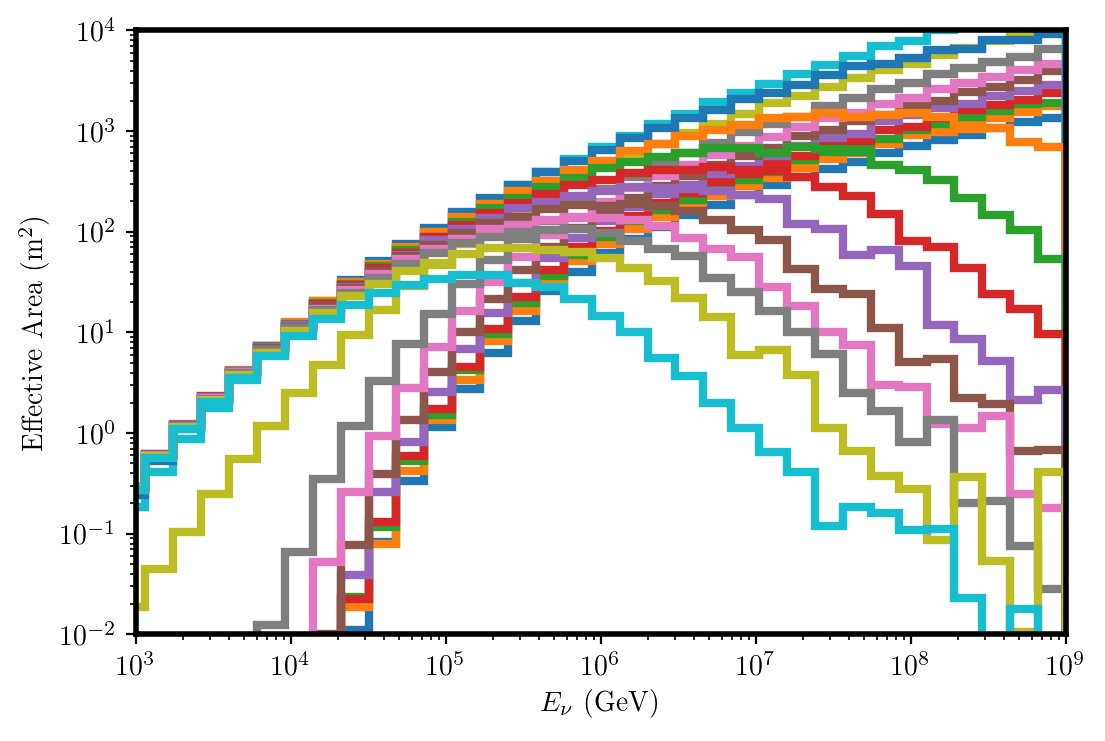

In [10]:
fig = plt.figure(dpi=200)

mc = np.load('/data/ana/analyses/gfu_online/current/IC86_2011_MC.npy')
dec_bins = np.arcsin(np.linspace(-1., 1., 21))
logE_bins = np.linspace(0., 9., 51)
dlog_E = np.diff(logE_bins)

for ld, hd in zip(dec_bins[:-1], dec_bins[1:]):
    d_omega = 2.*np.pi*np.abs(np.sin(ld)-np.sin(hd))
    zen_msk = mc['trueDec'] > (ld)
    zen_msk *= mc['trueDec'] < (hd)
    zen_mc = mc[zen_msk]
    weights = zen_mc['ow'] / (1e4*zen_mc['trueE']* dlog_E[np.digitize(np.log10(zen_mc['trueE']), 
                                            bins = logE_bins) -1] * d_omega * np.log(10.))
    plt.hist(zen_mc['trueE'], weights = weights,
                 bins=np.power(10., logE_bins), histtype='step')
        
plt.loglog()
#plt.title(str(ld) + r'$^{\circ}$ $ < \delta < $ ' + str(hd) + r'$^{\circ}$')
#loc=4 if ld == -5. else 2
#plt.legend(loc=2, frameon=False)
plt.xlim(1e3, 1e9)
plt.ylabel(r'Effective Area (m$^{2}$)')
plt.xlabel(r'$E_{\nu}$ (GeV)')
plt.ylim(1e-2, 1e4)
plt.show()

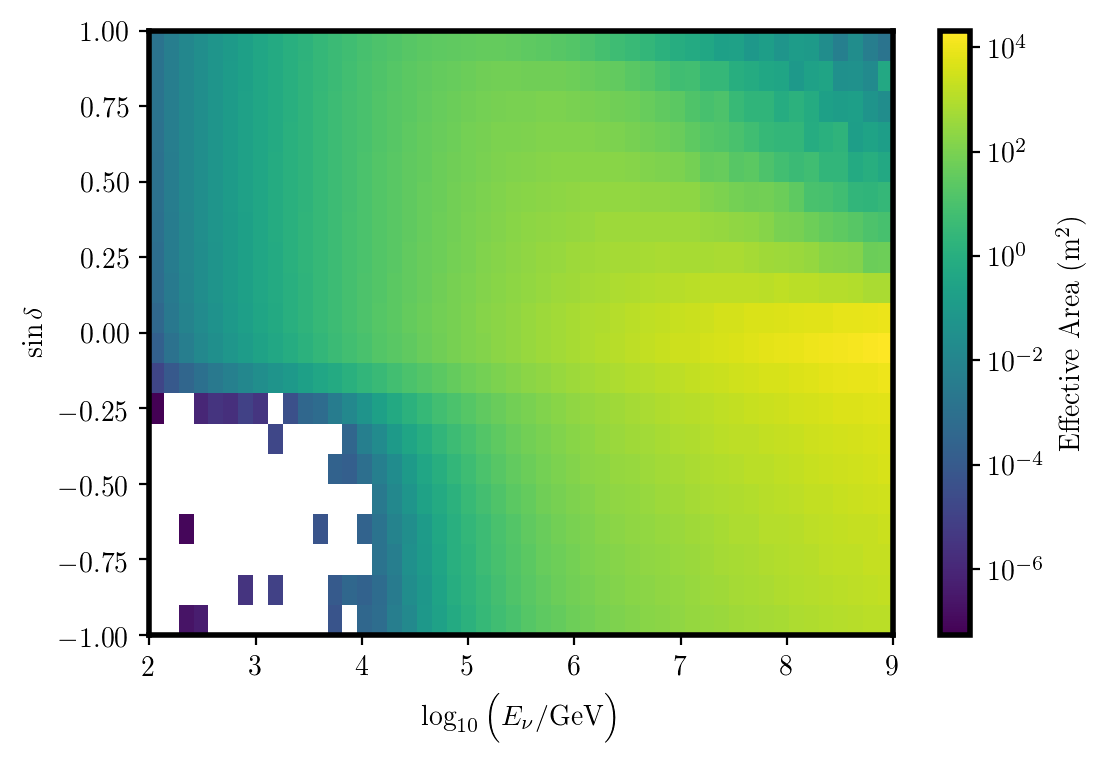

In [3]:
fig = plt.figure(dpi=200)

mc = np.load('/data/ana/analyses/gfu_online/current/IC86_2011_MC.npy')
dec_bins = np.arcsin(np.linspace(-1., 1., 21))
logE_bins = np.linspace(2., 9., 51)
dlog_E = np.diff(logE_bins)
d_sin_dec = np.mean(np.diff(np.sin(dec_bins)))

d_omega = 2.*np.pi*np.abs(d_sin_dec)
weights = mc['ow'] / (1e4*mc['trueE']* dlog_E[np.digitize(np.log10(mc['trueE']), bins = logE_bins) -1] * \
                      d_omega * np.log(10.))
eff_hist = plt.hist2d(np.log10(mc['trueE']), np.sin(mc['trueDec']), weights = weights,
             bins=[logE_bins, np.sin(dec_bins)], norm=LogNorm())
 
plt.colorbar(label = r'Effective Area (m$^{2}$)')
plt.ylabel(r'$\sin \delta$')
plt.xlabel(r'$\log_{10} \Big(E_{\nu} / \mathrm{GeV} \Big)$')
plt.show()

In [35]:
import scipy as sp

In [36]:
def centers(arr):
    return arr[:-1] + (np.diff(arr) / 2.)

In [37]:
eff_spline = sp.interpolate.interp2d(centers(eff_hist[1]), centers(eff_hist[2]), eff_hist[0].T)

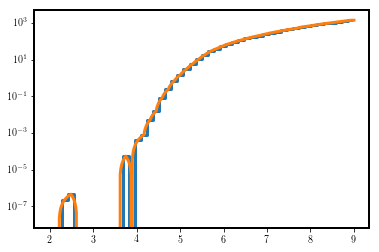

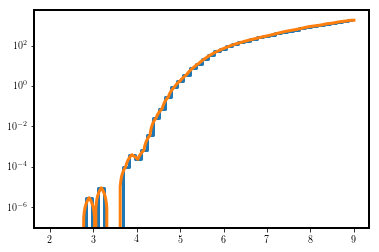

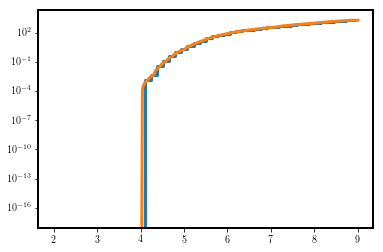

In [38]:
sds = centers(np.sin(dec_bins))
les = np.linspace(2., 9., 501)

for i, sd in enumerate(sds[:3]):
    plt.step(centers(eff_hist[1]), eff_hist[0].T[i], where='mid')
    plt.plot(les, eff_spline(les, sd))
    plt.yscale('log')
    plt.show()

In [39]:
with open('/data/user/apizzuto/fast_response_skylab/alert_event_followup/effective_areas_alerts/gfu_online_effective_area_spline.npy', 'w') as f:
    pickle.dump(eff_spline, f)

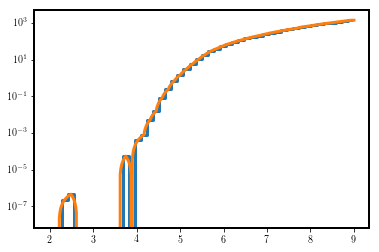

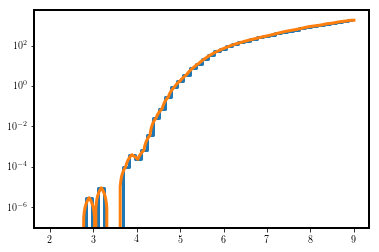

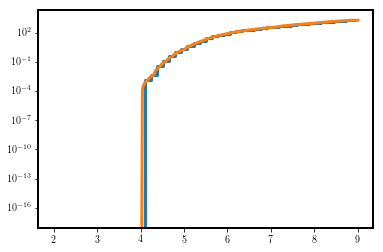

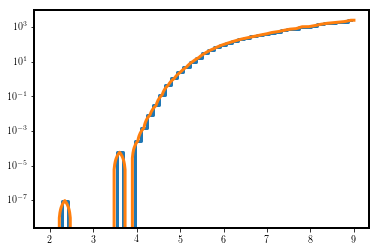

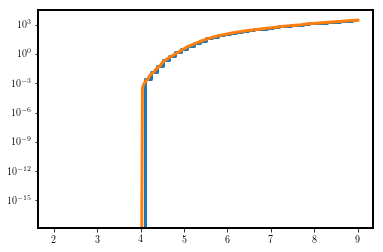

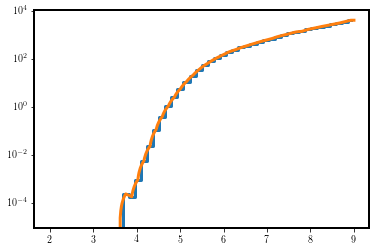

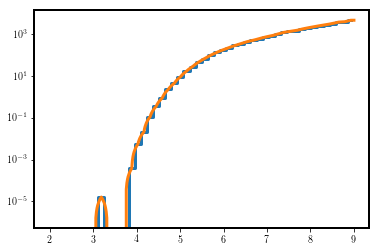

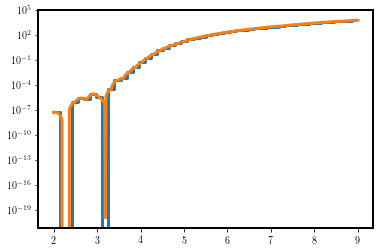

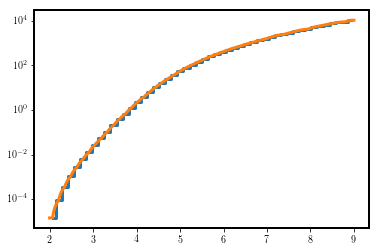

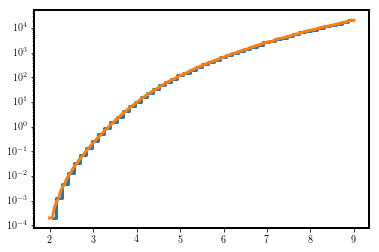

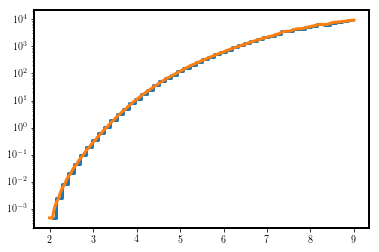

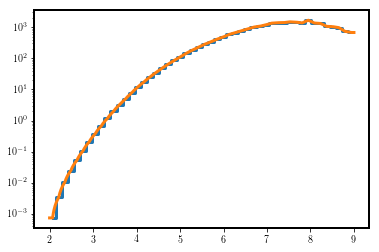

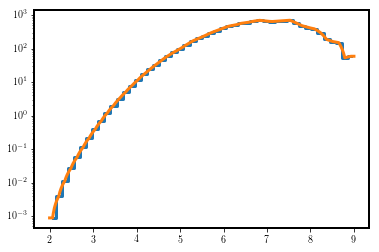

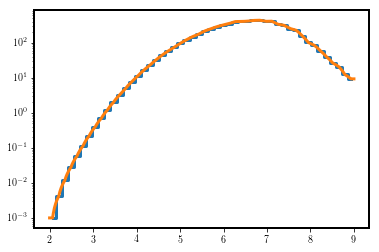

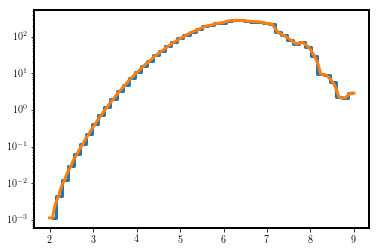

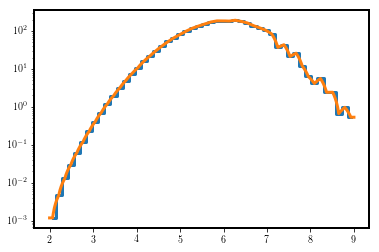

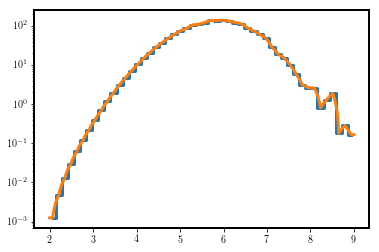

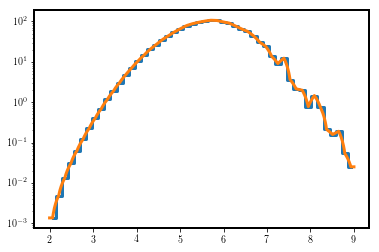

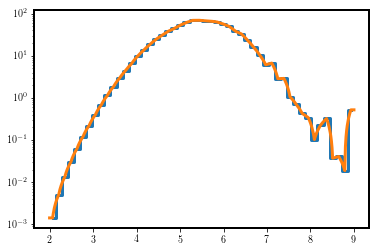

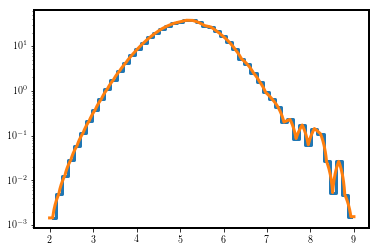

In [40]:
with open('/data/user/apizzuto/fast_response_skylab/alert_event_followup/effective_areas_alerts/gfu_online_effective_area_spline.npy', 'r') as f:
    eff_spline = pickle.load(f)
sds = centers(np.sin(dec_bins))
les = np.linspace(2., 9., 501)

for i, sd in enumerate(sds[:]):
    plt.step(centers(eff_hist[1]), eff_hist[0].T[i], where='mid')
    plt.plot(les, eff_spline(les, sd))
    plt.yscale('log')
    plt.show()

In [5]:
from transient_universe import *
import pickle

print("STARTING")
density = 1e-9


for jj in range(50):
    uni = TransientUniverse('SC', 'HB2006SFR', density, 1.01e-8, 2.19)
    t0 = time.time()
    uni.create_universe()
    t1 = time.time()
    uni.find_alerts()
    t2 = time.time()

    print("universe creation:\t\t {}".format(t1 - t0))
    print("Finding events:\t\t\t {}".format(t2 - t1))
    print("simulated diffuse flux:\t {:.2e}".format(uni.sim_flux))
    print("Number of sources: {}".format(len(uni.sources['dec'])))

    for k in uni.sig_alerts.keys():
        print k
        print np.sum(zip(*uni.sig_alerts[k])[0])

STARTING
universe creation:		 4.40380001068
Finding events:			 0.101264953613
simulated diffuse flux:	 1.00e-08
Number of sources: 5383
HESE_gold
0
GFU_gold
3
HESE_bronze
1
GFU_bronze
2


KeyboardInterrupt: 

In [52]:
uni.additional_signal_events()
for k in uni.extra_events.keys():
    print np.sum(uni.extra_events[k]), np.max(uni.extra_events[k])

0.0 0.0
3.0 3.0
0.0 0.0
15.0 14.0


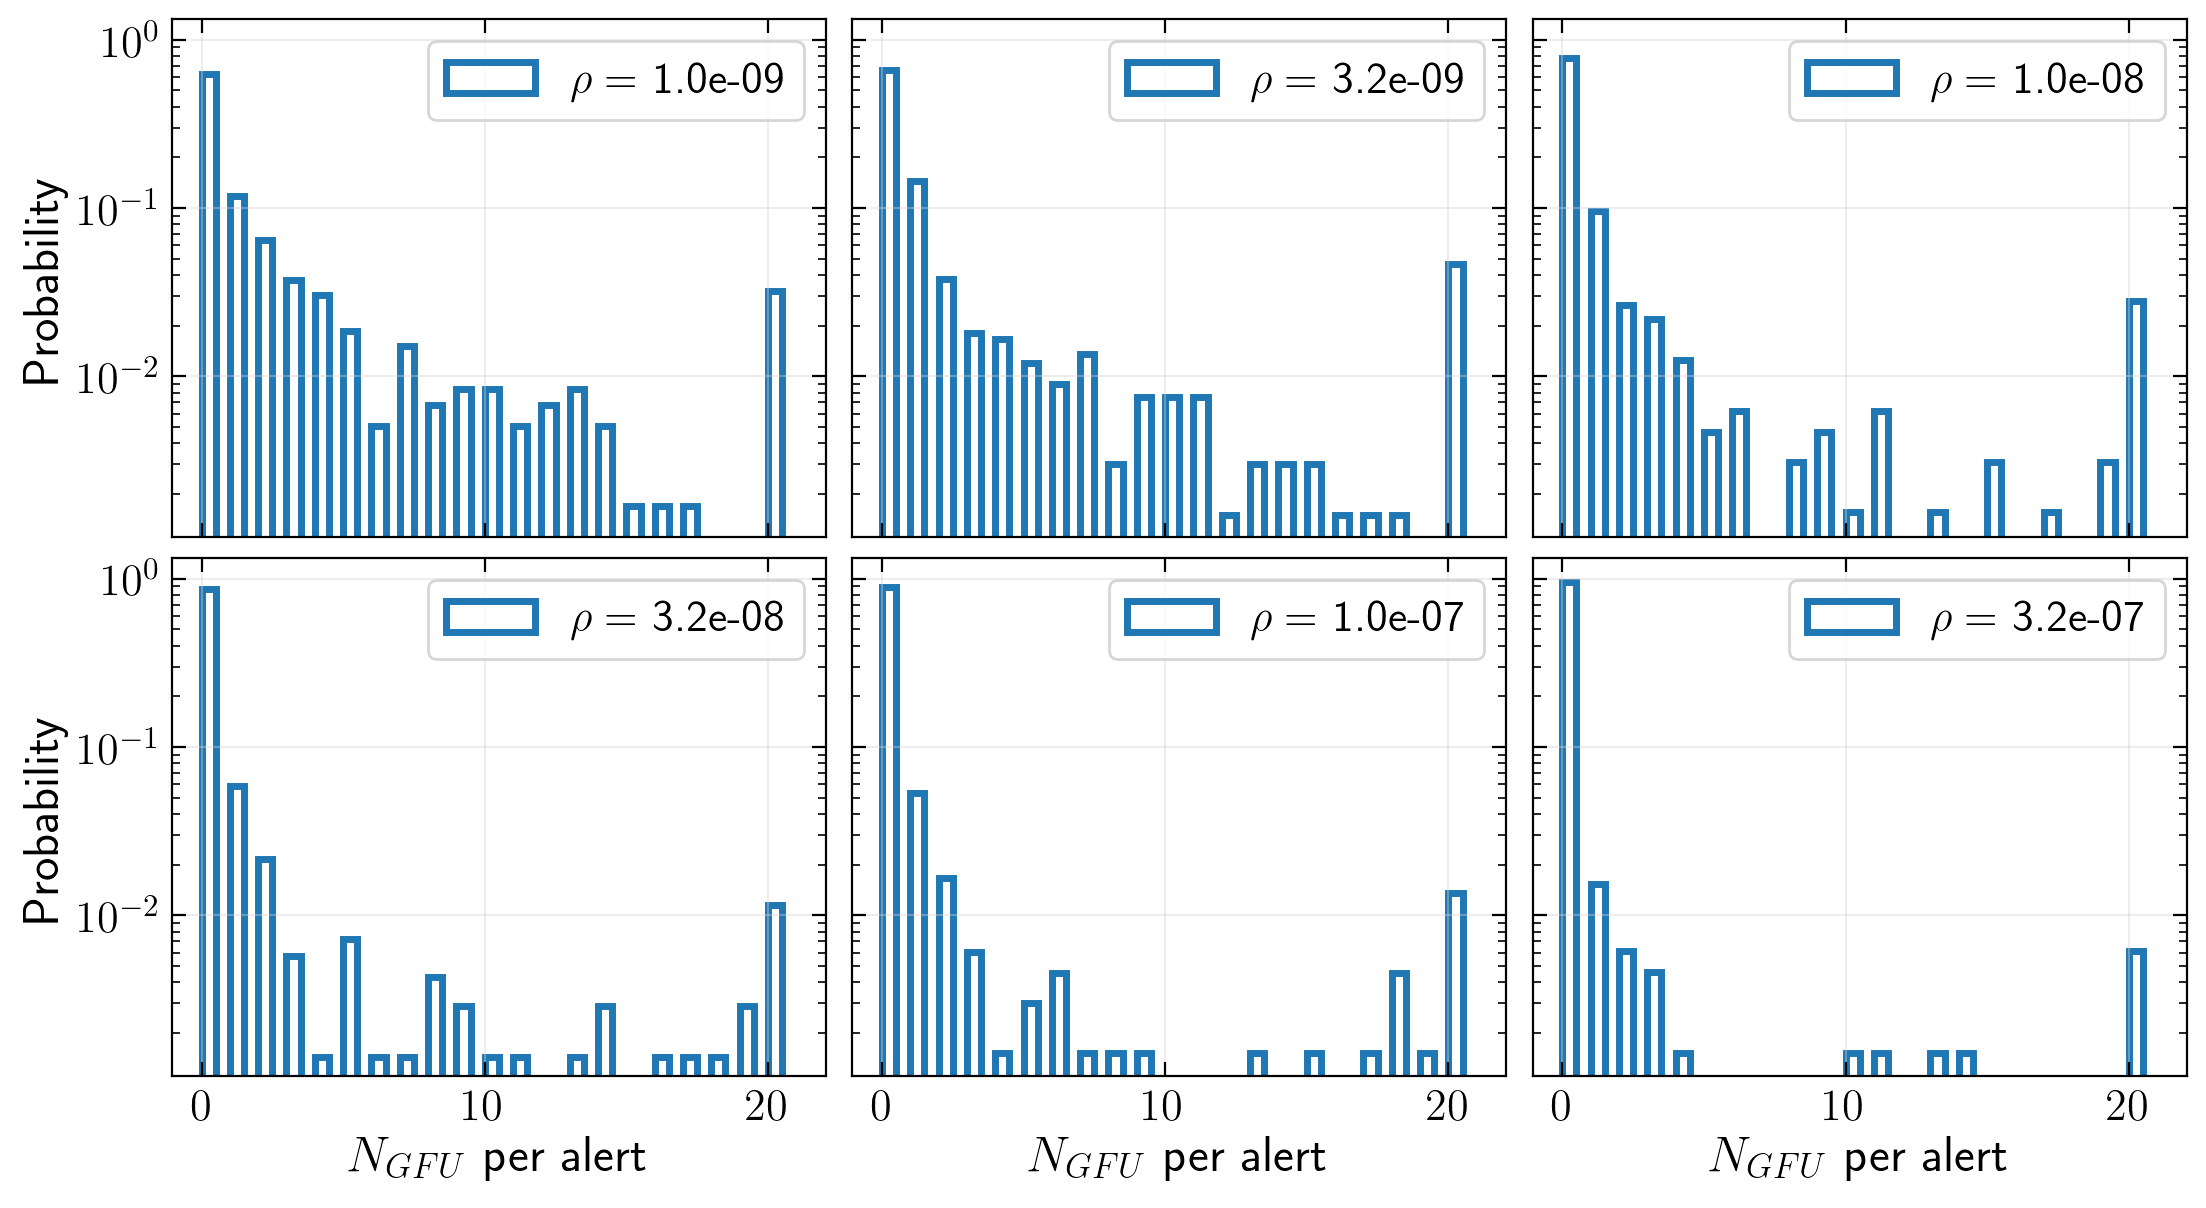

In [28]:
fig, axs = plt.subplots(nrows=2, ncols=3, dpi=200, figsize=(13,7), sharex=True, sharey=True)

plt.subplots_adjust(hspace=0.04, wspace=0.04)

densities = [1e-9, 3.16e-9, 1e-8, 3.16e-8, 1e-7, 3.16e-7] #, 1e-6]
for ii, density in enumerate(densities):
    with open('../scripts/extra_evs/checks_dens_{:.2e}.pkl'.format(density), 'r') as f:
        d = pickle.load(f)
    tots = []
    for k in d.keys():
        tots.extend(d[k])
    tots = np.array(tots)
    tots[tots > 20] = 20
    axs[ii/3,ii%3].hist(tots, bins = np.linspace(0., 21, 43), weights=[1. / len(tots)]*len(tots),
            histtype='step', label = r'$\rho =$' + ' {:.1e}'.format(density), lw = 2.5)
    if ii / 3 > 0:
        axs[ii/3,ii%3].set_xticks([0,10,20], ['0','10',r'$\geq$20'])
        axs[ii/3,ii%3].set_xlabel(r'$N_{GFU}$ per alert')
    if ii % 3 == 0:
        axs[ii/3,ii%3].set_ylabel('Probability')
    axs[ii/3,ii%3].set_yscale('log')
    axs[ii/3,ii%3].legend(loc=1)
plt.show()

In [38]:
add_evs = {'GFU_gold': [], 'GFU_bronze': [],
          'HESE_gold': [], 'HESE_bronze': []}

density = 1e-8
for jj in range(1):
    print jj, 
    uni = TransientUniverse('SC', 'HB2006SFR', density, 1.01e-8, 2.19)
    uni.create_universe()
    uni.find_alerts()
    uni.additional_signal_events()
    uni.find_alert_skymaps()

    for k in uni.sig_alerts.keys():
        alerts = np.array(zip(*uni.sig_alerts[k])[0])
        extras = uni.extra_events[k]
        extras = extras[alerts != 0]
        add_evs[k].extend(extras)
        #print k, extras

0


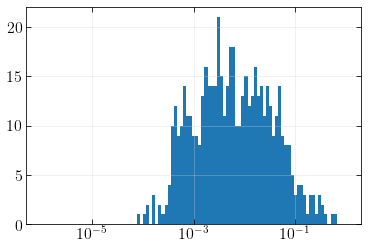

In [24]:
plt.hist(uni.sources['flux'], bins=np.logspace(-6, 0., 100))
plt.xscale('log')
plt.show()

In [3]:
import os, sys
sys.path.append('/data/user/apizzuto/fast_response_skylab/fast-response/trunk/')
import time
from transient_universe import TransientUniverse
from transient_universe import *
import pickle

print("STARTING")
density = 3e-8

uni = TransientUniverse('LG', 'HB2006SFR', density, 1.01e-8, 2.19)
t0 = time.time()
uni.create_universe()
t1 = time.time()
uni.find_alerts()
t2 = time.time()
uni.find_alert_skymaps()
t3 = time.time()
uni.additional_signal_events()
t4 = time.time()

print("universe creation:\t\t {}".format(t1 - t0))
print("Finding events:\t\t\t {}".format(t2 - t1))
print("Sampling skymaps: {}".format(t3 - t2))
print("Additional events: {}".format(t4 - t3))
print("simulated diffuse flux:\t {:.2e}".format(uni.sim_flux))
print("Number of sources: {}".format(len(uni.sources['dec'])))


alerts = {'signalness': [], 'declination': [], 'background': [], 
          'skymap_ind': [], 'stream': [], 'skymap_dec': [],
         'extra_evs': []}
for k in uni.bg_alerts.keys():
    if uni.bg_alerts[k][0] > 0:
        alerts['signalness'].extend(uni.bg_alerts[k][1])
        alerts['declination'].extend(uni.bg_alerts[k][2])
        alerts['background'].extend([True]*uni.bg_alerts[k][0])
        alerts['skymap_ind'].extend([0]*uni.bg_alerts[k][0])
        alerts['skymap_dec'].extend([0]*uni.bg_alerts[k][0])
        alerts['stream'].extend([k]*uni.bg_alerts[k][0])
        alerts['extra_evs'].extend([0]*uni.bg_alerts[k][0])
for k in uni.sig_alerts.keys():
    for jj in range(len(uni.sig_alerts[k])):
        if uni.sig_alerts[k][jj] == (0, 0.0):
            continue
        else:
            alerts['signalness'].append(uni.sig_alerts[k][jj][1][0])
            alerts['declination'].append(np.radians(uni.sources['dec'][jj]))
            alerts['background'].append(False)
            alerts['skymap_ind'].append(uni.skymaps[k][jj][1])
            alerts['skymap_dec'].append(uni.skymaps[k][jj][0])
            alerts['stream'].append(k)
            alerts['extra_evs'].append(uni.extra_events[k][jj])
            
alerts = pd.DataFrame(alerts)
alerts[alerts['background'] == False]

STARTING
universe creation:		 4.61781692505
Finding events:			 2.77559304237
Sampling skymaps: 0.355151891708
Additional events: 0.317603111267
simulated diffuse flux:	 2.09e-08
Number of sources: 161505


TypeError: 'float' object has no attribute '__getitem__'

In [3]:
import os, sys
sys.path.append('/data/user/apizzuto/fast_response_skylab/fast-response/trunk/')
import time
from transient_universe import TransientUniverse
from transient_universe import *
import pickle
from universe_analysis import UniverseAnalysis

In [4]:
density = 3e-9
uni = UniverseAnalysis('SC', 'HB2006SFR', density, 1.01e-8, 2.19, #deltaT=2*86400.,
                      data_years=5)

In [5]:
uni.reinitialize_universe()

In [6]:
uni.make_alerts_dataframe()

In [7]:
uni.calculate_ts(only_gold=False)

0.9765712076659062

In [9]:
uni.alert_df[:]

background  declination  extra_evs  signalness  skymap_dec  skymap_ind  \
0          True     0.358433        0.0    0.931387    0.350986           9   
1          True     0.878095        0.0    0.988647    0.903033           2   
2          True     0.163593        0.0    0.307963    0.065799           6   
3          True     0.105271        0.0    0.253575    0.013614           3   
4          True    -0.019546        0.0    0.248218    0.013614           3   
5          True     0.128576        0.0    0.318564    0.065799           6   
6          True     0.249786        0.0    0.314348    0.350986           9   
7          True    -0.040058        0.0    0.291548    0.013614           3   
8          True     0.267168        0.0    0.346087    0.350986           9   
9          True     0.991959        0.0    0.399324    0.903033           2   
10         True     0.072198        0.0    0.272769    0.013614           3   
11         True    -0.006305        0.0    0.356923   -0.024784           8   
12         True     0.085397        0.0    0.916080    0.013614           3   
13         True    -0.078935        0.0    0.200298    0.013614           3   
14         True     0.087696        0.0    0.478576    0.013614           3   
15         True    -0.041320        0.0    0.567338   -0.024784           8   
16         True     0.257198        0.0    0.366481    0.350986           9   
17         True    -0.035692        0.0    0.335452   -0.024784           8   
18         True    -0.088228        0.0    0.479419   -0.024784           8   
19         True     0.118305        0.0    0.556843    0.065799           6   
20         True     0.890649        0.0    0.530998    0.903033           2   
21         True     0.247791        0.0    0.397292    0.194604           7   
22         True     0.044587        0.0    0.291485    0.065799           6   
23         True     0.213834        0.0    0.270879    0.194604           7   
24         True     0.097704        0.0    0.351867    0.065799           6   
25         True     0.359381        0.0    0.612418    0.350986           9   
26         True     0.563713        0.0    0.388293    0.573166           1   
27         True    -0.029110        0.0    0.264920    0.065799           6   
28         True     0.195209        0.0    0.514143    0.194604           7   
29         True     0.381346        0.0    0.288239    0.350986           9   
..          ...          ...        ...         ...         ...         ...   
126       False     0.107056       13.0    0.498089    0.194604           7   
127       False     0.586598        0.0    0.977327    0.573166           1   
128       False     0.304132        0.0    0.586885    0.350986           9   
129       False     0.228180        0.0    0.831898    0.194604           7   
130       False     0.200618        4.0    0.744306    0.194604           7   
131       False     0.412066       34.0    0.576174    0.383623           4   
132       False     0.190186        0.0    0.821669    0.194604           7   
133       False     0.391411       38.0    0.818474    0.350986           9   
134       False     1.440813        0.0    0.854506    0.903033           2   
135       False     0.091795        0.0    0.884128    0.065799           6   
136       False     0.055438        0.0    0.585621   -0.024784           8   
137       False     0.120517        0.0    0.774755    0.065799           6   
138       False    -0.104285        0.0    0.492994   -0.024784           8   
139       False    -0.782500        0.0    0.505380   -0.609993           5   
140       False    -0.092047        1.0    0.562270   -0.024784           8   
141       False    -1.205170        0.0    0.898774   -0.609993           5   
142       False    -1.104957        0.0    0.611047   -0.609993           5   
143       False     0.181630        1.0    0.350525    0.194604           7   
144       False     1.068312        3.0    0.365407    

In [3]:
import numpy as np
a = np.linspace(1, 100, 200)
a.size

200

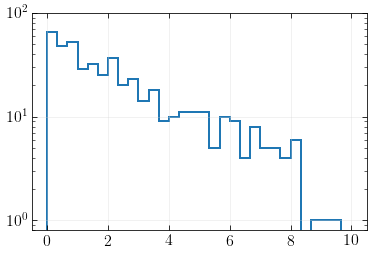

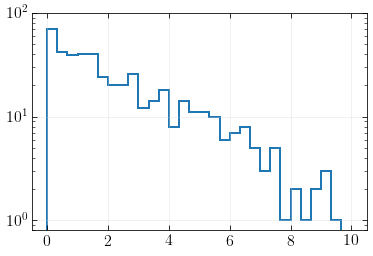

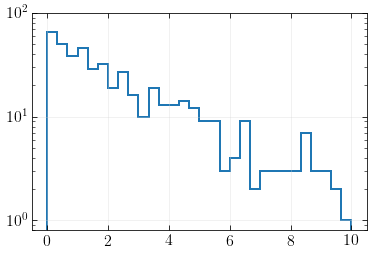

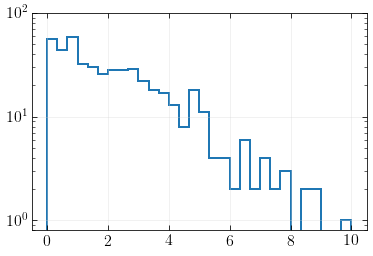

In [6]:
TS = np.load('/data/user/apizzuto/fast_response_skylab/alert_event_followup/scripts/ts_dists_vs_density.npy')
for ts in TS:
    plt.hist(ts, bins=np.linspace(0., 10., 31), histtype='step', lw=2)
    plt.yscale('log')
    plt.ylim(8e-1, 1e2)
    plt.show()

In [130]:
TS = []

for density in [1e-10, 1e-9, 1e-8, 1e-7]:
    TS.append([])
    density = 1e-10
    uni = UniverseAnalysis('SC', 'HB2006SFR', density, 1.01e-8, 2.19, deltaT=2*86400., data_years=10)
    uni.initialize_universe()
    uni.make_alerts_dataframe()
    TS[-1].append(uni.calculate_ts())

    for jj in range(49):
        print jj, 
        uni.reinitialize_universe()
        uni.make_alerts_dataframe()
        TS[-1].append(uni.calculate_ts())
        
    print("\n")

KeyboardInterrupt: 

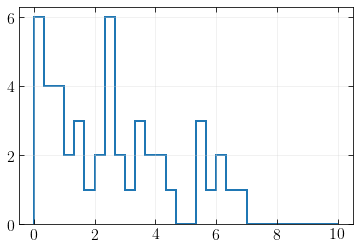

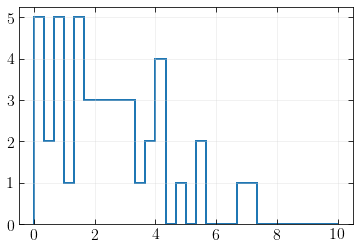

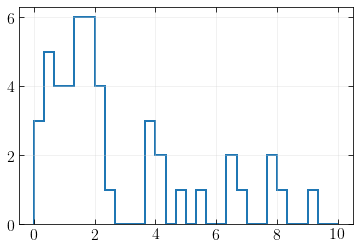

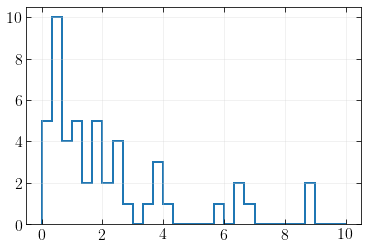

In [10]:
for ts in TS:
    plt.hist(ts, bins=np.linspace(0., 10., 31), histtype='step', lw=2)
    plt.show()

In [2]:
TS = []
density = 1e-7
uni = UniverseAnalysis('LG', 'HB2006SFR', density, 1.01e-8, 2.19, deltaT=2*86400.)
uni.initialize_universe()
uni.make_alerts_dataframe()
TS.append(uni.calculate_ts())

for jj in range(49):
    print jj
    uni.reinitialize_universe()
    uni.make_alerts_dataframe()
    TS.append(uni.calculate_ts())

0
1
NO TRIALS WITH 65.0 INJECTED EVENTS
2
3
4
5
6
NO TRIALS WITH 51.0 INJECTED EVENTS
NO TRIALS WITH 48.0 INJECTED EVENTS
NO TRIALS WITH 19.0 INJECTED EVENTS
NO TRIALS WITH 64.0 INJECTED EVENTS
7
8
NO TRIALS WITH 14.0 INJECTED EVENTS
9
10
11
12
13
NO TRIALS WITH 34.0 INJECTED EVENTS
NO TRIALS WITH 21.0 INJECTED EVENTS
14
15
16
17
18
19
20
NO TRIALS WITH 110.0 INJECTED EVENTS
NO TRIALS WITH 112.0 INJECTED EVENTS
21
22
NO TRIALS WITH 22.0 INJECTED EVENTS
23
24
25
NO TRIALS WITH 101.0 INJECTED EVENTS
NO TRIALS WITH 91.0 INJECTED EVENTS
26
NO TRIALS WITH 61.0 INJECTED EVENTS
NO TRIALS WITH 62.0 INJECTED EVENTS
27
28
29
30
31
32
33
34
35
36
37
38
39
NO TRIALS WITH 41.0 INJECTED EVENTS
NO TRIALS WITH 33.0 INJECTED EVENTS
NO TRIALS WITH 39.0 INJECTED EVENTS
40
41
42
43
44
45
46
47
48
NO TRIALS WITH 30.0 INJECTED EVENTS
NO TRIALS WITH 25.0 INJECTED EVENTS
NO TRIALS WITH 38.0 INJECTED EVENTS


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109

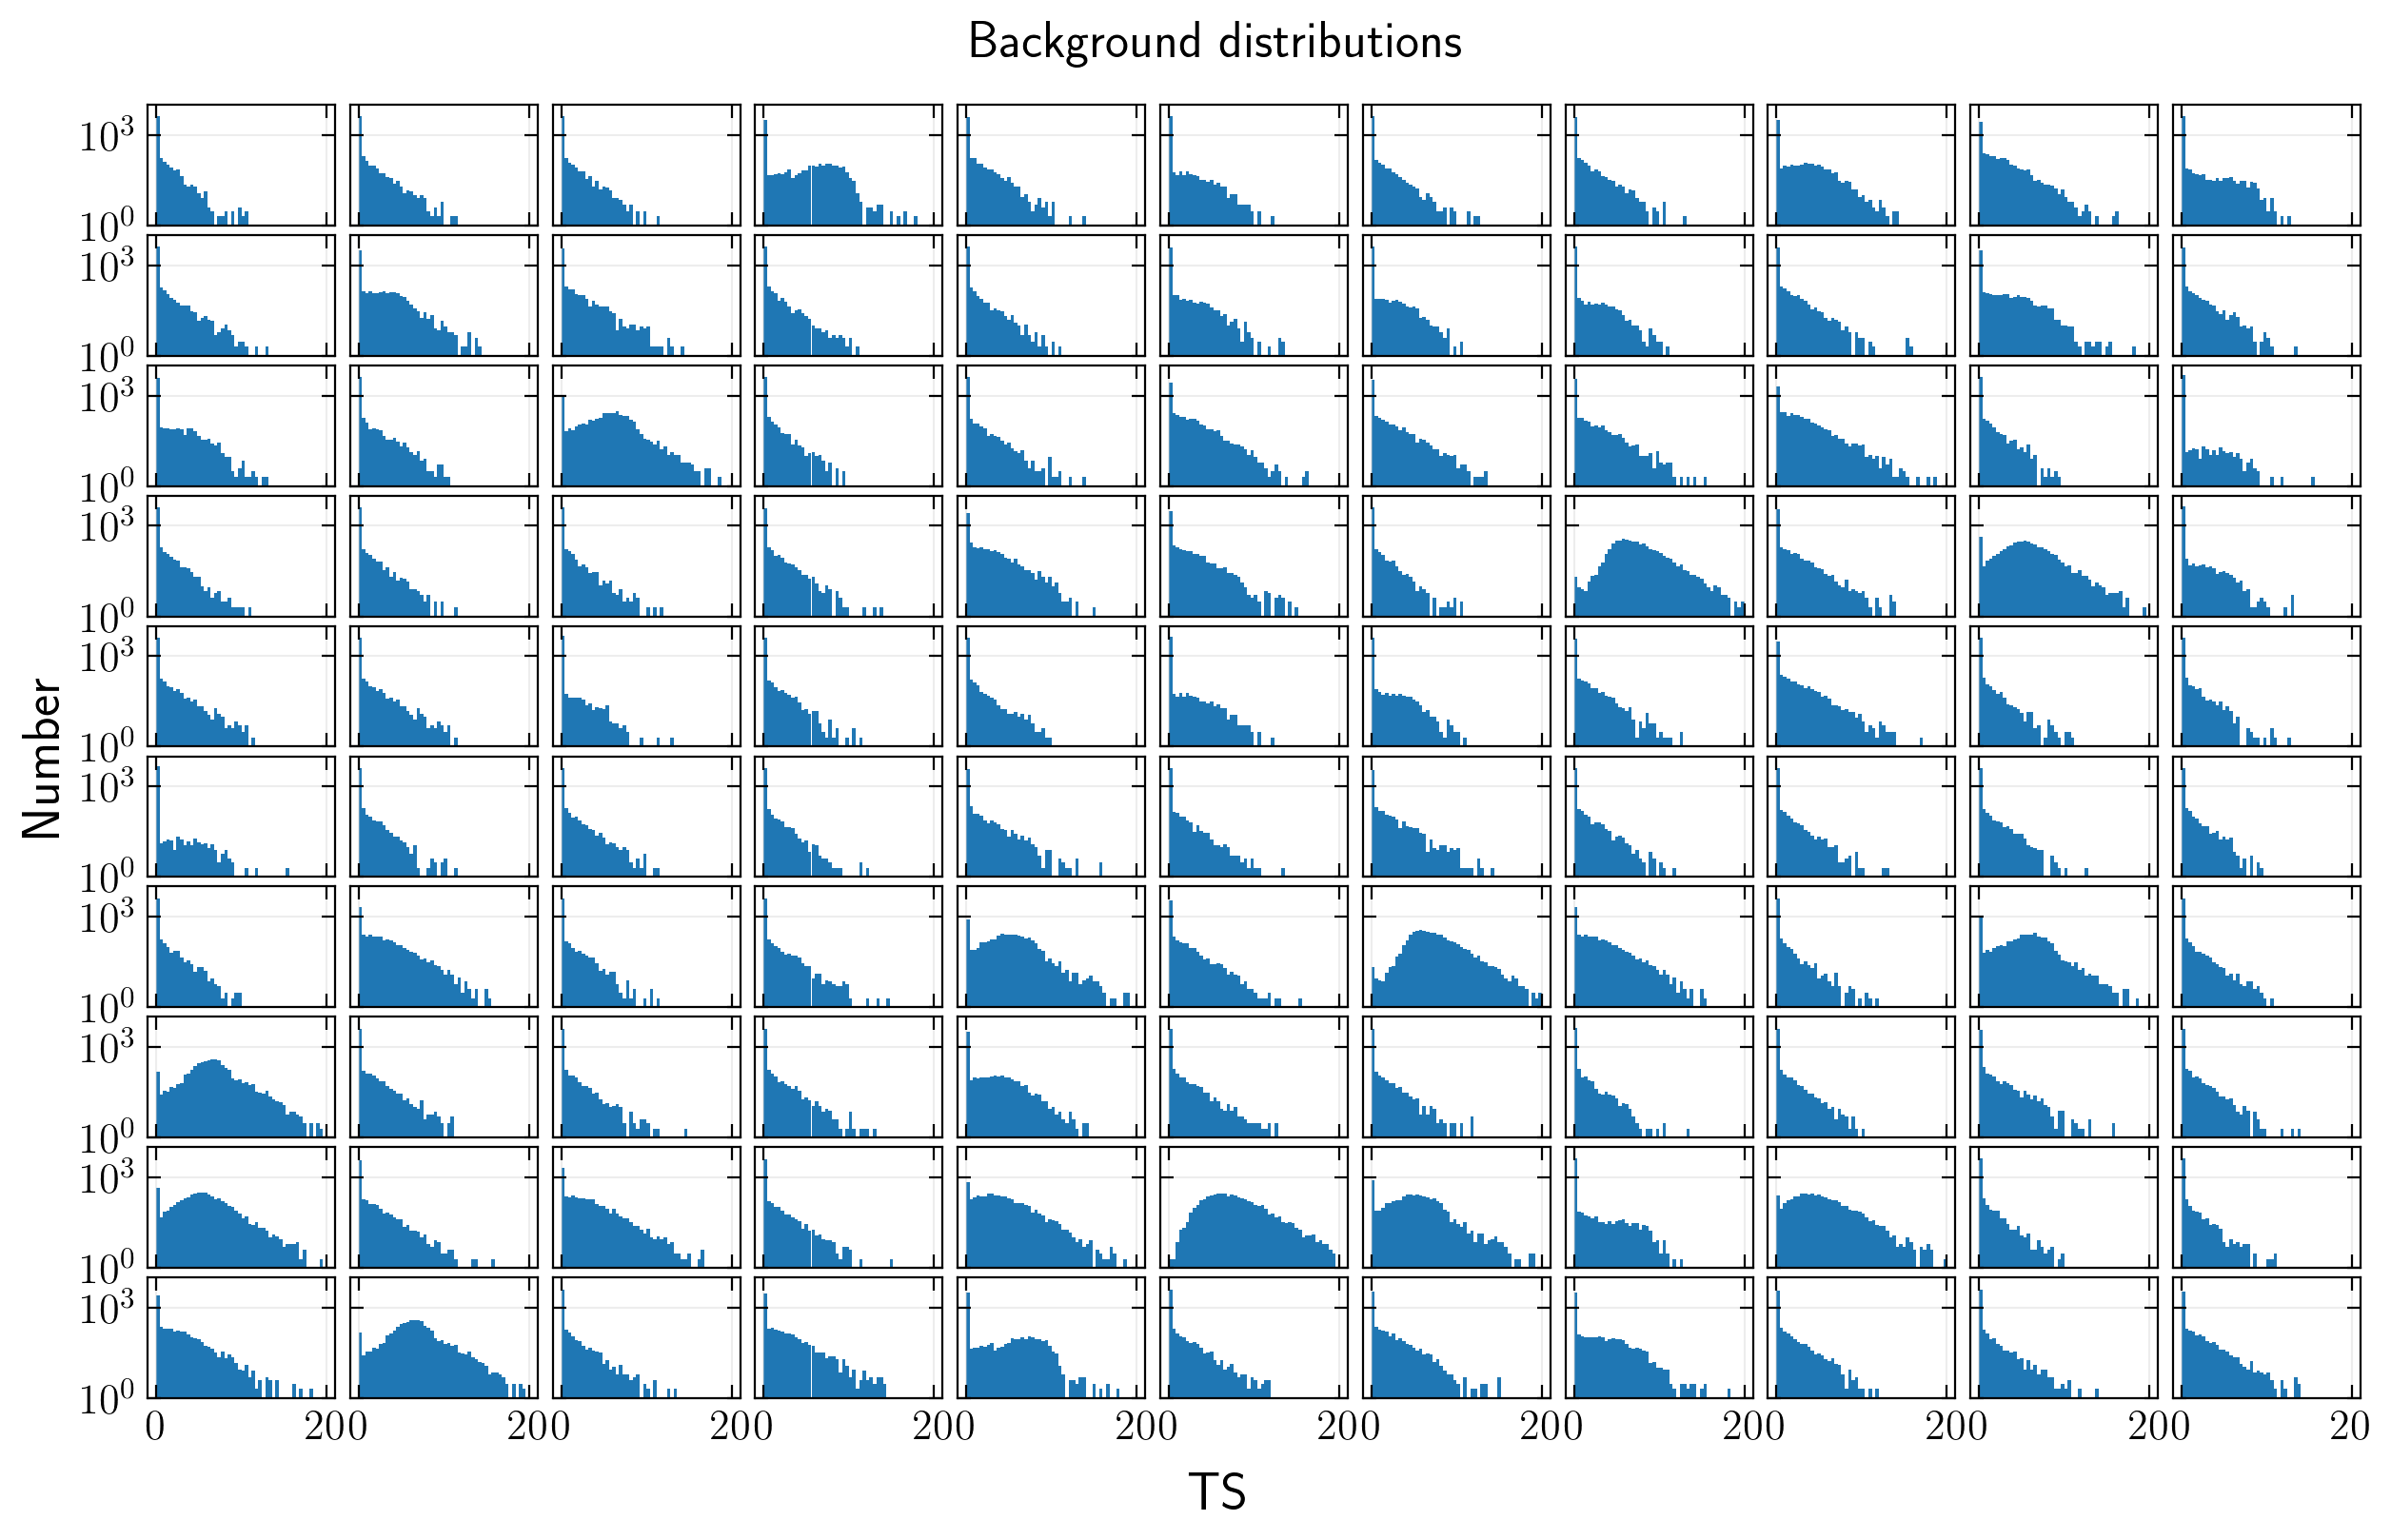

In [4]:
fig, axs = plt.subplots(nrows=10, ncols=11, sharex=True, sharey=True, figsize=(15, 9), dpi=200)
plt.subplots_adjust(hspace = 0.08, wspace = 0.08)
for i in range(110):
    print i, 
    ax = axs[i/11, i%11]
    try:
        bg = np.load('/data/user/apizzuto/fast_response_skylab/alert_event_followup/analysis_trials/bg/index_{}_time_172800.0.pkl'.format(i))
        ax.hist(bg['ts_prior'], bins=np.linspace(0., 20., 51))
        ax.set_yscale('log')
        ax.set_ylim(1e0, 1e4)
    except:
        continue
        
fig.text(0.5, 0.06, 'TS', ha='center', fontsize = 20)
fig.text(0.08, 0.5, 'Number', va='center', rotation='vertical', fontsize = 20)
fig.suptitle("Background distributions", y=0.93)
plt.show()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109

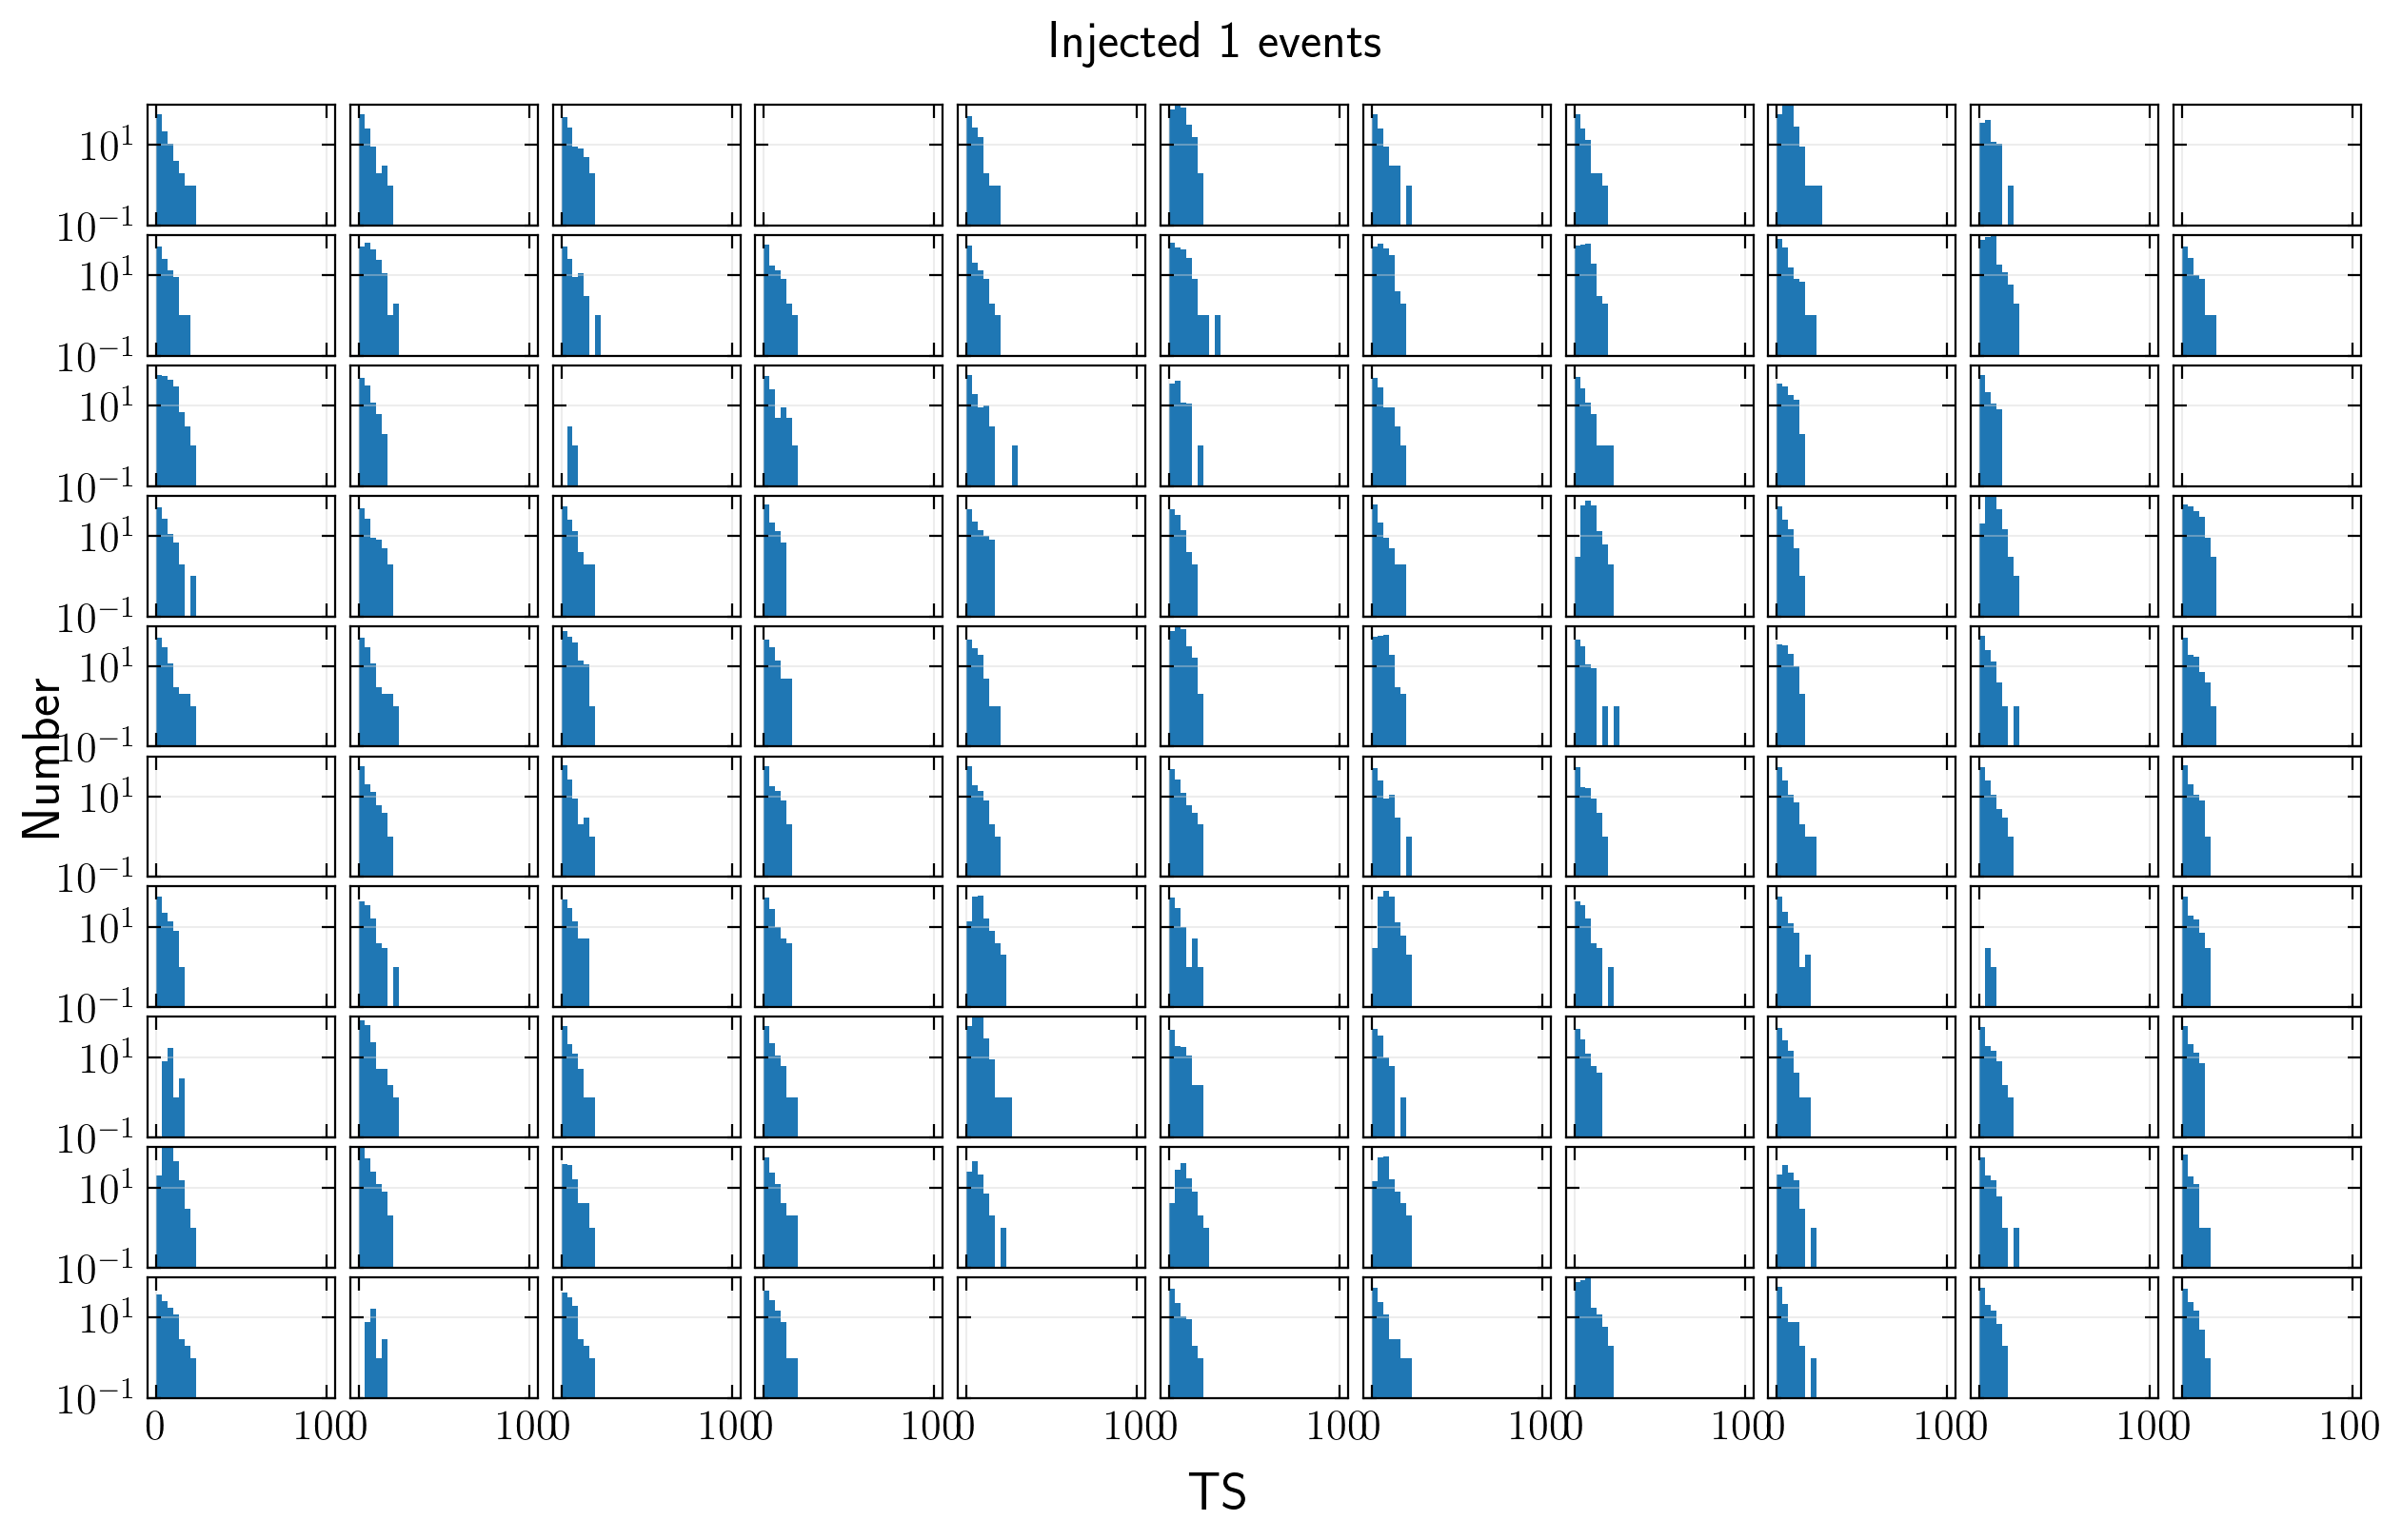

 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109

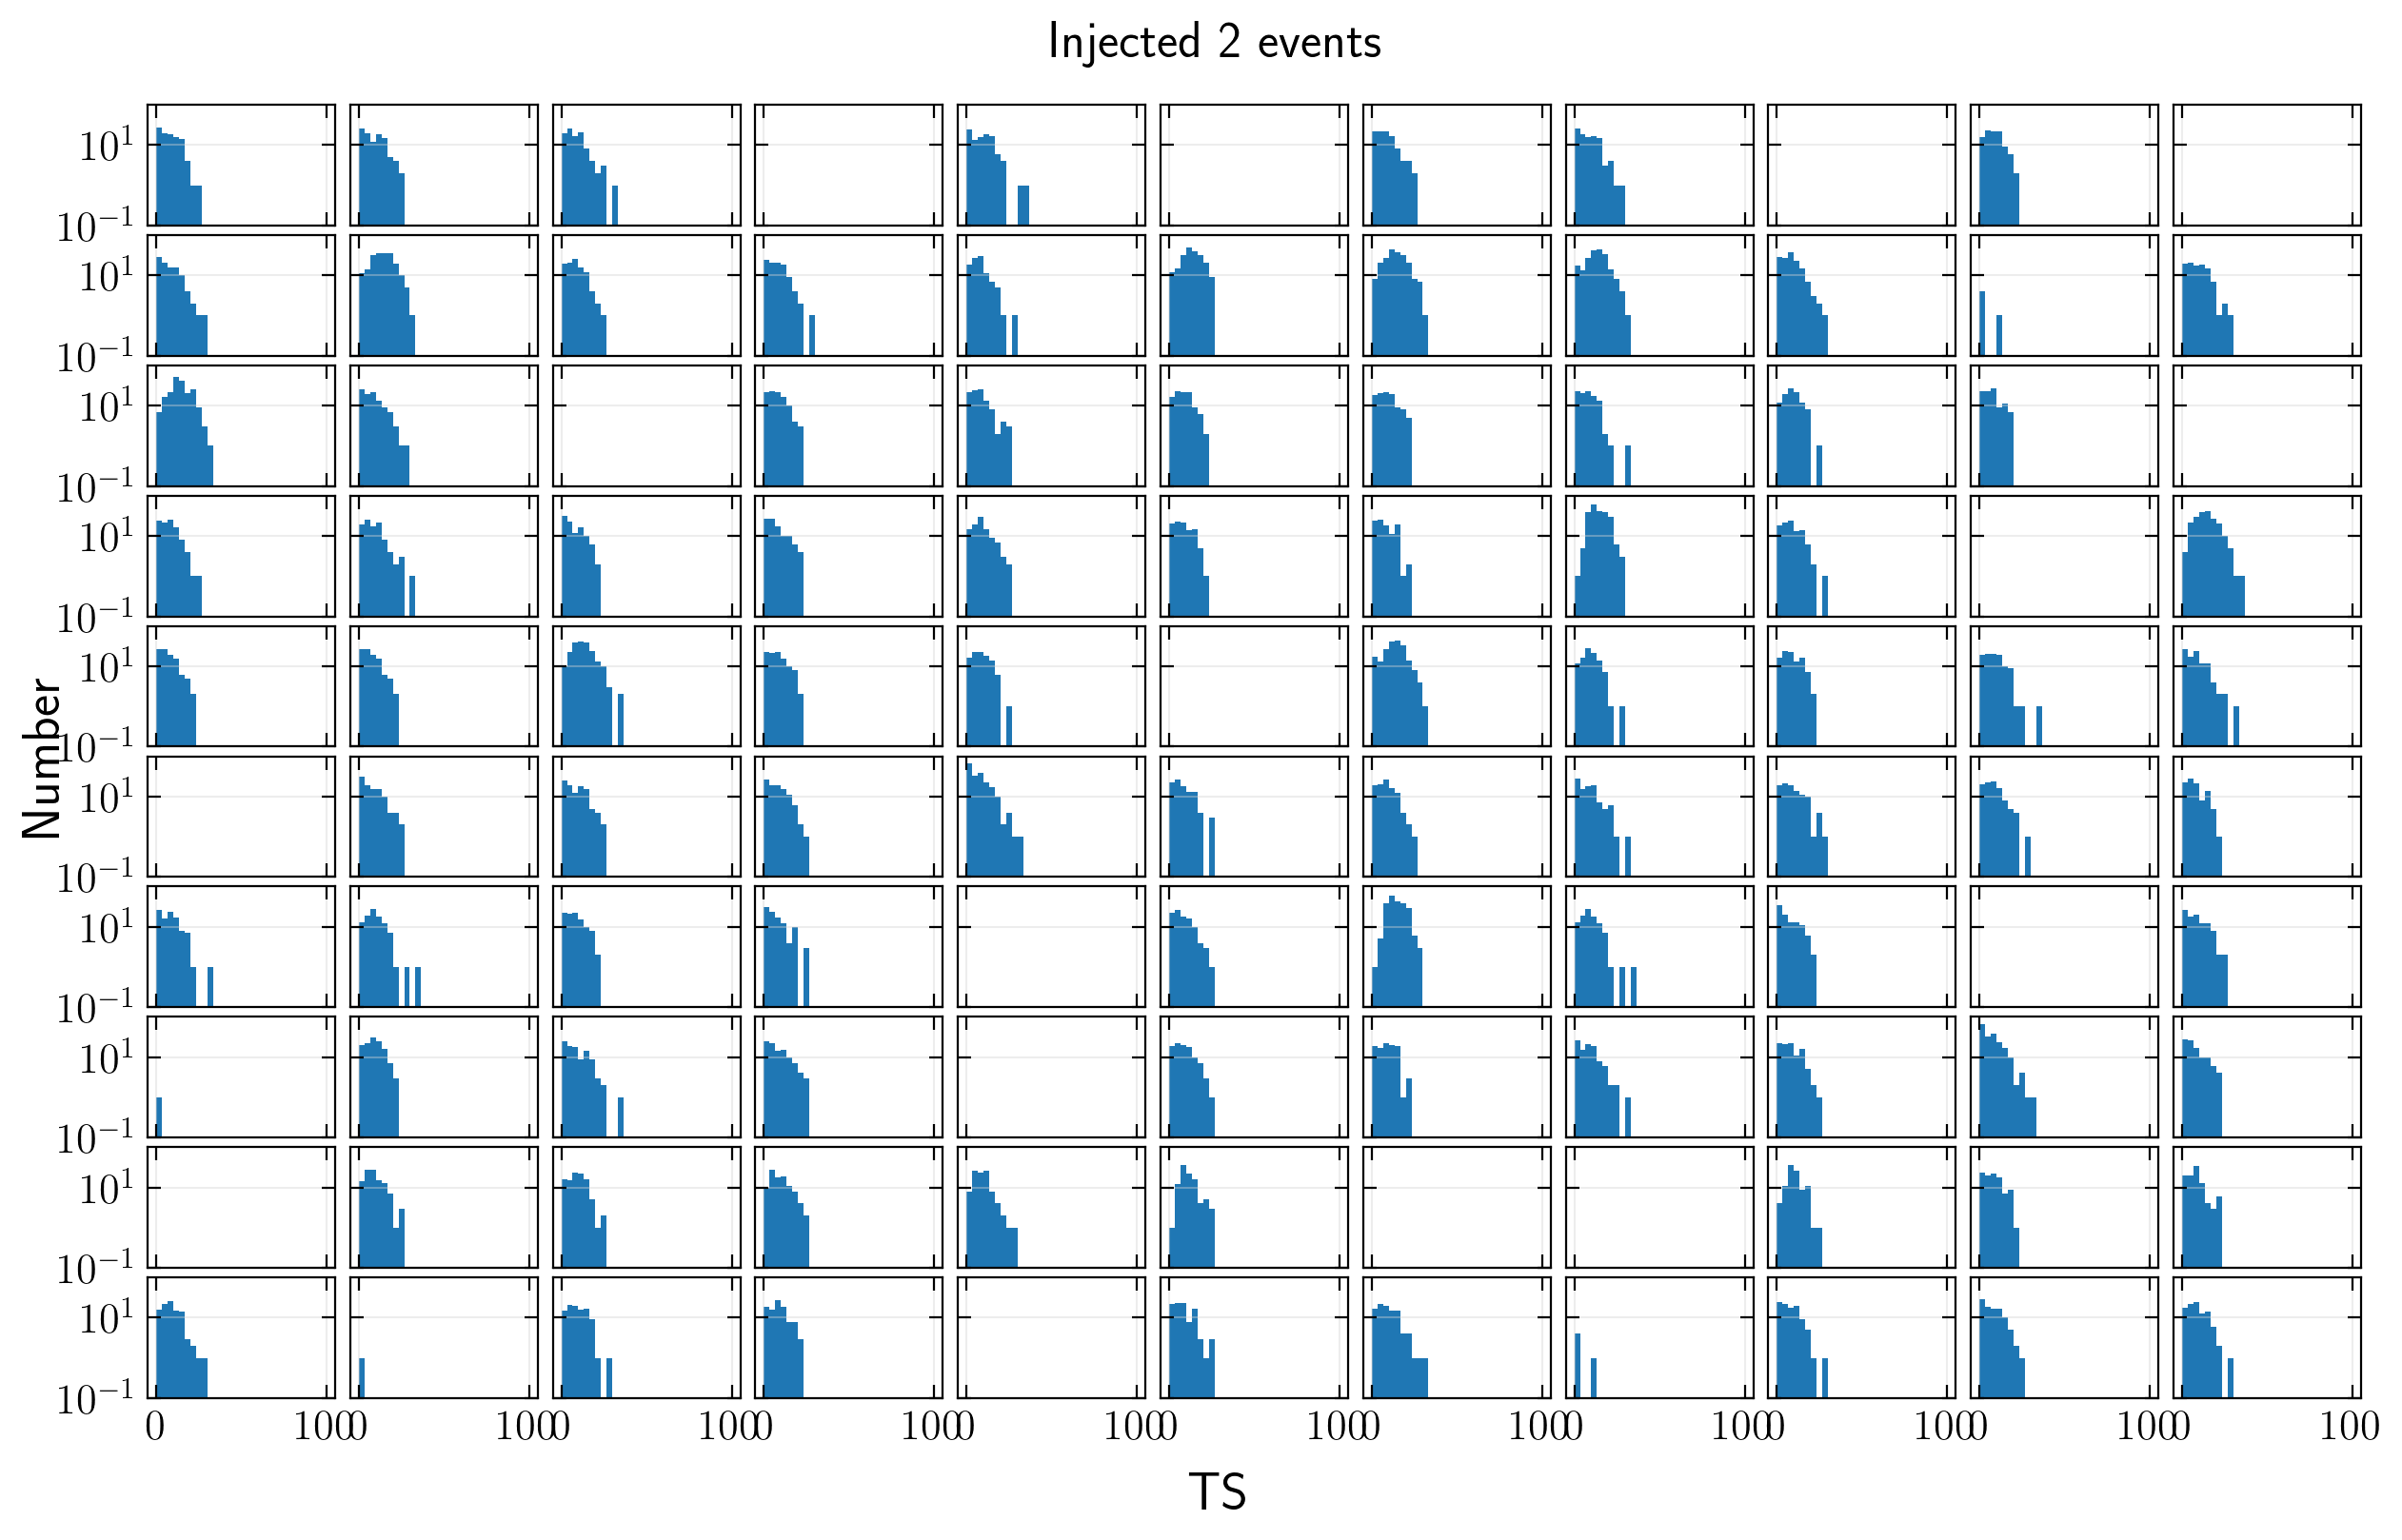

 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109

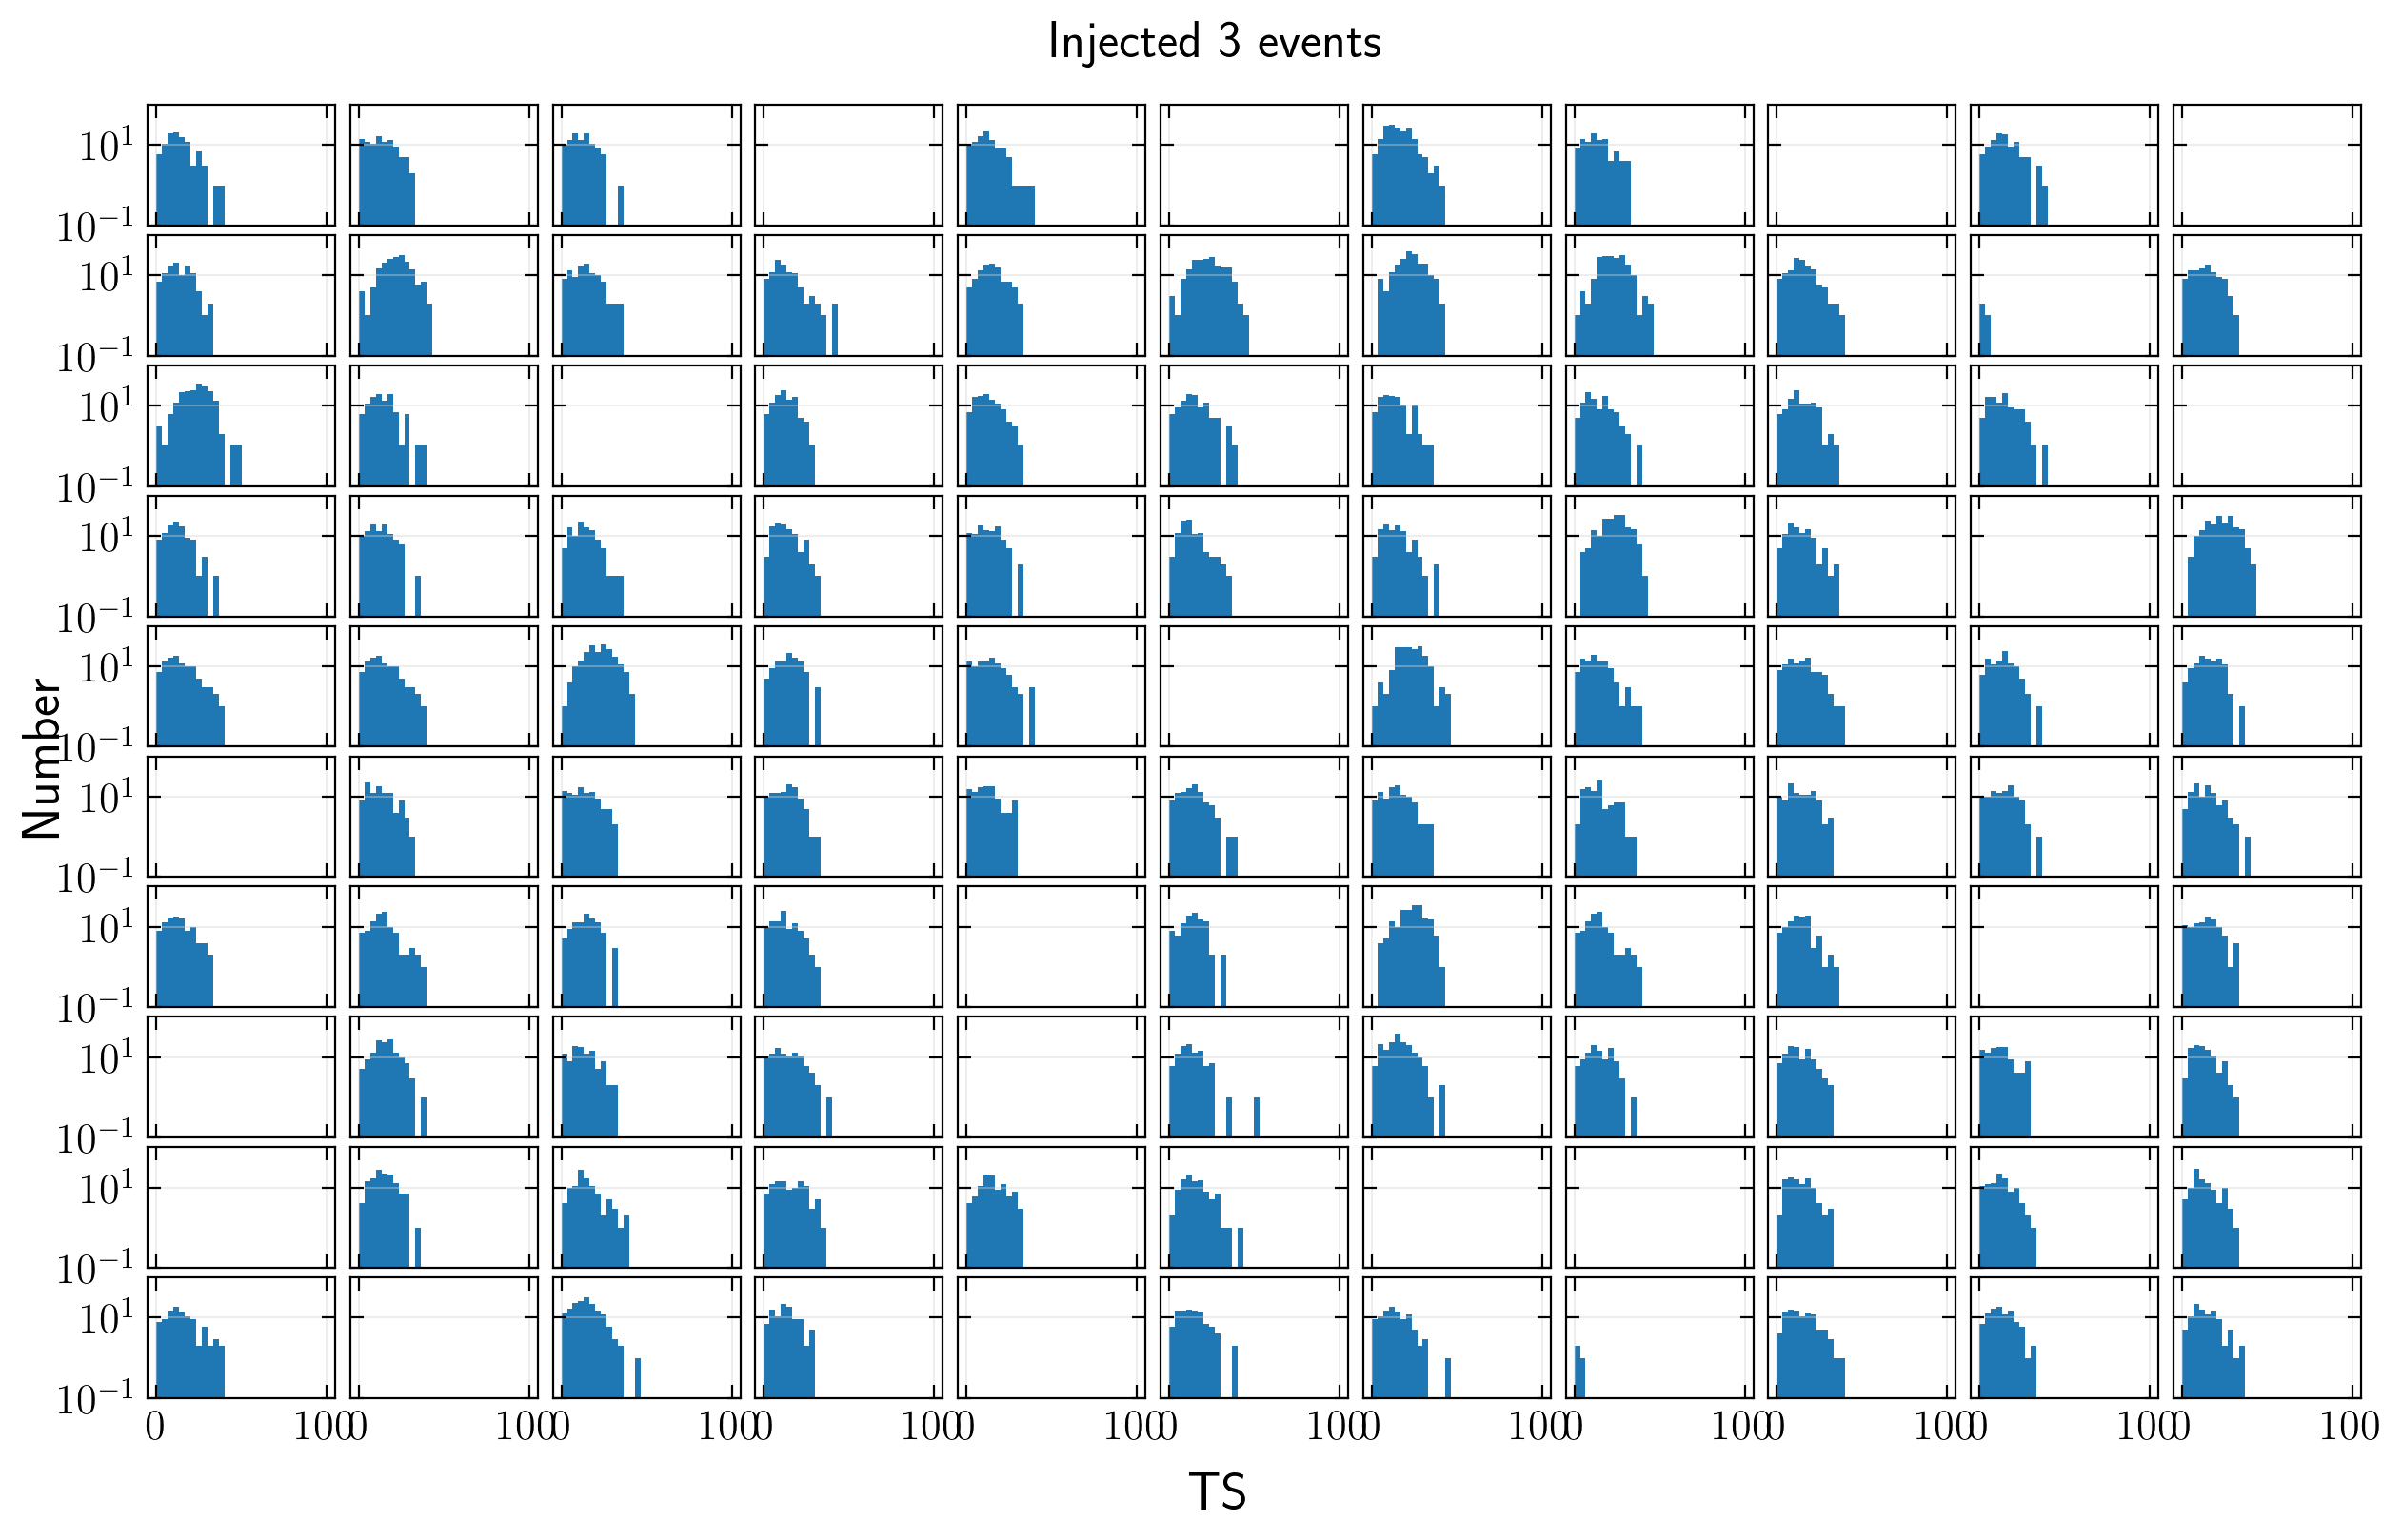

 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109

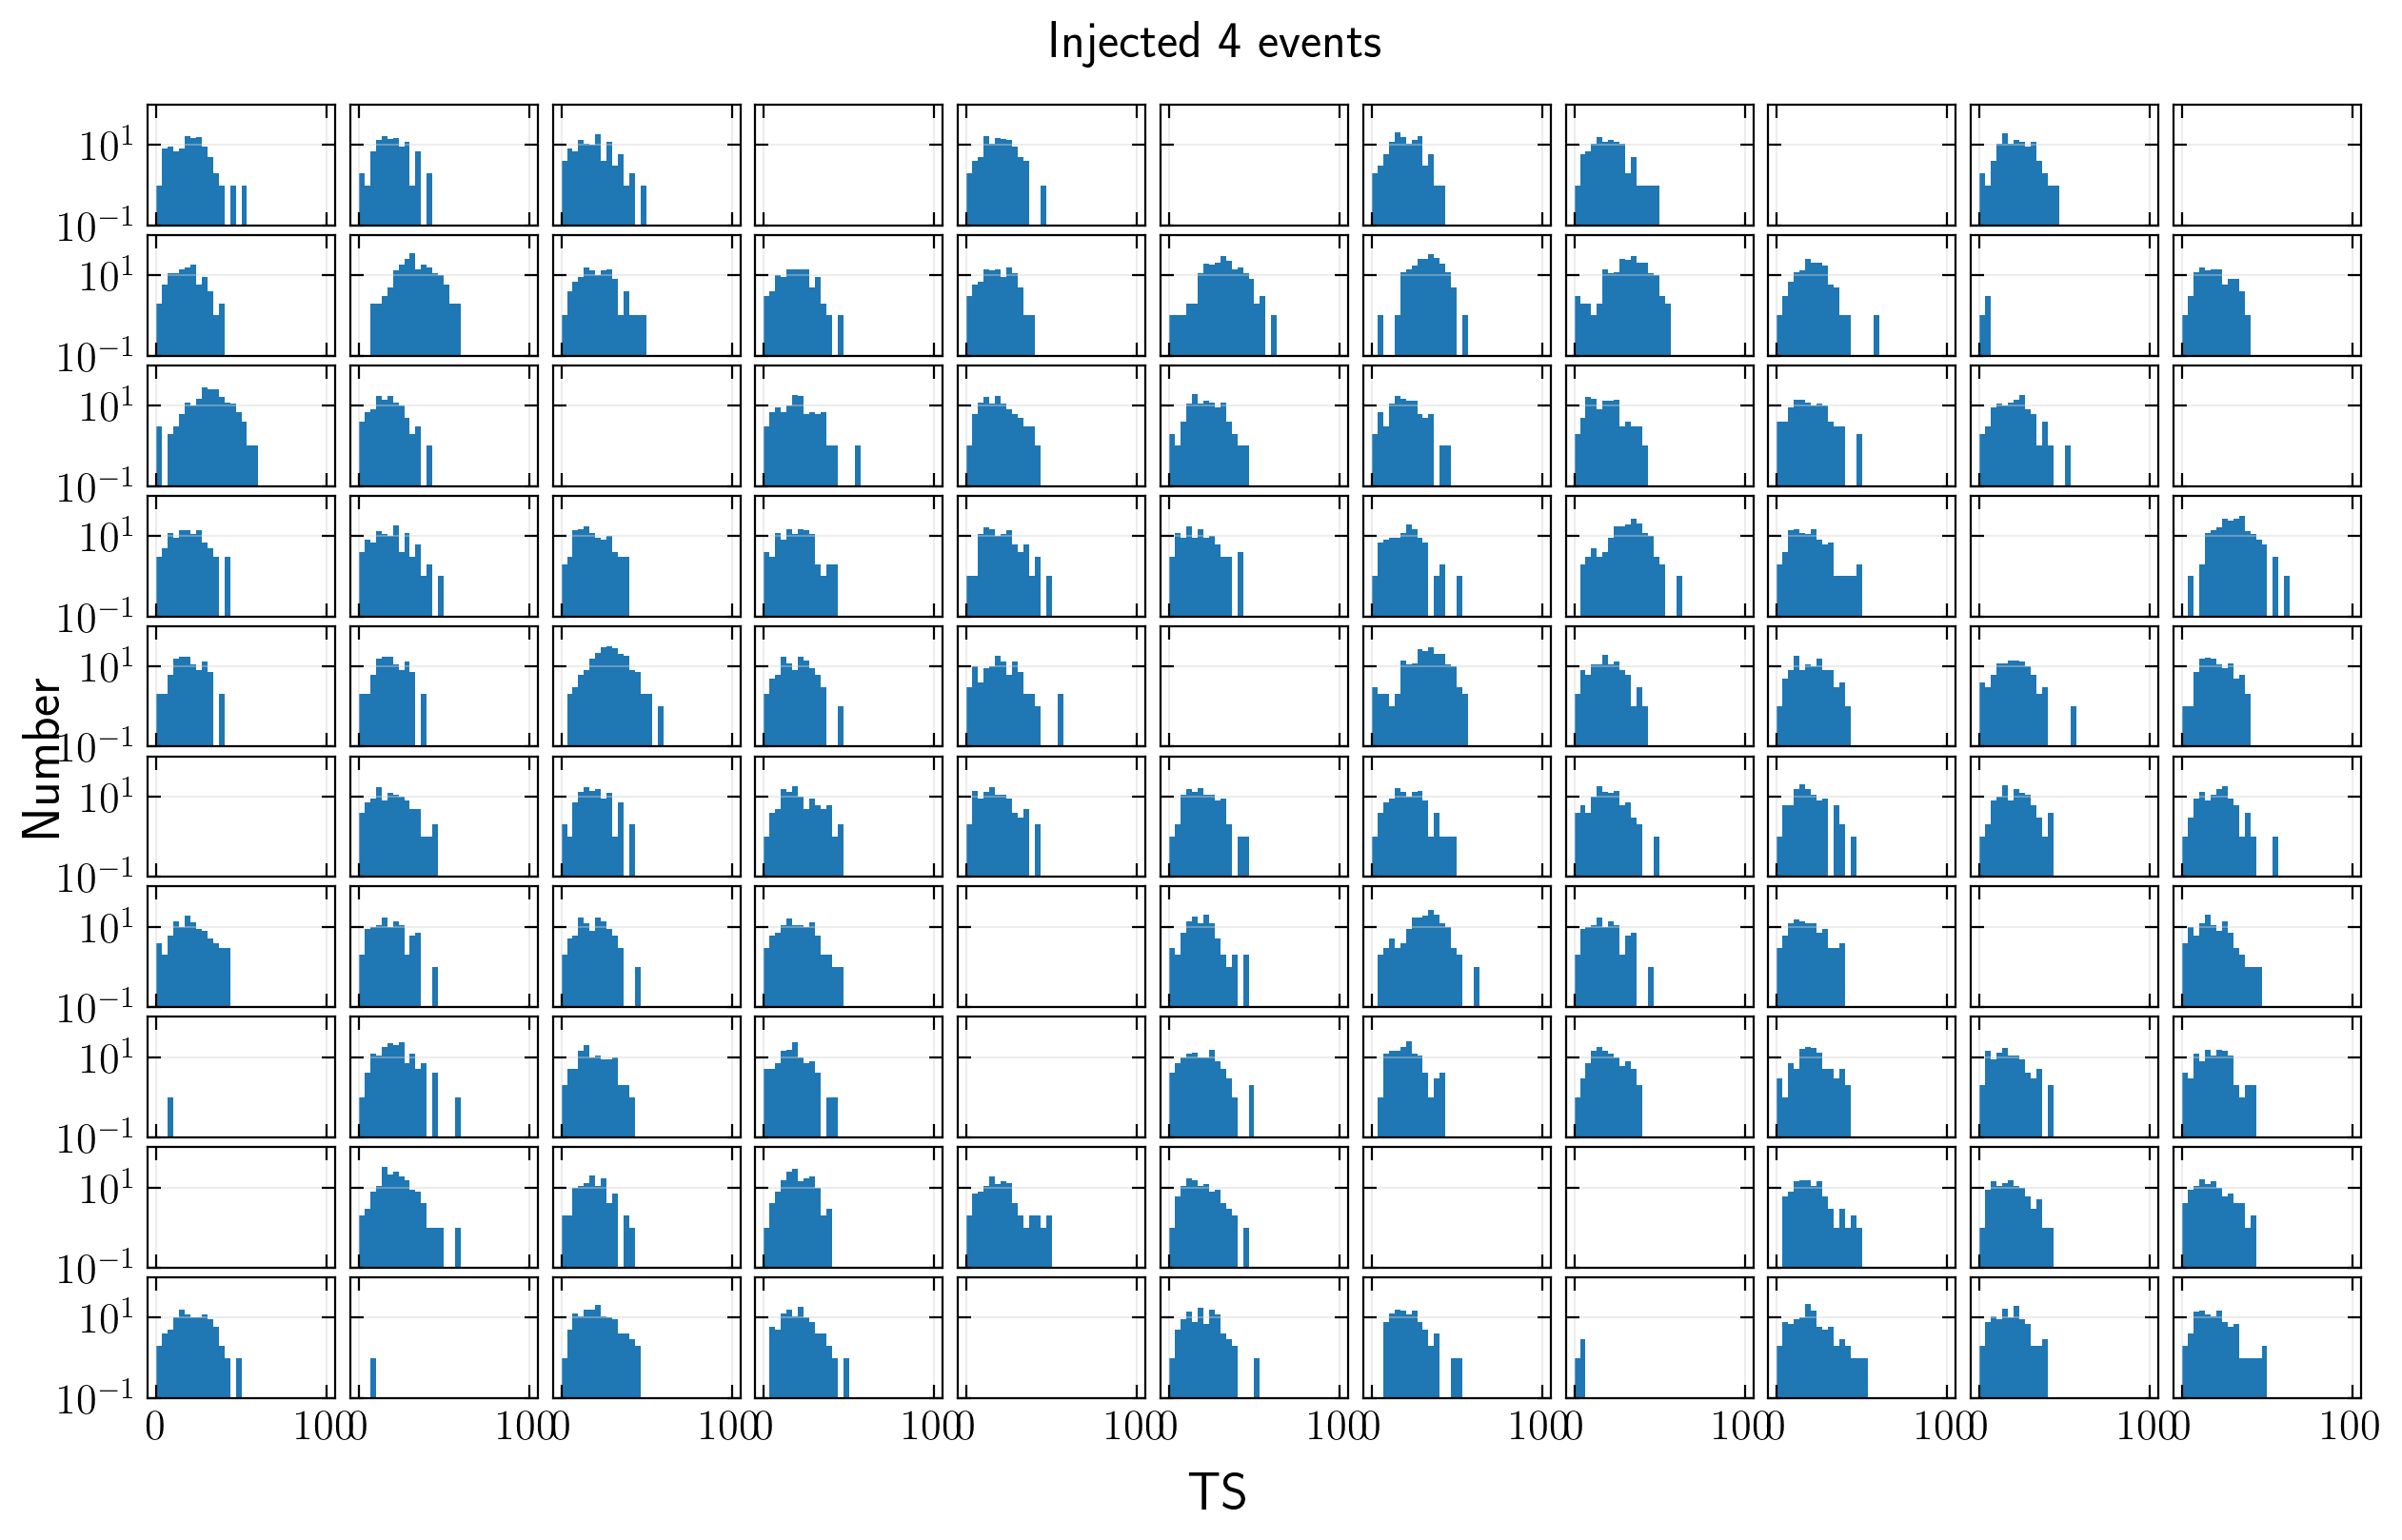

 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109

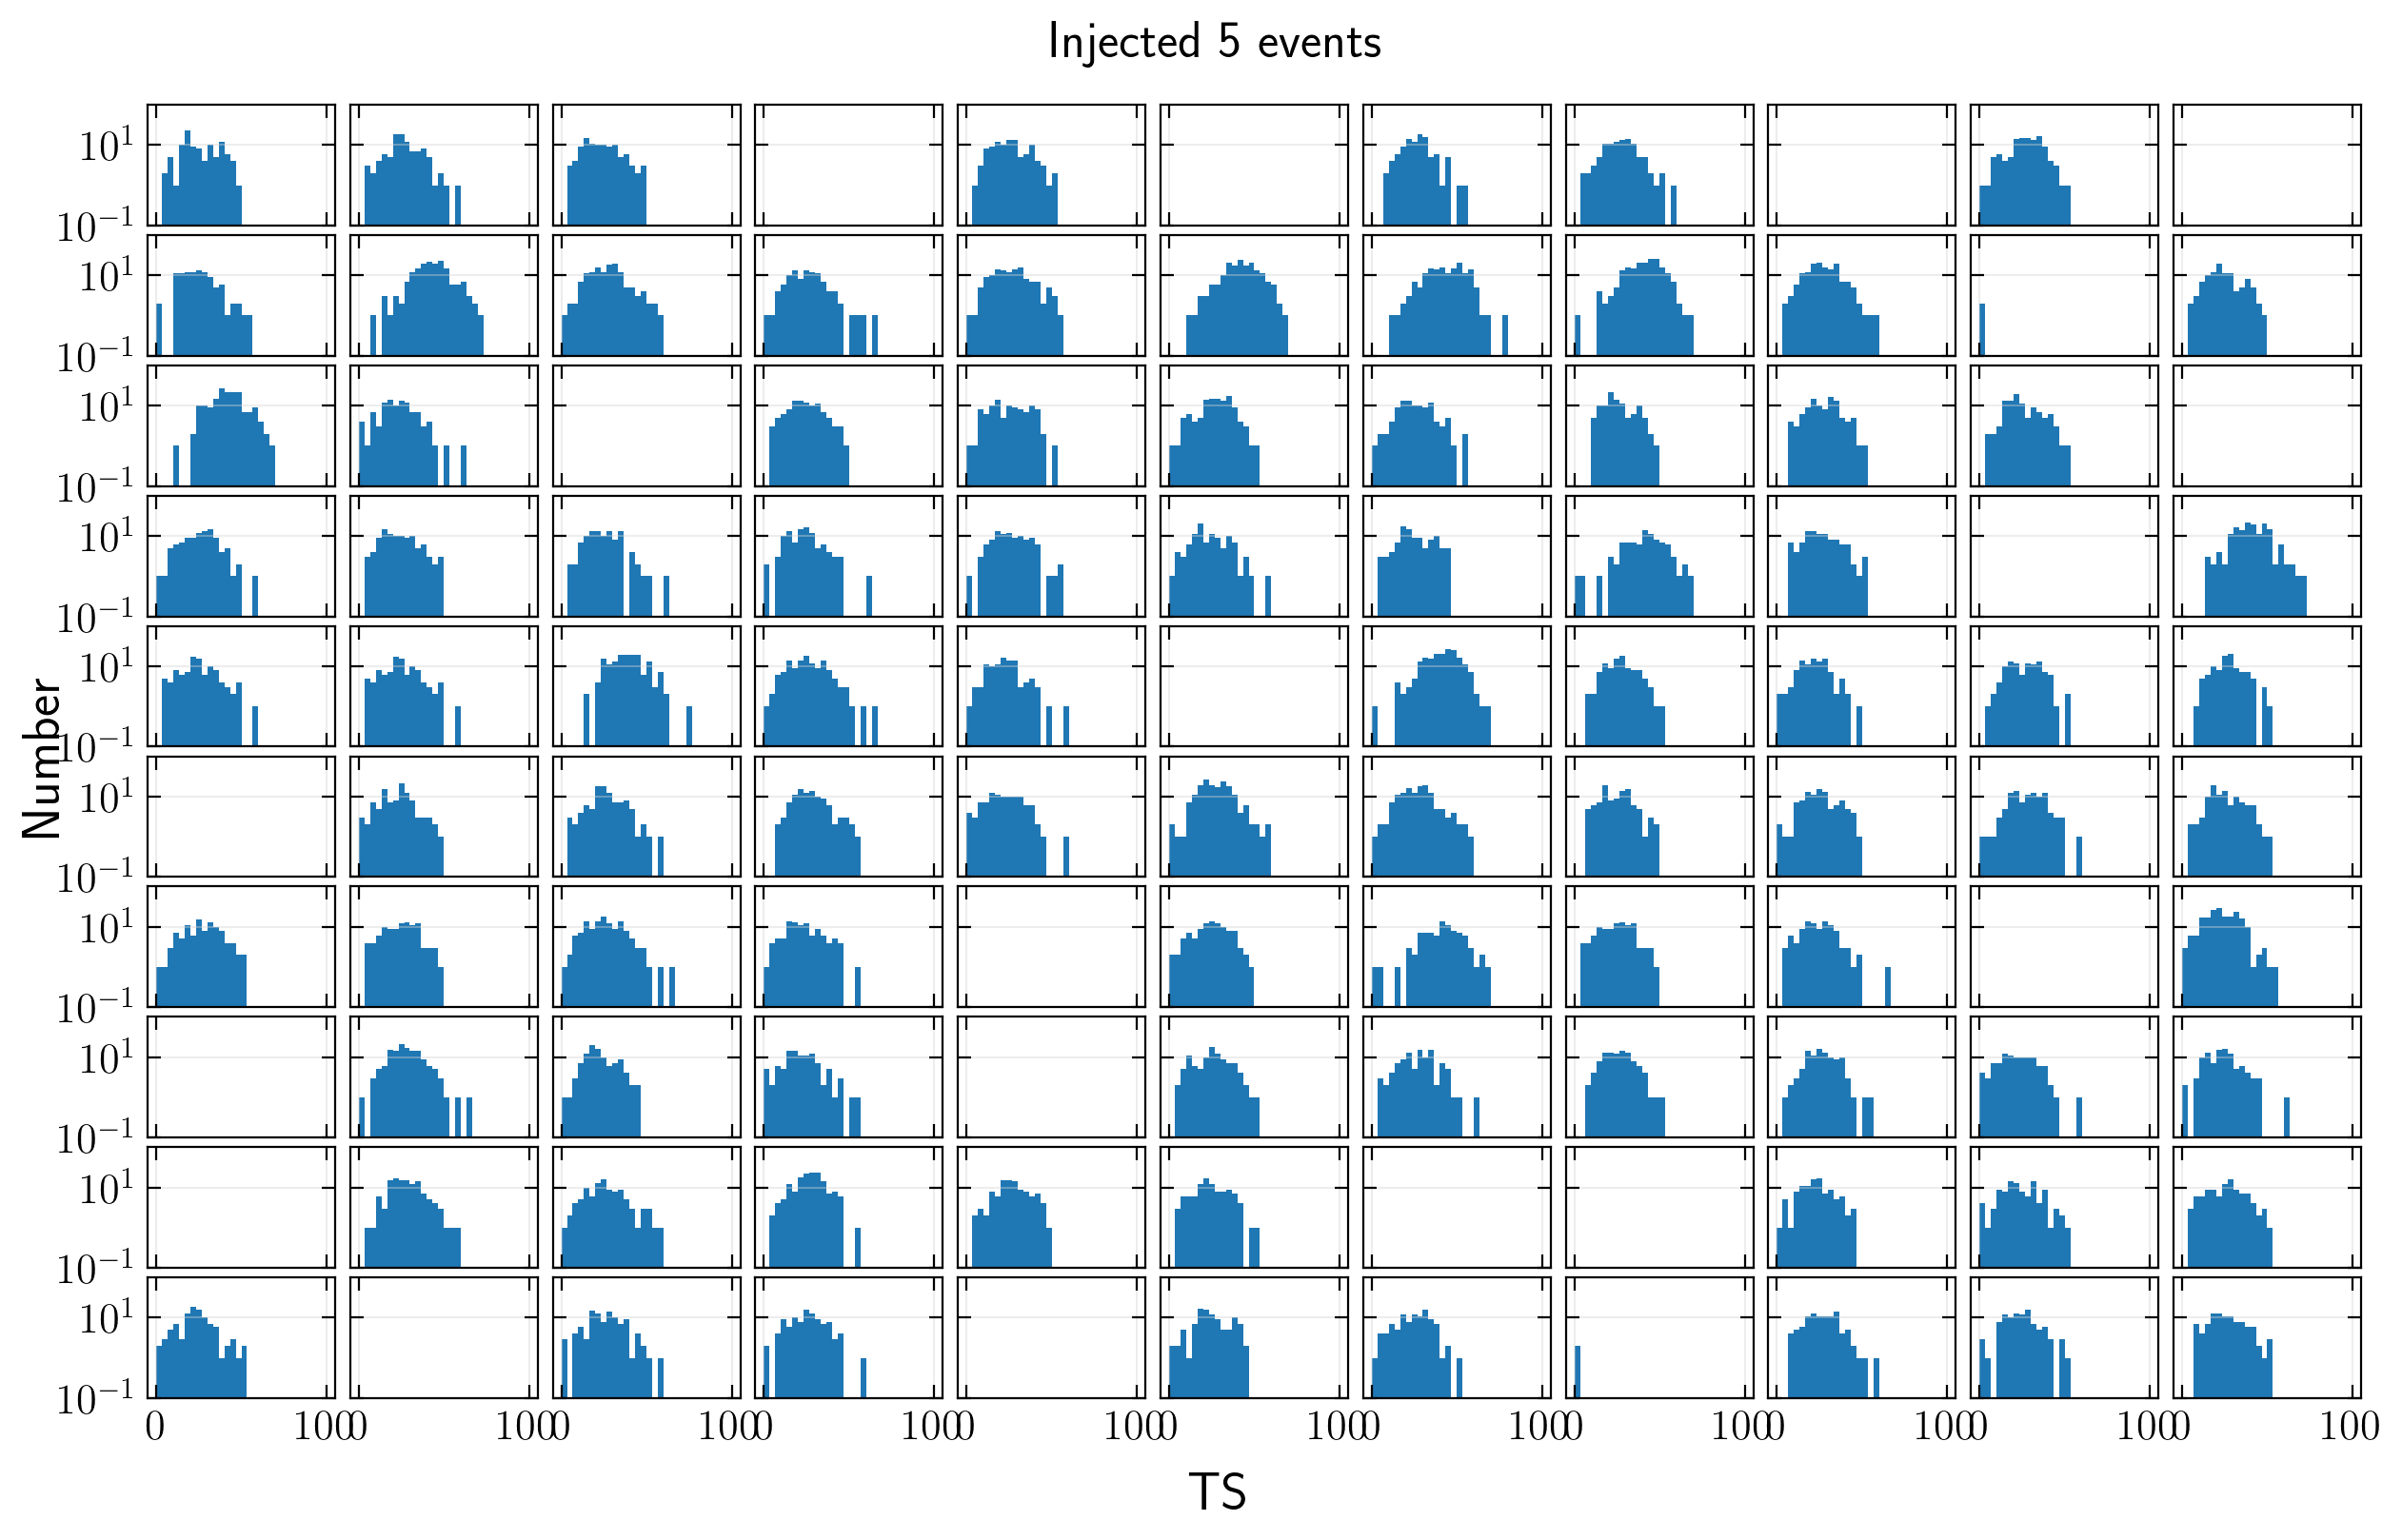

 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109

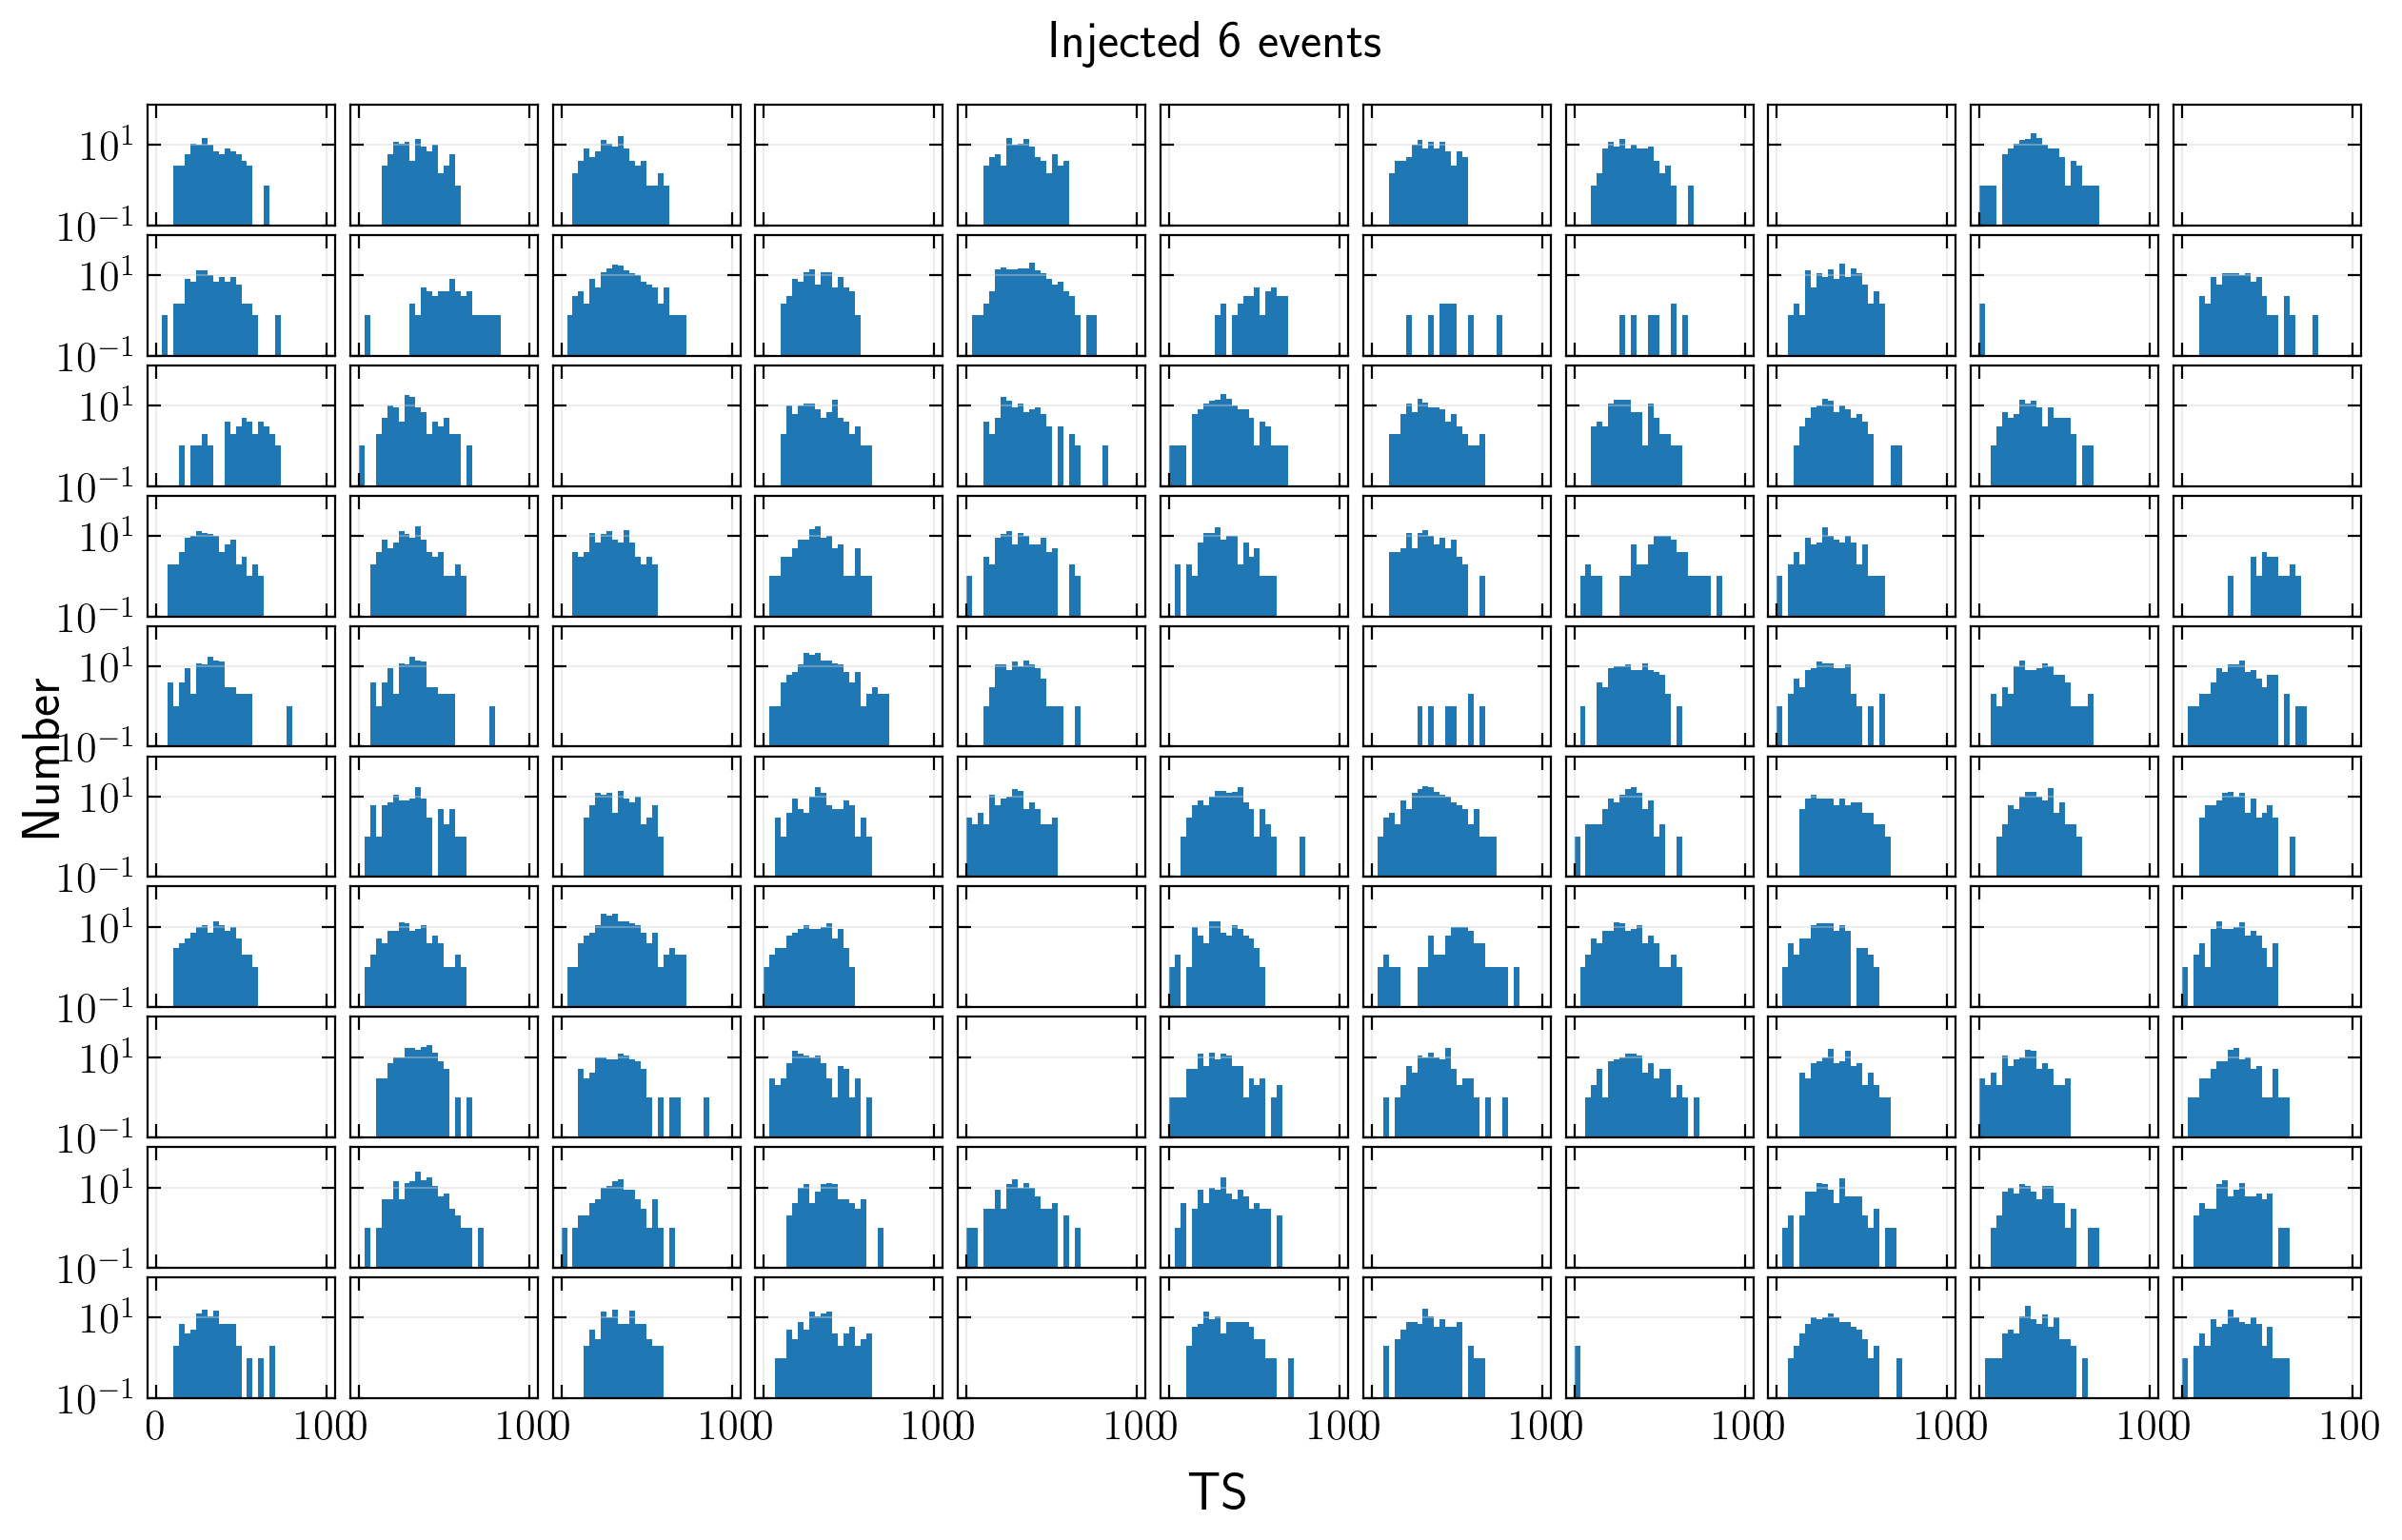

In [5]:
for nsig in range(1, 7):
    fig, axs = plt.subplots(nrows=10, ncols=11, sharex=True, sharey=True, figsize=(15, 9), dpi=200)
    plt.subplots_adjust(hspace = 0.08, wspace = 0.08)
    for i in range(110):
        print i, 
        ax = axs[i/11, i%11]
        try:
            sigs = np.load('/data/user/apizzuto/fast_response_skylab/alert_event_followup/analysis_trials/fits/index_{}_time_172800.0.pkl'.format(i))
            ts = np.array(sigs['ts_prior'])
            ninj = np.array(sigs['true_ns'])
            ts = ts[ninj == nsig]
            ax.hist(ts, bins=np.linspace(0., 100., 31))
            ax.set_yscale('log')
            ax.set_ylim(1e-1, 1e2)
        except:
            continue
    fig.text(0.5, 0.06, 'TS', ha='center', fontsize = 20)
    fig.text(0.08, 0.5, 'Number', va='center', rotation='vertical', fontsize = 20)
    plt.suptitle('Injected {} events'.format(nsig), y = 0.93)
    plt.show()

# p value back of the envelope

In [13]:
import scipy.stats as st

In [4]:
plist = [1.]*19 + [0.075, 0.027, 0.073, 0.078, 0.055, 0.11, 0.036, 0.0146, 0.039, 0.01247, 0.0769]
obs_p = 1.
plist = sorted(plist)
for i, p in enumerate(plist):
    tmp = st.binom_test(i+1, len(plist), p)
    if tmp < obs_p and tmp != 0.0:
        obs_p = tmp
        
min_ps = []
for j in range(10000):
    ps = np.random.uniform(low=0.0, high=1.0, size=len(plist))
    ps = sorted(ps)
    tmp = []
    for i, p in enumerate(ps):
        tmp.append(st.binom_test(i+1, len(ps), p))
    min_ps.append(np.min(tmp))
  

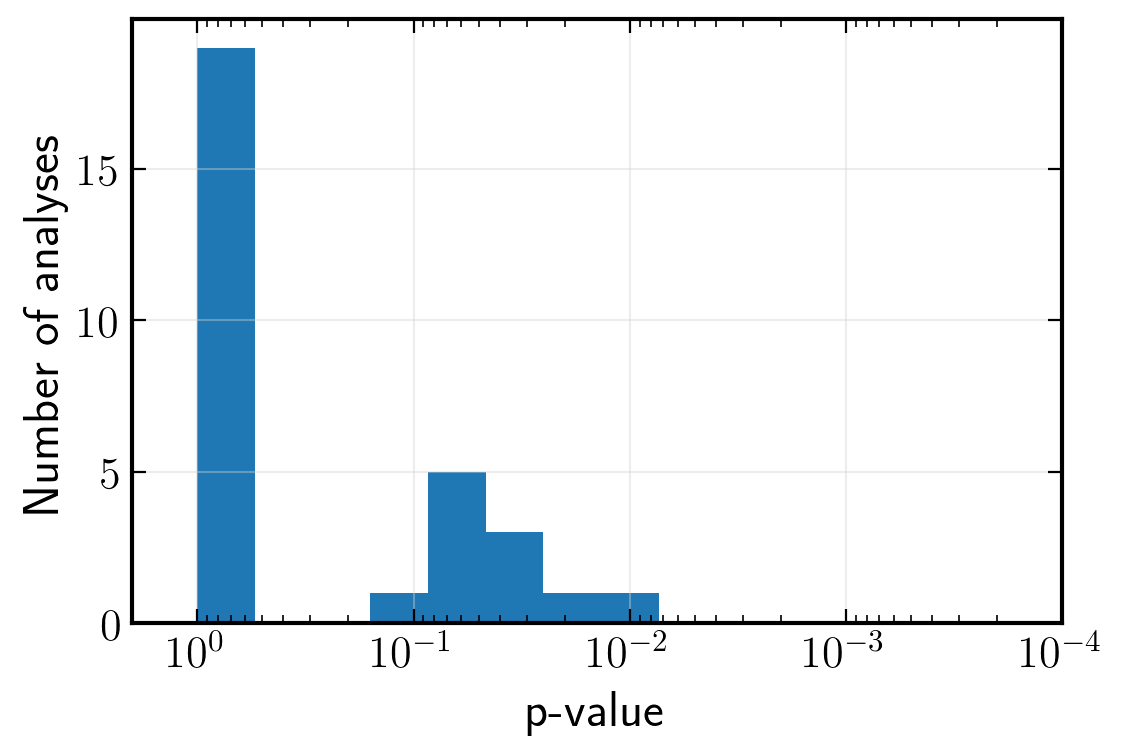

In [5]:
fig = plt.figure(dpi=200)
plt.hist(plist, bins = np.logspace(-4., 0., 16))
#plt.yscale('log')
plt.xscale('log')
plt.xlim(2e0, 1e-4)
plt.ylabel('Number of analyses')
plt.xlabel('p-value')
plt.show()

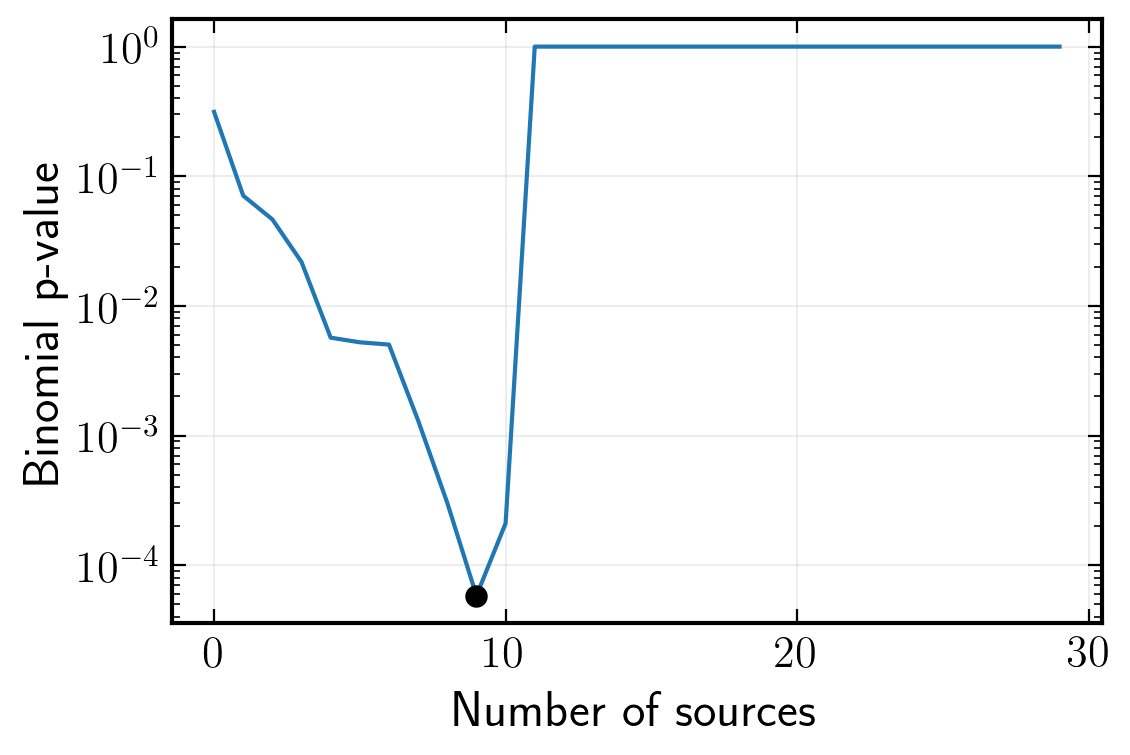

In [7]:
fig = plt.figure(dpi=200)

plist = [1.]*19 + [0.075, 0.027, 0.073, 0.078, 0.055, 0.11, 0.036, 0.0146, 0.039, 0.01247, 0.0769]
obs_p = 1.
plist = sorted(plist)
tmps = []
for i, p in enumerate(plist):
    tmp = st.binom_test(i+1, len(plist), p)
    if tmp != 0.:
        tmps.append(tmp)
    else:
        tmps.append(1.0)
    if tmp < obs_p and tmp != 0.0:
        obs_p = tmp
plt.plot(list(range(len(tmps))), tmps)  
tmps = np.array(tmps)
plt.scatter(np.argmin(tmps), np.min(tmps), color='k', s=50, zorder=5)

plt.yscale('log')
plt.xlabel('Number of sources')
plt.ylabel('Binomial p-value')
plt.show()

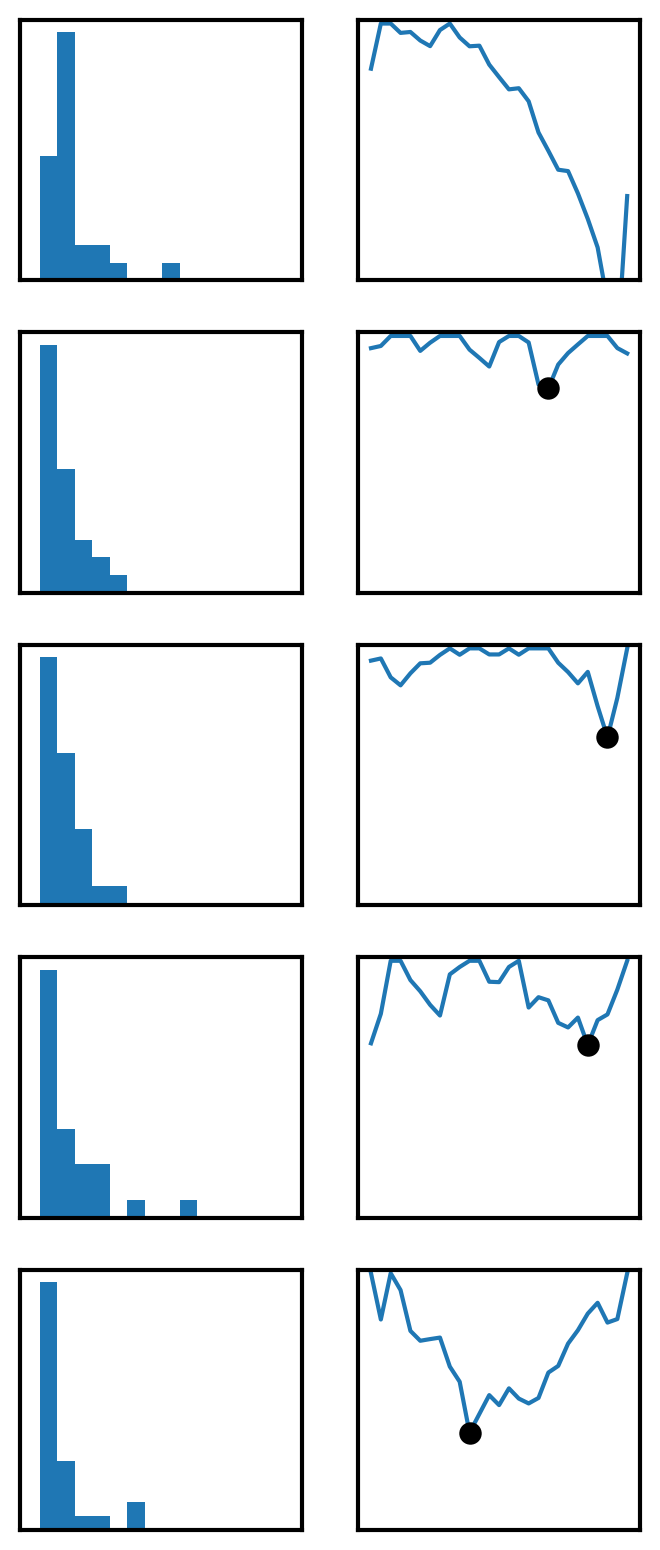

In [8]:
fig, axs = plt.subplots(figsize=(4,10), nrows=5, ncols=2, dpi=200)
for ii in range(5):
    ps = np.random.uniform(low=0.0, high=1.0, size=27)
    ps = sorted(ps)
    axs[ii,0].hist(ps, bins = np.logspace(-4., 0., 16))
    axs[ii,0].set_xscale('log')
    axs[ii,0].set_xlim(2e0, 1e-4)
    #axs[ii,0].set_ylabel('Number of analyses')
    #axs[ii,0].set_xlabel('p-value')
    axs[ii,0].set_xticks([])
    axs[ii,0].set_yticks([])
    
    tmps = []
    for i, p in enumerate(ps):
        tmp = st.binom_test(i+1, len(ps), p)
        if tmp != 0.:
            tmps.append(tmp)
        else:
            tmps.append(1.0)
        
    axs[ii,1].plot(list(range(len(tmps))), tmps)  
    tmps = np.array(tmps)
    axs[ii,1].scatter(np.argmin(tmps), np.min(tmps), color='k', s=50, zorder=5)
    axs[ii,1].set_xticks([])
    axs[ii,1].set_ylim(1e-3, 1.1e0)

    axs[ii,1].set_yscale('log')
    axs[ii,1].set_yticks([])
    #plt.xlabel('Number of sources')
    #plt.ylabel('Binomial p-value')
    #plt.show()
    
plt.show()

In [4]:
import pickle
with open('/data/user/apizzuto/fast_response_skylab/dump/test_scans_subset.pkl', 'r') as fi:
    tests = pickle.load(fi)
print tests.keys()

['p', 'tsd', 'TS']


In [38]:
plist = np.array(tests['p'])
plist = np.where(plist != 0., plist, 0.02)
obs_p = 1.
plist = sorted(plist)
for i, p in enumerate(plist):
    tmp = st.binom_test(i+1, len(plist), p, alternative='greater')
    if tmp < obs_p and tmp != 0.0:
        obs_p = tmp
        
pdists = []
for i in range(len(tests['tsd'])):
    if tests['tsd'][i] is None:
        pdists.append(np.linspace(0.01, 1.0, 100))
    else:
        nzeroes = np.count_nonzero(tests['tsd'][i] == 0.)
        max_p = 1. - (0.01 * nzeroes)
        tmp_plist = [1.0] * nzeroes + list(np.linspace(0.01, max_p, int(max_p * 100)))
        pdists.append(np.array(tmp_plist))
        
min_ps = []
for j in range(50000):
    ps = []
    for k in range(len(pdists)):
        ps.append(np.random.choice(pdists[k], size = 1).item())
    #ps = np.random.uniform(low=0.0, high=1.0, size=len(plist))
    ps = sorted(ps)
    tmp = []
    for i, p in enumerate(ps):
        tmp.append(st.binom_test(i+1, len(ps), p, alternative='greater'))
    min_ps.append(np.min(tmp))

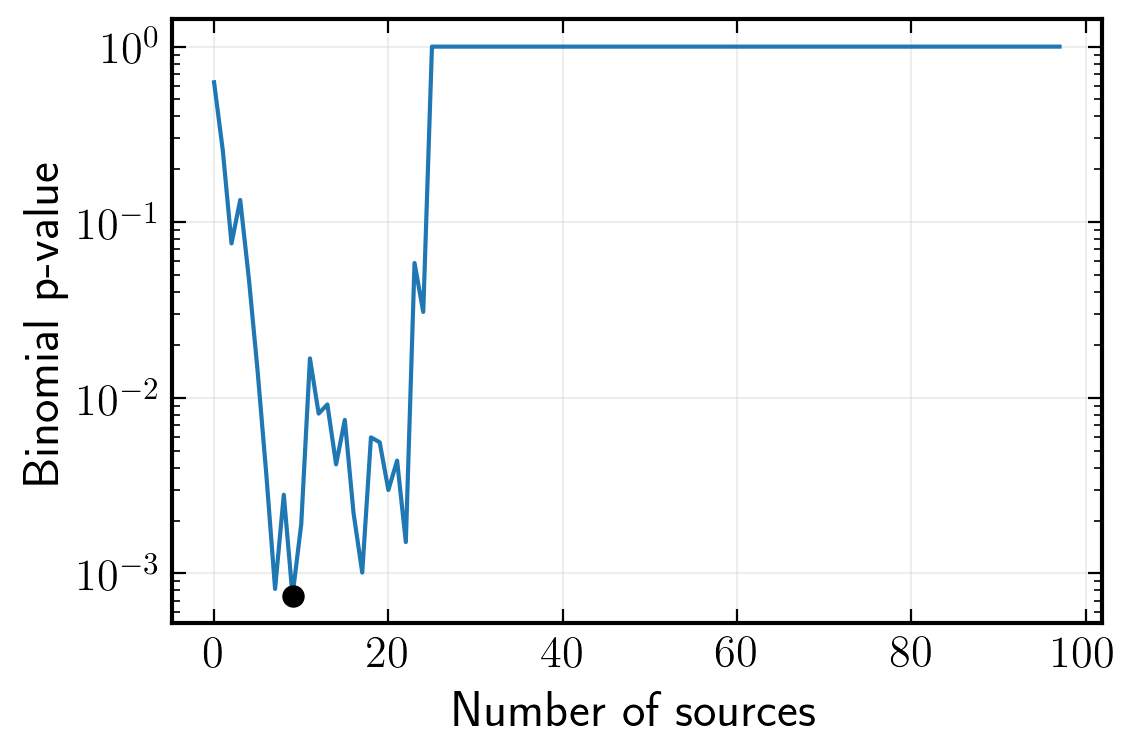

In [35]:
fig = plt.figure(dpi=200)

plist = np.array(tests['p'])
plist = np.where(plist != 0., plist, 0.02)
obs_p = 1.
plist = sorted(plist)
tmps = []
for i, p in enumerate(plist):
    tmp = st.binom_test(i+1, len(plist), p, alternative='greater')
    if tmp != 0.:
        tmps.append(tmp)
    else:
        tmps.append(1.0)
    if tmp < obs_p and tmp != 0.0:
        obs_p = tmp
plt.plot(list(range(len(tmps))), tmps)  
tmps = np.array(tmps)
plt.scatter(np.argmin(tmps), np.min(tmps), color='k', s=50, zorder=5)

plt.yscale('log')
plt.xlabel('Number of sources')
plt.ylabel('Binomial p-value')
plt.show()

('Post-trial p-value: ', 0.0024)


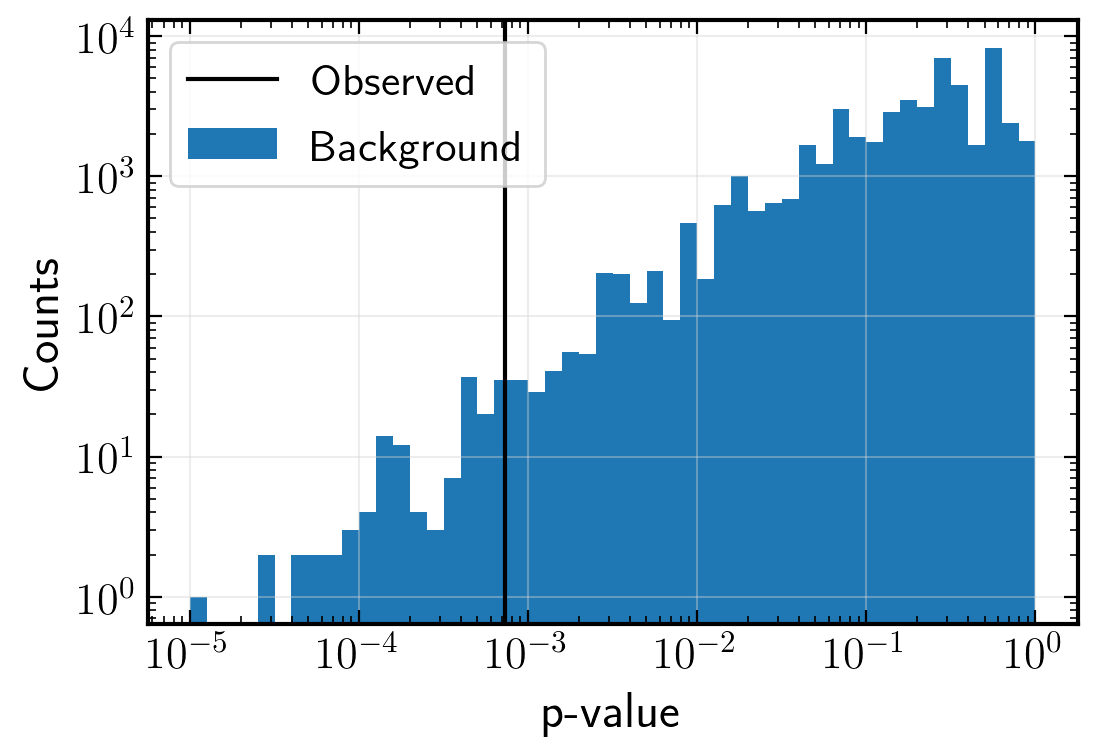

In [40]:
fig = plt.figure(dpi=200)

print("Post-trial p-value: ", np.count_nonzero(np.array(min_ps) < obs_p) / float(len(min_ps)))
plt.hist(min_ps, bins = np.logspace(-5., 0., 51), label = 'Background')
plt.axvline(obs_p, color = 'k', label = 'Observed')
#plt.text(2e-4, 400, "Post trials \n p = {:.1e}".format(np.count_nonzero(np.array(min_ps) < obs_p) / float(len(min_ps))))
plt.legend(loc=2)
plt.xscale('log')
plt.ylabel('Counts')
plt.xlabel("p-value")
plt.yscale('log')
plt.show()

In [6]:
import scipy.stats as st
import pickle
with open('/data/user/apizzuto/fast_response_skylab/dump/test_scans_subset_smear.pkl', 'r') as fi:
    tests = pickle.load(fi)

In [11]:
plist = np.array(tests['p'])
plist = np.where(plist != 0., plist, 0.02)
obs_p = 1.
plist = sorted(plist)
for i, p in enumerate(plist):
    tmp = st.binom_test(i+1, len(plist), p, alternative='greater')
    if tmp < obs_p and tmp != 0.0:
        obs_p = tmp
        
pdists = []
for i in range(len(tests['tsd'])):
    if tests['tsd'][i] is None:
        pdists.append(np.linspace(0.01, 1.0, 100))
    else:
        nzeroes = np.count_nonzero(tests['tsd'][i] == 0.)
        max_p = 1. - (0.01 * nzeroes)
        tmp_plist = [1.0] * nzeroes + list(np.linspace(0.01, max_p, int(max_p * 100)))
        pdists.append(np.array(tmp_plist))
        
min_ps = []
for j in range(50000):
    ps = []
    for k in range(len(pdists)):
        ps.append(np.random.choice(pdists[k], size = 1).item())
    #ps = np.random.uniform(low=0.0, high=1.0, size=len(plist))
    ps = sorted(ps)
    tmp = []
    for i, p in enumerate(ps):
        tmp.append(st.binom_test(i+1, len(ps), p, alternative='greater'))
    min_ps.append(np.min(tmp))

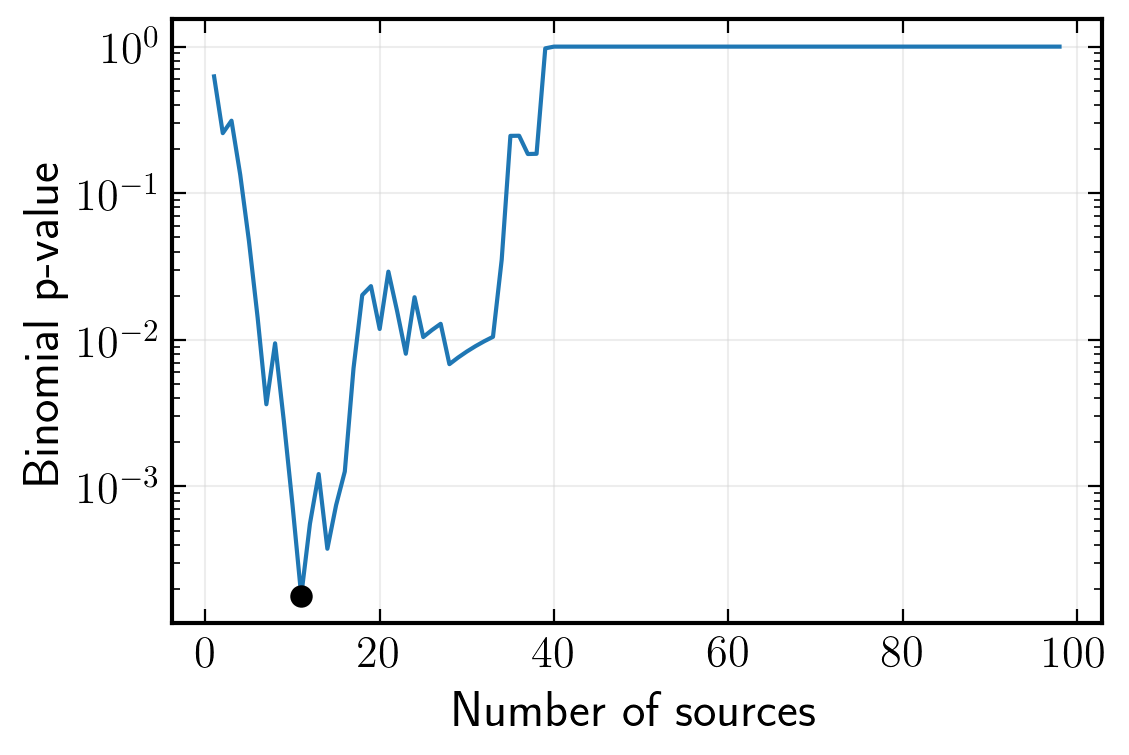

In [12]:
fig = plt.figure(dpi=200)

plist = np.array(tests['p'])
plist = np.where(plist != 0., plist, 0.02)
obs_p = 1.
plist = sorted(plist)
tmps = []
for i, p in enumerate(plist):
    tmp = st.binom_test(i+1, len(plist), p, alternative='greater')
    if tmp != 0.:
        tmps.append(tmp)
    else:
        tmps.append(1.0)
    if tmp < obs_p and tmp != 0.0:
        obs_p = tmp
plt.plot(np.linspace(1, len(tmps), len(tmps)), tmps)  
tmps = np.array(tmps)
plt.scatter(np.argmin(tmps) + 1, np.min(tmps), color='k', s=50, zorder=5)

plt.yscale('log')
plt.xlabel('Number of sources')
plt.ylabel('Binomial p-value')
plt.show()

('Post-trial p-value: ', 0.0006)


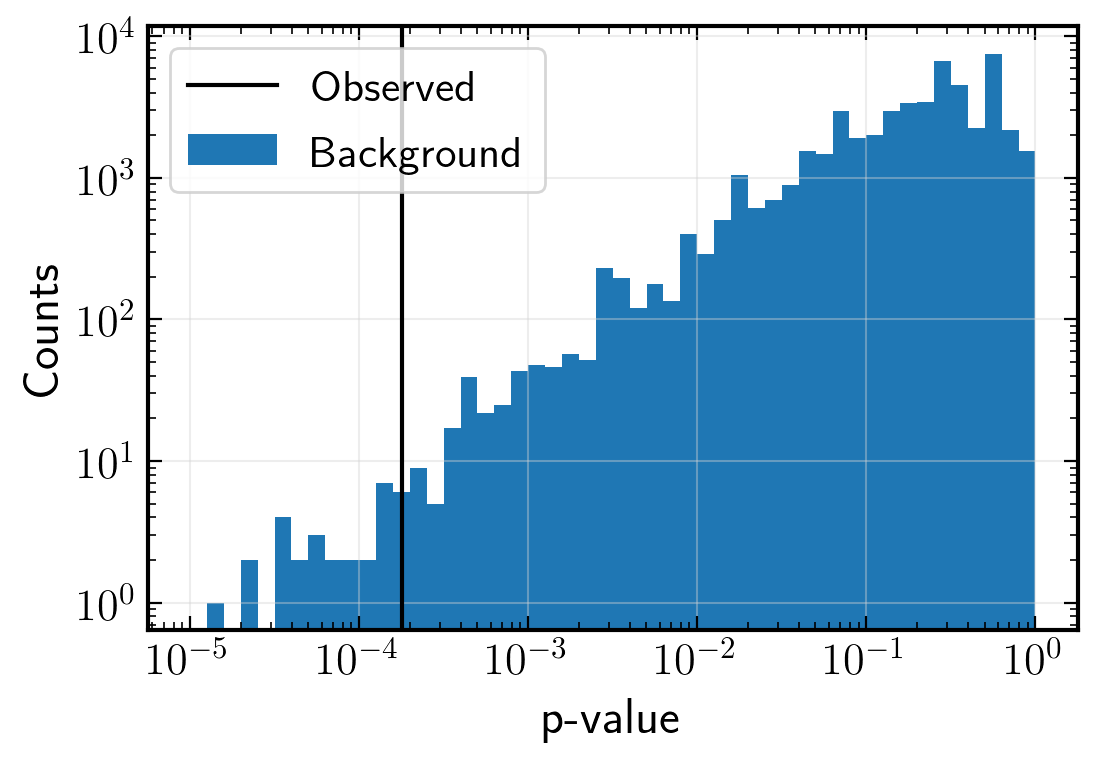

In [14]:
fig = plt.figure(dpi=200)

print("Post-trial p-value: ", np.count_nonzero(np.array(min_ps) < obs_p) / float(len(min_ps)))
plt.hist(min_ps, bins = np.logspace(-5., 0., 51), label = 'Background')
plt.axvline(obs_p, color = 'k', label = 'Observed')
#plt.text(2e-4, 400, "Post trials \n p = {:.1e}".format(np.count_nonzero(np.array(min_ps) < obs_p) / float(len(min_ps))))
plt.legend(loc=2)
plt.xscale('log')
plt.ylabel('Counts')
plt.xlabel("p-value")
plt.yscale('log')
plt.show()

In [15]:
import scipy as sp

In [33]:
def significance(p):
    sigma = np.sqrt(2)*sp.special.erfinv(1-2*p)
    return sigma

In [42]:
print significance(4.8e-04)
print significance(3.3e-05)
print significance(0.0012)

3.3019943613003098
3.9902632507896625
3.0356723666270784


In [11]:
plist = [1.]*19 + [0.075, 0.027, 0.073, 0.078, 0.055, 0.11, 0.036, 0.0146, 0.039, 0.01247, 0.0769]
obs_p = 1.
plist = sorted(plist)
for i, p in enumerate(plist):
    tmp = st.binom_test(i+1, len(plist), p)
    if tmp < obs_p and tmp != 0.0:
        obs_p = tmp
        
min_ps = []
for j in range(100000):
    ps = np.random.uniform(low=0.0, high=1.0, size=len(plist))
    ps = sorted(ps)
    tmp = []
    for i, p in enumerate(ps):
        tmp.append(st.binom_test(i+1, len(ps), p))
    min_ps.append(np.min(tmp))
  

('Post-trial p-value: ', 0.00101)


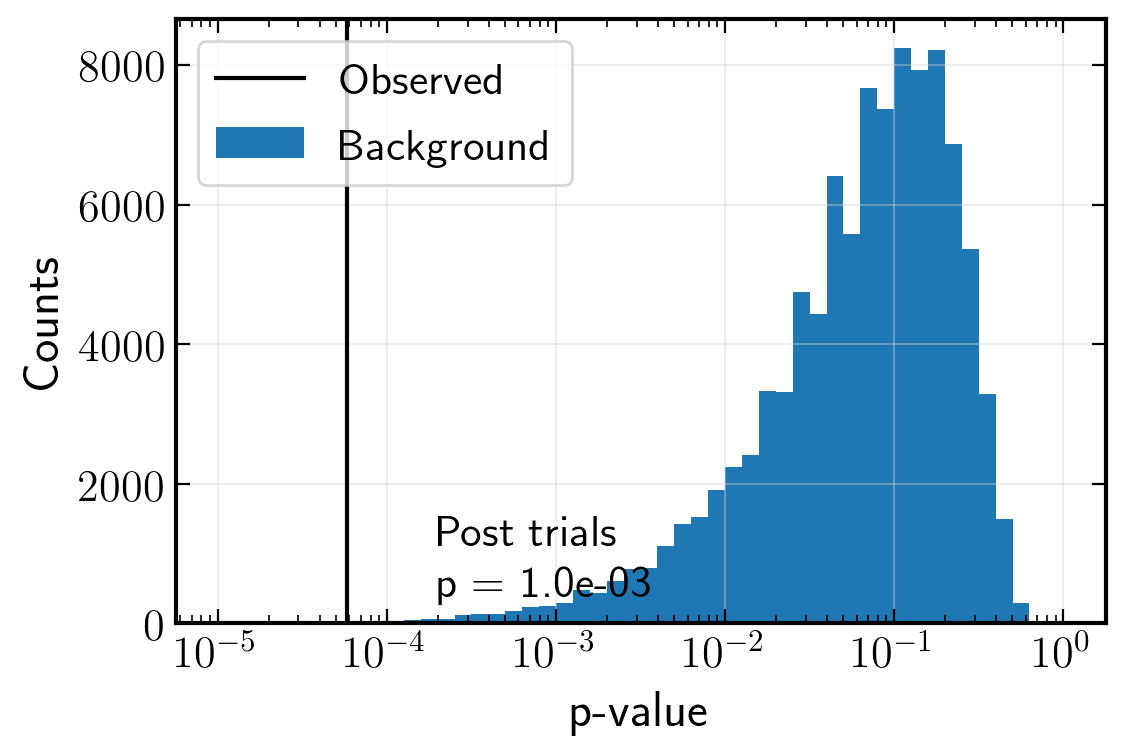

In [12]:
fig = plt.figure(dpi=200)

print("Post-trial p-value: ", np.count_nonzero(np.array(min_ps) < obs_p) / float(len(min_ps)))
plt.hist(min_ps, bins = np.logspace(-5., 0., 51), label = 'Background')
plt.axvline(obs_p, color = 'k', label = 'Observed')
plt.text(2e-4, 400, "Post trials \n p = {:.1e}".format(np.count_nonzero(np.array(min_ps) < obs_p) / float(len(min_ps))))
plt.legend(loc=2)
plt.xscale('log')
plt.ylabel('Counts')
plt.xlabel("p-value")
plt.show()

In [ ]:
plist = [1.]*19 + [0.075, 0.027, 0.073, 0.078, 0.055, 0.11, 0.036, 0.0146, 0.039, 0.01247, 0.0769]
obs_p = 1.
plist = sorted(plist)
for i, p in enumerate(plist):
    tmp = st.binom_test(i+1, len(plist), p)
    if tmp < obs_p and tmp != 0.0:
        obs_p = tmp
        
min_ps = []
for j in range(100000):
    ps = np.random.uniform(low=0.0, high=1.0, size=len(plist))
    ps = sorted(ps)
    tmp = []
    for i, p in enumerate(ps):
        tmp.append(st.binom_test(i+1, len(ps), p))
    min_ps.append(np.min(tmp))
  

# Other stuff

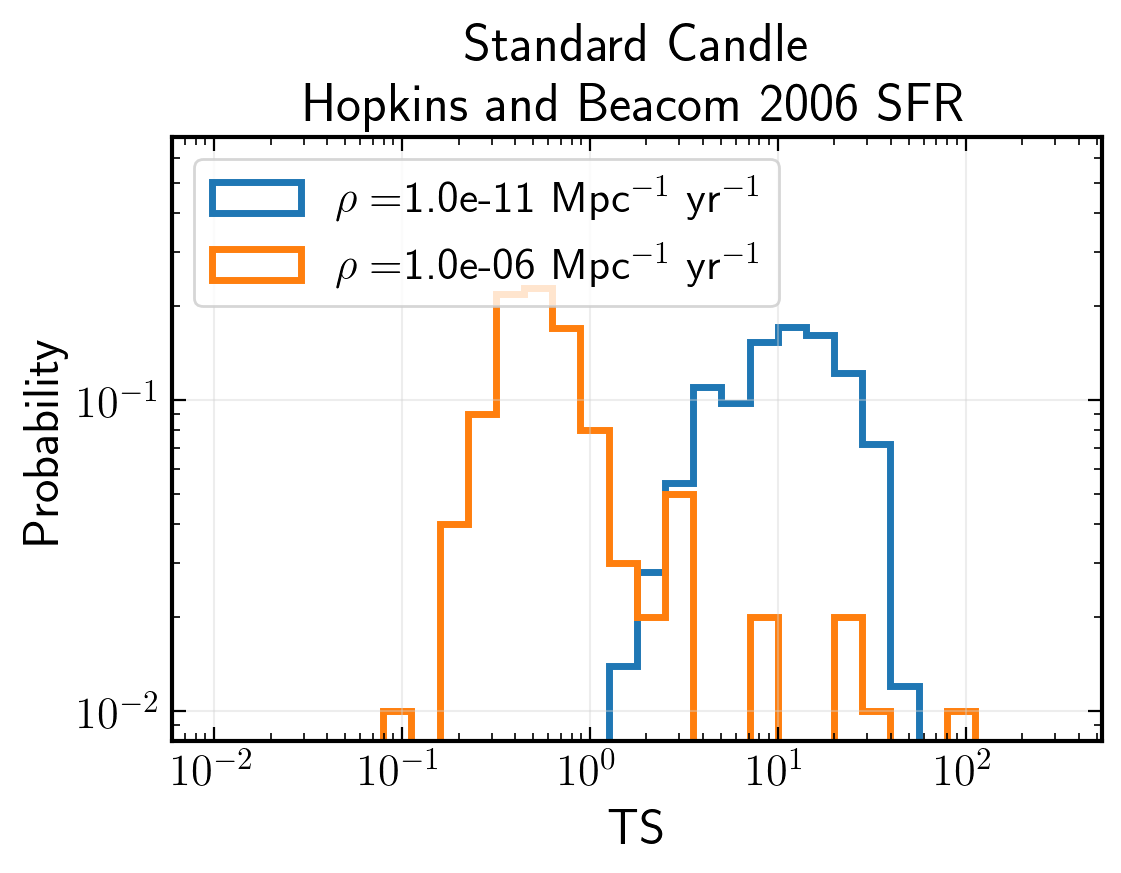

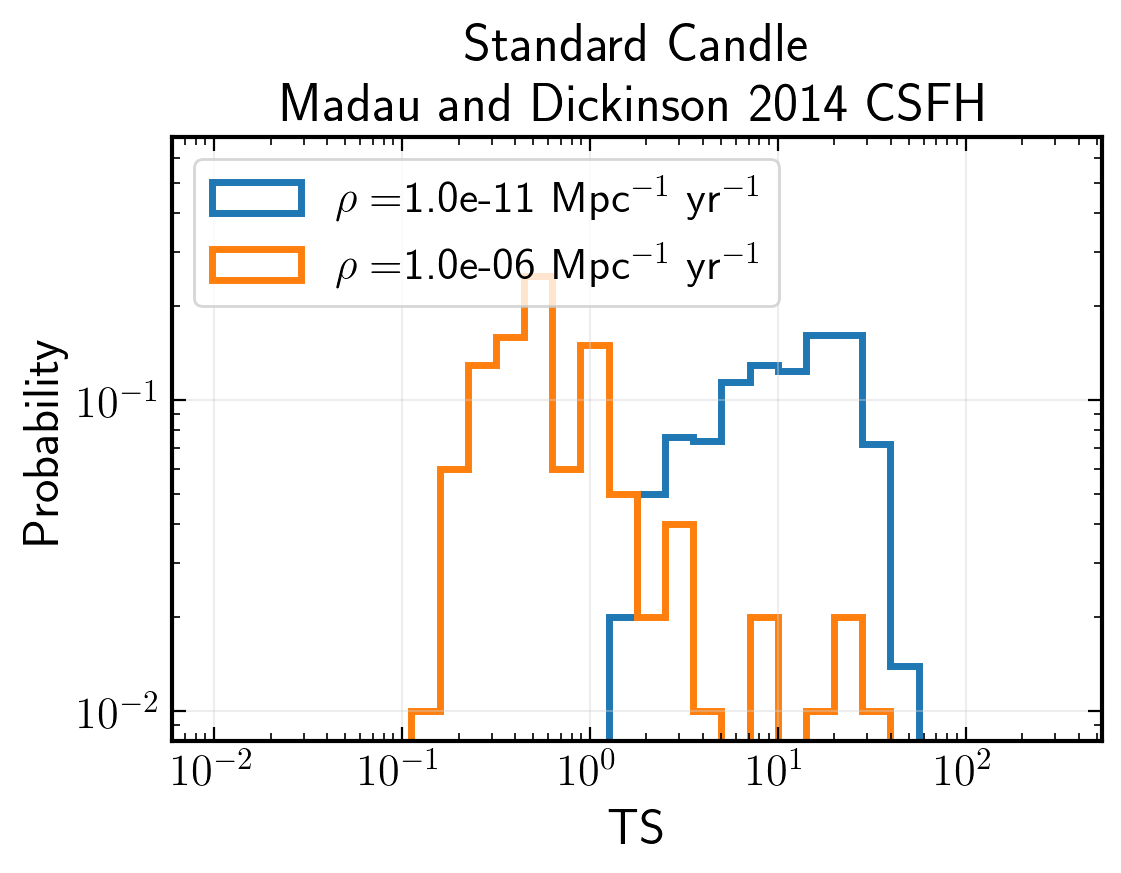

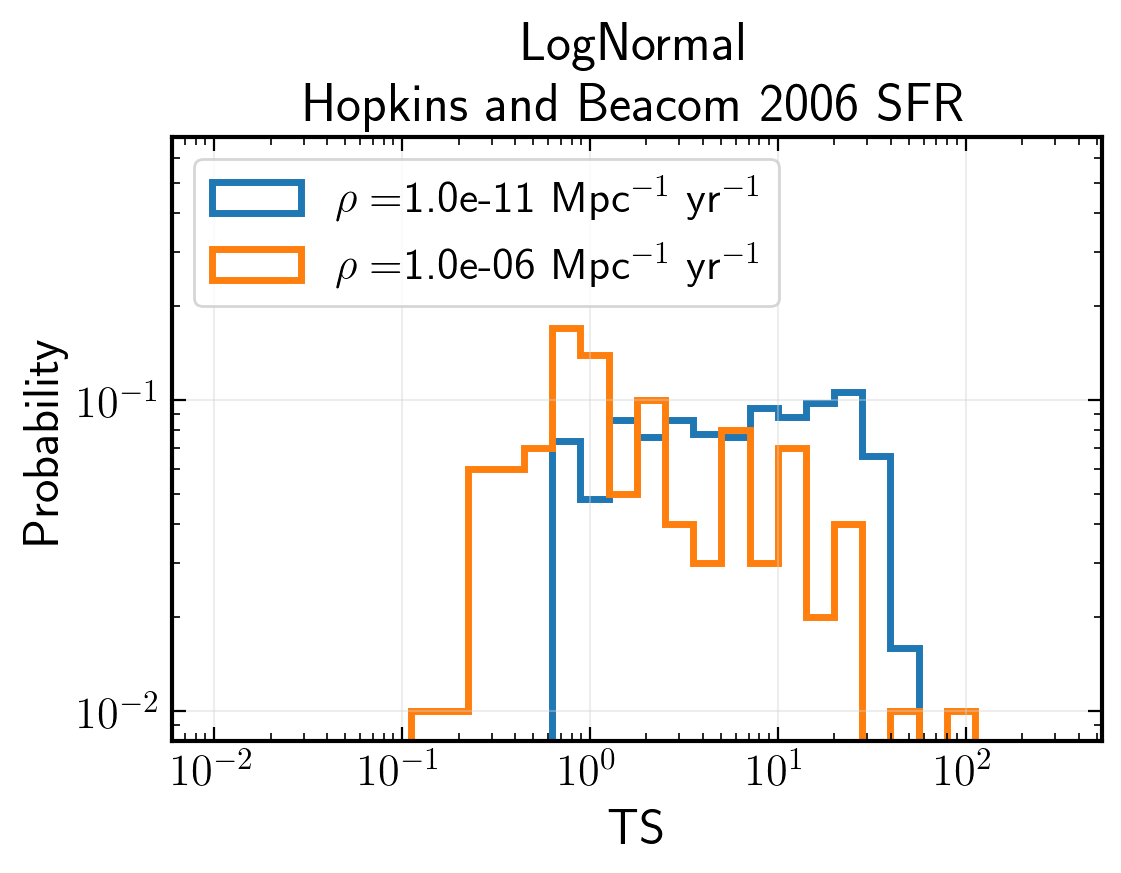

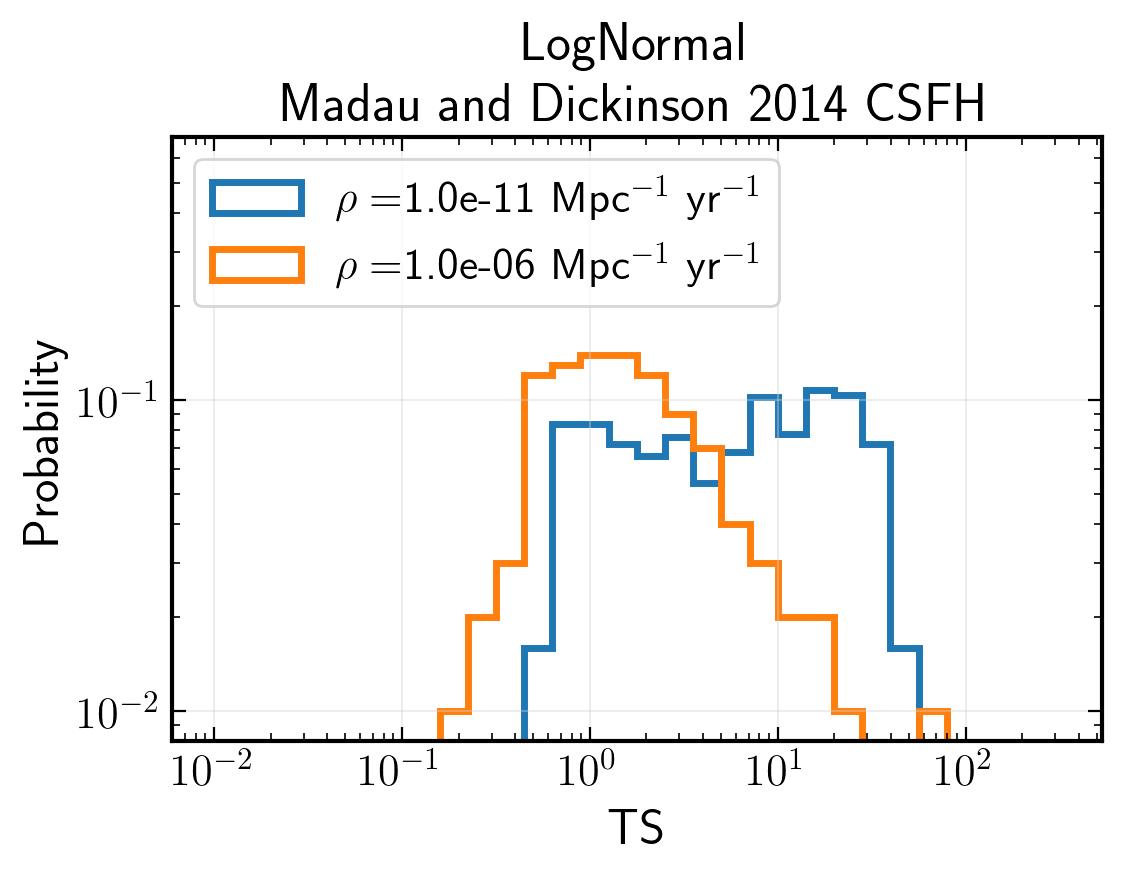

In [3]:
inds = [0,5]
for lumi, ltext in [('SC', 'Standard Candle'), ('LG', 'LogNormal')]:
    for evol, etext in [('HB2006SFR', 'Hopkins and Beacom 2006 SFR'), ('MD2014SFR', 'Madau and Dickinson 2014 CSFH')]:
        fig = plt.figure(dpi=200)
        for density in np.logspace(-11., -6., 6)[inds]:
            try:
                ts = np.load('/data/user/apizzuto/fast_response_skylab/alert_event_followup/ts_distributions/ts_dists_5year_density_{:.2e}_evol_{}_lumi_{}.npy'.format(density, evol, lumi))
            except:
                continue
            plt.hist(ts[0], bins = np.logspace(-2., 2.5, 31), label = r'$\rho = $' + '{:.1e}'.format(density) + r'   Mpc$^{-3}$ yr$^{-1}$', 
                    histtype='step', lw=2.5, weights = [1./len(ts[0])]*len(ts[0]))
            #plt.hist(ts, bins = np.linspace(0., 100., 51), label = r'$\rho = $' + '{:.1e}'.format(density), 
            #        histtype='step', lw=2.5)
        plt.title(ltext + '\n'+ etext)
        plt.ylabel('Probability')
        plt.xlabel('TS')
        plt.xscale('log')
        plt.legend(loc=2)
        plt.yscale('log')
        plt.ylim(8e-3, 7e-1)
        plt.show()

In [14]:
np.percentile(ts, [1,2,3,4,5])

array([0.13727466, 0.15983653, 0.17214064, 0.1742565 , 0.1888511 ])

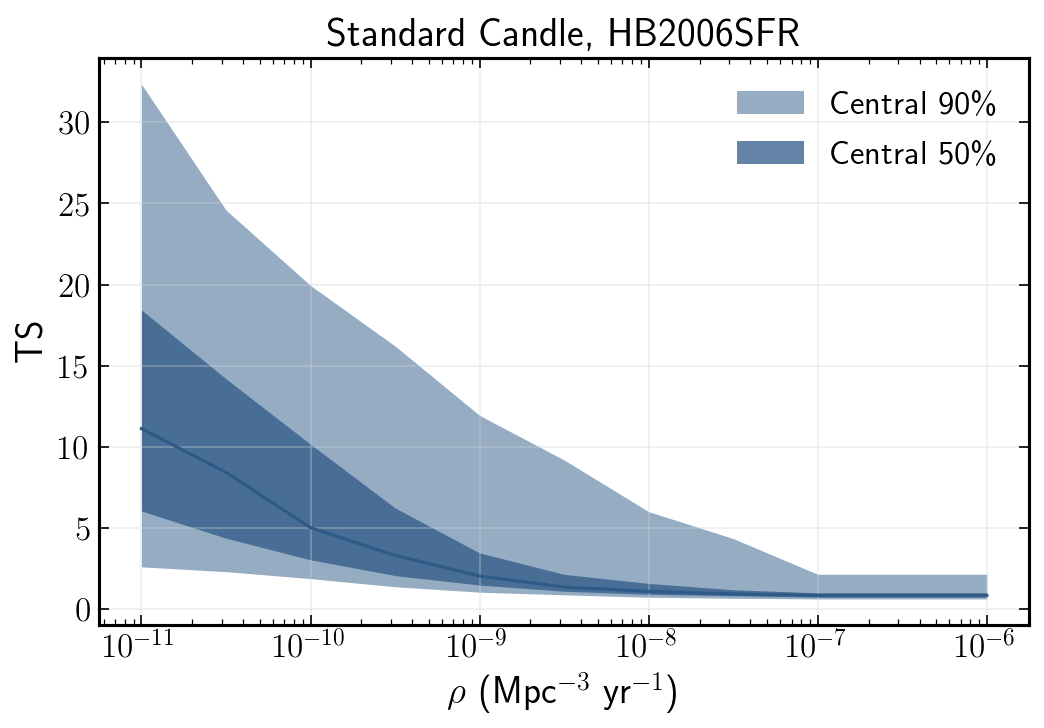

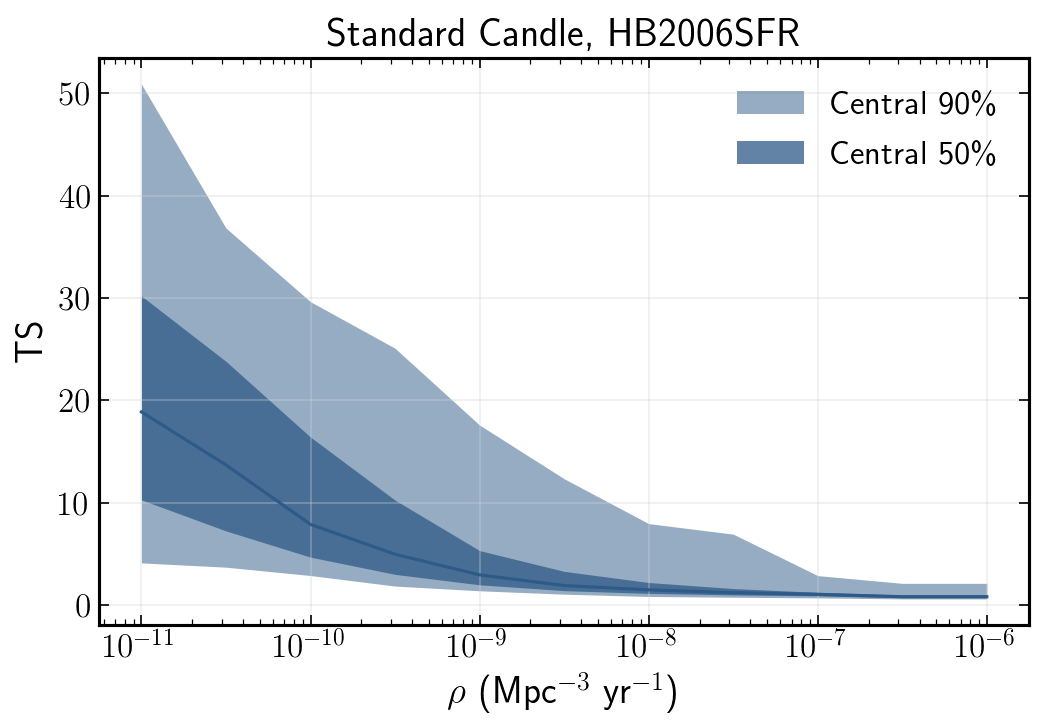

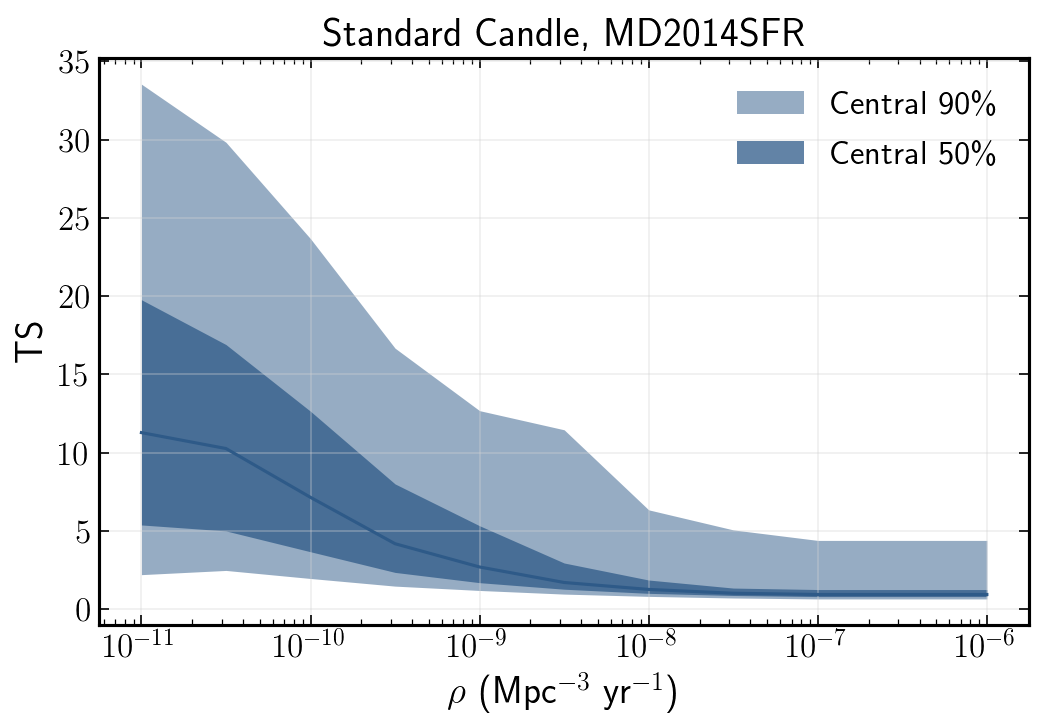

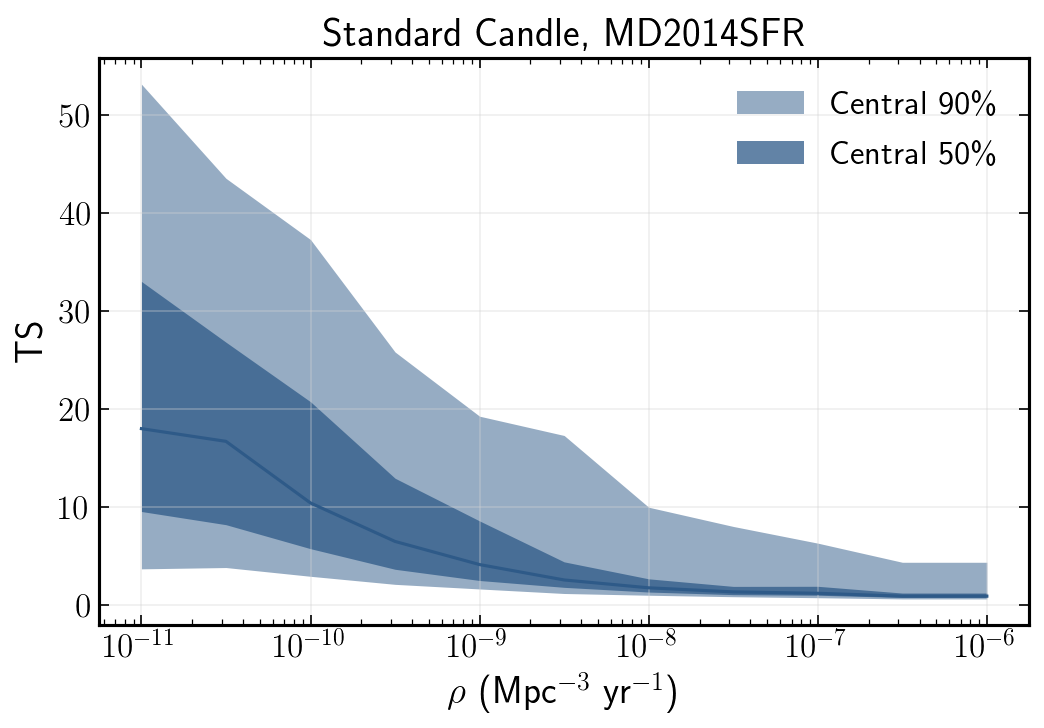

In [6]:
densities = np.logspace(-11., -6., 11)
for lumi, lumi_str in zip(['SC'], ['Standard Candle']): #, 'LG']:
    for evol in ['HB2006SFR', 'MD2014SFR']:
        all_levels = []
        gold_levels = []
        dens = []
        for density in densities:
            try:
                ts = np.load('/data/user/apizzuto/fast_response_skylab/alert_event_followup/ts_distributions/ts_dists_5year_density_{:.2e}_evol_{}_lumi_{}.npy'.format(density, evol, lumi))
                gold = ts[1]
                bronze_and_gold = ts[0]
            except:
                continue
            dens.append(density)
            #if density > 1e-7:
            #all_levels.append(all_levels[-1])
            #gold_levels.append(all_levels[-1])
            #else:
            all_levels.append(np.percentile(bronze_and_gold, [5, 25, 50, 75, 95]))
            gold_levels.append(np.percentile(gold, [5, 25, 50, 75, 95]))
        all_levels = np.array(all_levels).T
        gold_levels = np.array(gold_levels).T
        for levels in [all_levels, gold_levels]:
            fig = plt.figure(dpi=150, figsize=(8,5))
            fig.set_facecolor('w')
            plt.fill_between(dens, levels[0], levels[-1], alpha = 0.5, 
                             color = sns.xkcd_rgb['light navy blue'], linewidth = 0.0, label = 'Central 90\%')
            plt.fill_between(dens, levels[1], levels[-2], alpha = 0.75, 
                             color = sns.xkcd_rgb['light navy blue'], linewidth = 0.0, label = 'Central 50\%')
            plt.plot(dens, levels[2], color = sns.xkcd_rgb['light navy blue'])
            plt.title("{}, {}".format(lumi_str, evol))
            plt.xlabel(r'$\rho$ (Mpc$^{-3}$ yr$^{-1}$)')
            plt.ylabel('TS')
            plt.xscale('log')
            plt.legend(loc=1, frameon=False)
            #plt.legend(loc=2)
            #plt.ylim(1.5e-1, 1.4e2)
            #plt.yscale('log')
            plt.show()

In [4]:
from universe_analysis import UniverseAnalysis

In [9]:
TS = []
density = 1e-7
#uni = UniverseAnalysis('LG', 'HB2006SFR', density, 1.01e-8, 2.19, deltaT=2*86400.)
uni = UniverseAnalysis('LG', 'HB2006SFR', density, 1.01e-8, 2.19, data_years=5)
uni.initialize_universe()
uni.make_alerts_dataframe()
TS.append(uni.calculate_ts())

In [10]:
uni.calculate_ts(only_gold=True)

1.0872382571234533

In [11]:
TS

[1.0889303149730505]

In [12]:
uni.alert_df

background  declination  extra_evs  signalness  skymap_dec  skymap_ind  \
0          True     0.643633        0.0    0.325267    0.573166           1   
1          True    -0.579855        0.0    0.510965   -0.609993           5   
2          True     0.024858        0.0    0.444534   -0.024784           8   
3          True    -0.058056        0.0    0.267401    0.013614           3   
4          True     0.303537        0.0    0.539623    0.383623           4   
5          True    -0.009674        0.0    0.336213    0.013614           3   
6          True     0.377348        0.0    0.480269    0.350986           9   
7          True     0.274467        0.0    0.683484    0.194604           7   
8          True     0.125008        0.0    0.514267    0.194604           7   
9          True     0.174478        0.0    0.961815    0.194604           7   
10         True     0.382345        0.0    0.302915    0.350986           9   
11         True     0.545266        0.0    0.387478    0.573166           1   
12         True     0.054879        0.0    0.365422    0.065799           6   
13         True    -0.027359        0.0    0.304522   -0.024784           8   
14         True     0.160136        0.0    0.525295    0.065799           6   
15         True     0.182458        0.0    0.210387    0.194604           7   
16         True     0.103524        0.0    0.436561    0.194604           7   
17         True     0.007584        0.0    0.251048   -0.024784           8   
18         True    -0.107661        0.0    0.645190   -0.024784           8   
19         True     0.155610        0.0    0.286468    0.065799           6   
20         True     0.000126        0.0    0.423662    0.065799           6   
21         True     0.021631        0.0    0.448835    0.065799           6   
22         True     0.066561        0.0    0.687237    0.065799           6   
23         True     0.024582        0.0    0.508321    0.013614           3   
24         True     0.106895        0.0    0.898654    0.194604           7   
25         True     0.129914        0.0    0.407476    0.194604           7   
26         True     0.402436        0.0    0.478843    0.350986           9   
27         True     0.138251        0.0    0.394184    0.194604           7   
28         True    -0.104101        0.0    0.460051   -0.024784           8   
29         True     0.530757        0.0    0.361429    0.573166           1   
..          ...          ...        ...         ...         ...         ...   
113       False    -0.000773        0.0    0.906744   -0.024784           8   
114       False     0.390212        0.0    0.596885    0.383623           4   
115       False     0.115981        0.0    0.644265    0.194604           7   
116       False     0.989168        0.0    0.706969    0.903033           2   
117       False     0.120287        0.0    0.954145    0.065799           6   
118       False     0.143408        0.0    0.864105    0.194604           7   
119       False     0.231637        0.0    0.607469    0.194604           7   
120       False     1.138253        0.0    0.605950    0.903033           2   
121       False     0.227712        0.0    0.593281    0.194604           7   
122       False     0.114869        0.0    0.998691    0.194604           7   
123       False     0.091311        0.0    0.754851    0.065799           6   
124       False     0.132841        6.0    0.676454    0.194604           7   
125       False    -0.488547        0.0    0.492845   -0.609993           5   
126       False    -0.560186        0.0    0.464317   -0.609993           5   
127       False    -1.190006        0.0    0.984594   -0.609993           5   
128       False    -0.465417        0.0    0.414405   -0.609993           5   
129       False    -1.043791        0.0    0.974091   -0.609993           5   
130       False     0.294077        0.0    0.795695    0.194604           7   
131       False     0.034934        0.0    0.514829   -

In [3]:
TS

[1.7879805535931022]

In [4]:
from transient_universe import TransientUniverse

In [5]:
ratios = []
density = 1e-8
for density in [1e-9, 1e-8, 1e-7]:
    print density, 
    ratios.append([])
    for k in range(5):
        print k, 
        uni = TransientUniverse('SC', 'MD2014SFR', density, 1.01e-8, 2.19)
        uni.create_universe()
        uni.find_alerts()
        uni.additional_signal_events()
        uni.find_alert_skymaps()
        fls = uni.sources['flux'] / np.power(1e5, uni.diffuse_flux_ind - 2.)
        summed_ps_fls = np.sum(fls) / (86400.*365*4*np.pi)
        ratios[-1].append(uni.sim_flux / summed_ps_fls)
    print ''

1e-09 0 1 2 3 4 
1e-08 0 1 2 3 4 
1e-07 0 1 2 3 4 


In [12]:
np.sum(zip(*uni.sig_alerts['GFU_bronze'])[0])

5

In [15]:
uni.bg_alerts['GFU_bronze'][0]

14

In [16]:
a = np.load('/data/user/apizzuto/fast_response_skylab/fast-response/trunk/analysis_checks/sensitivity/nsignal_sinDec_-0.05_deltaT_10.0_month_10.npy')

# Steady now

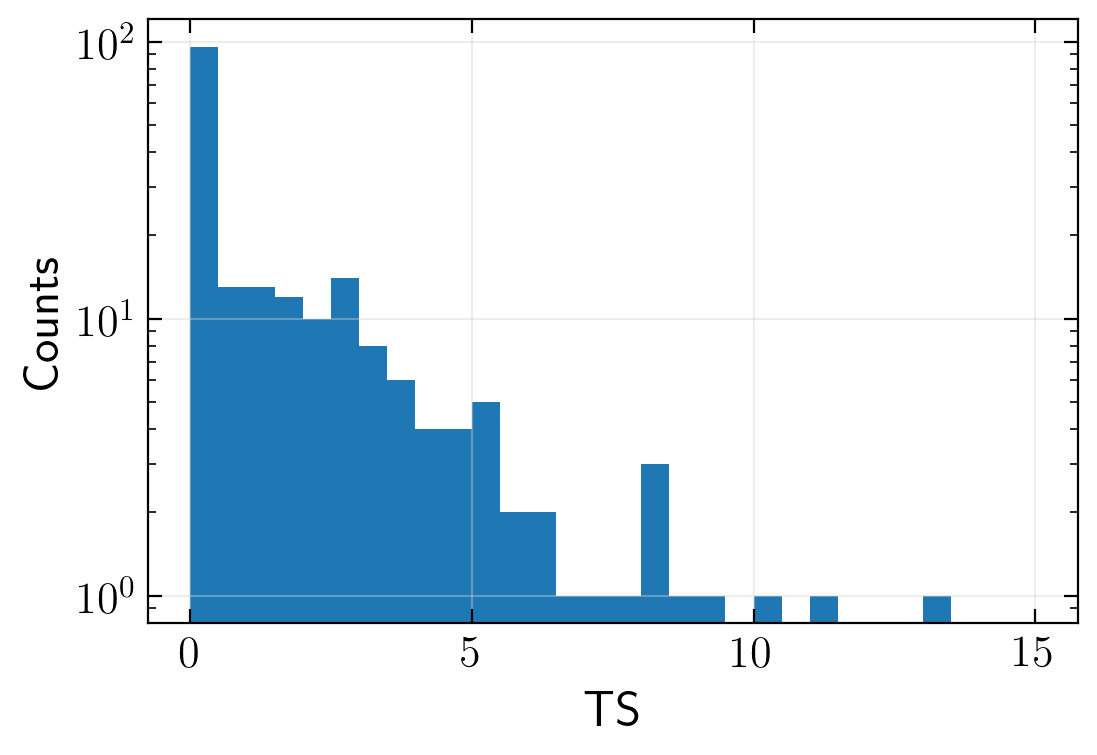

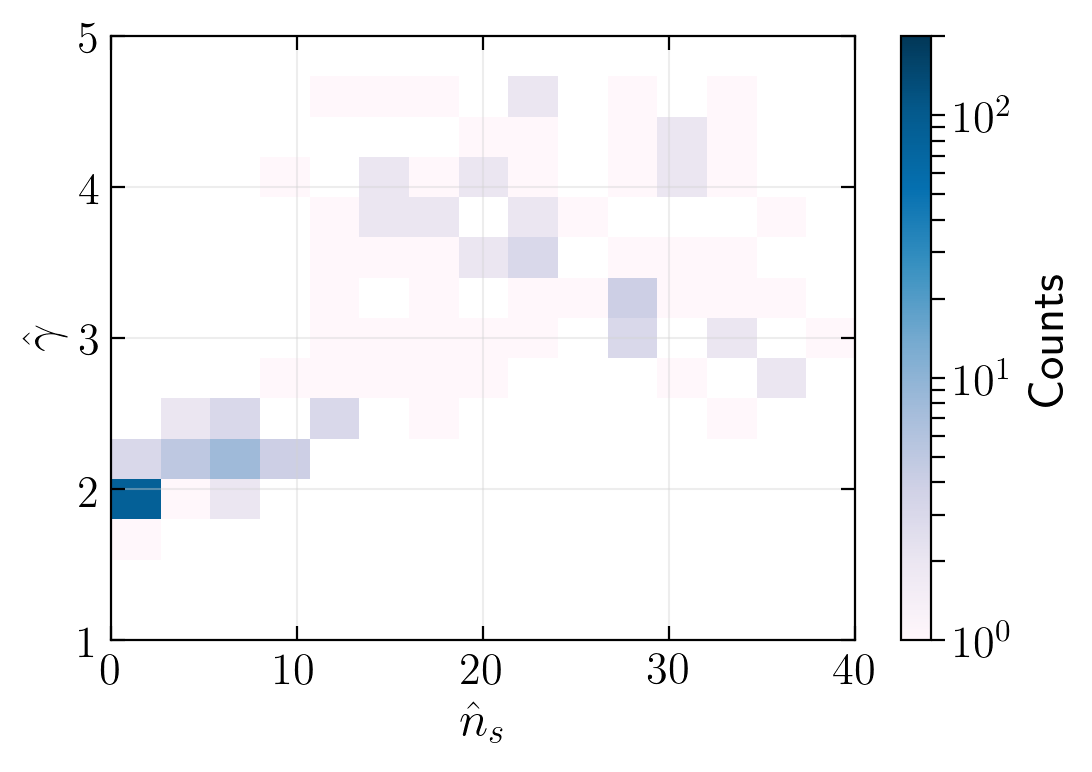

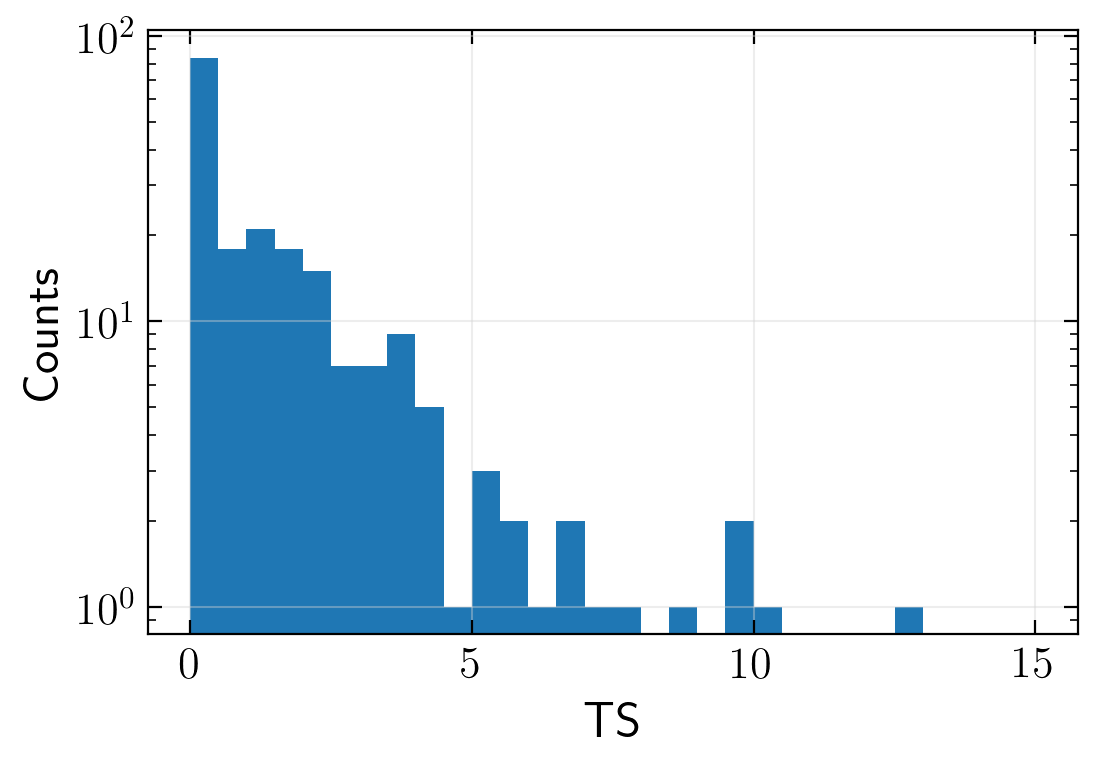

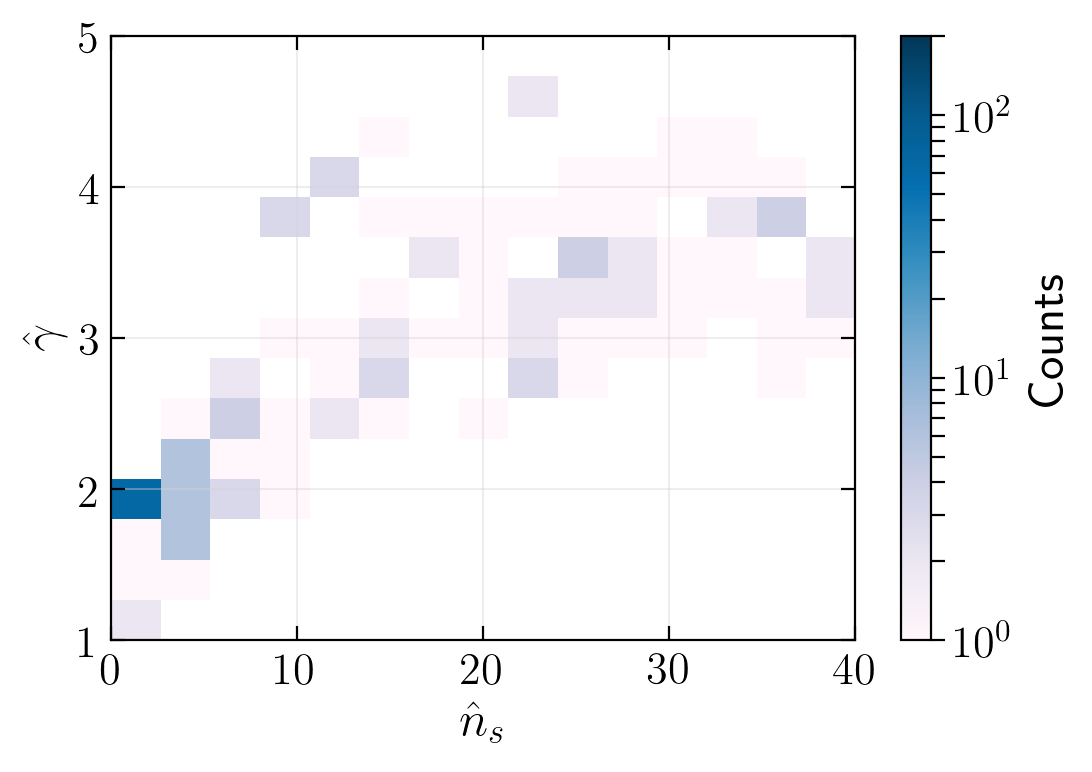

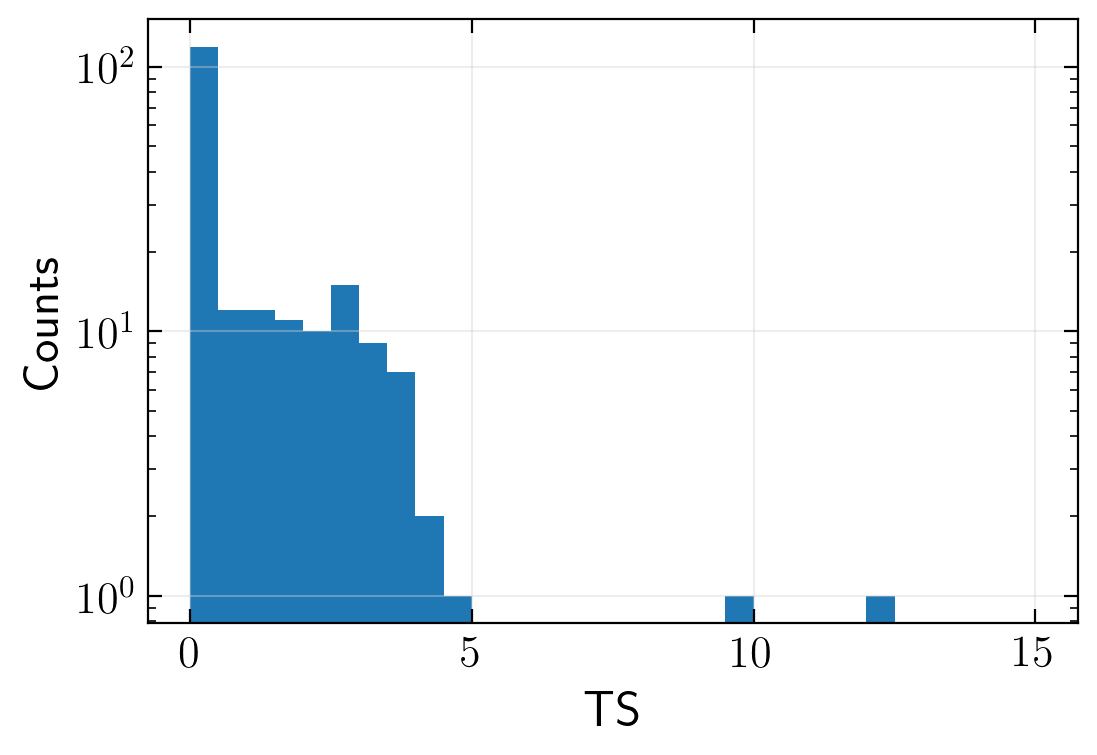

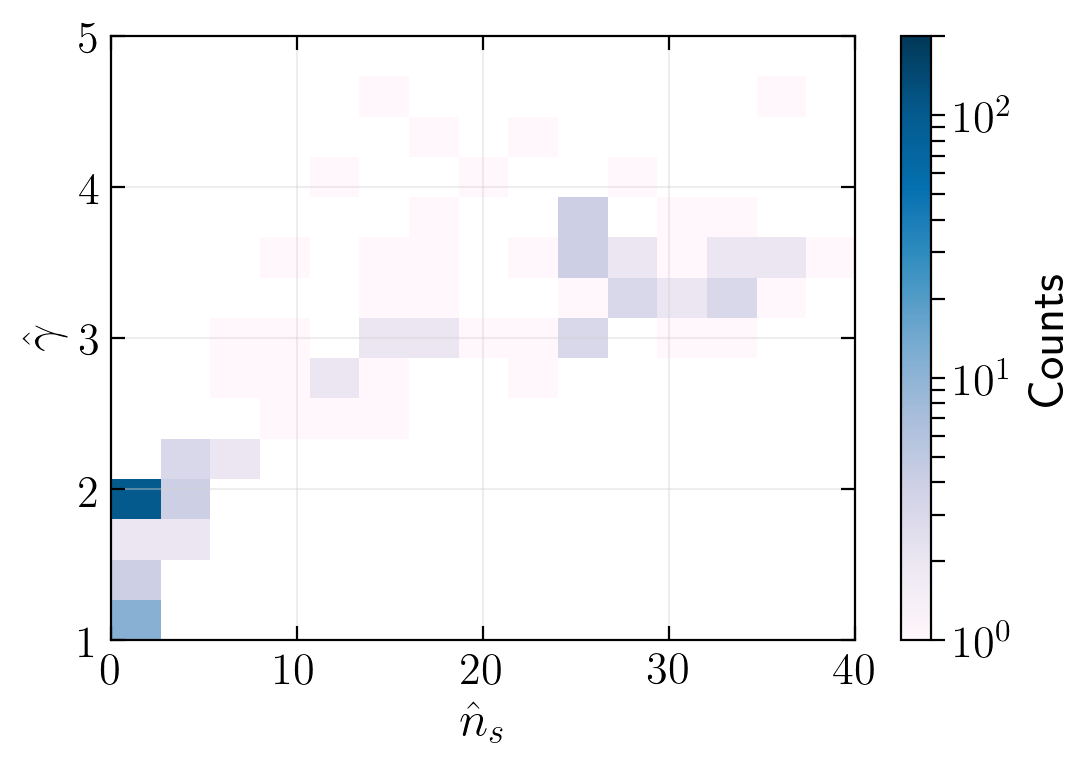

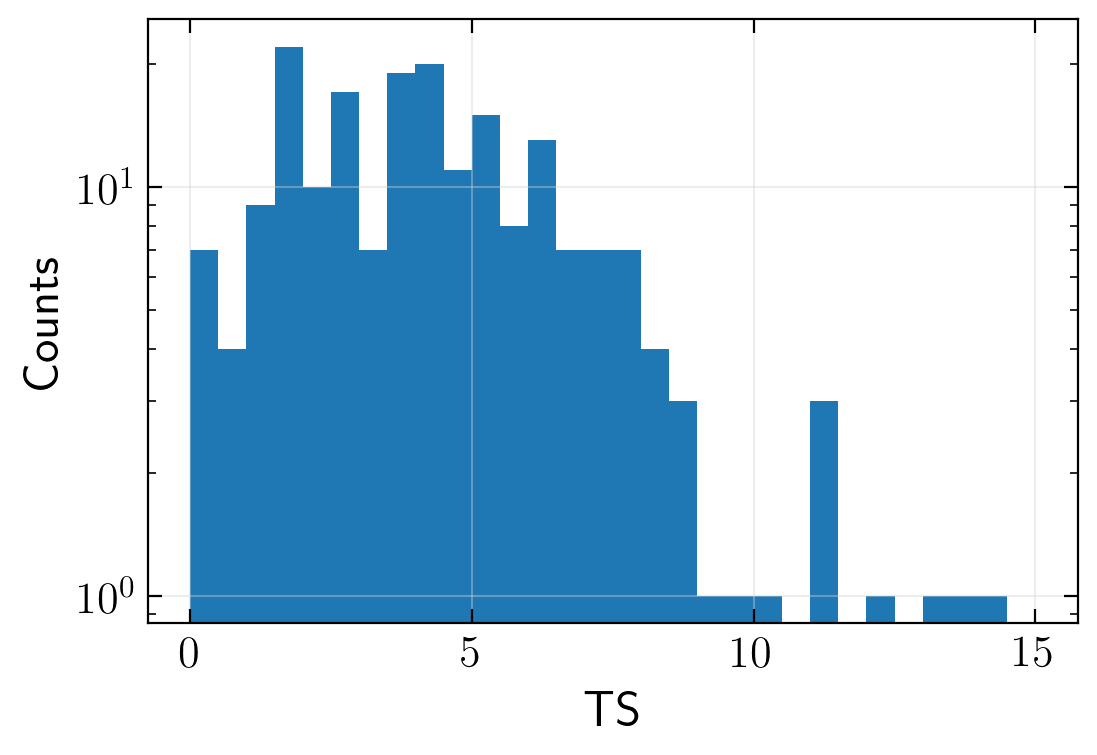

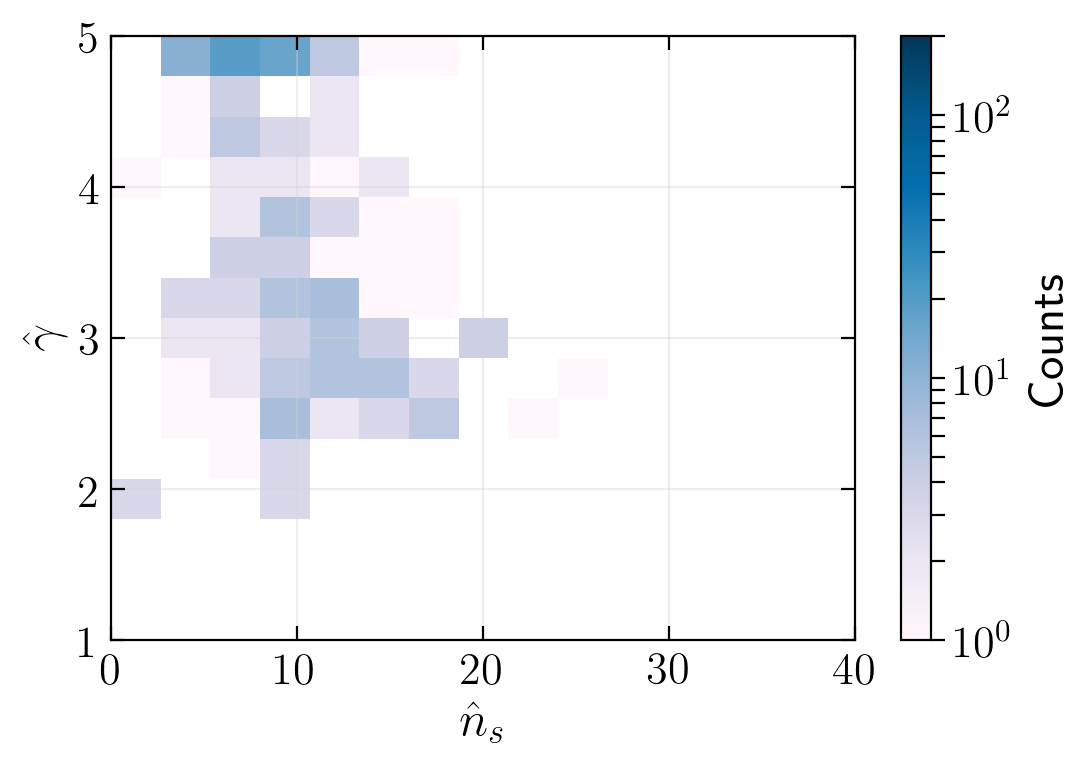

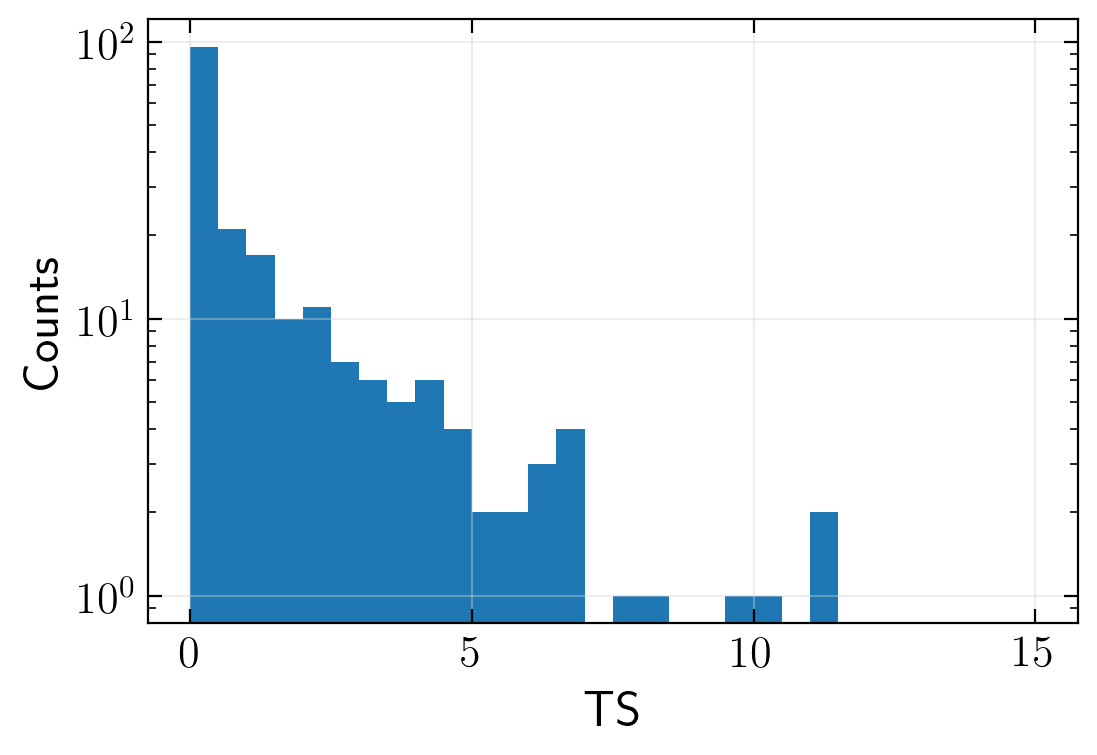

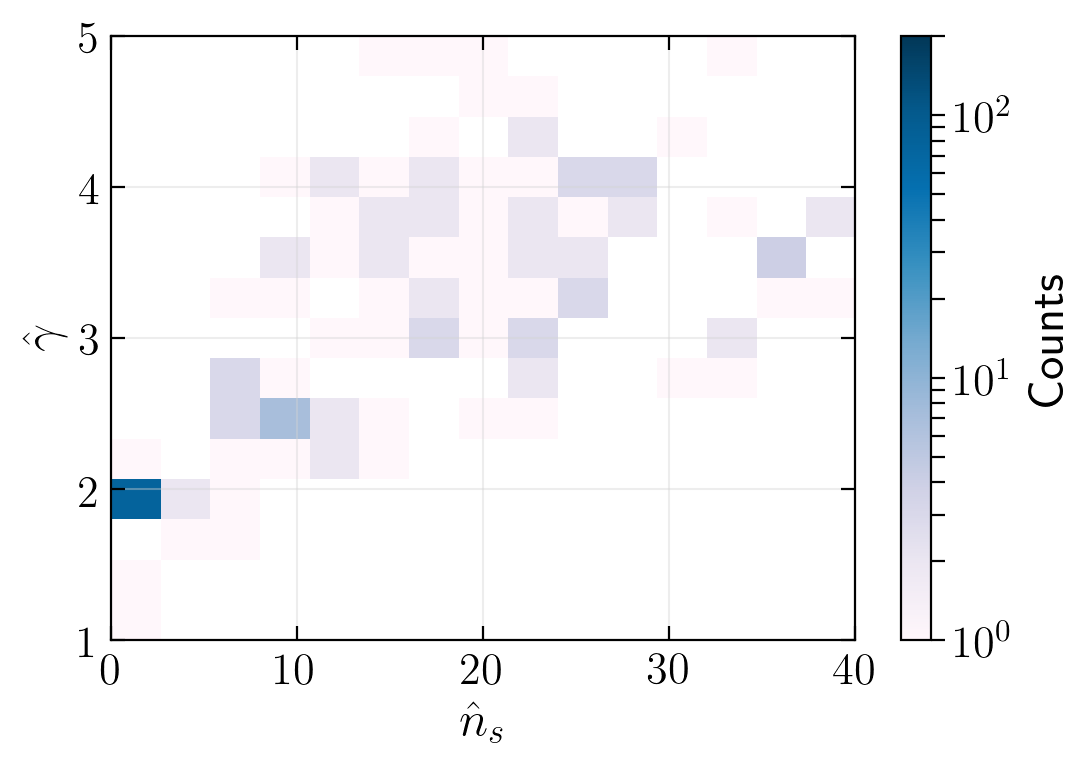

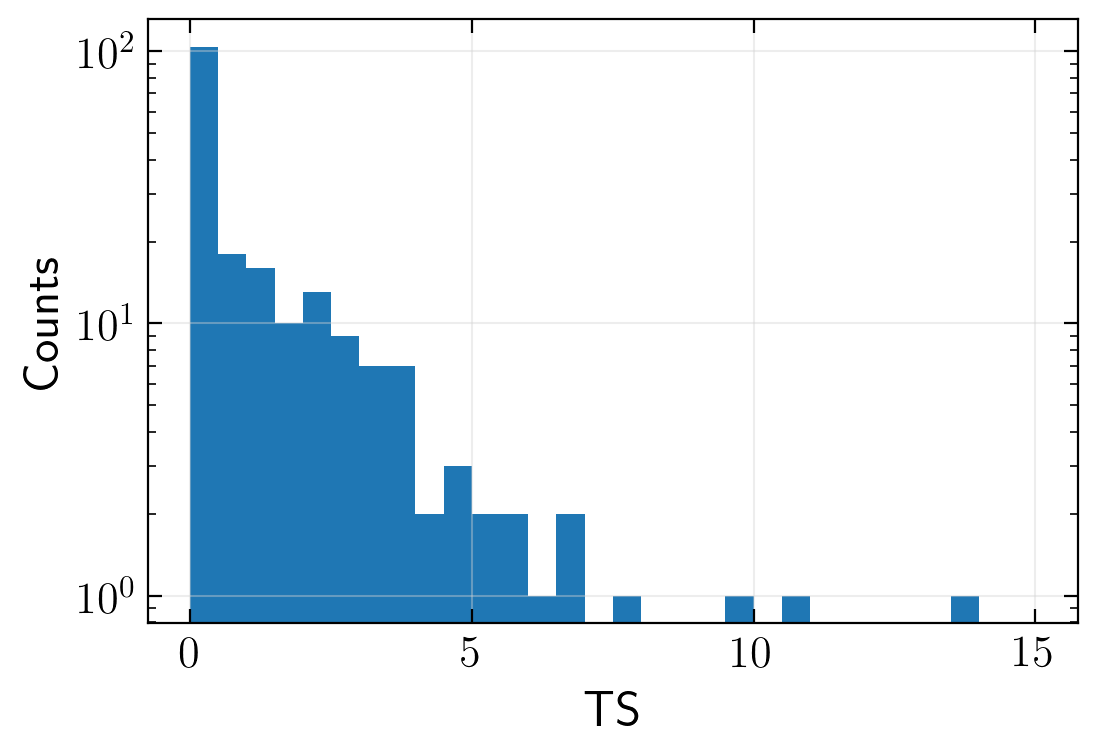

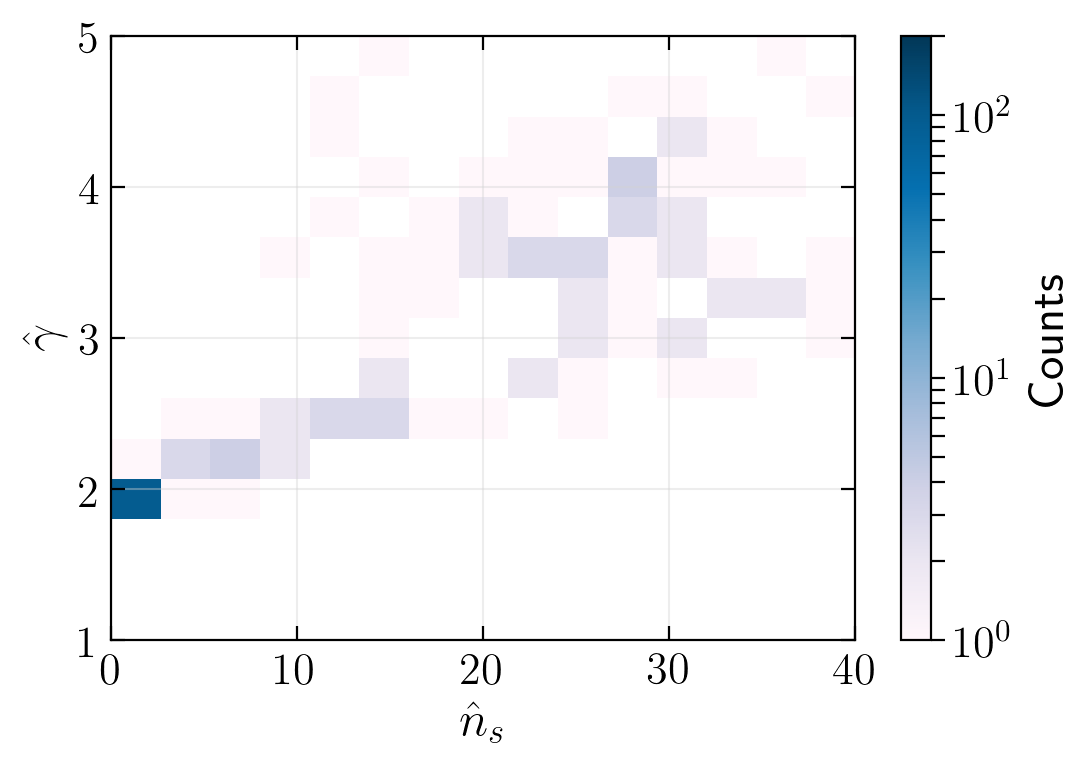

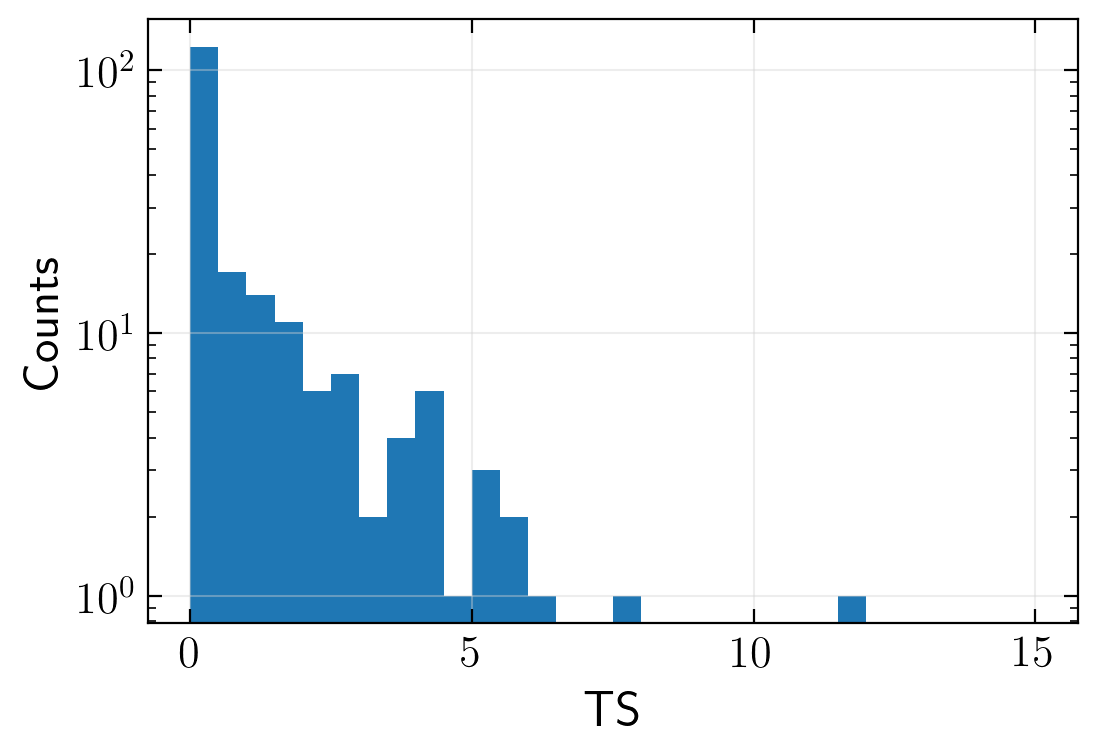

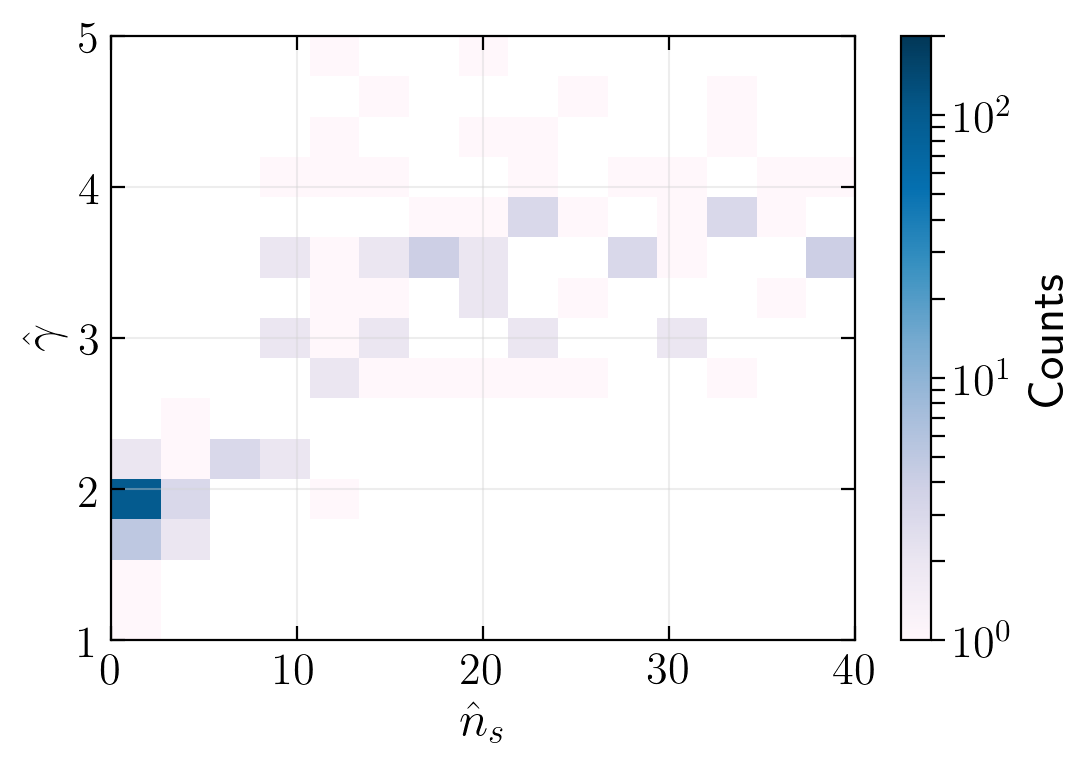

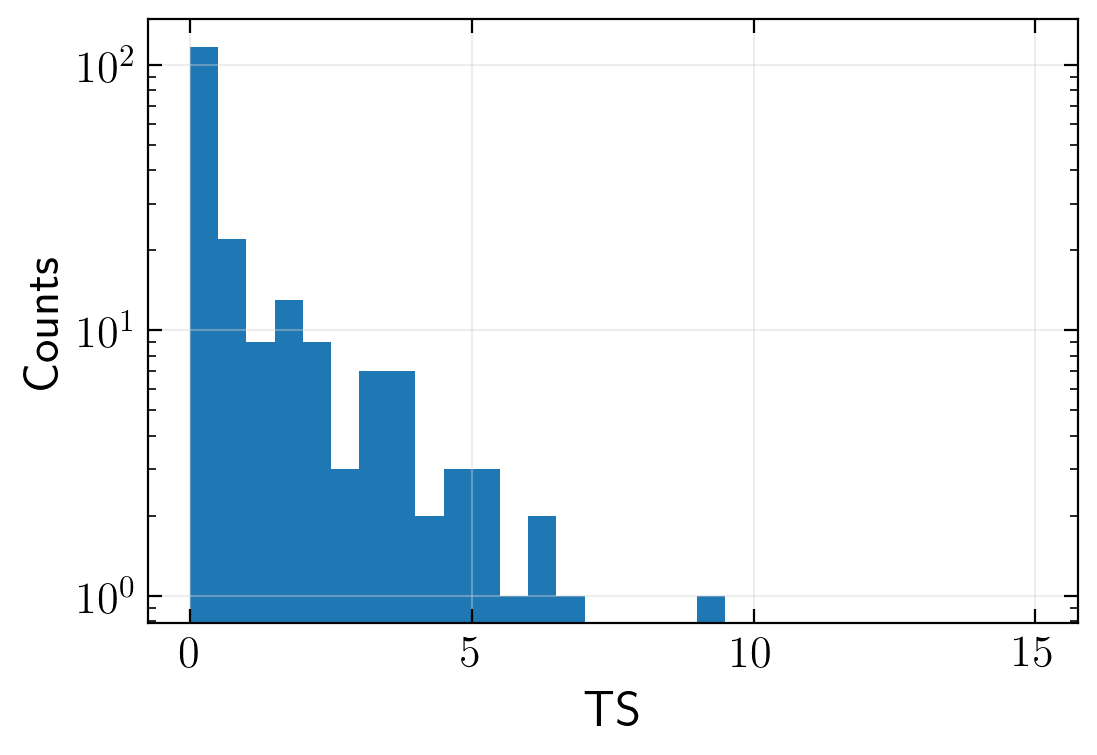

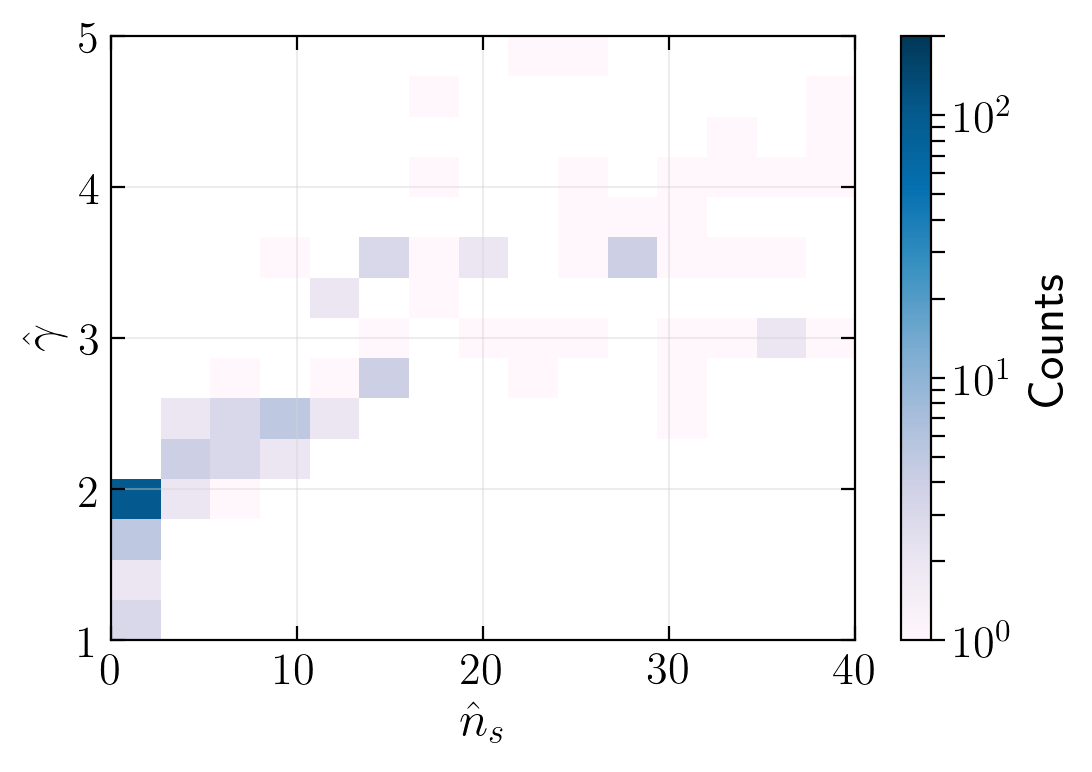

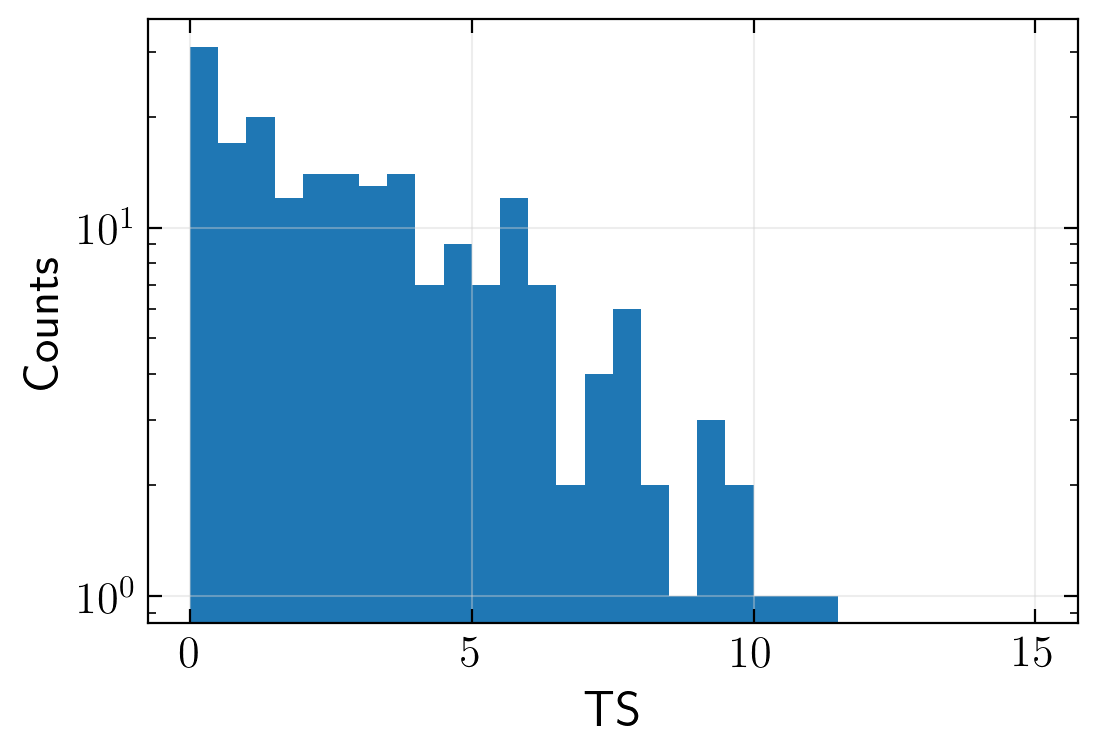

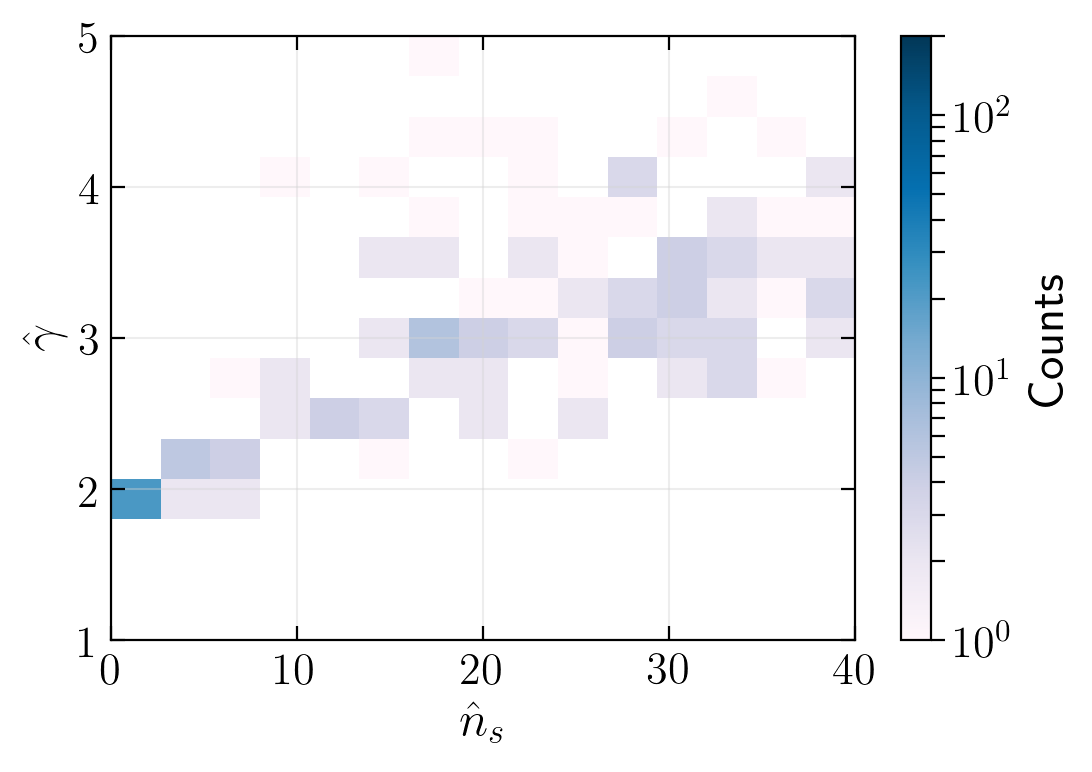

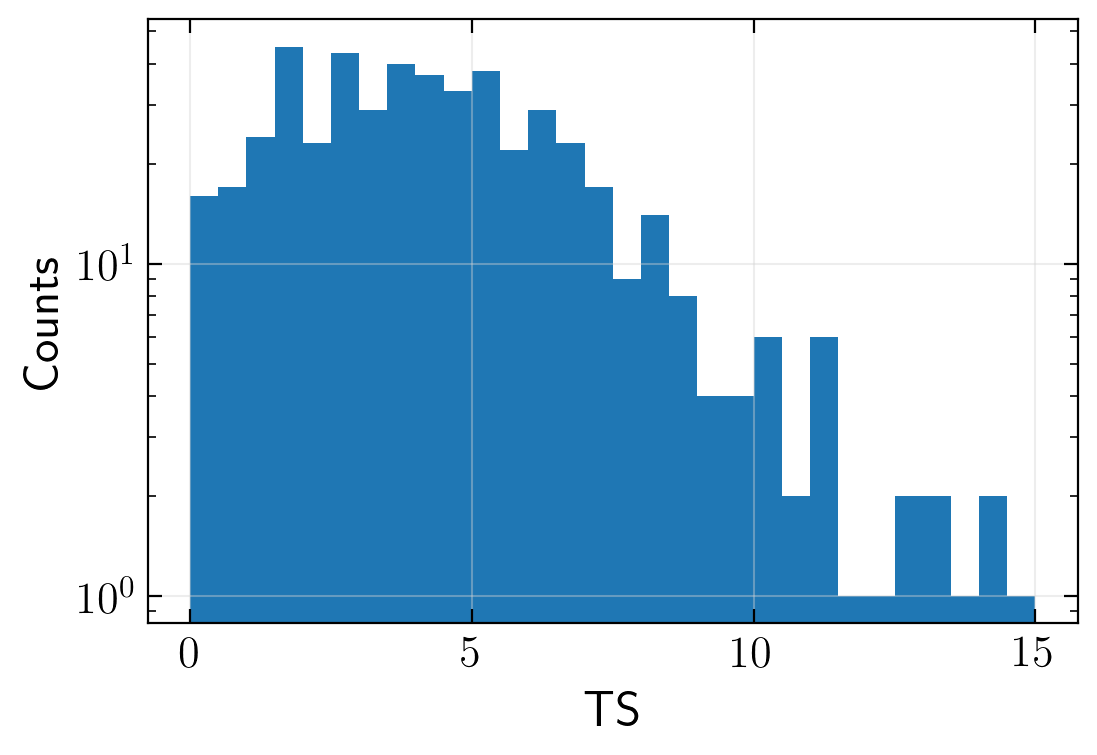

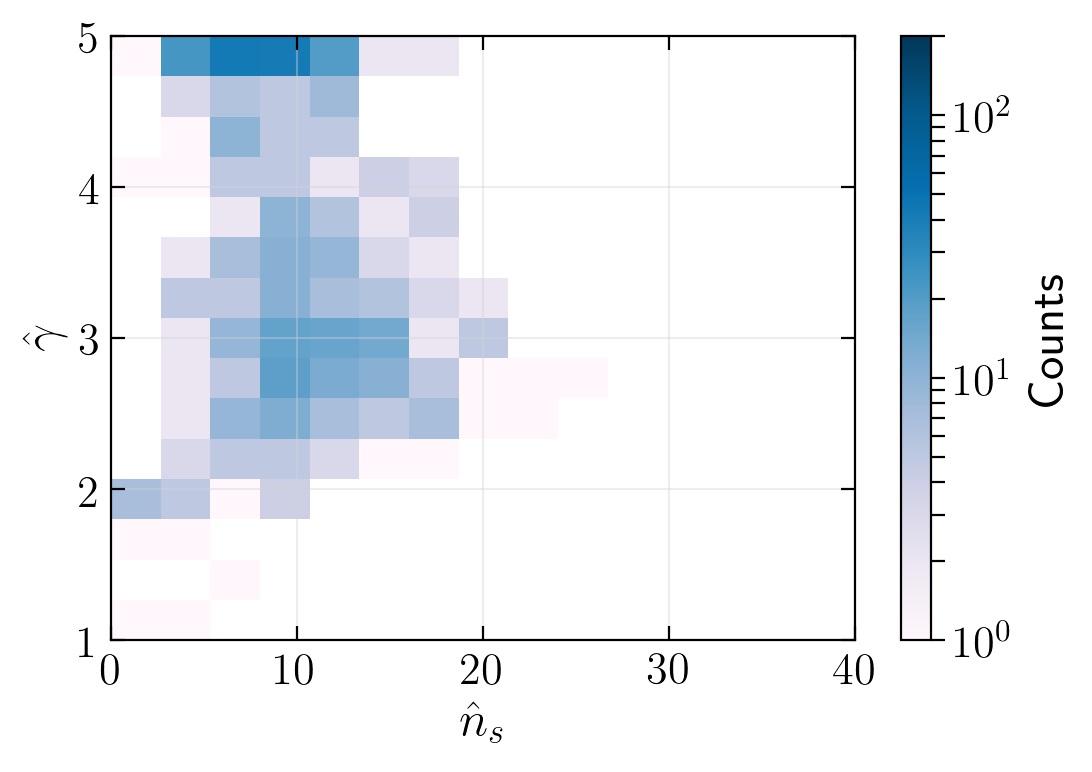

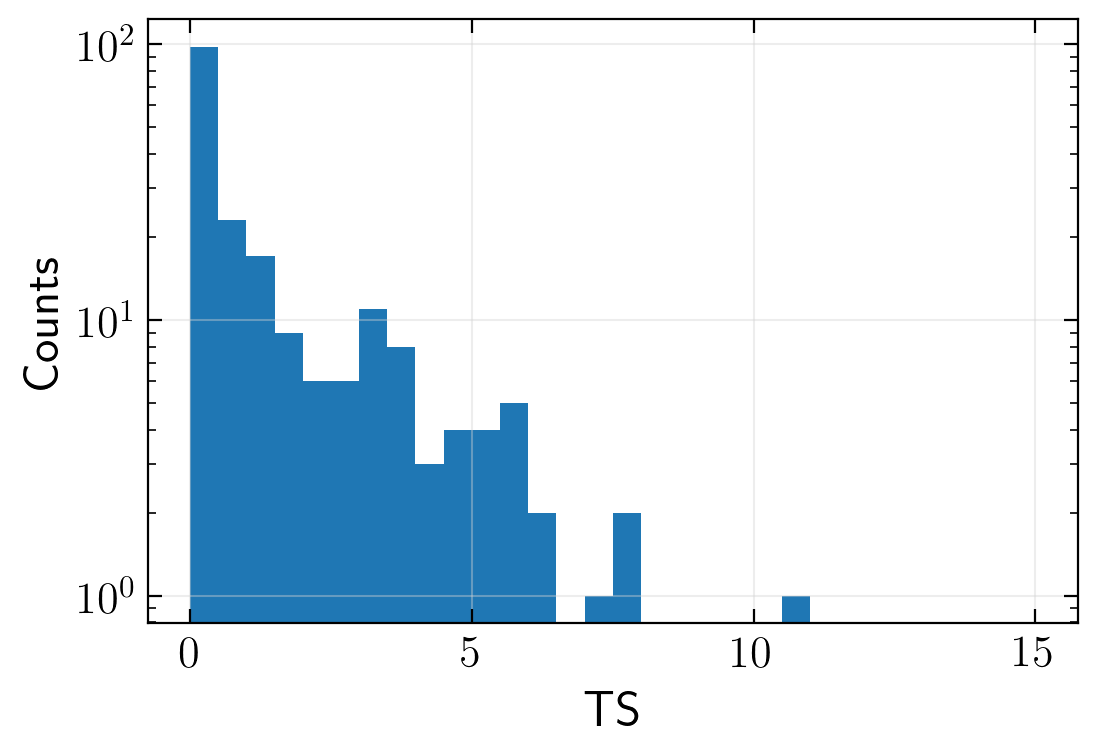

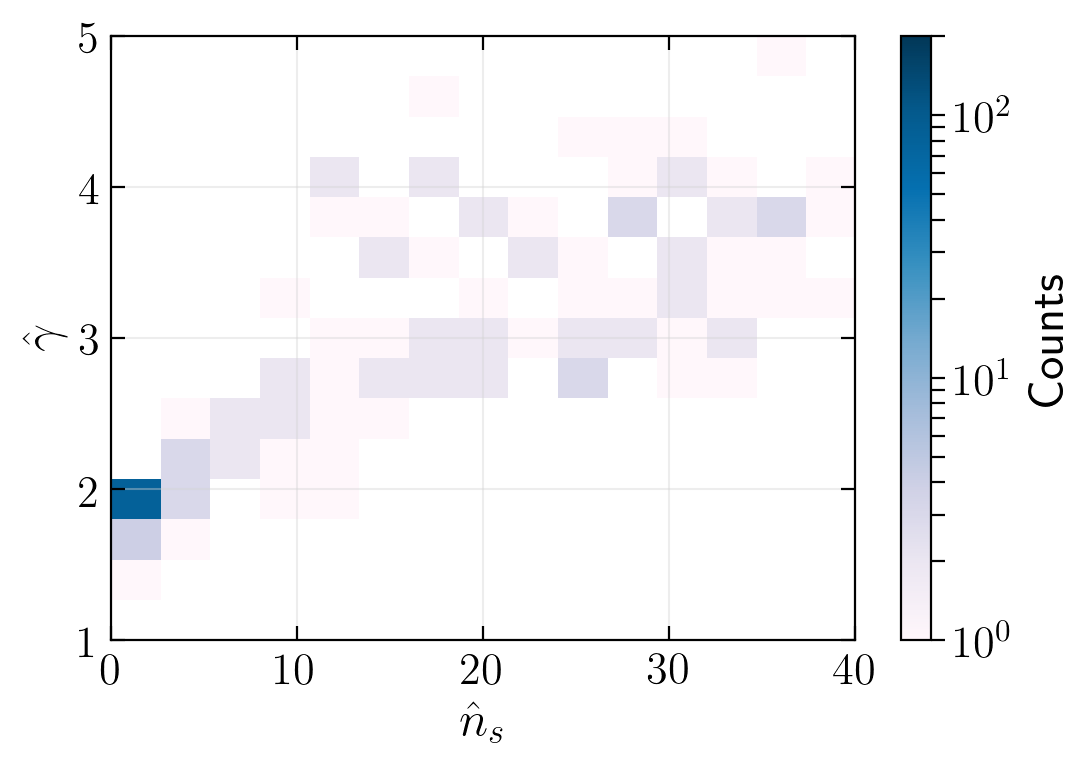

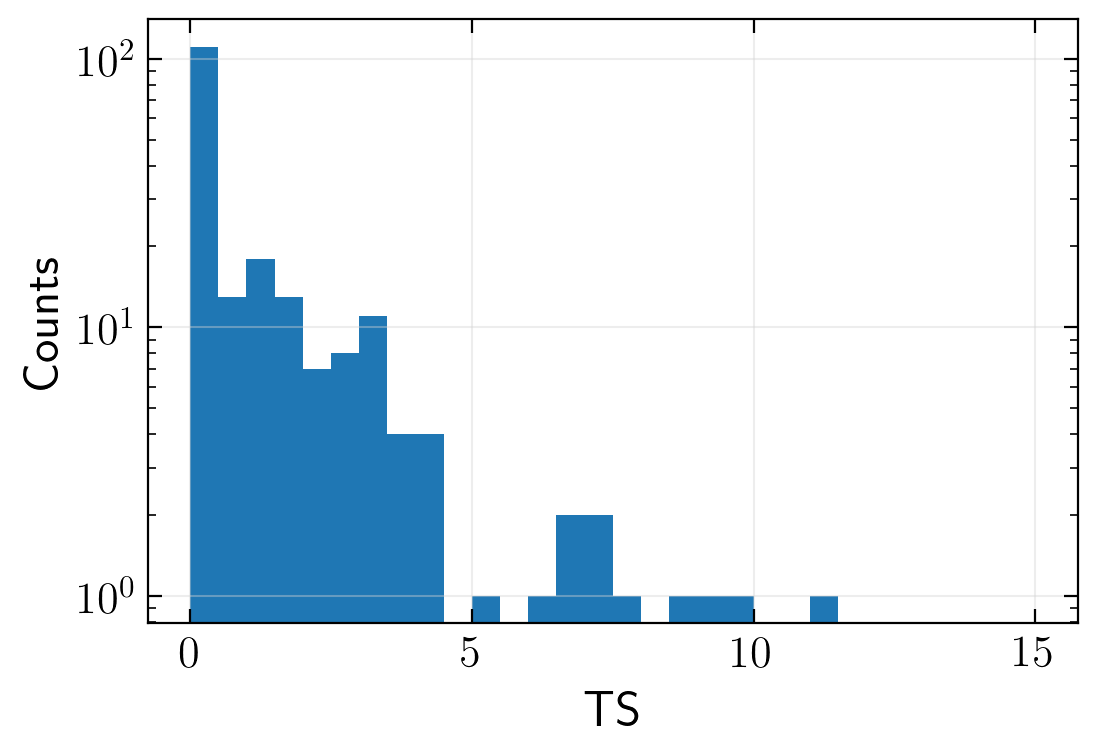

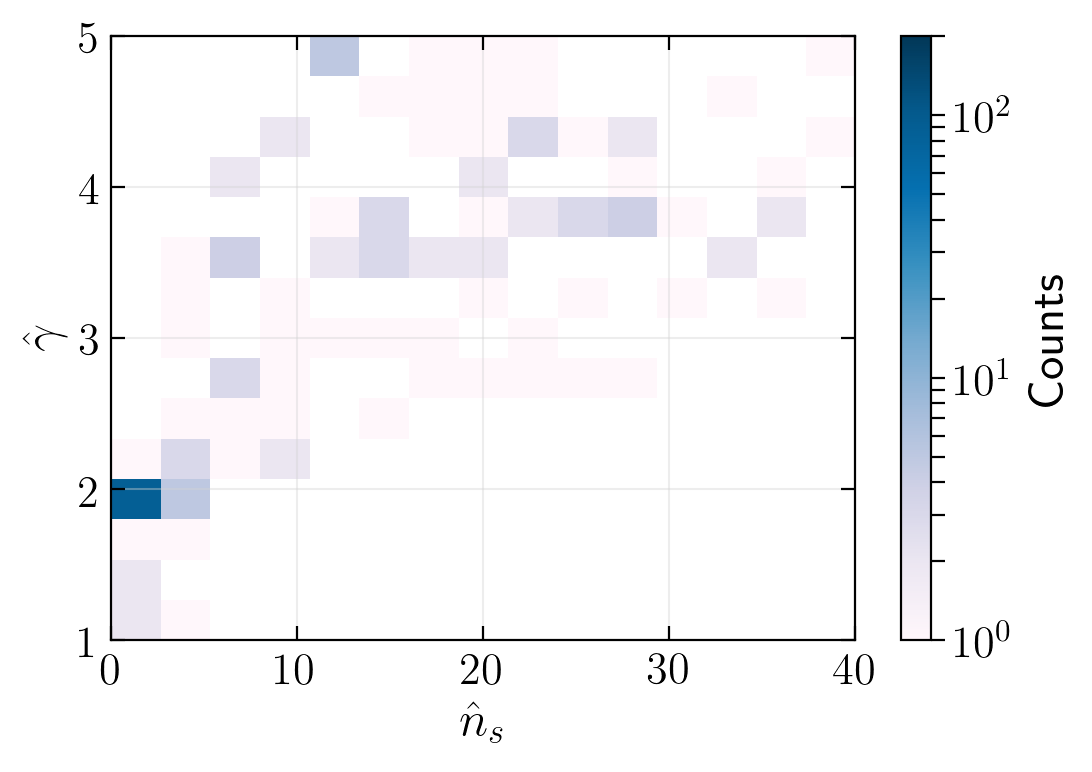

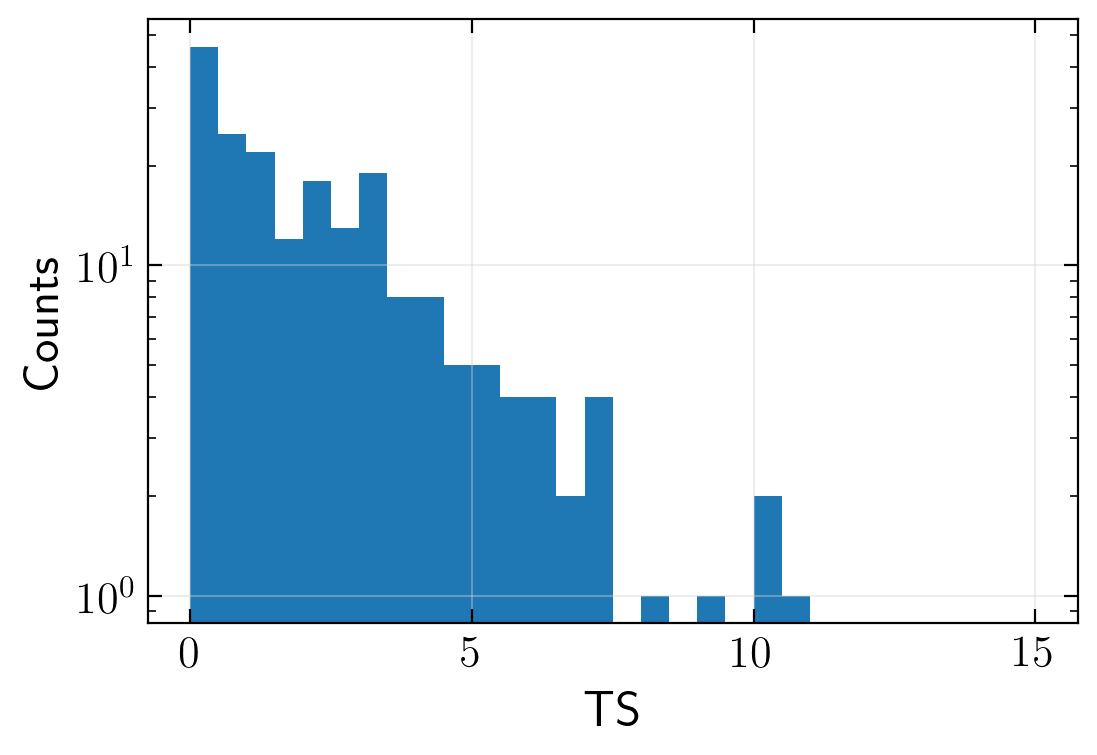

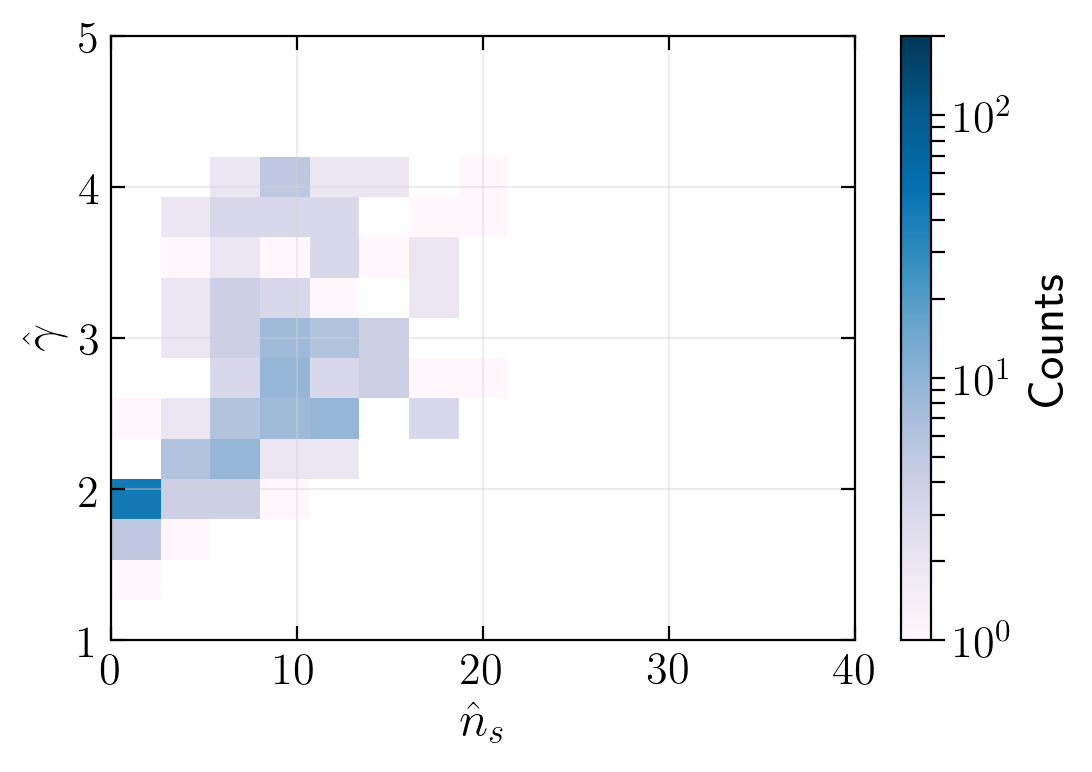

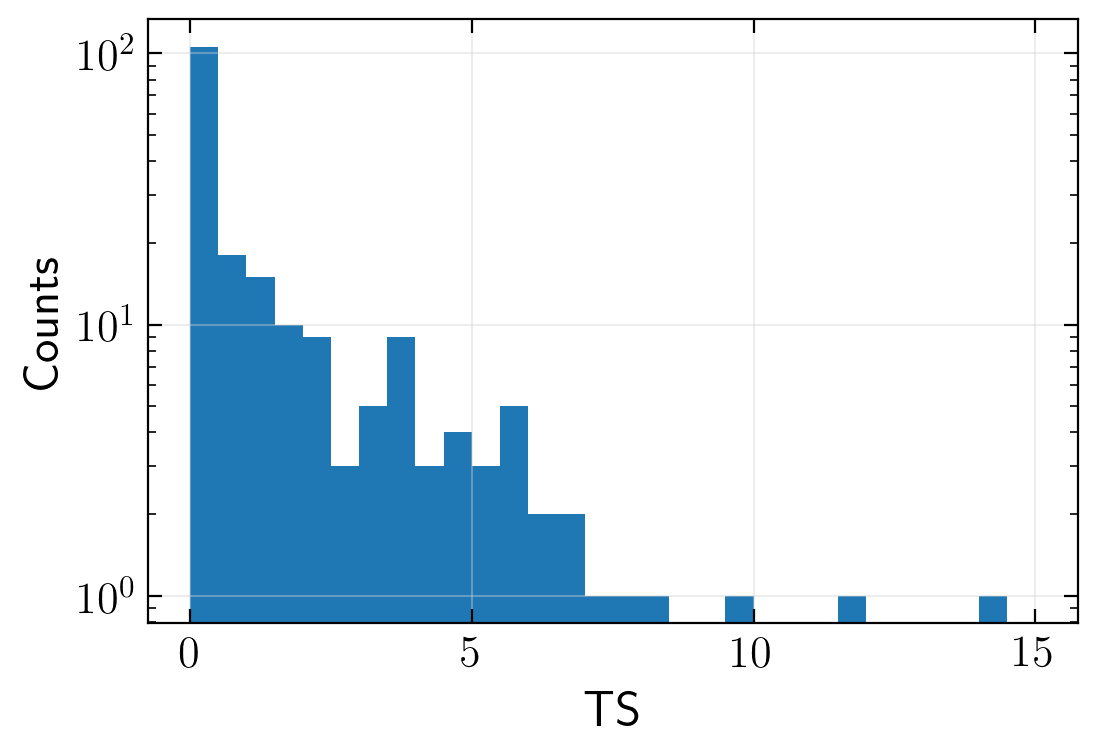

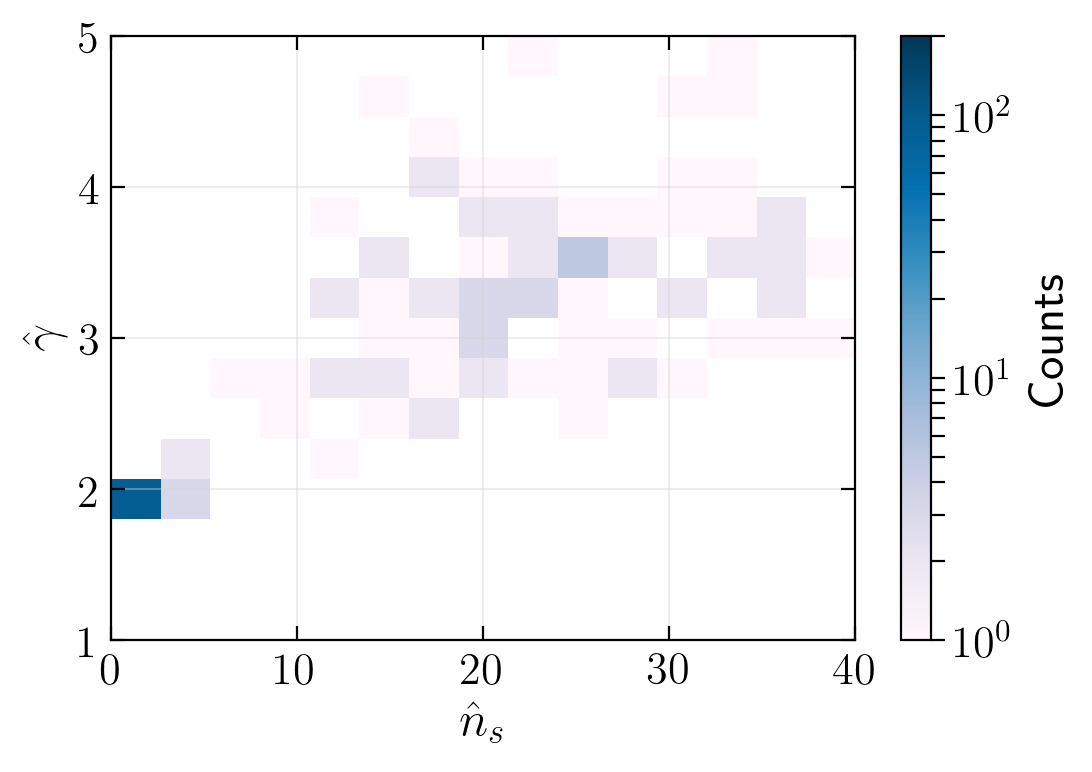

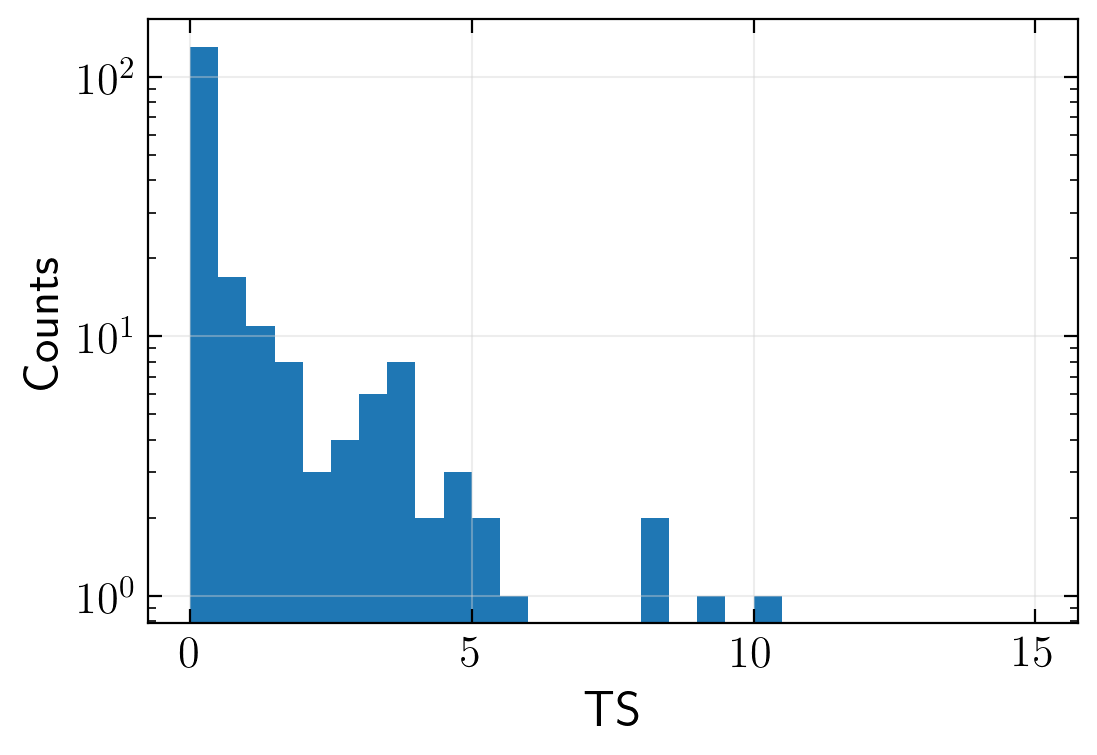

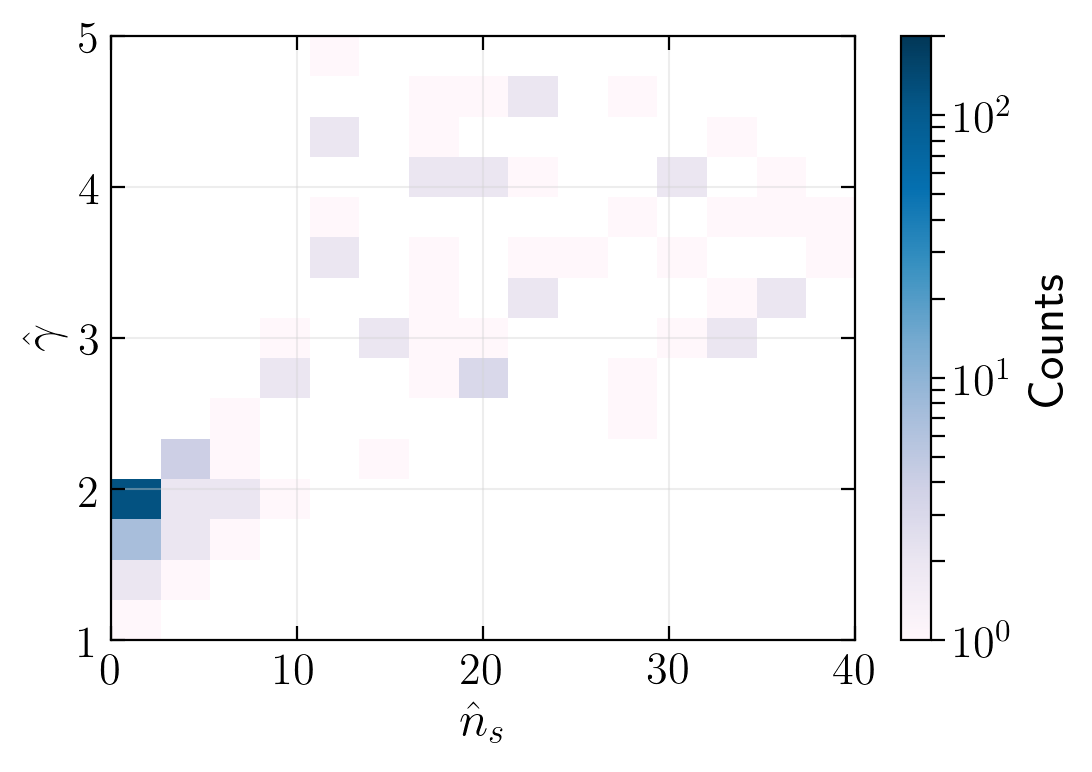

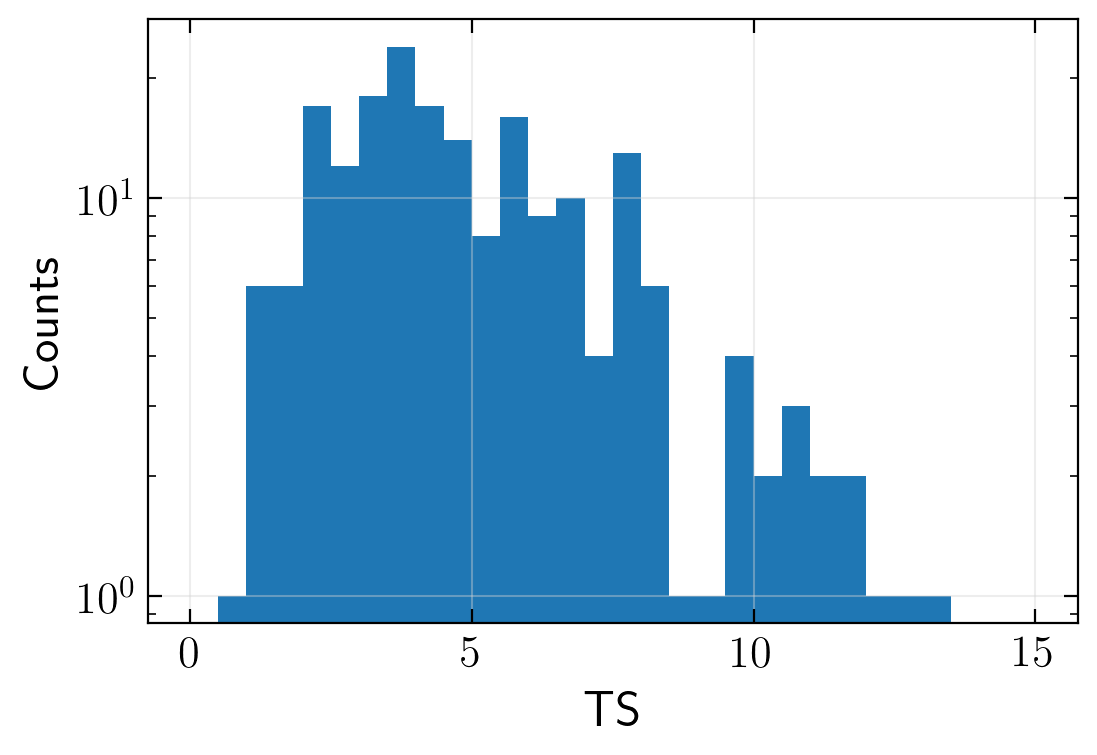

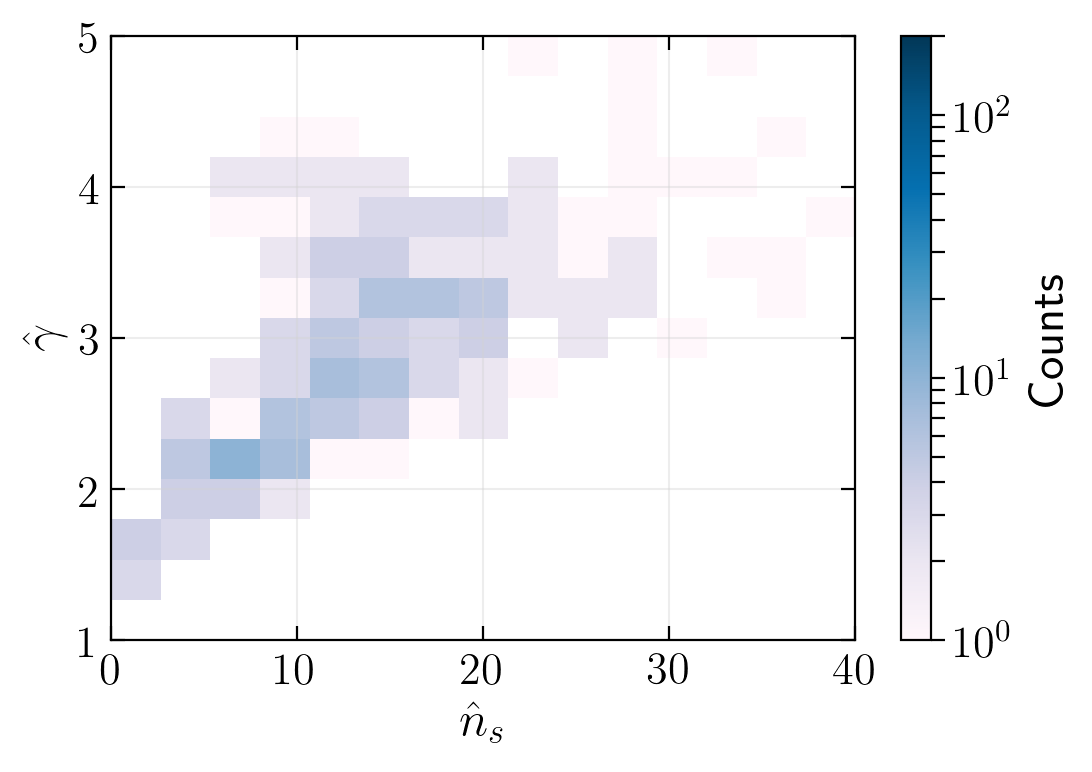

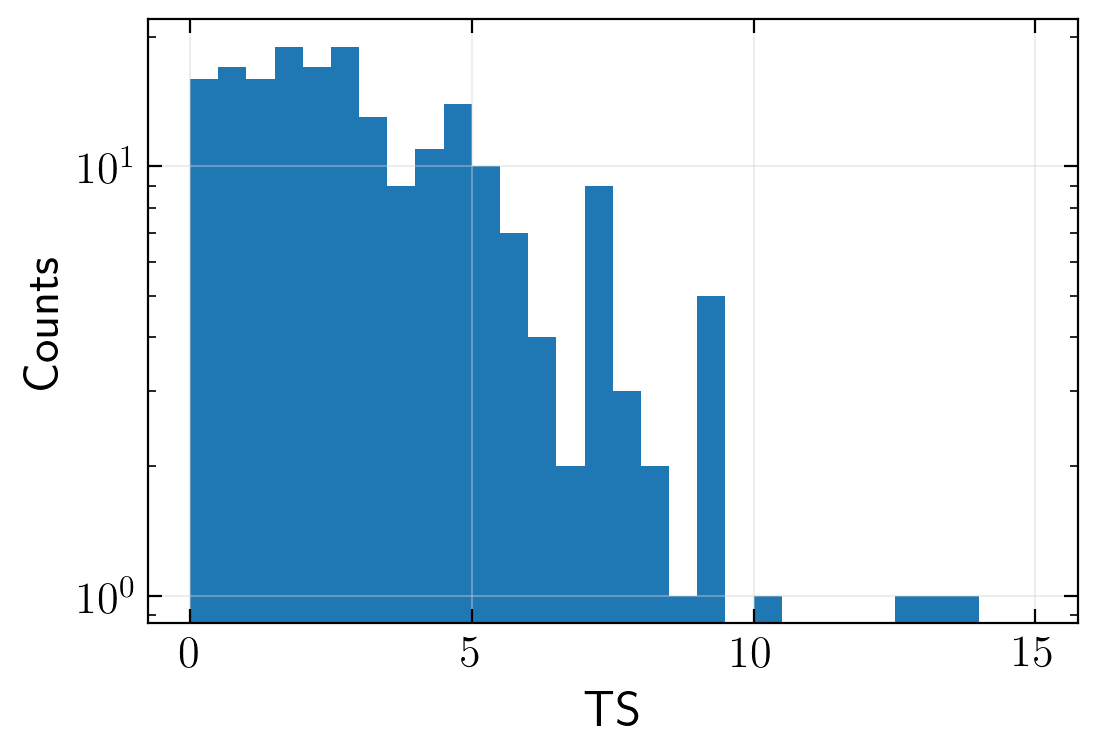

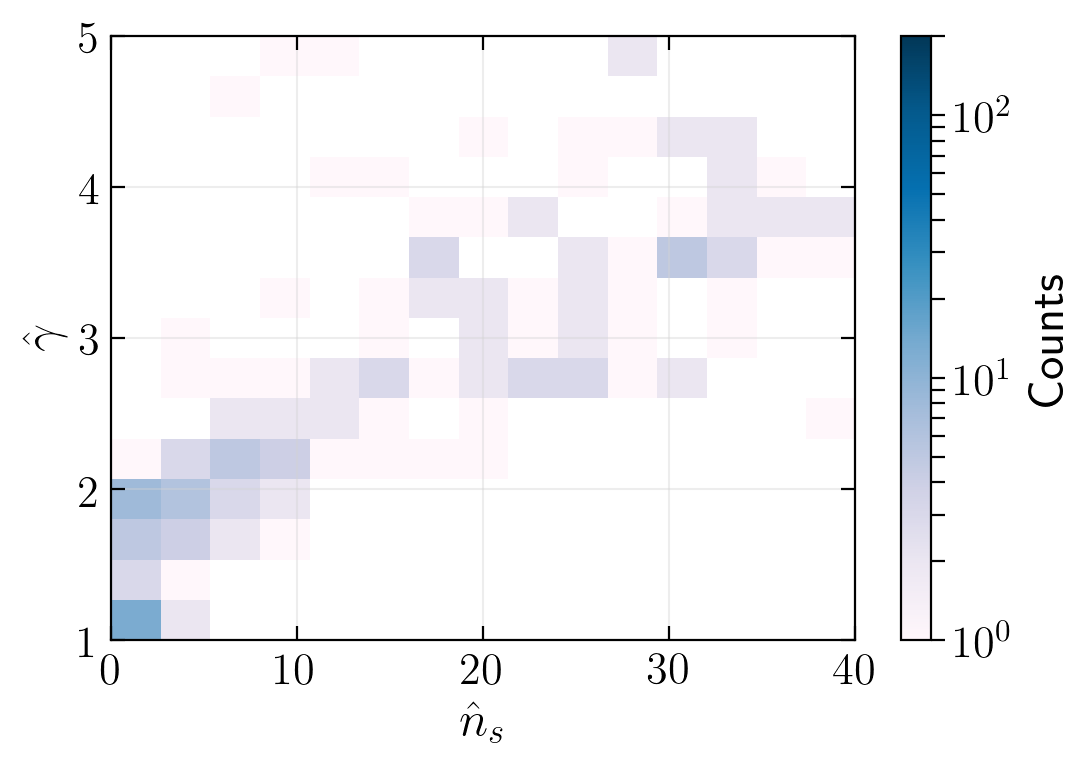

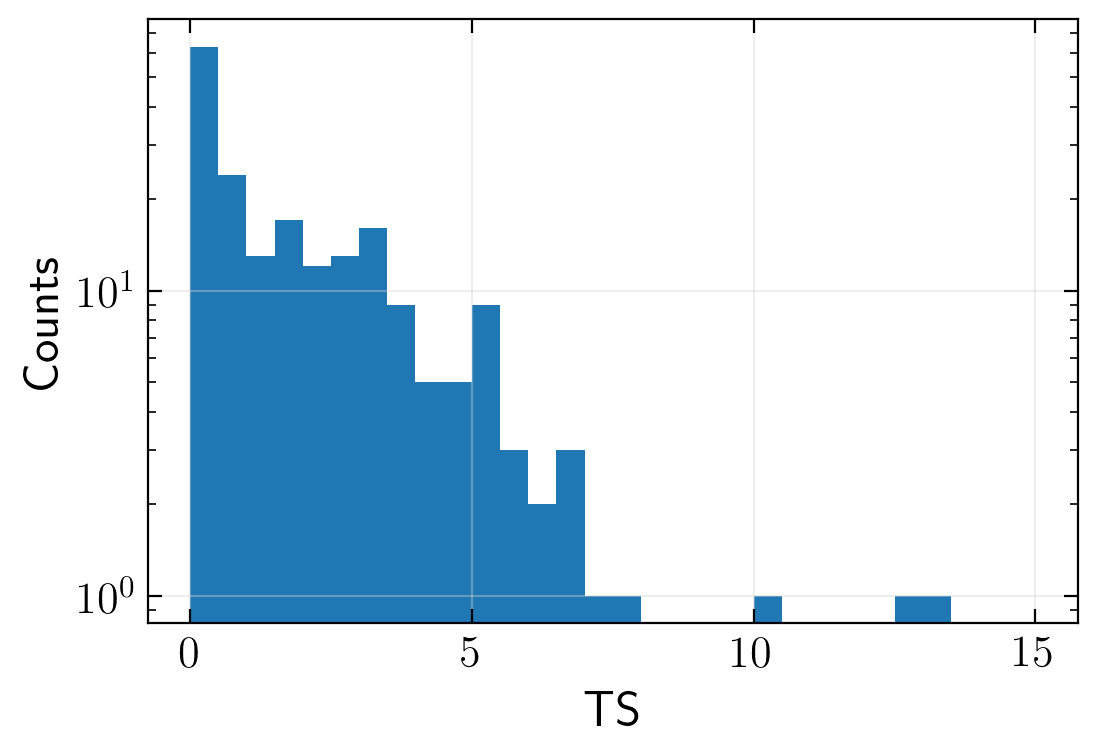

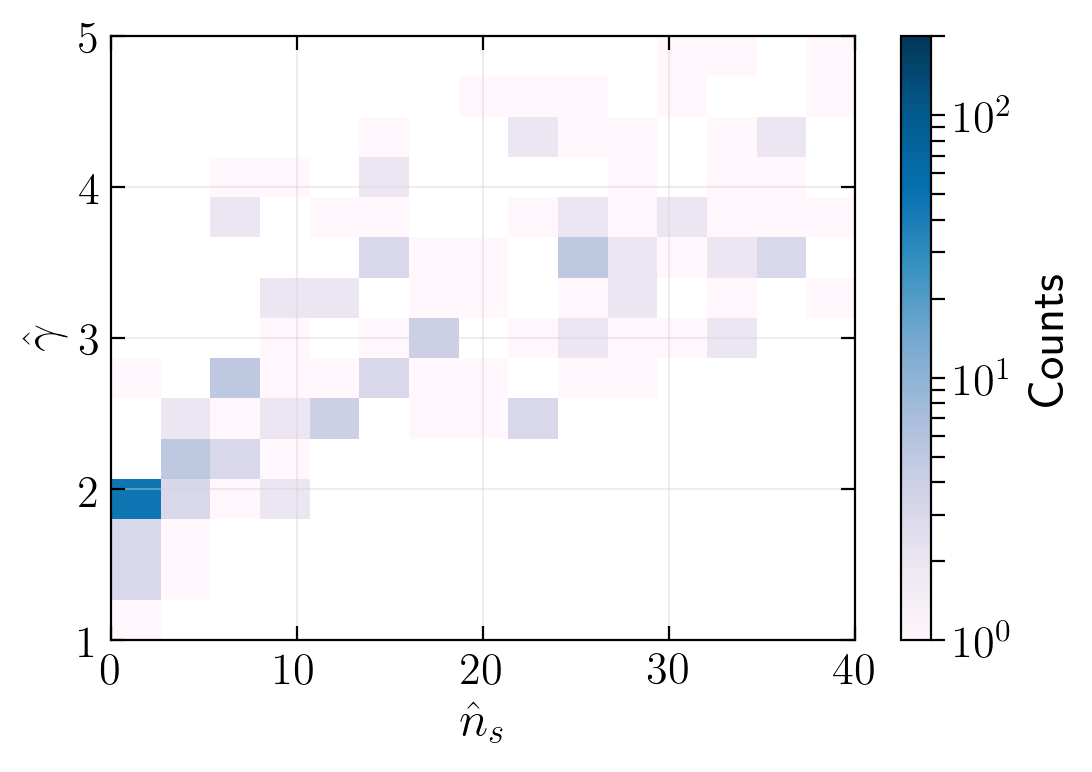

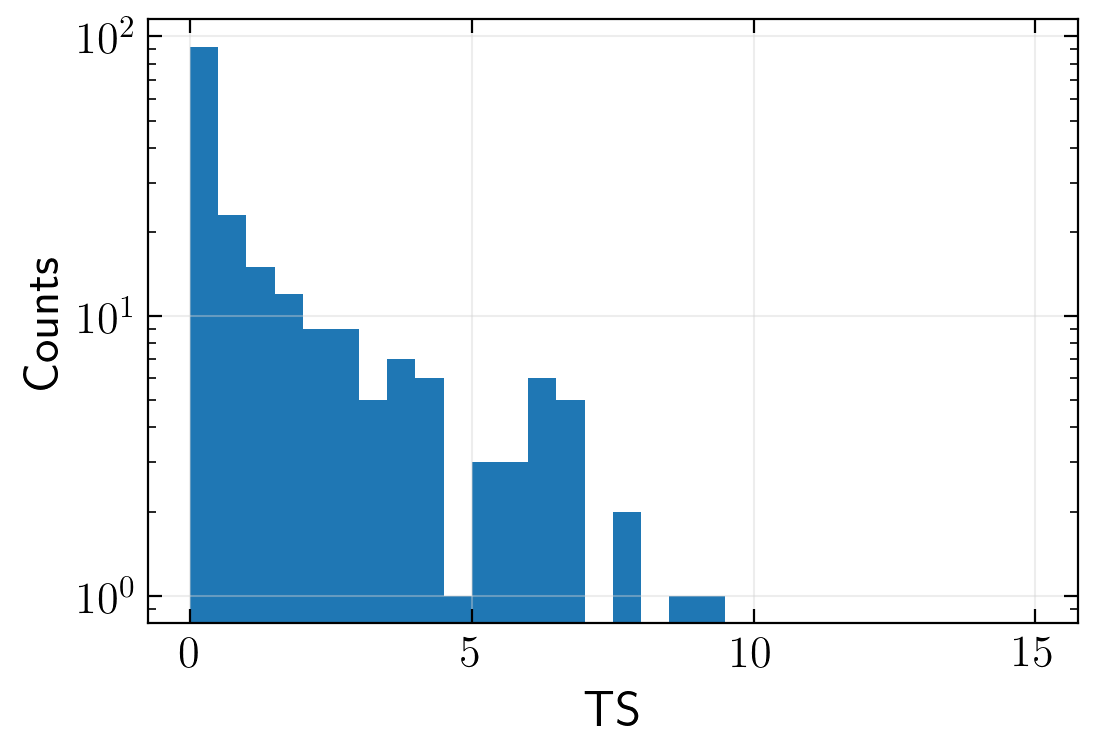

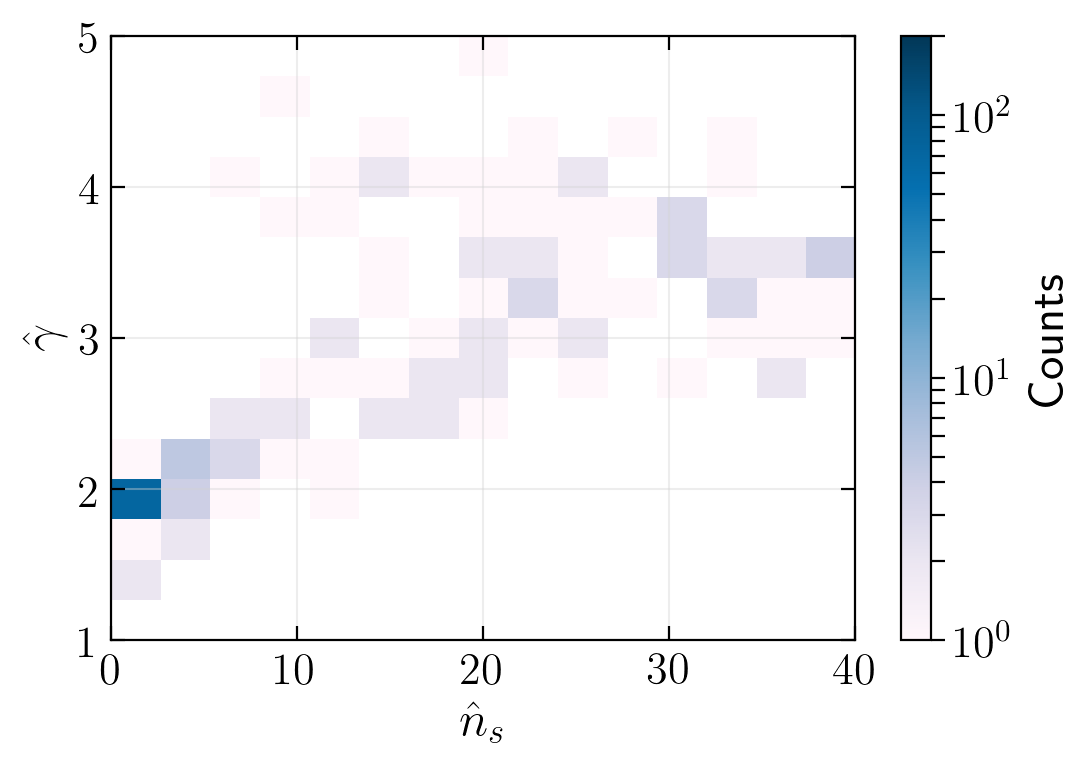

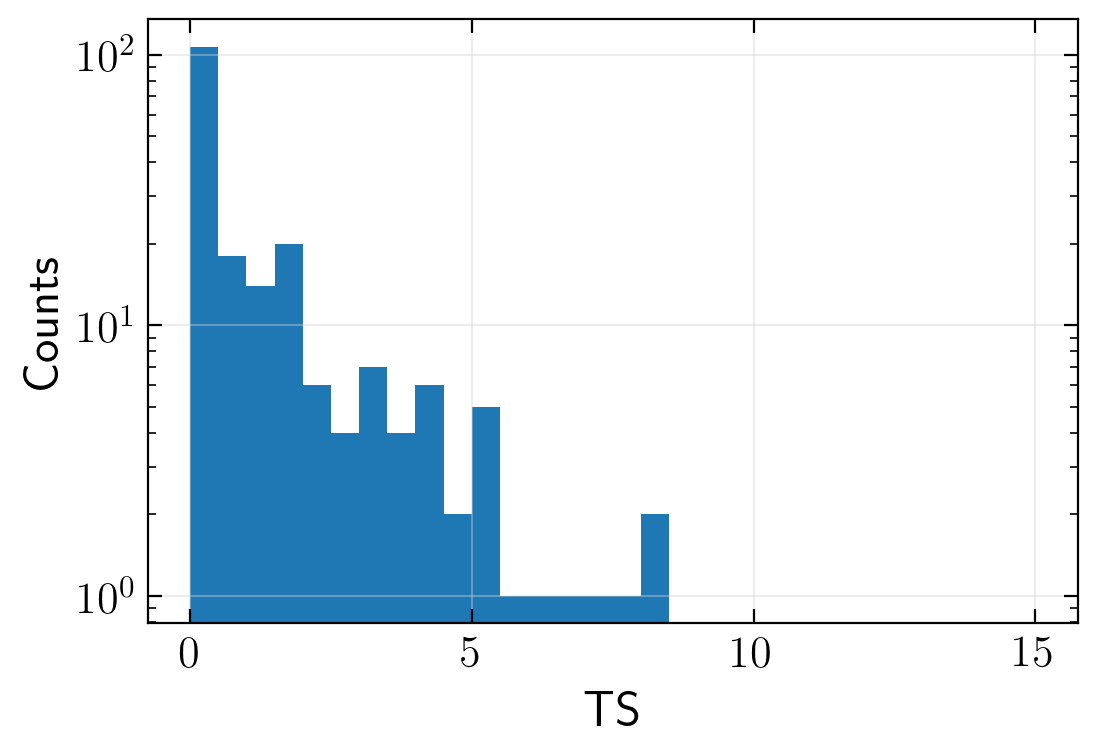

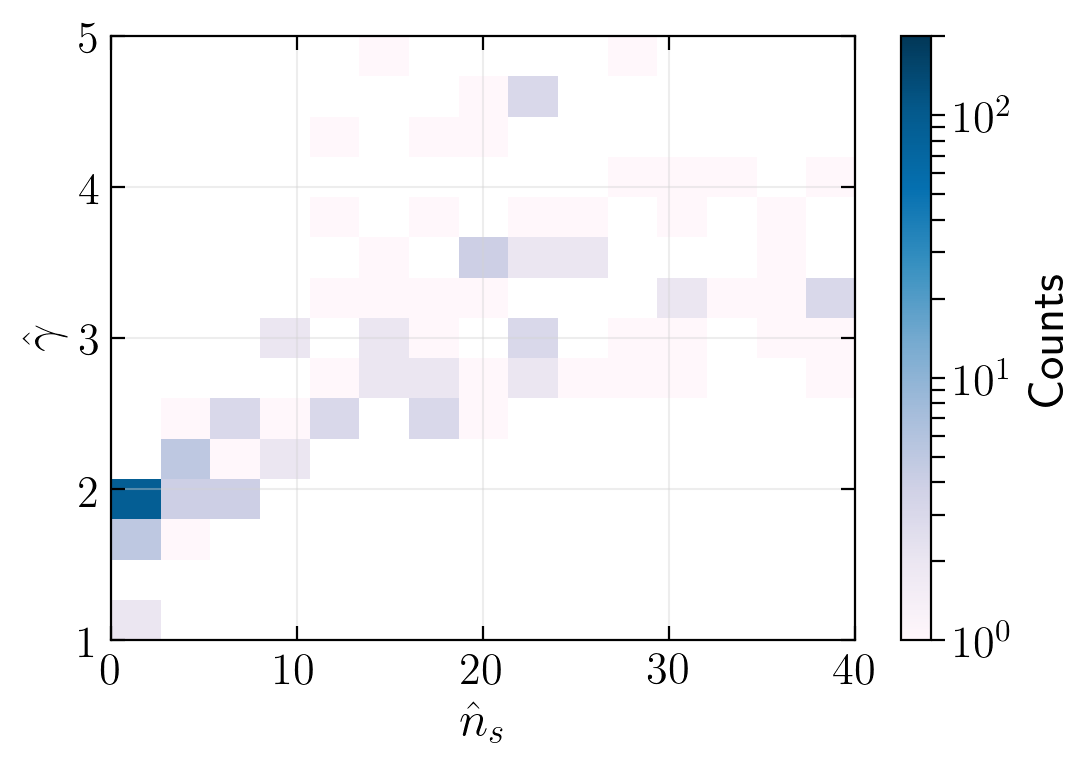

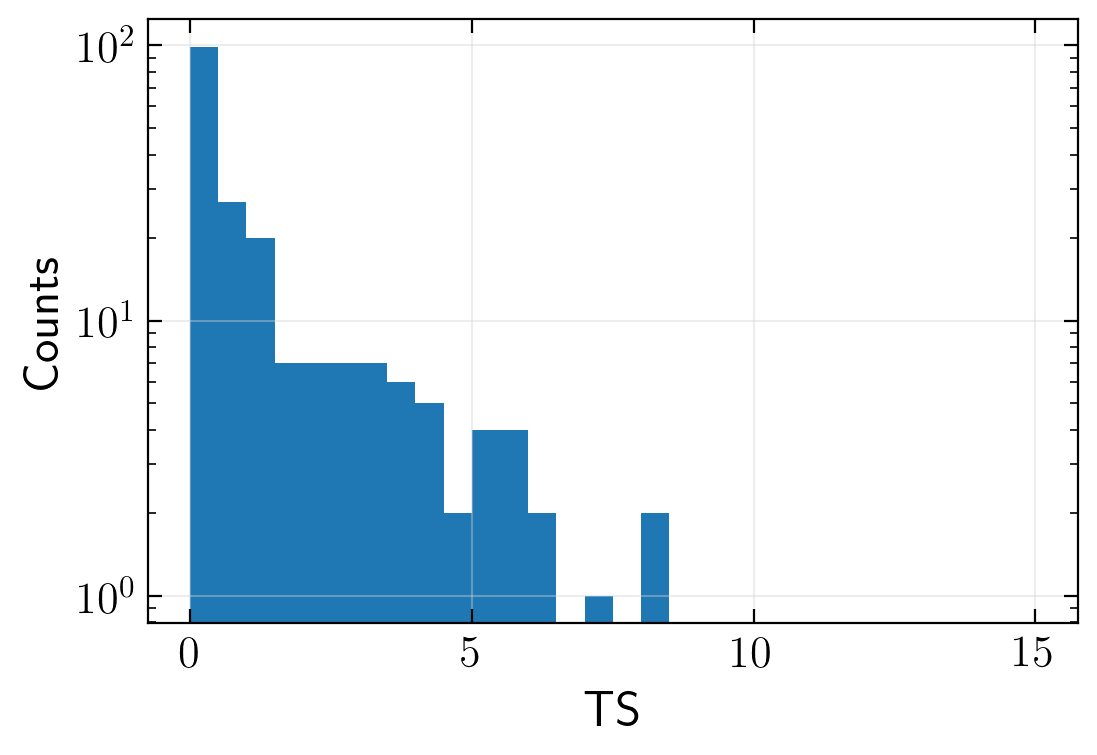

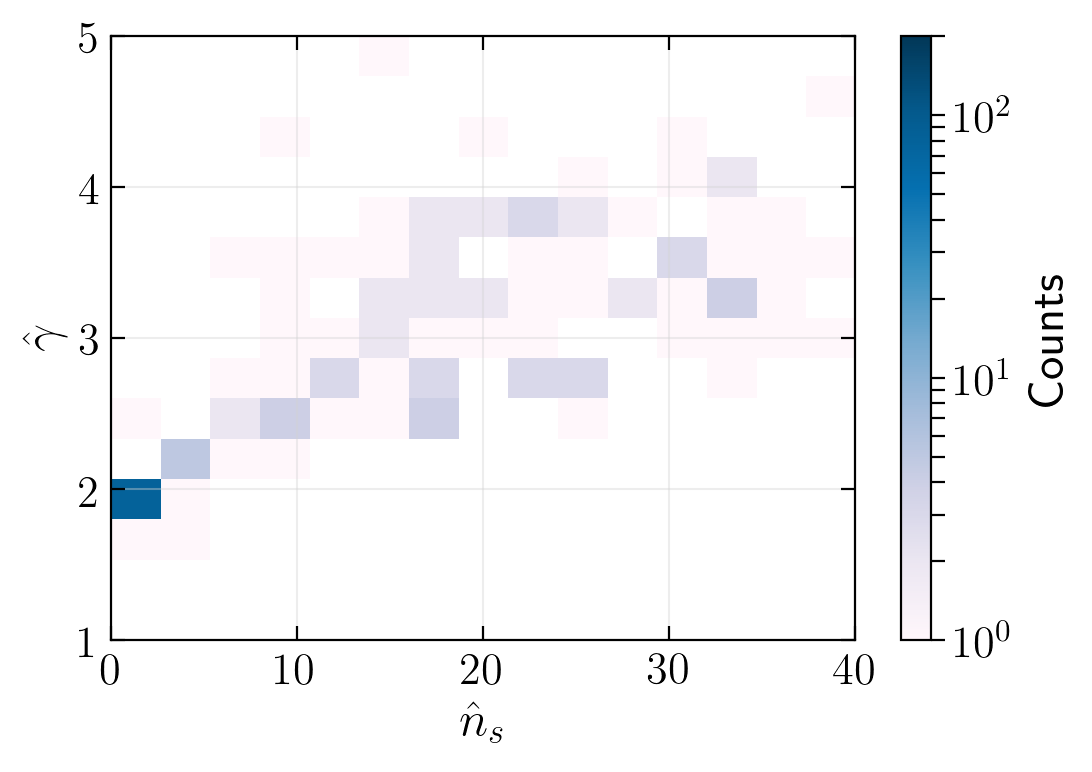

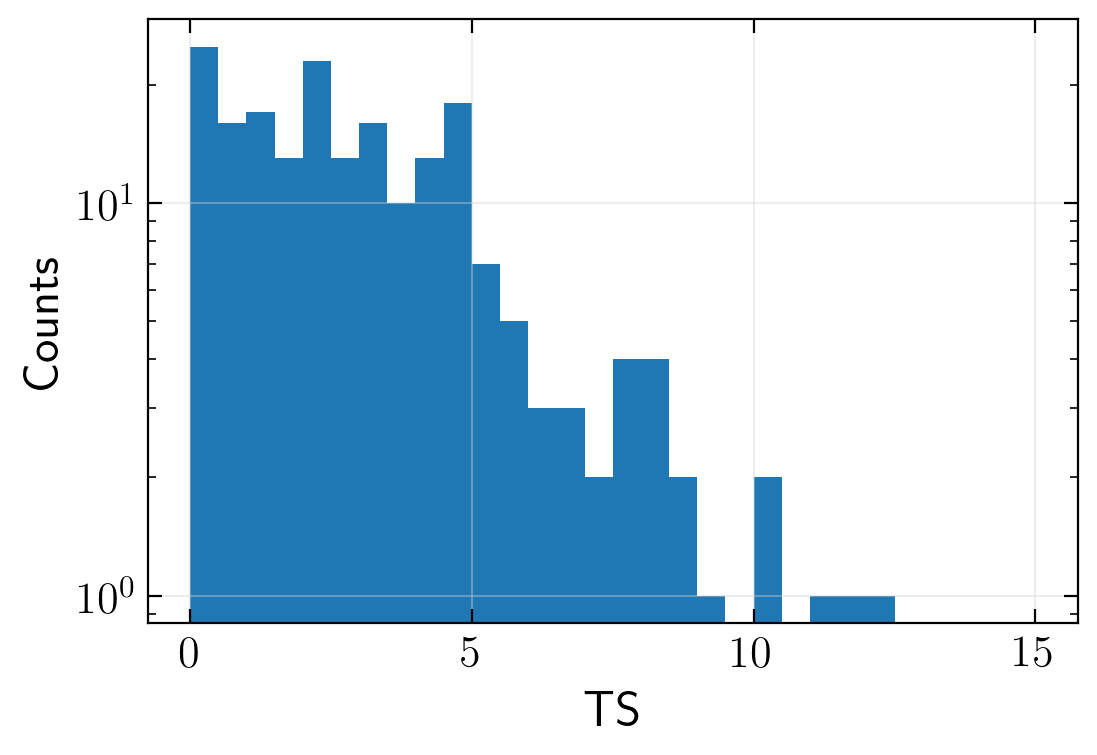

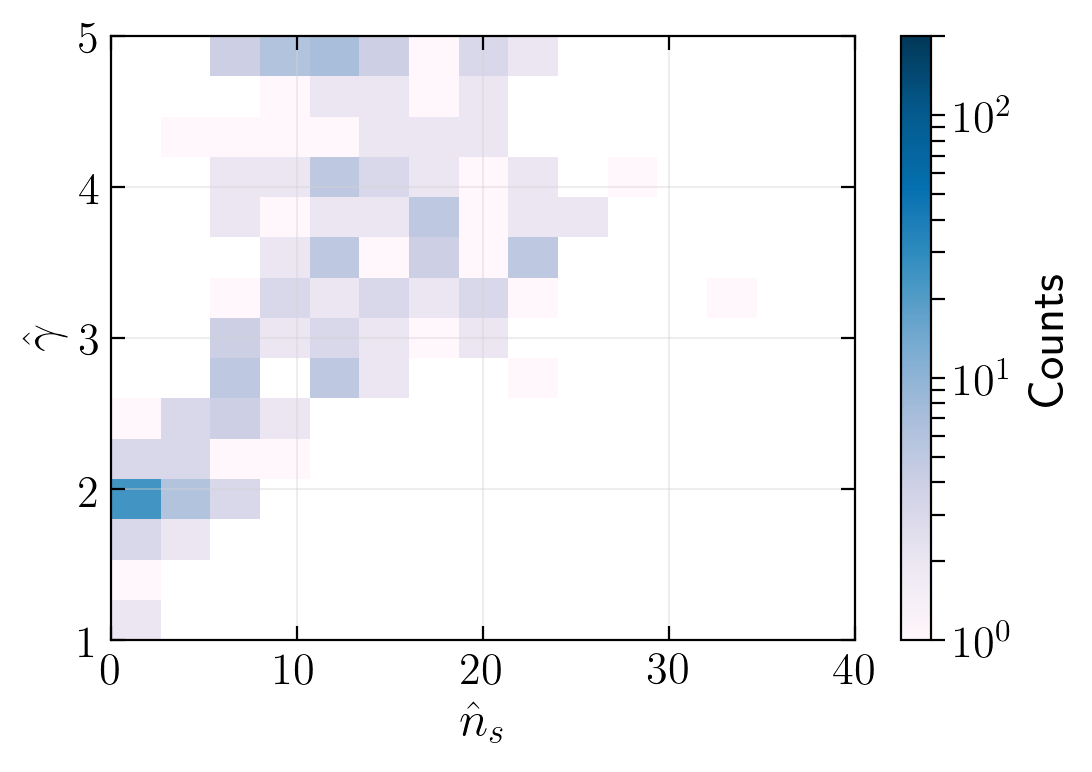

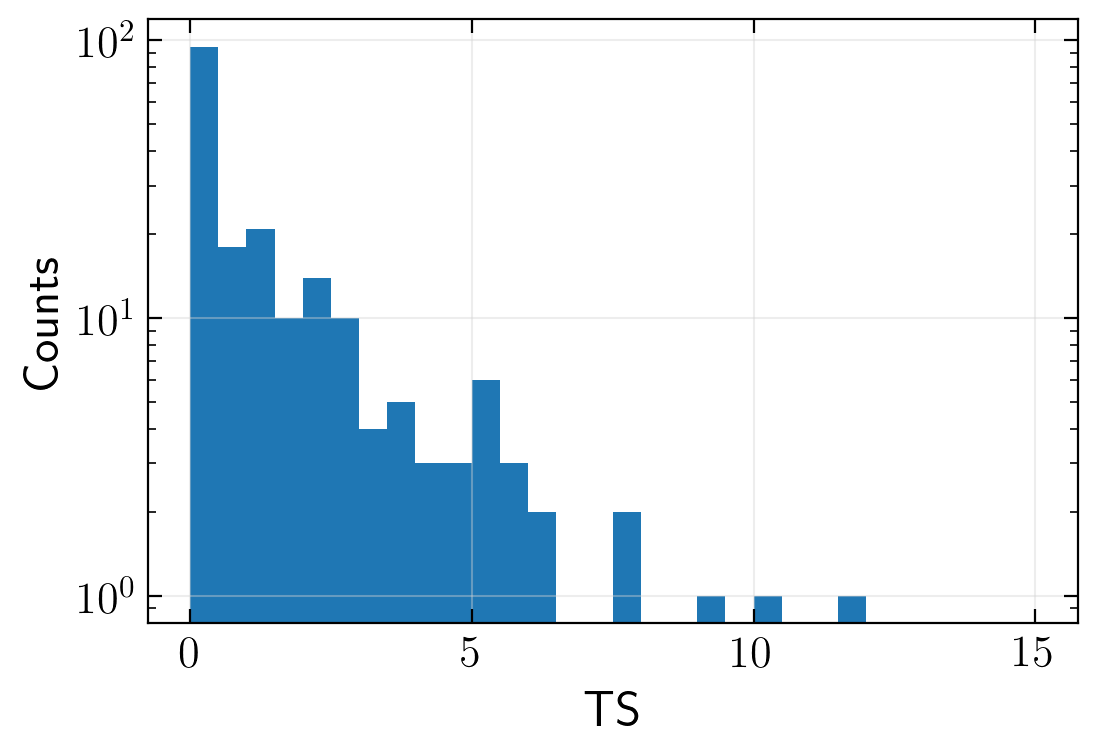

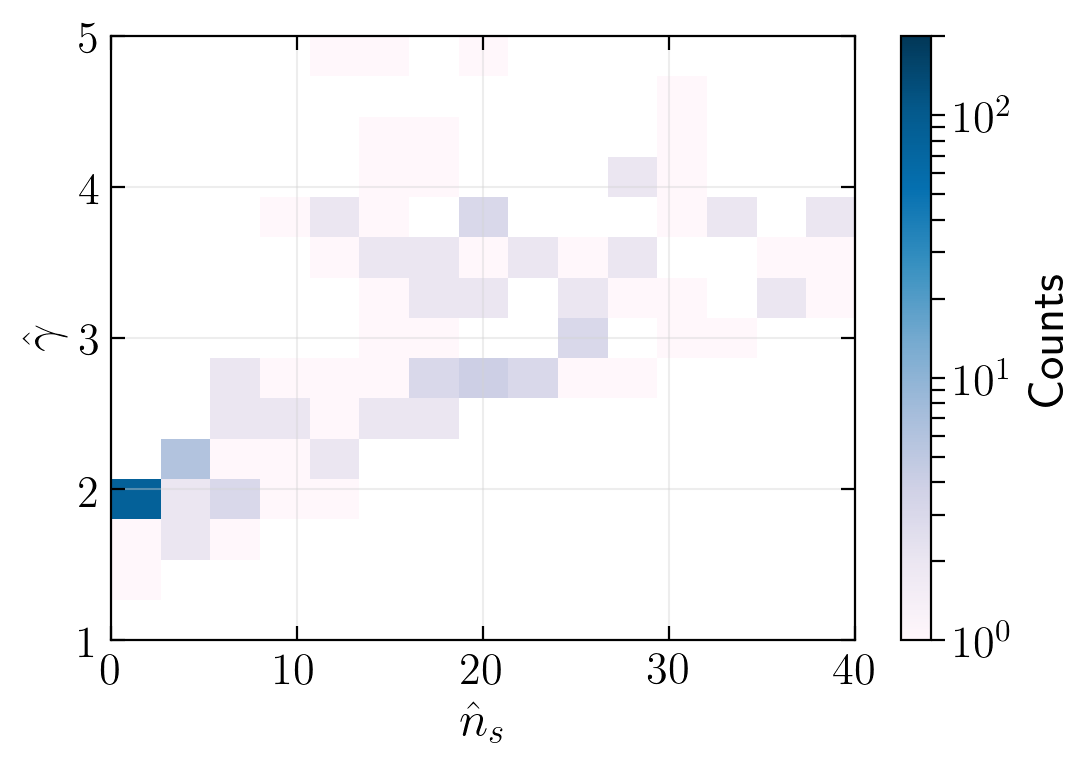

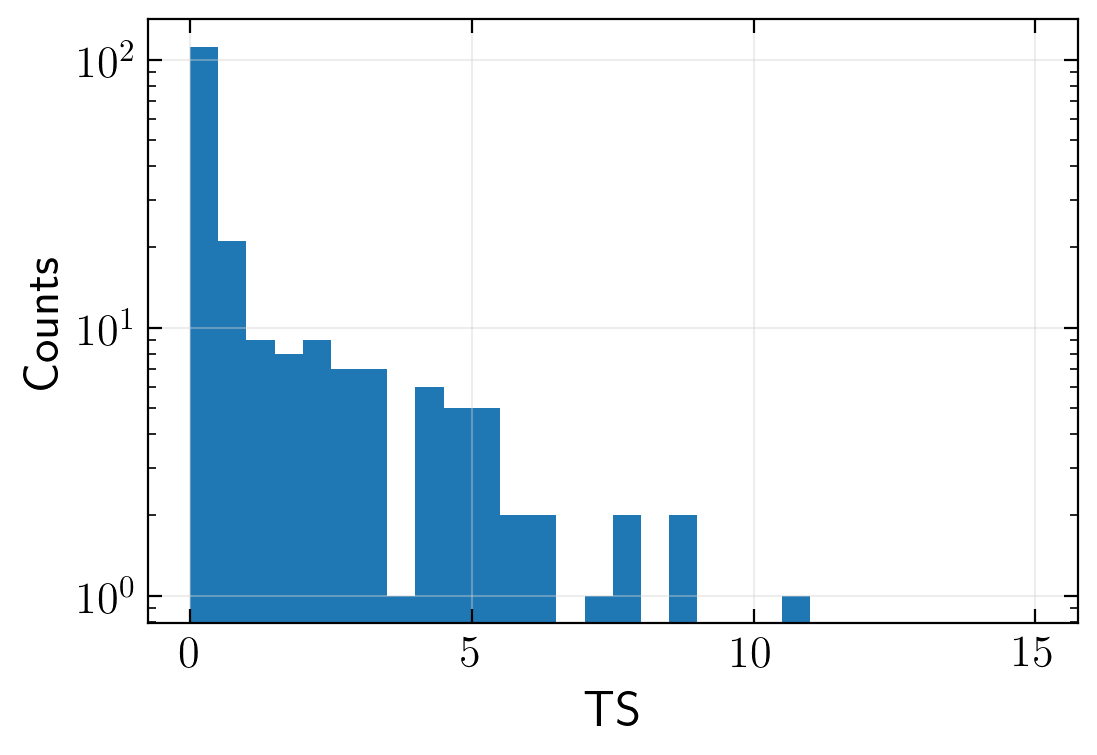

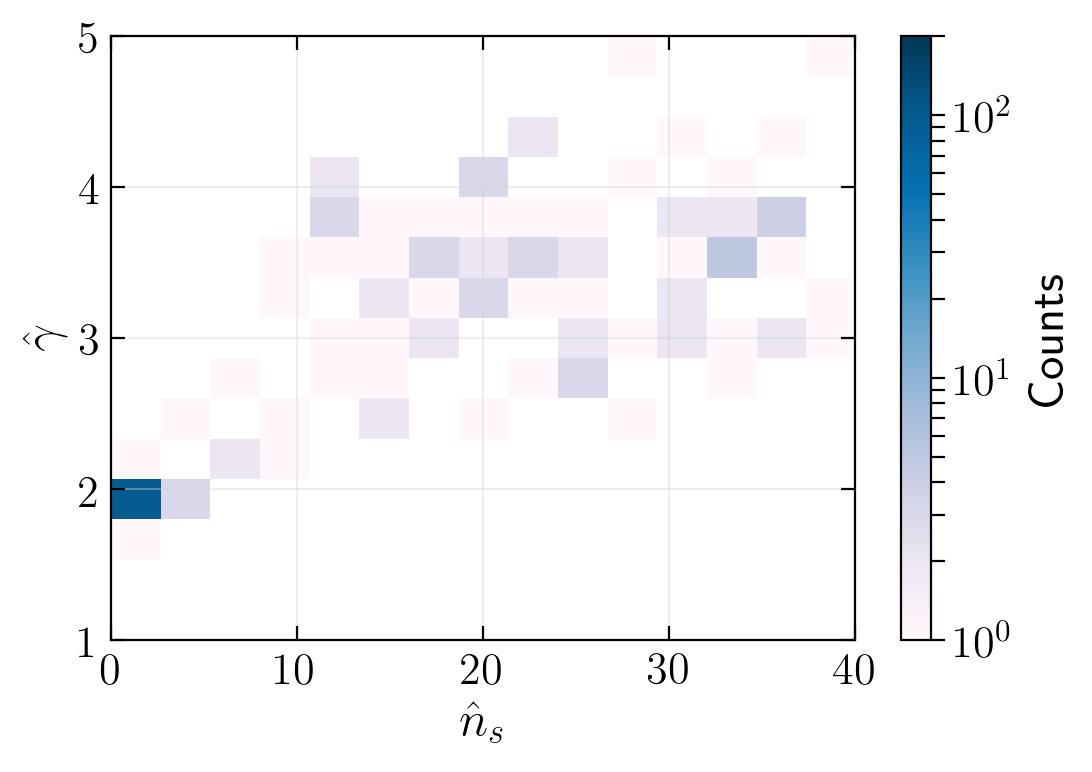

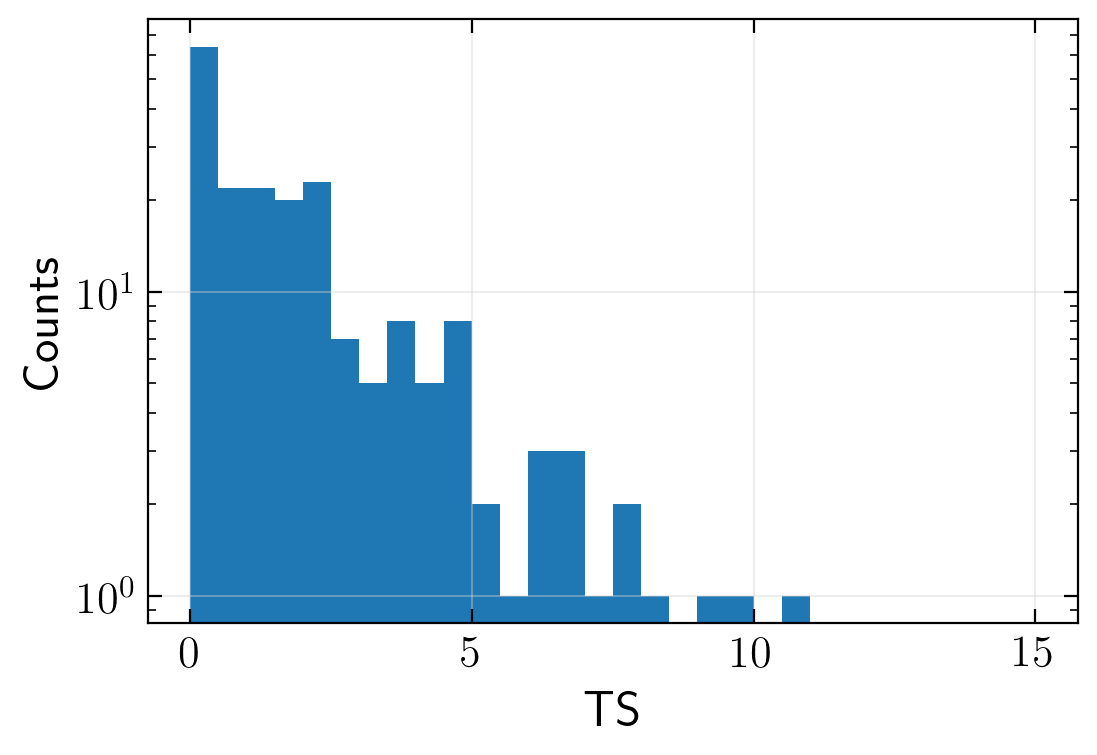

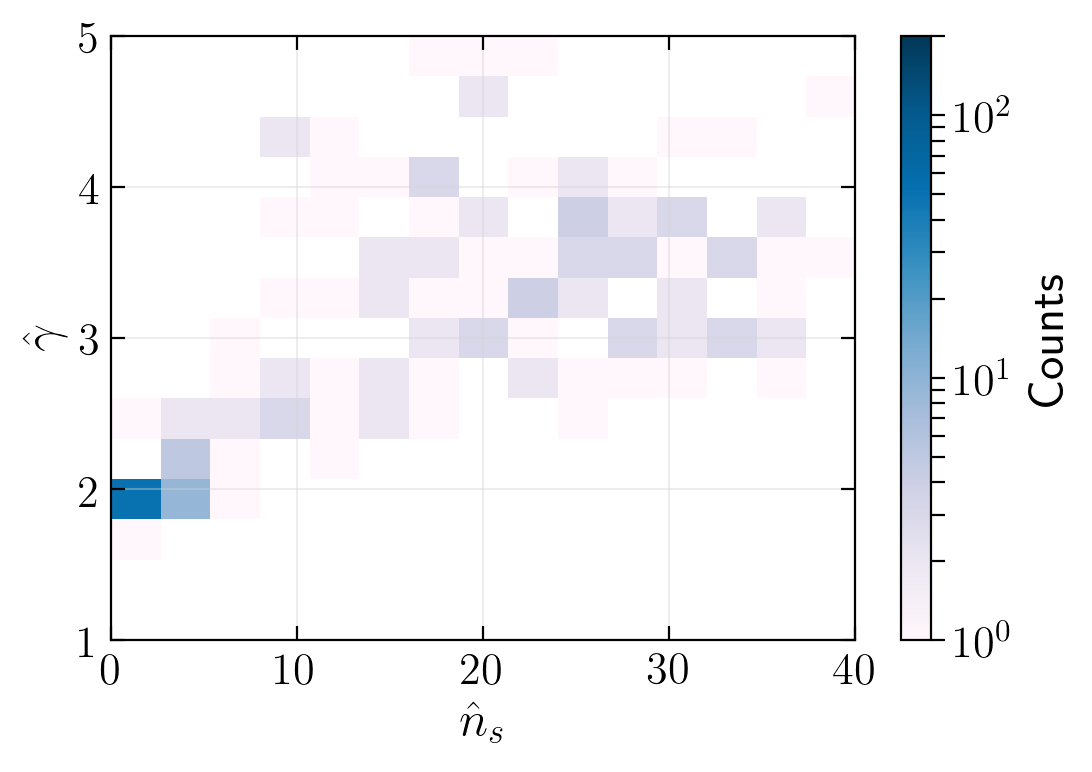

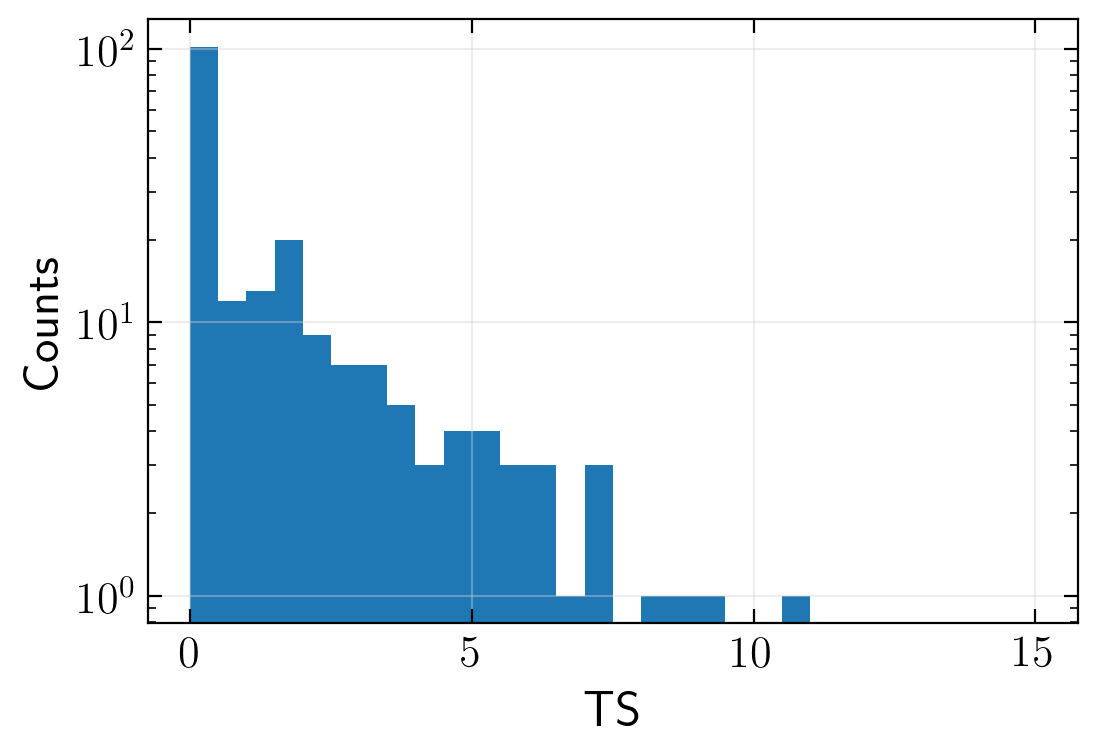

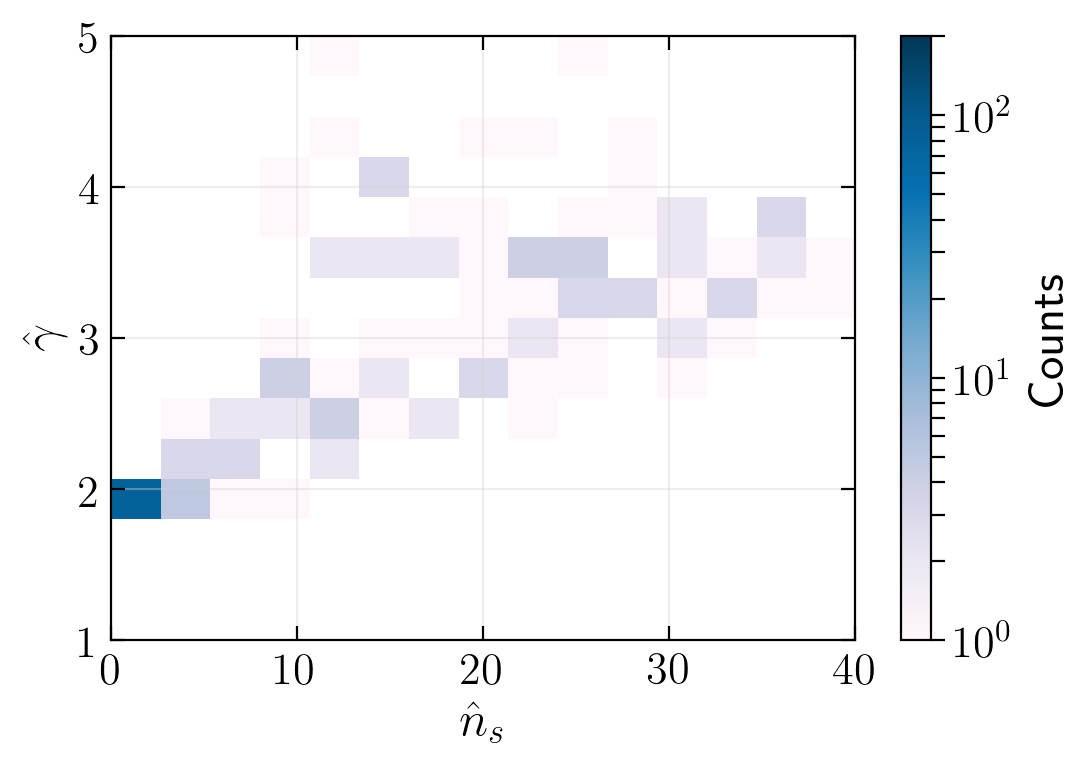

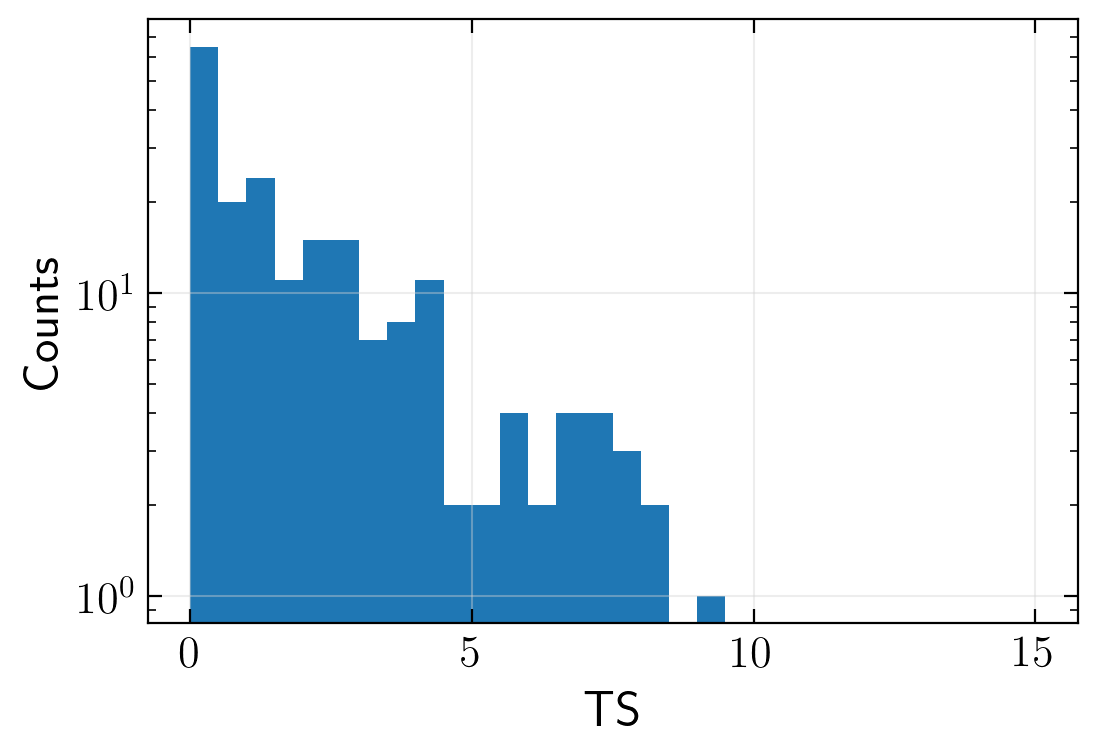

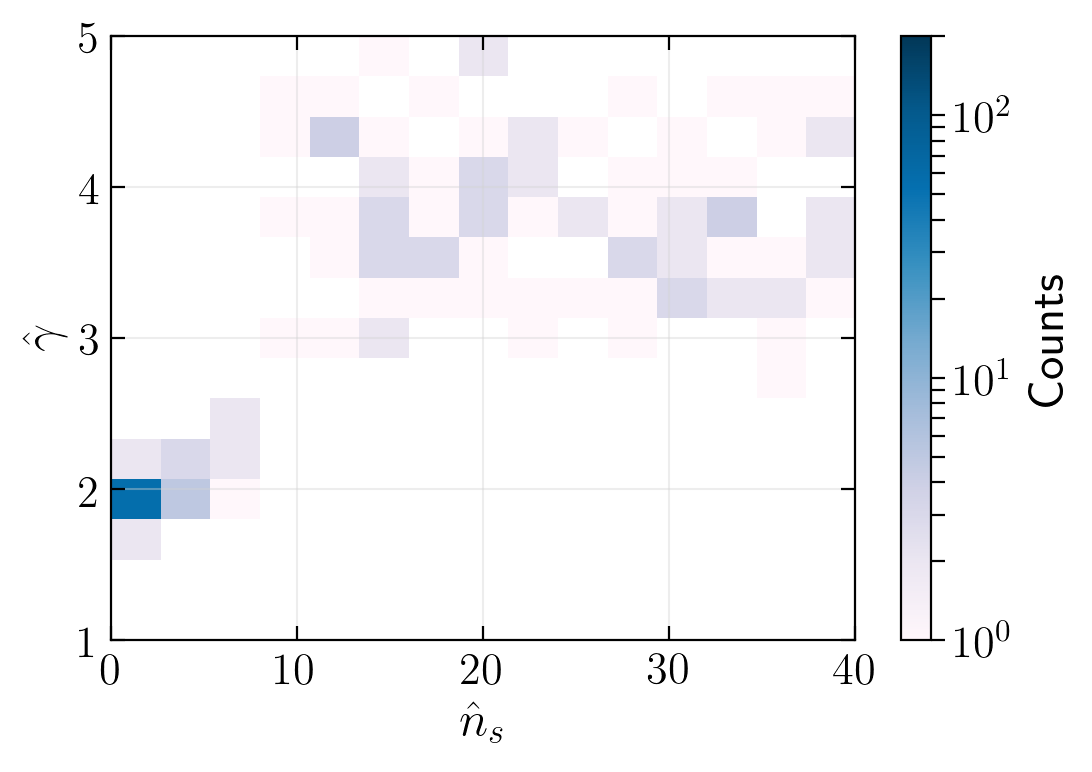

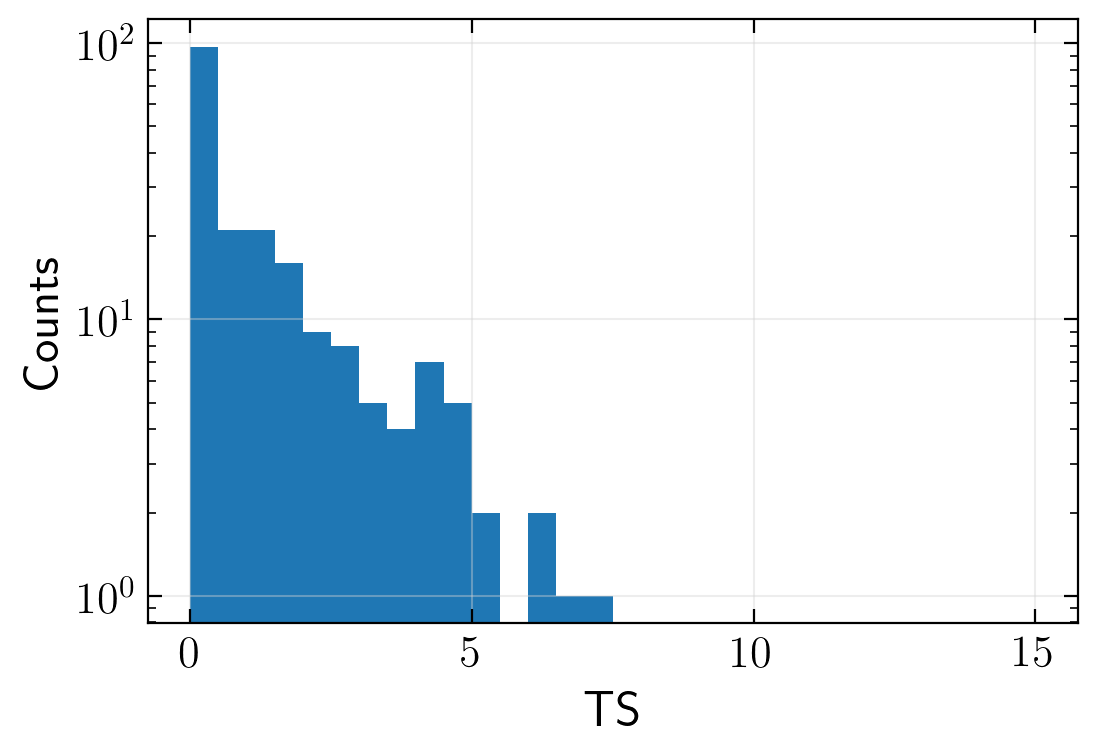

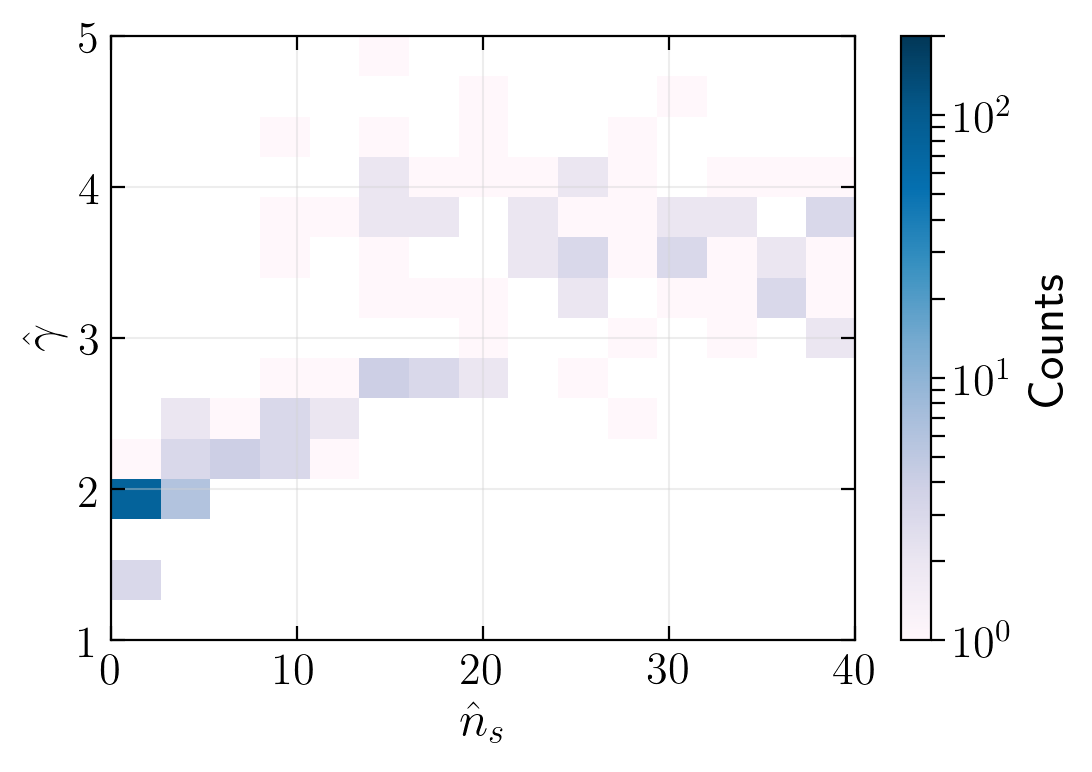

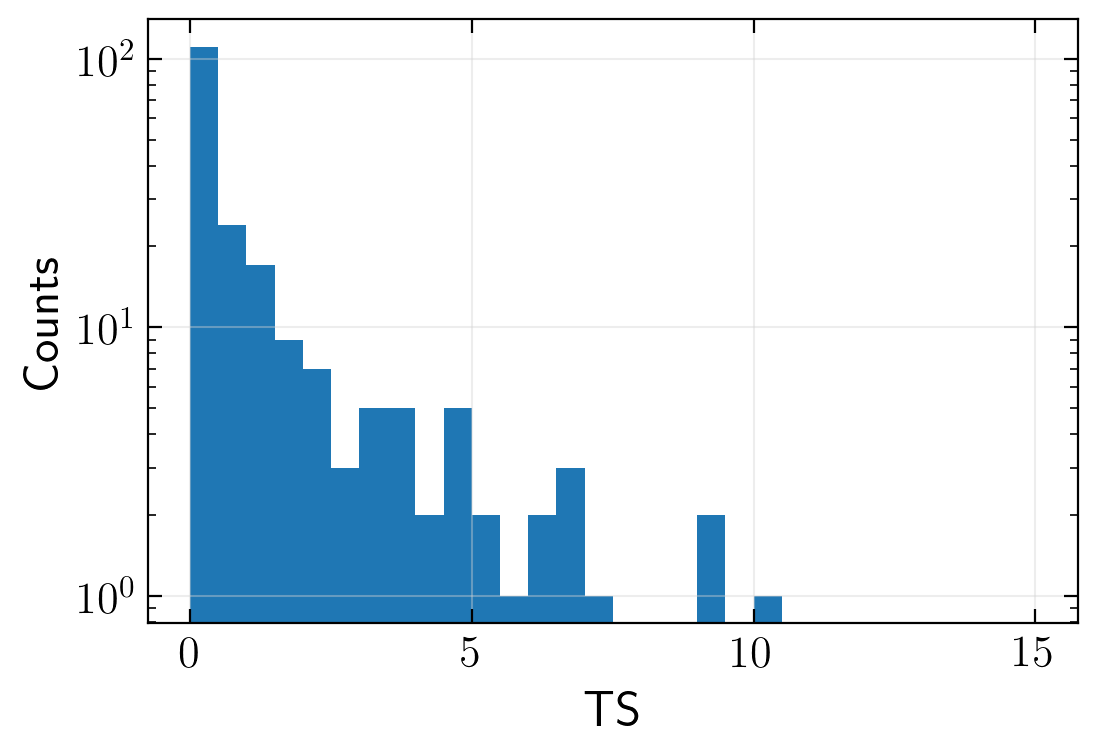

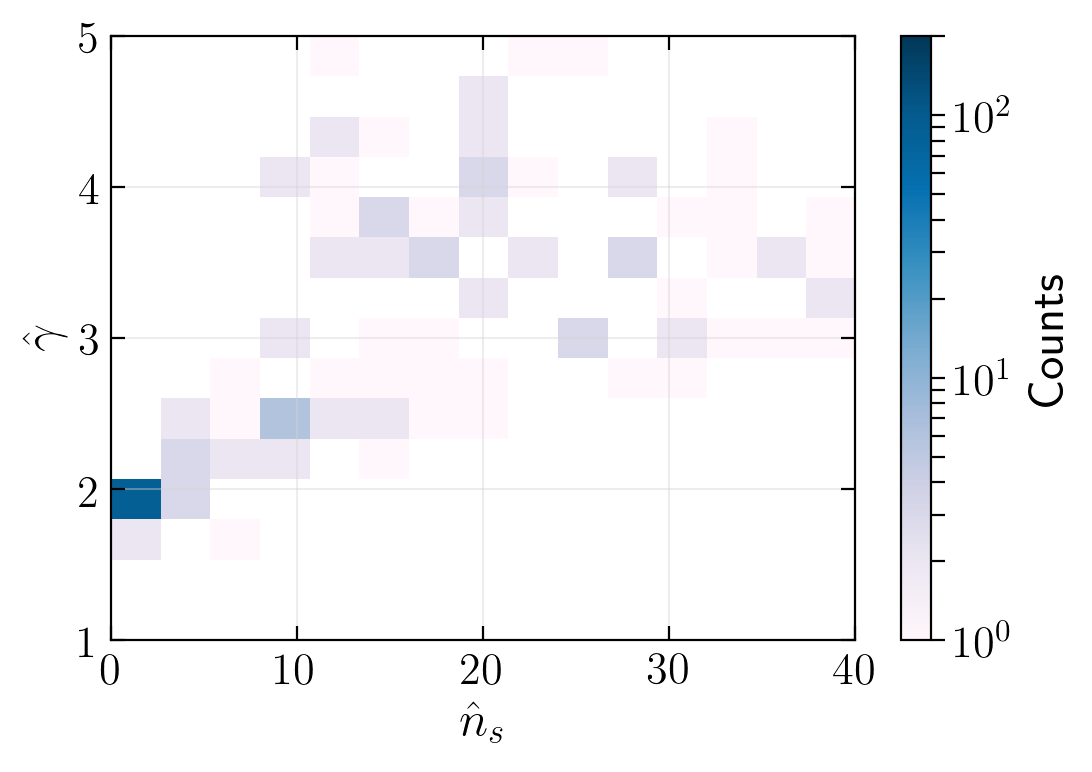

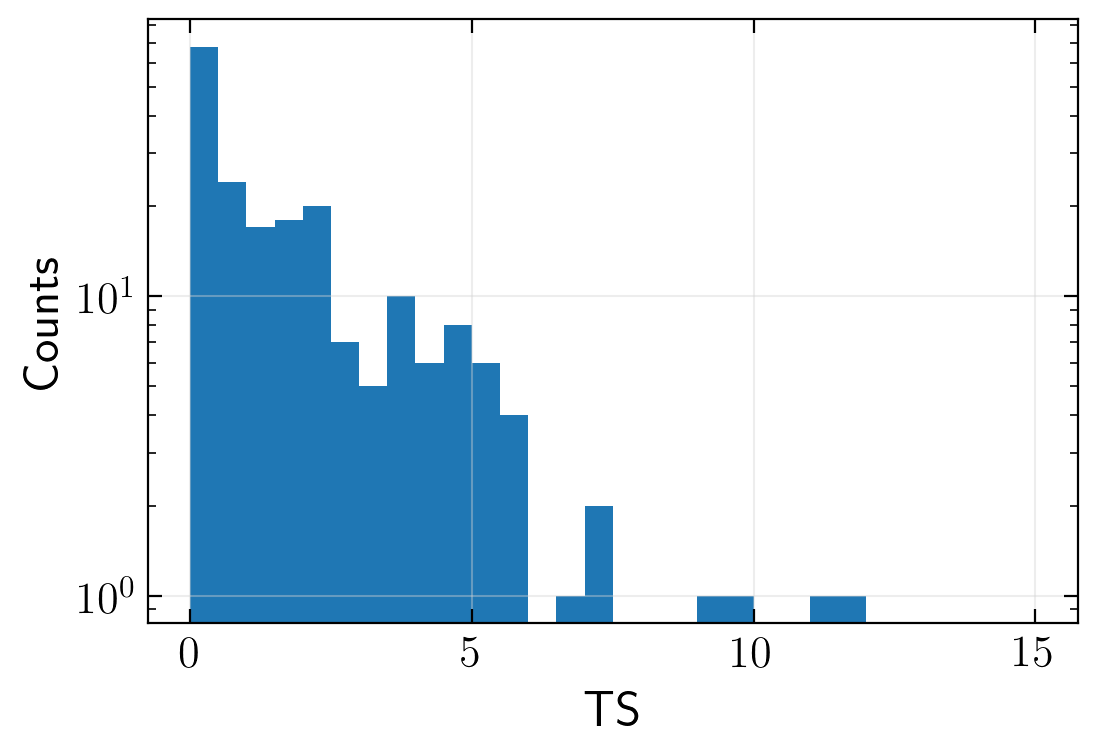

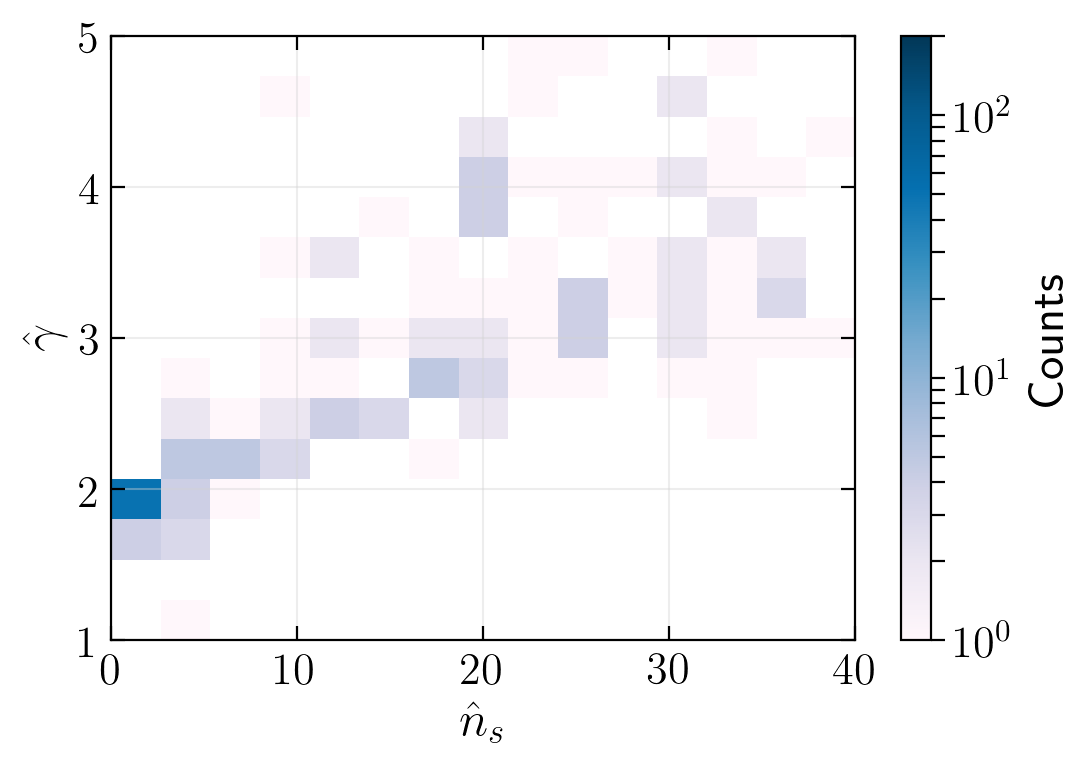

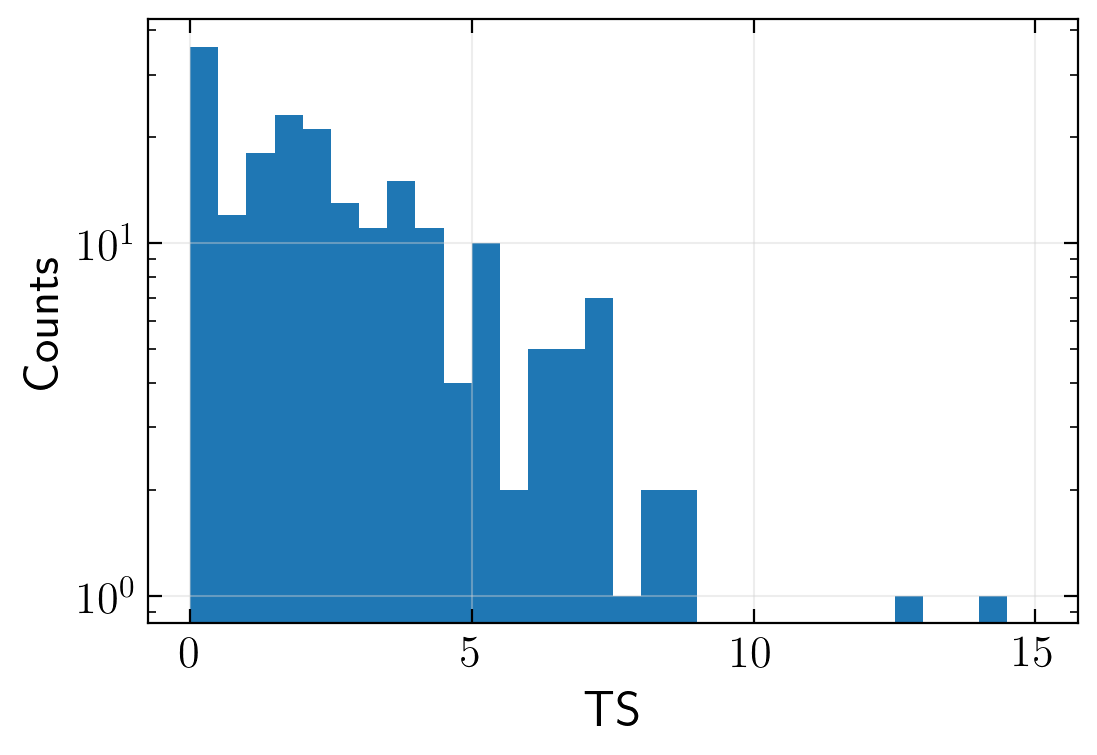

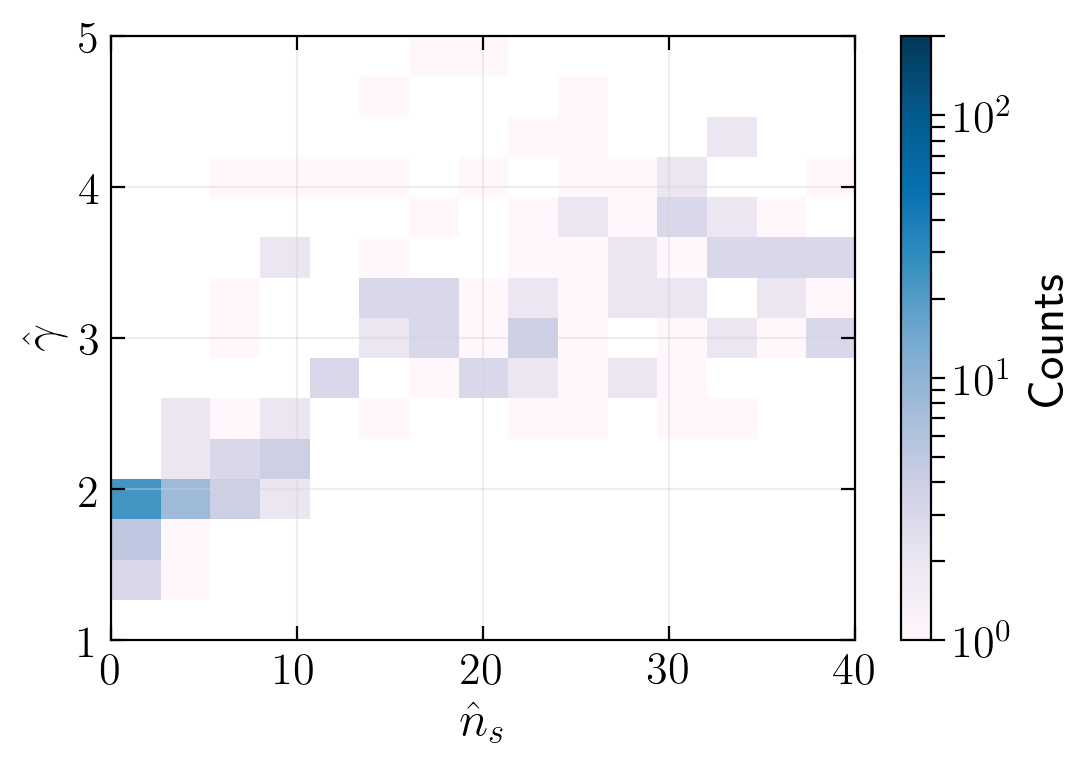

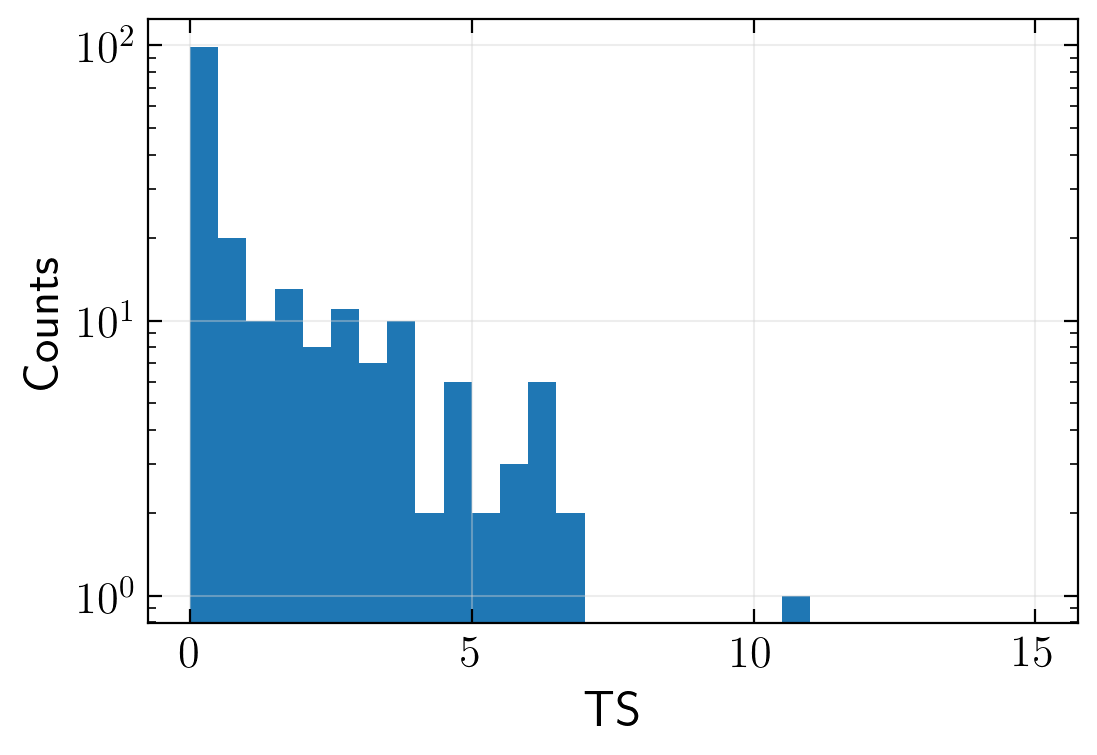

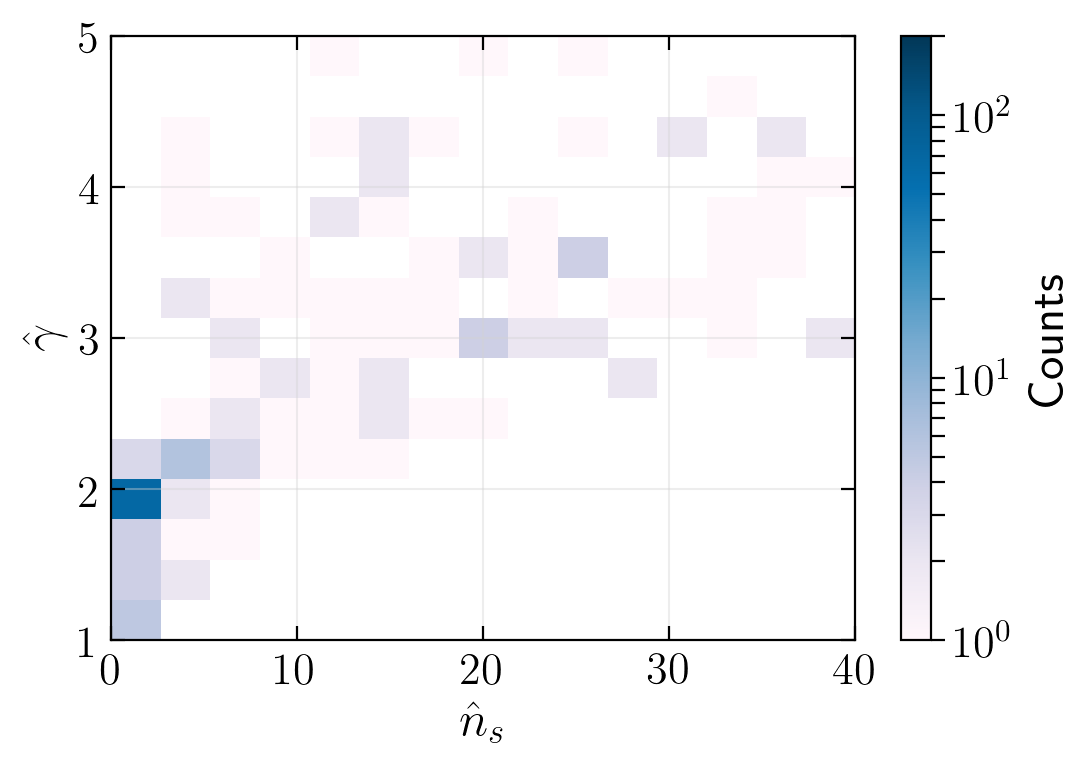

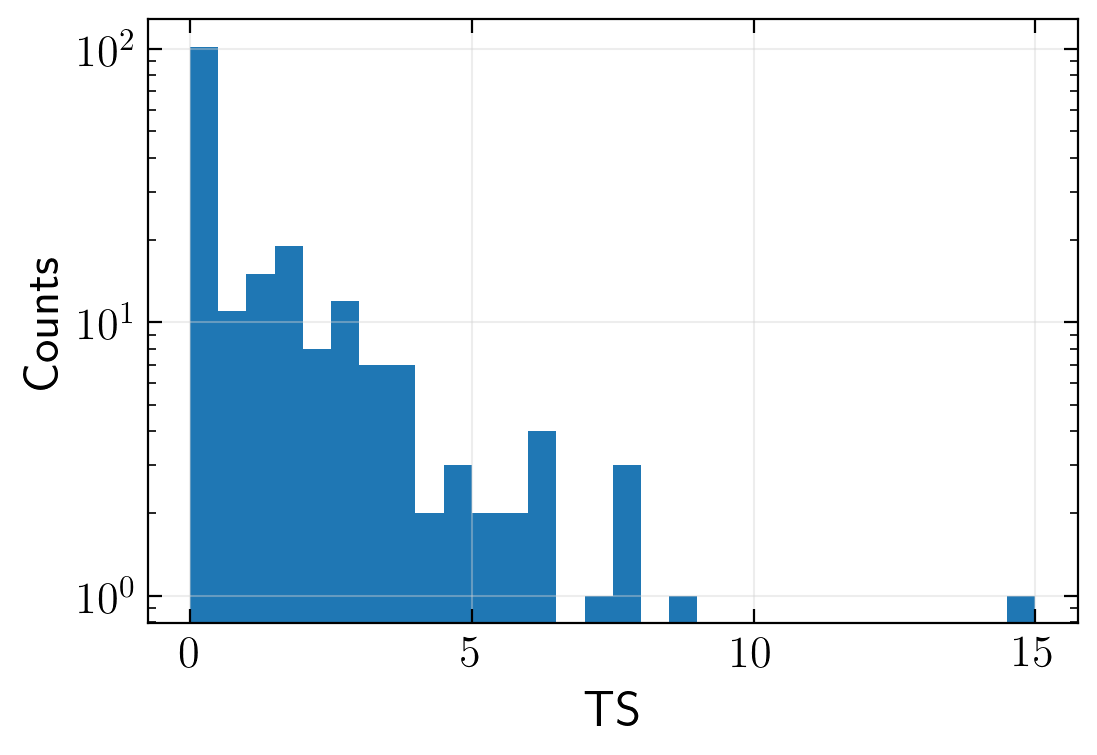

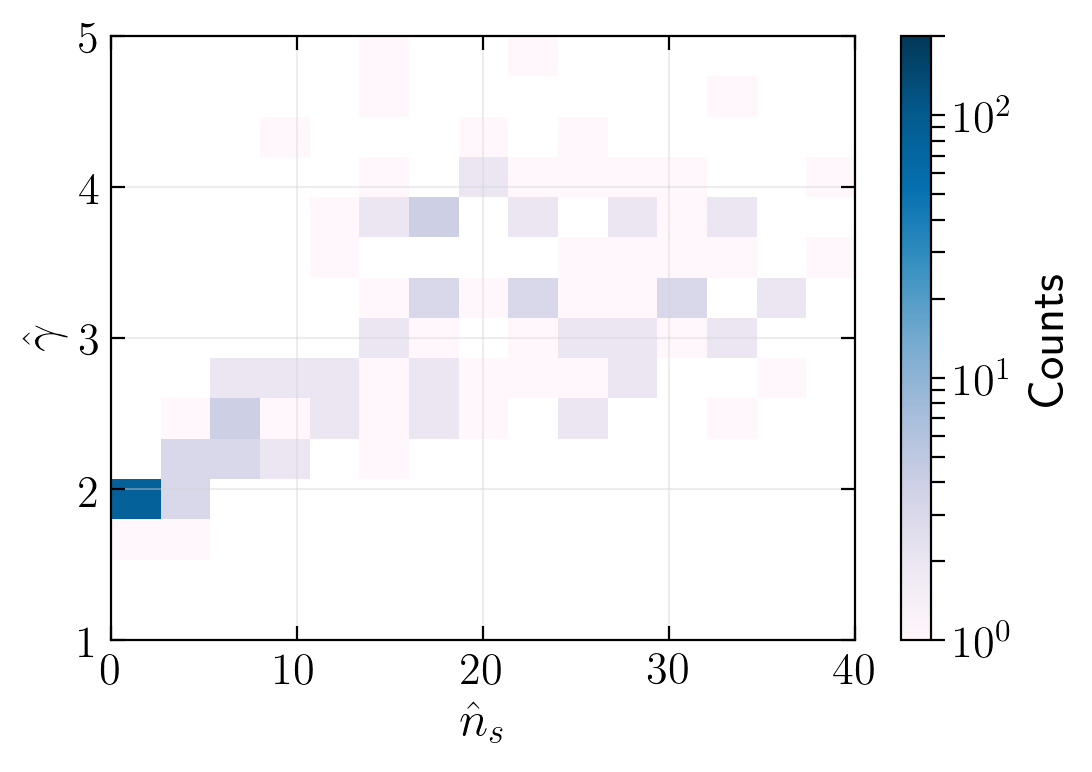

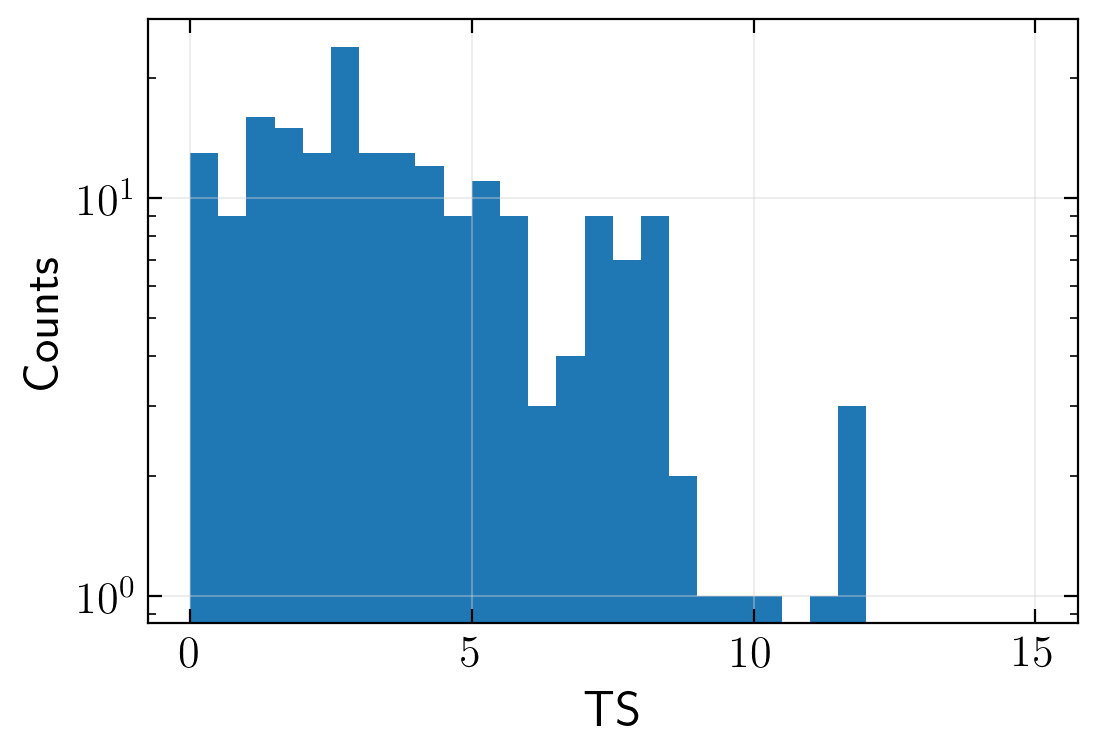

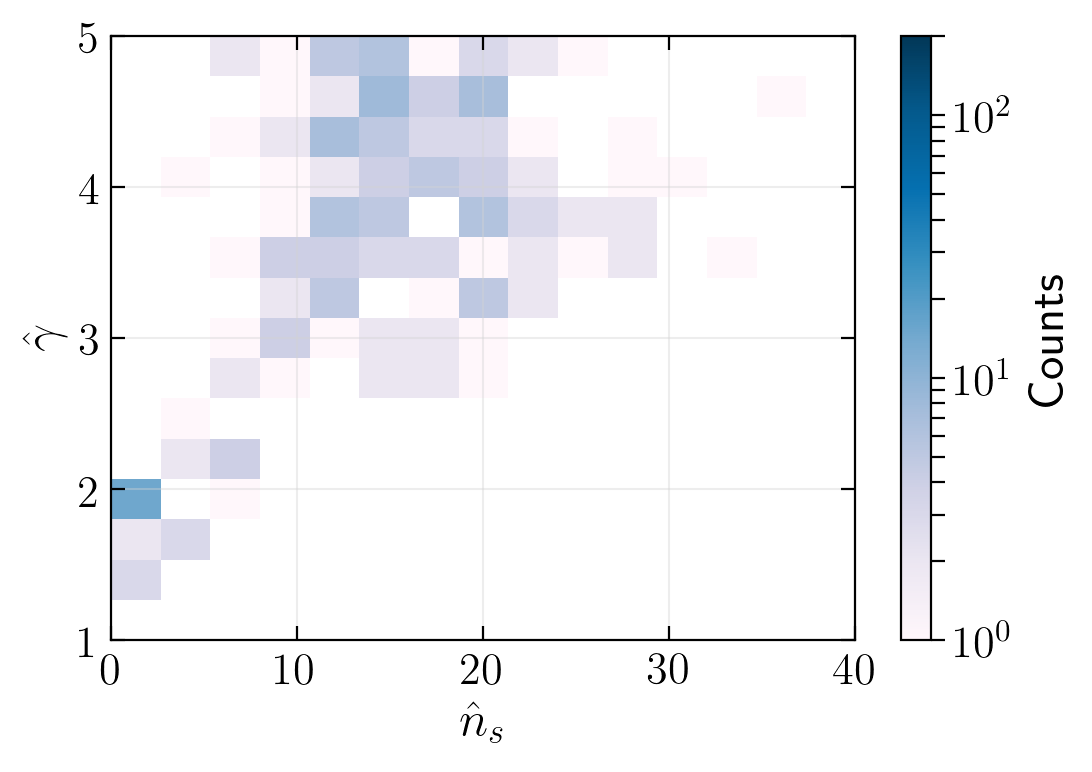

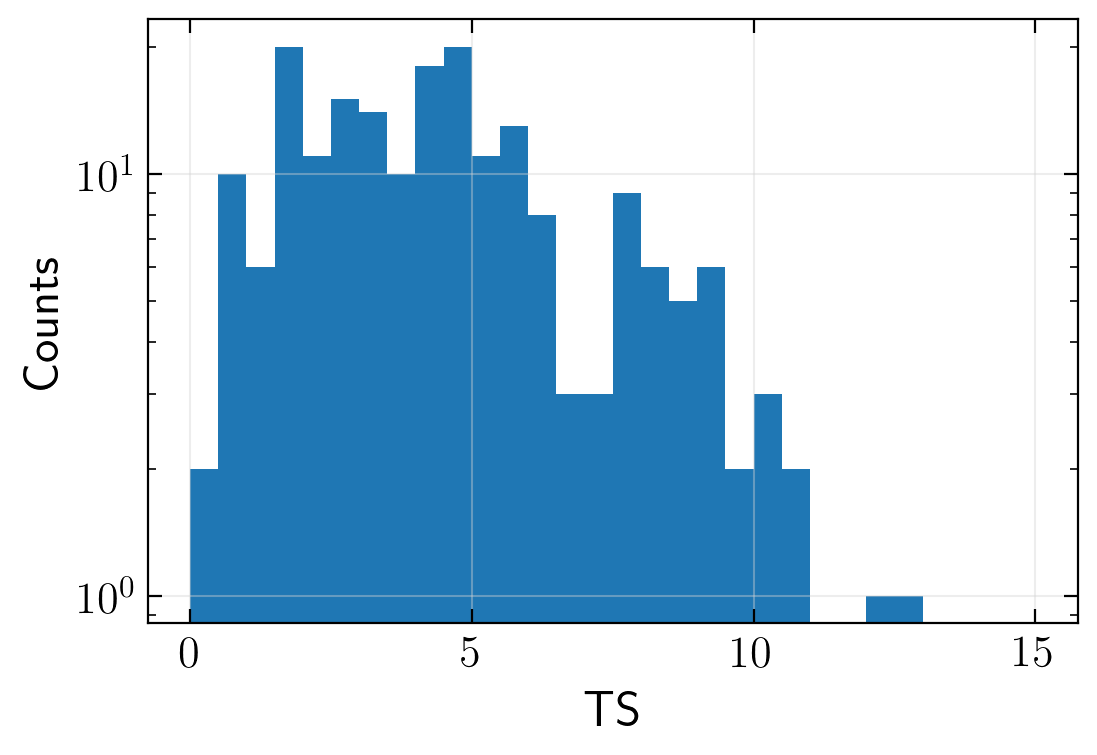

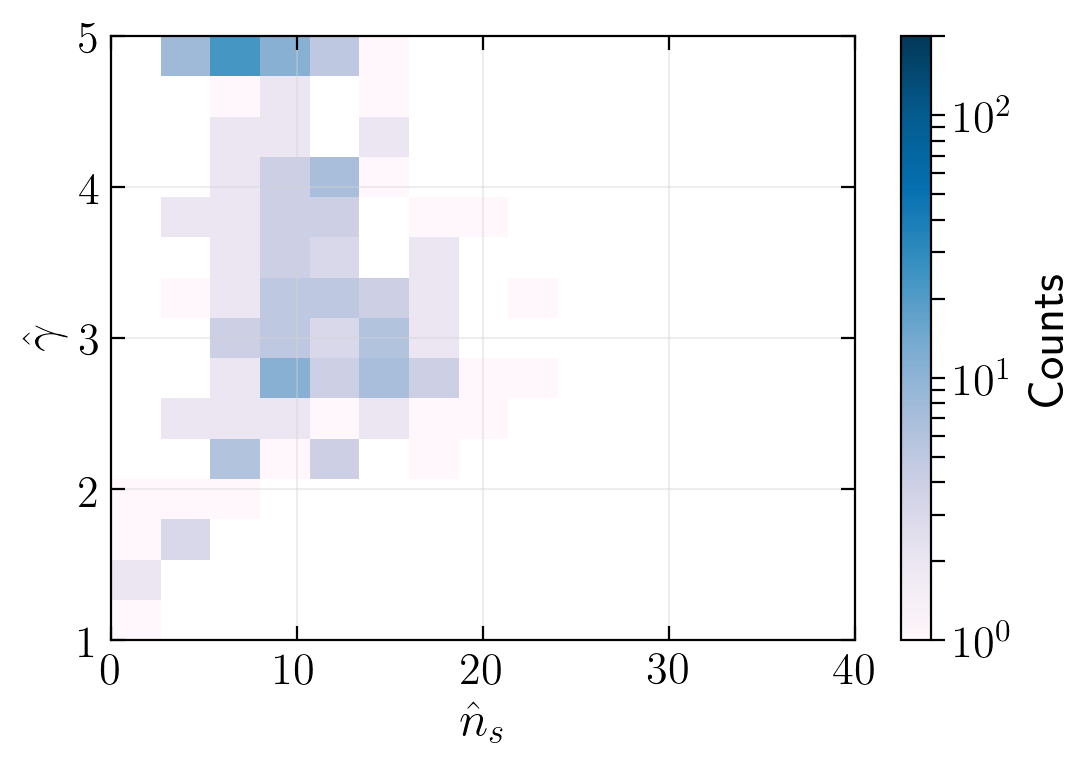

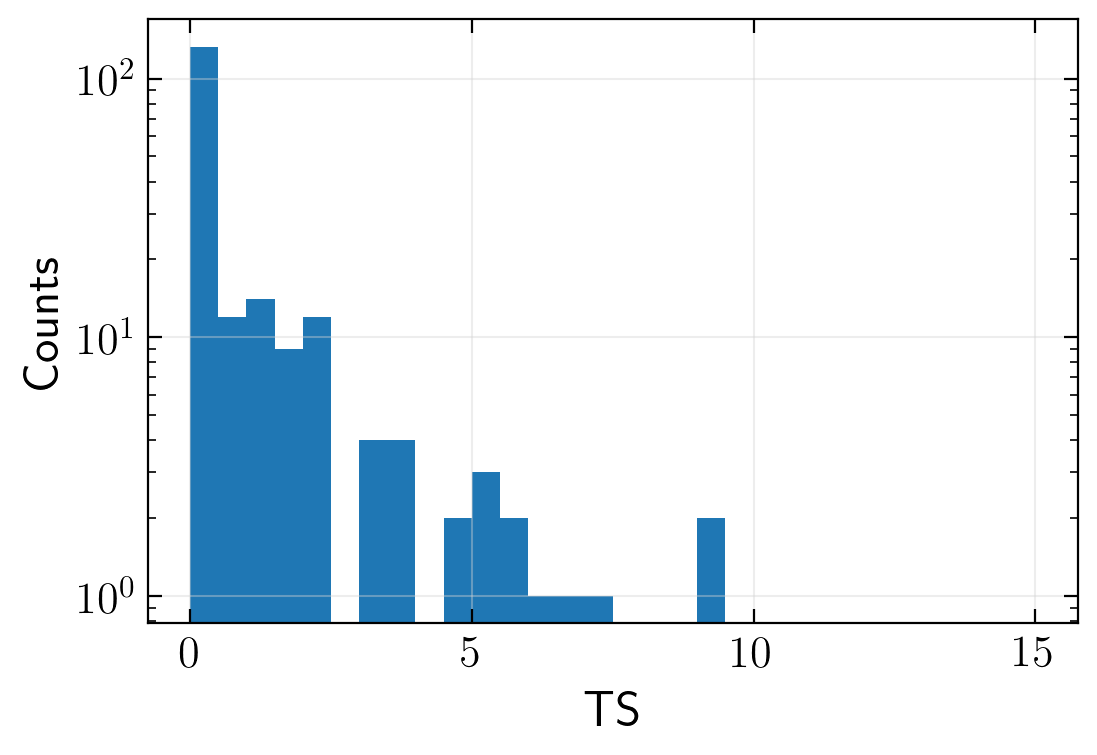

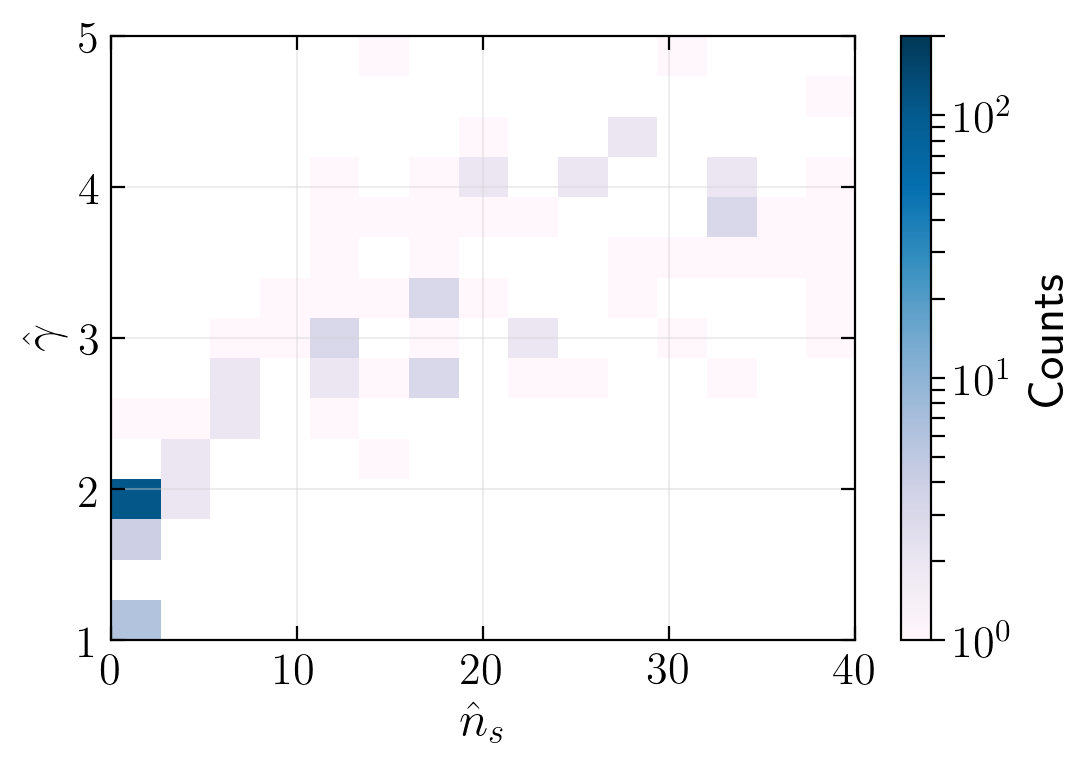

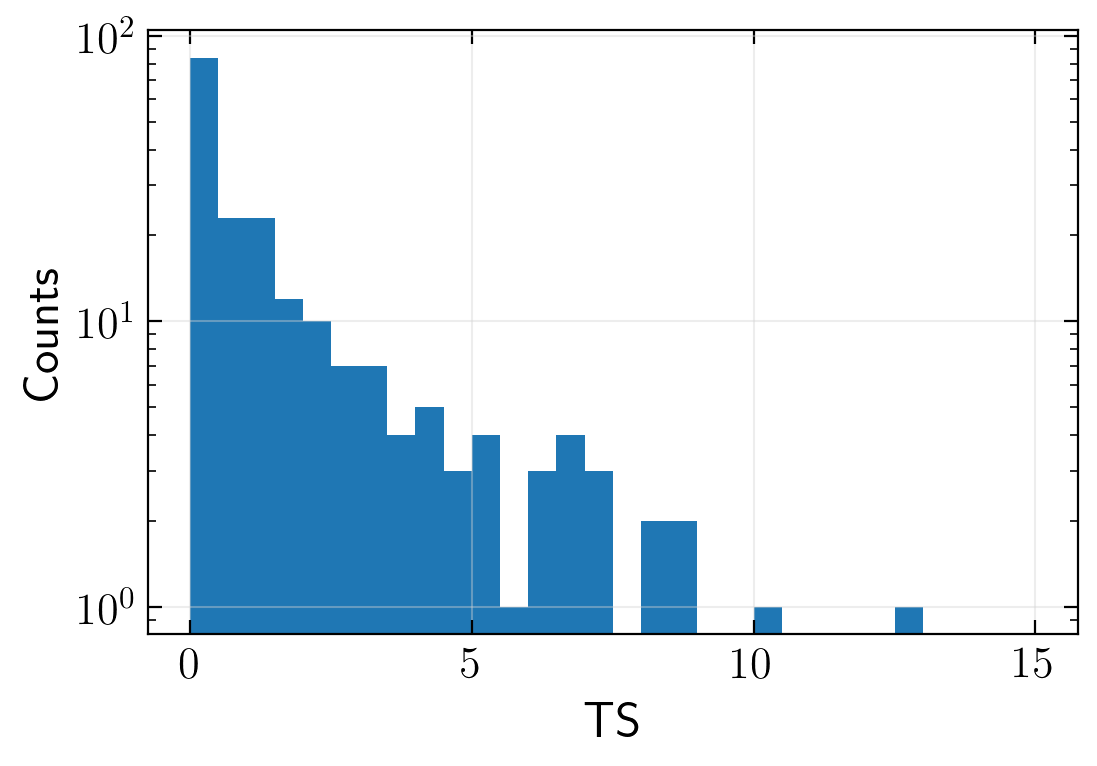

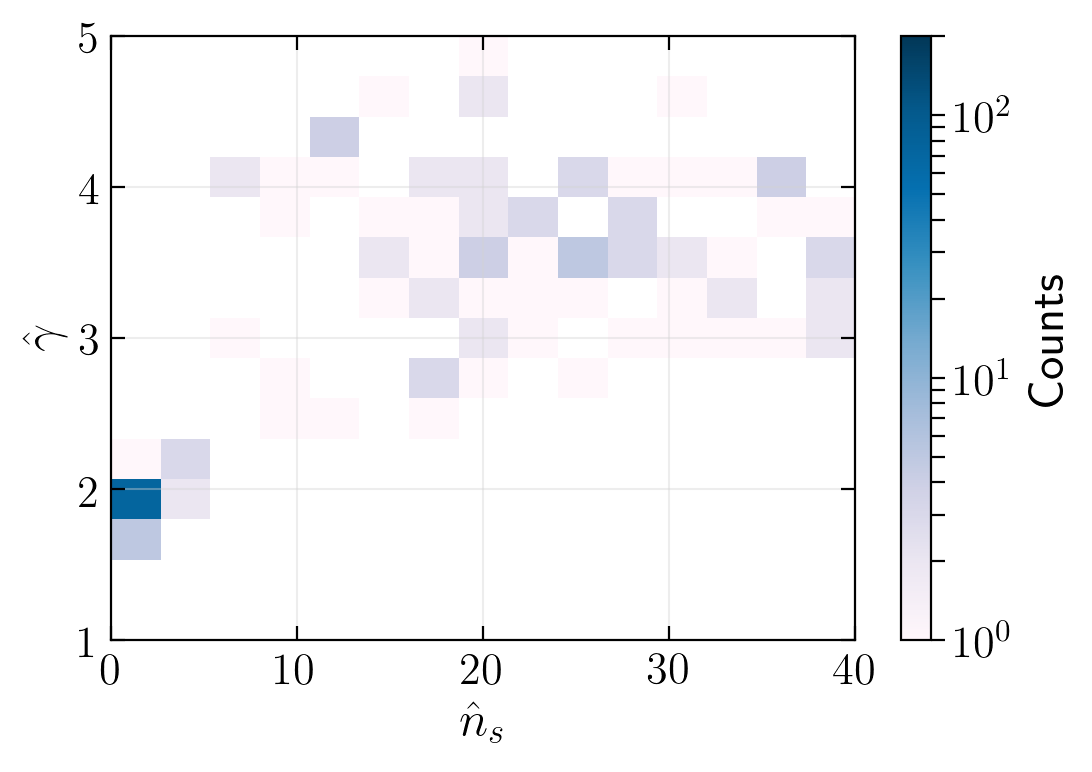

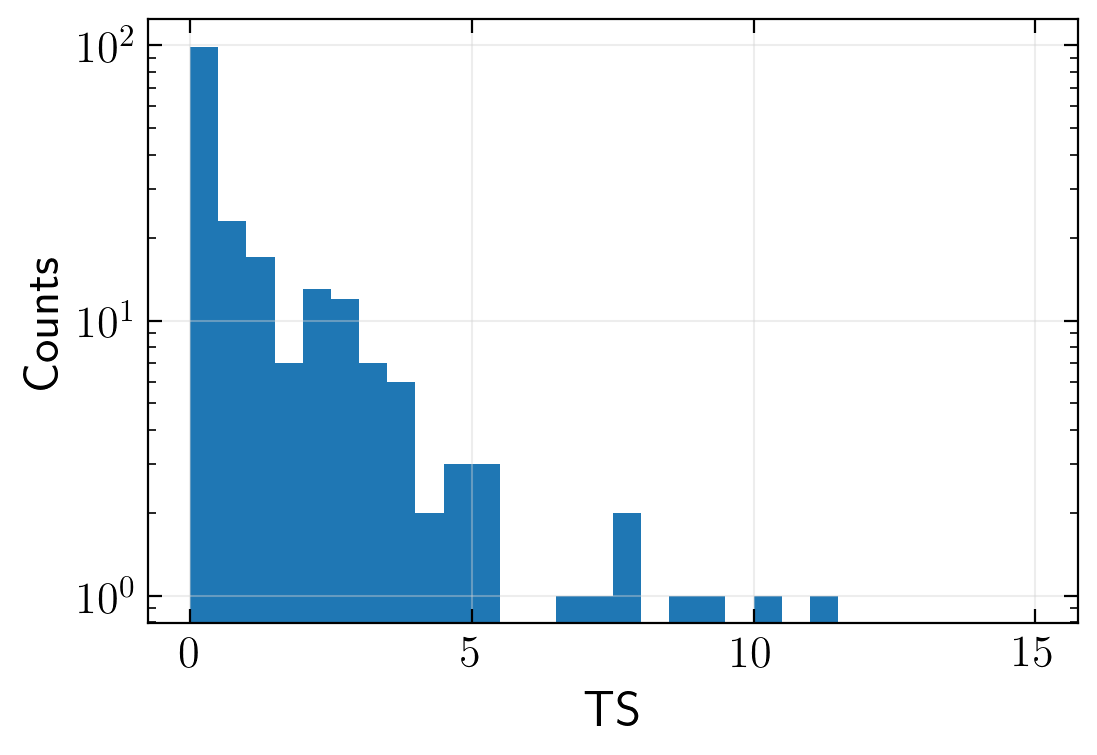

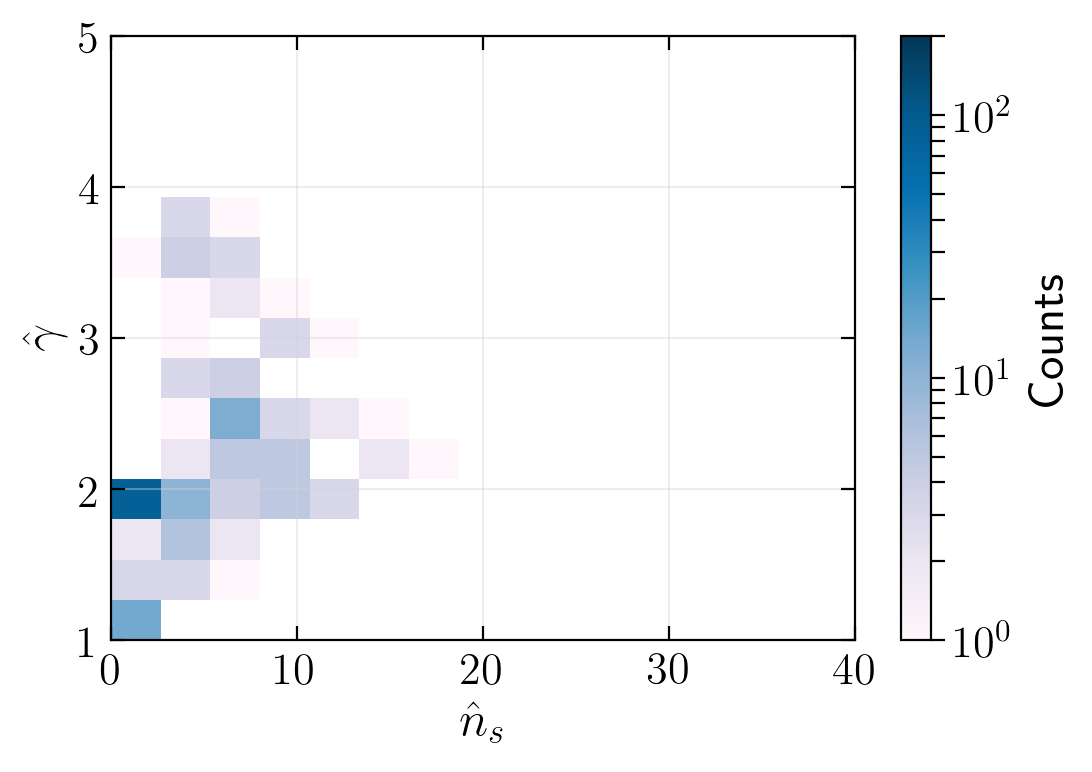

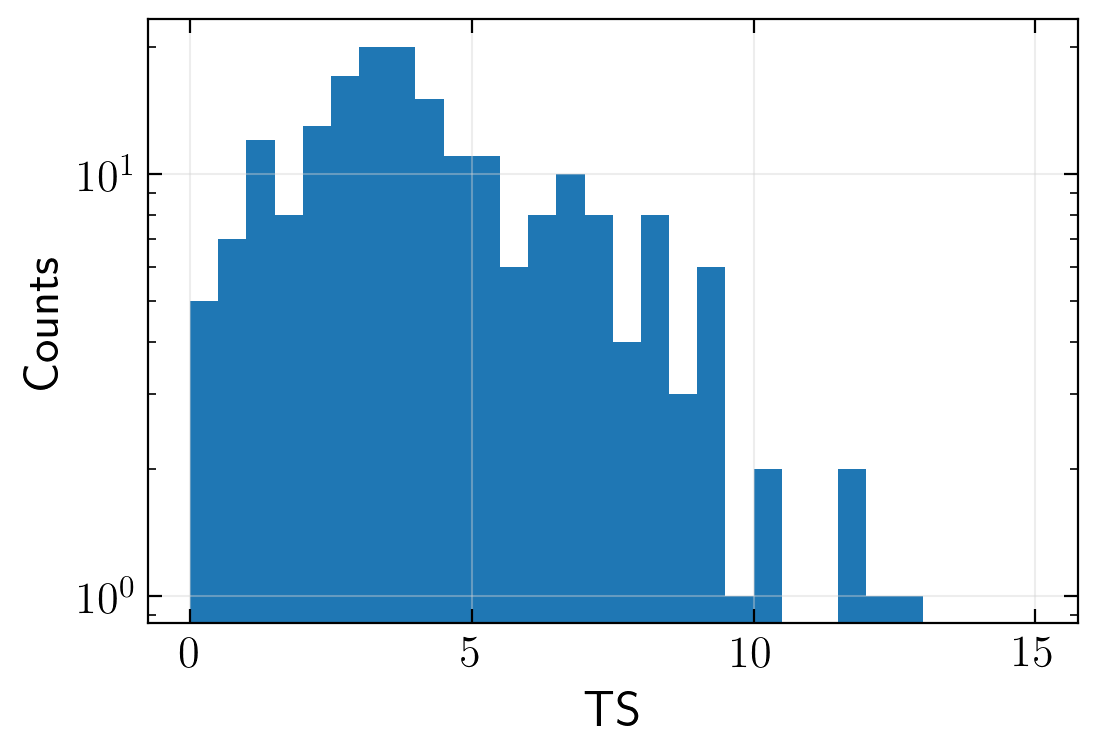

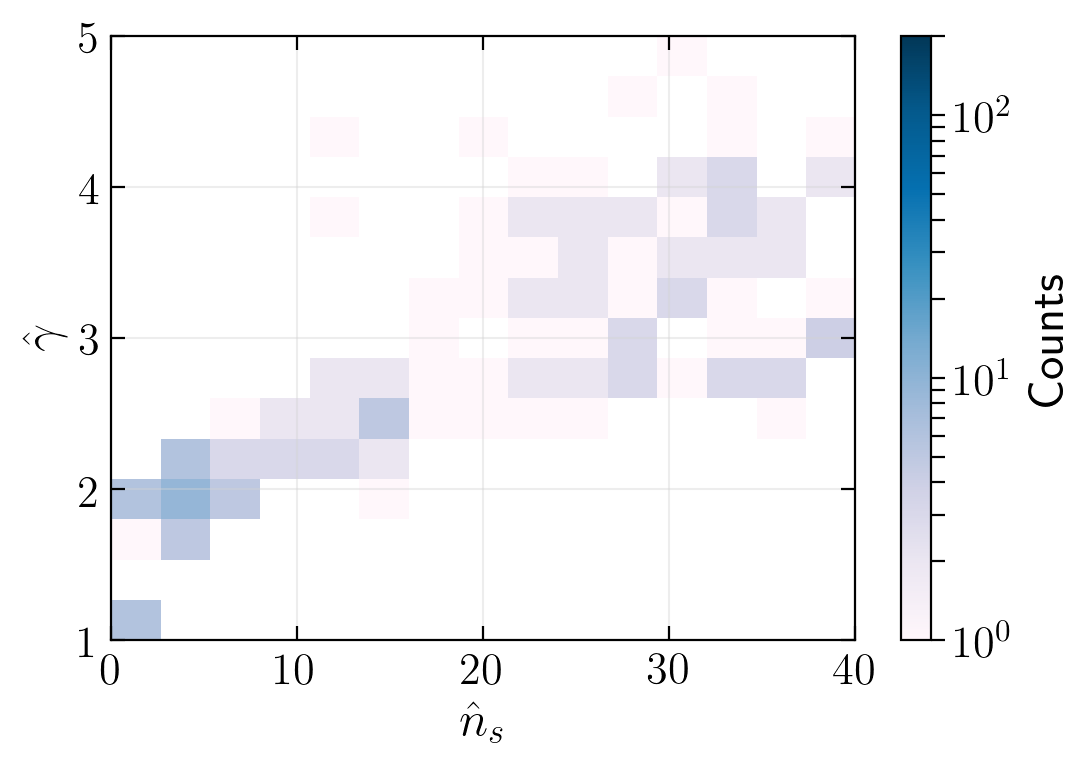

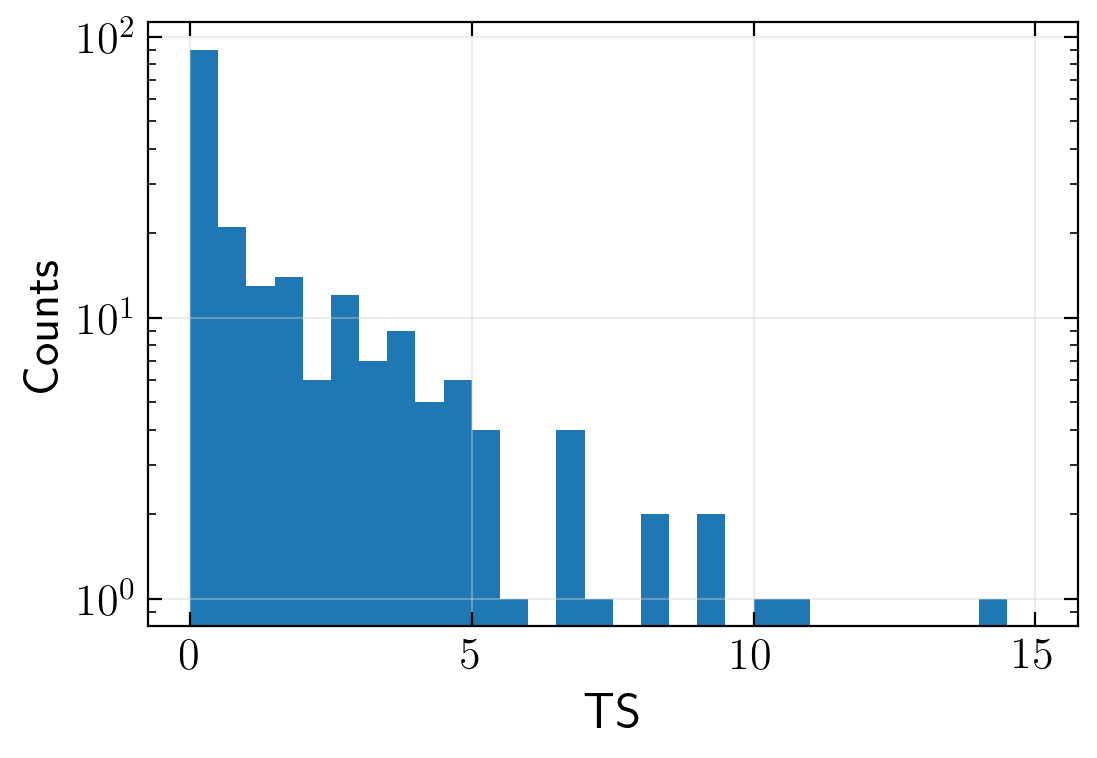

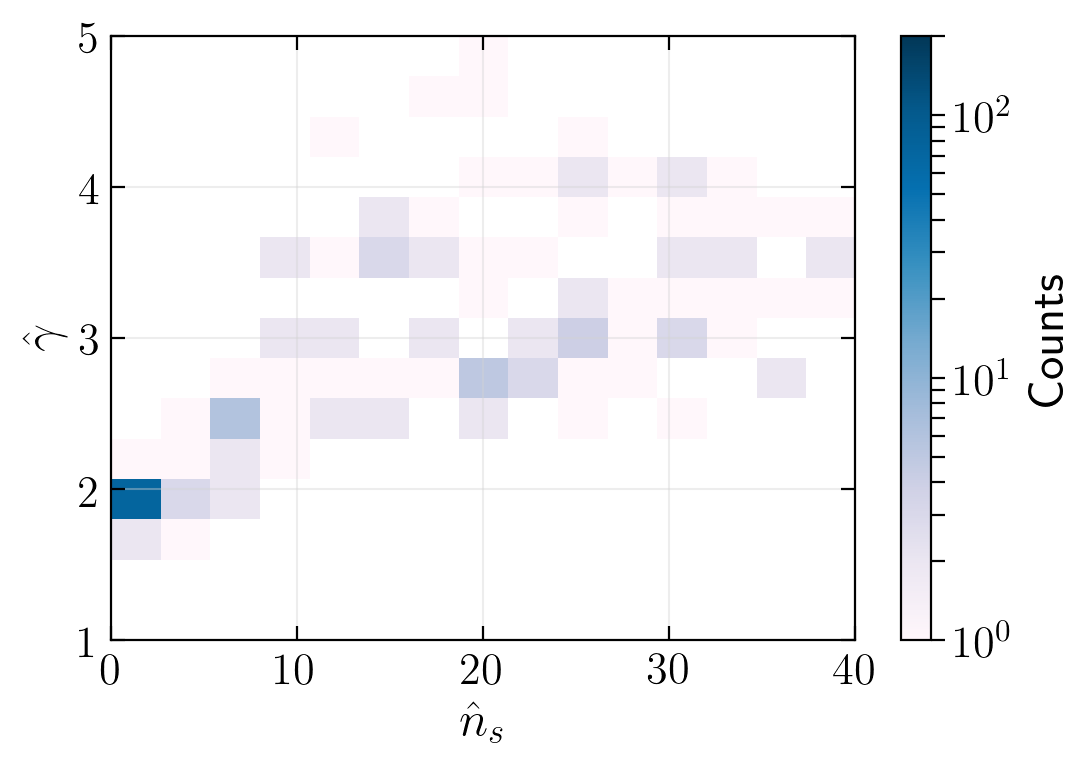

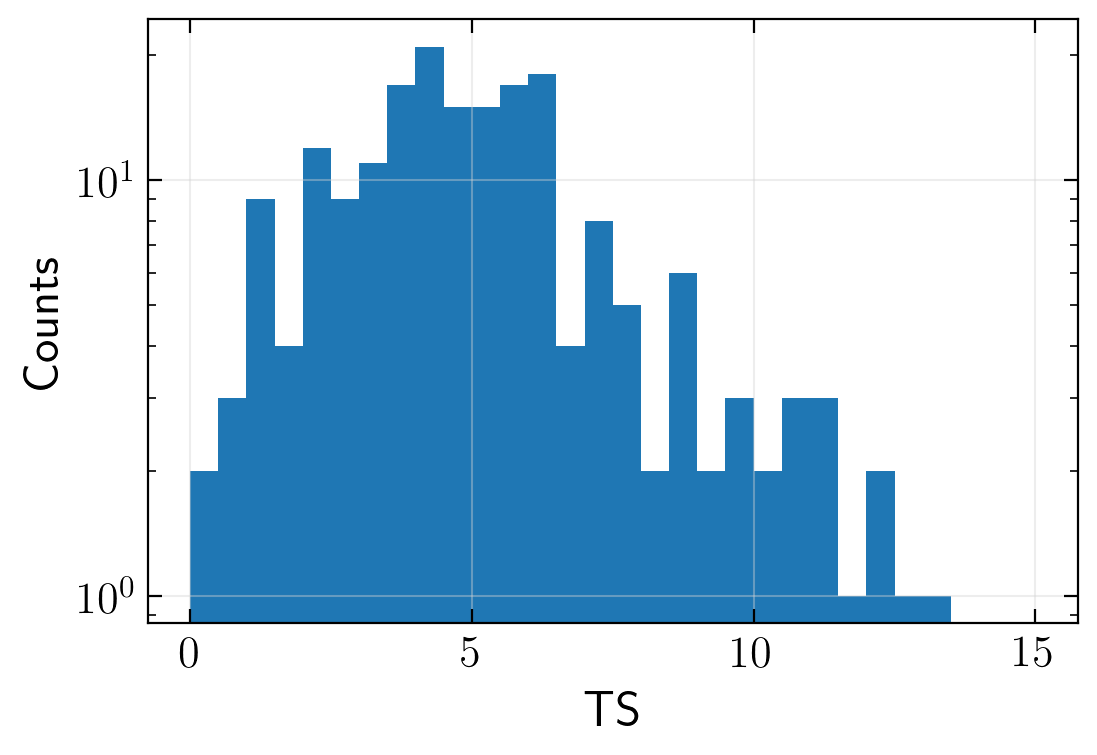

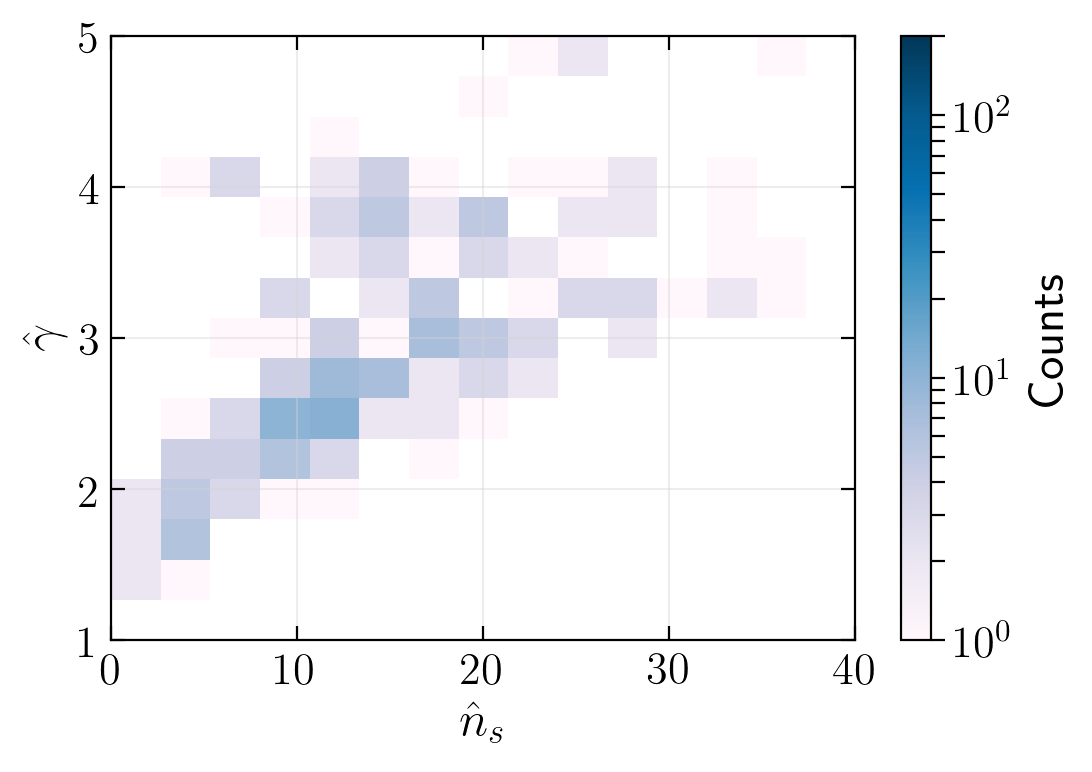

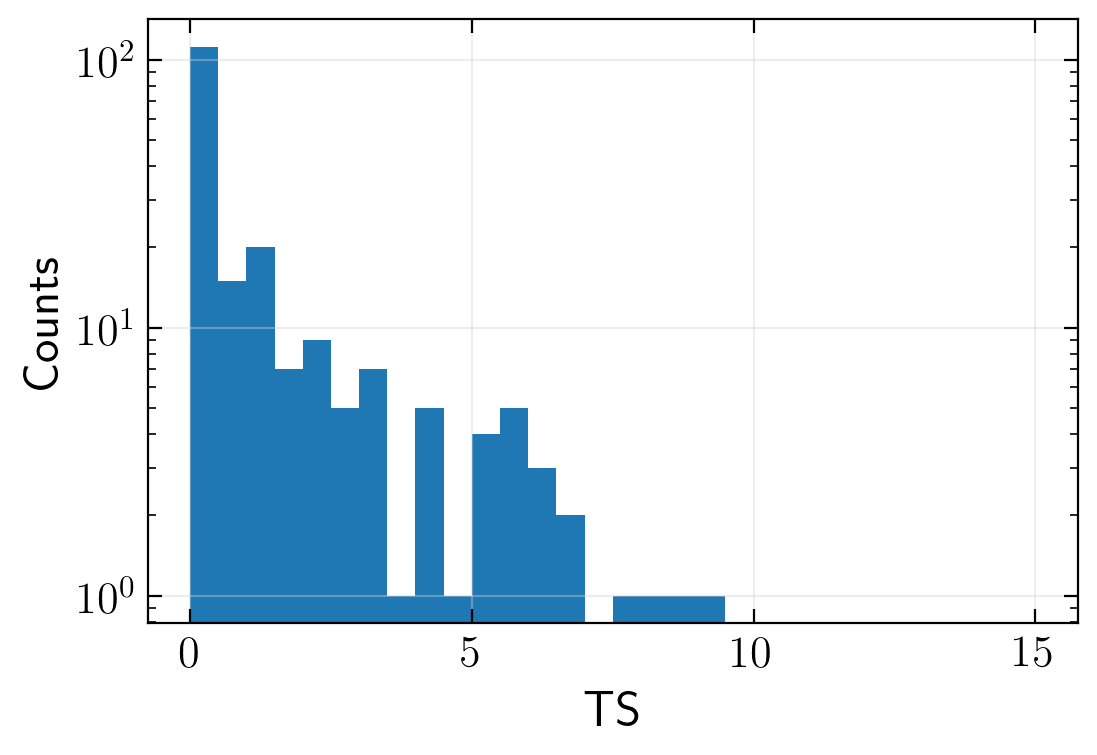

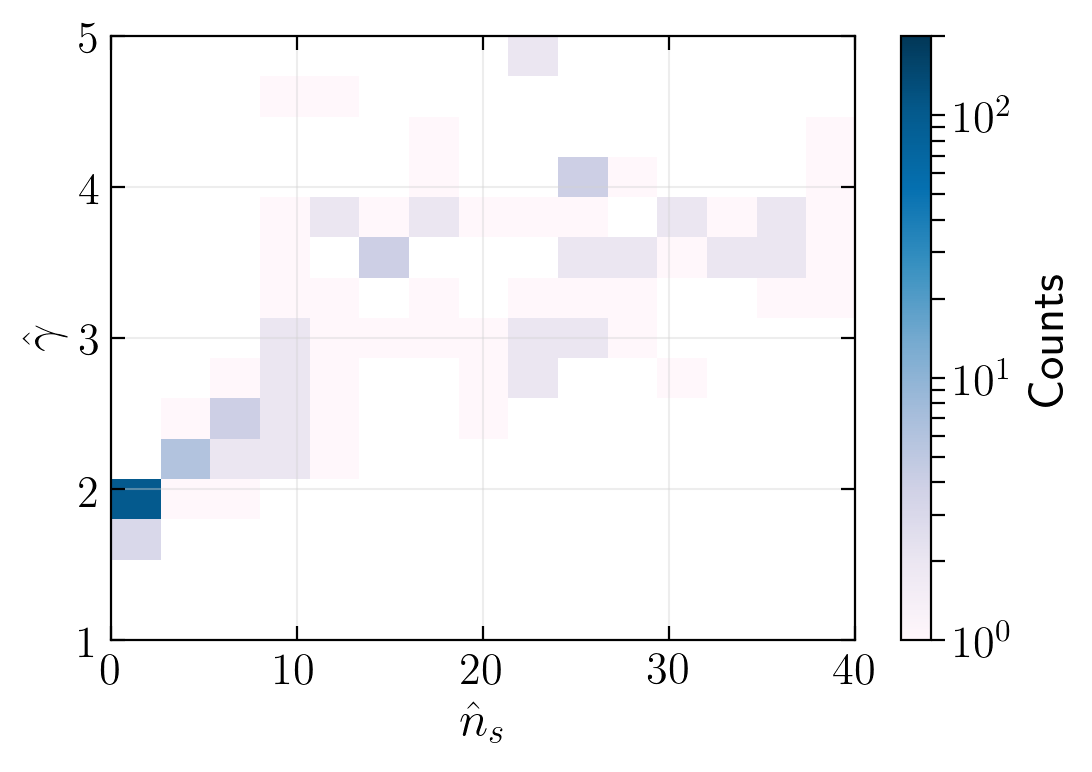

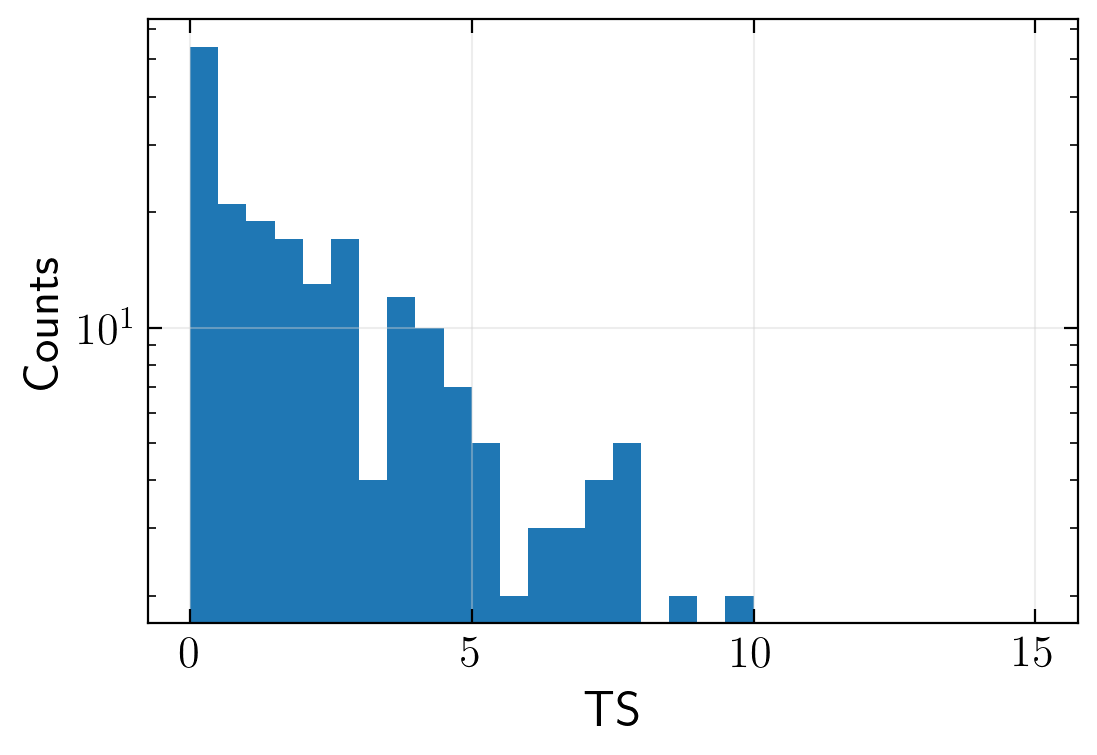

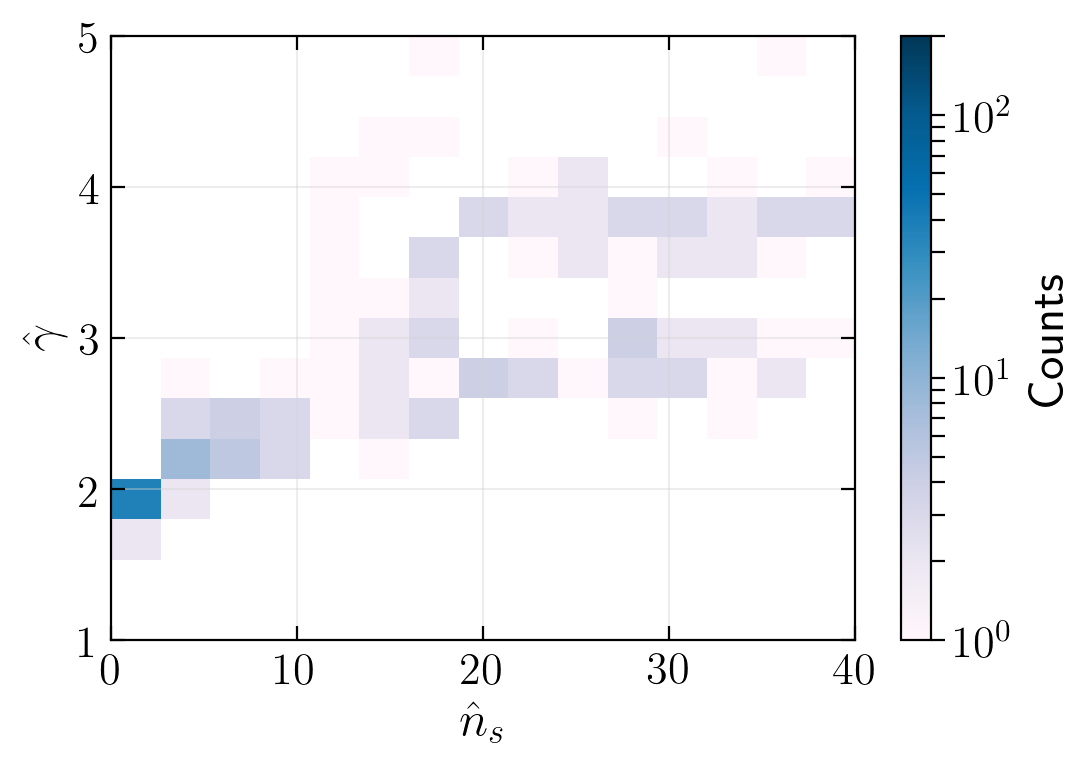

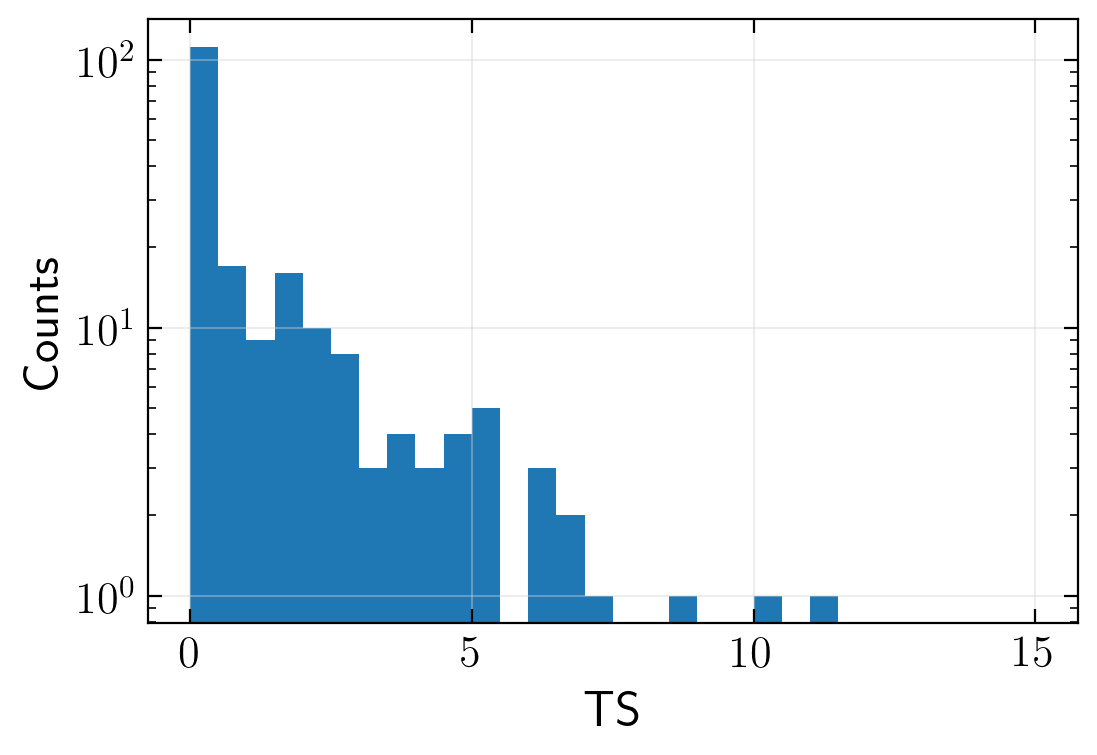

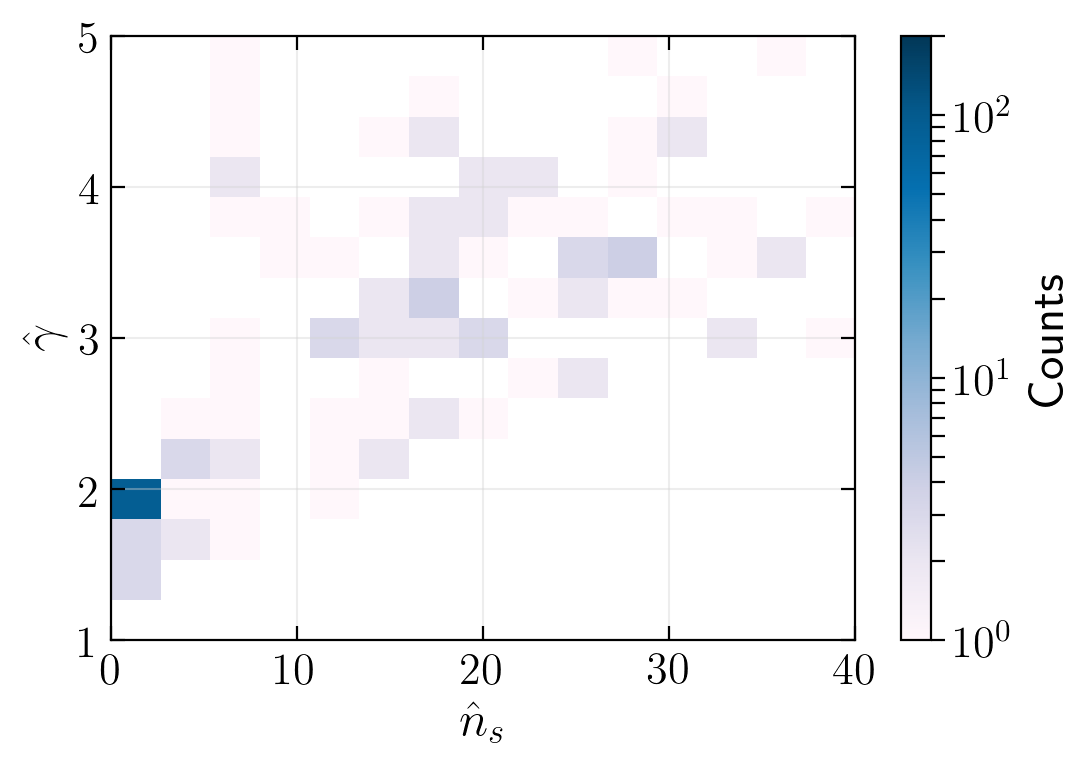

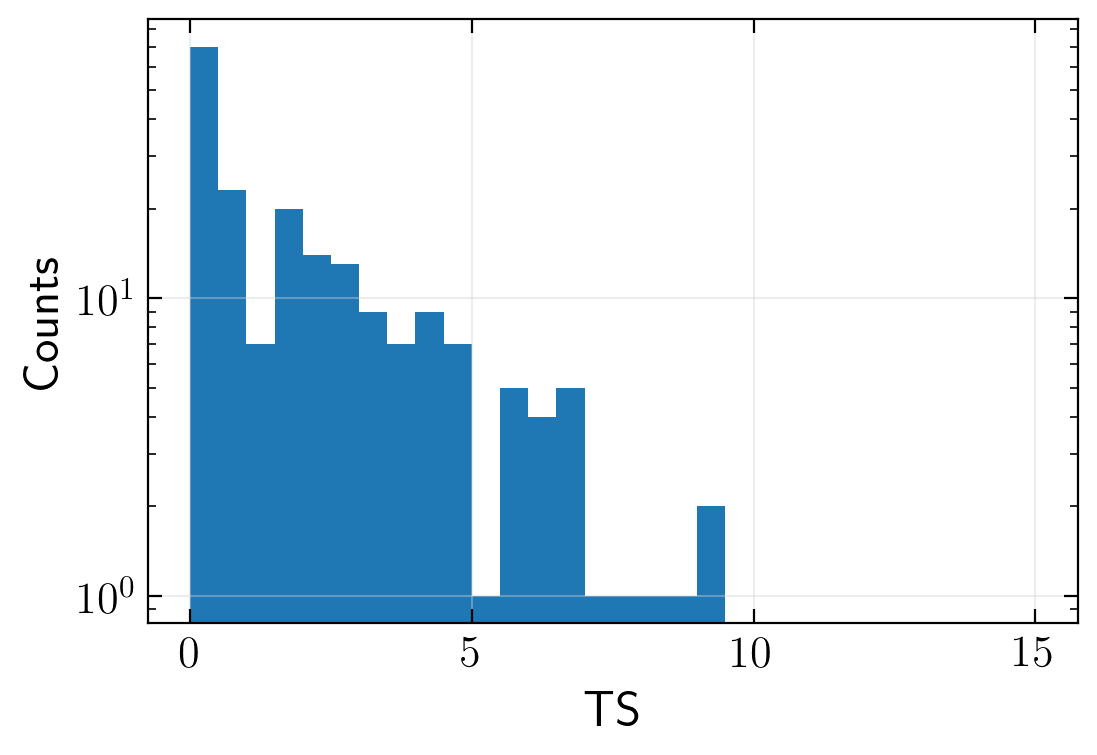

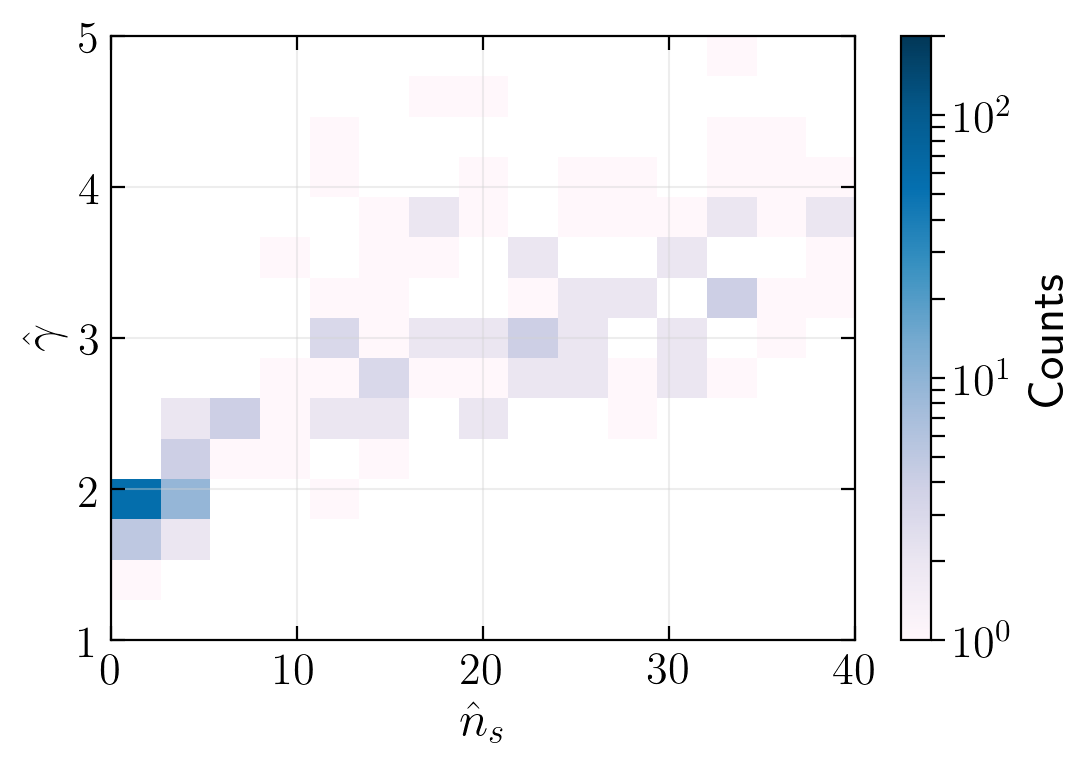

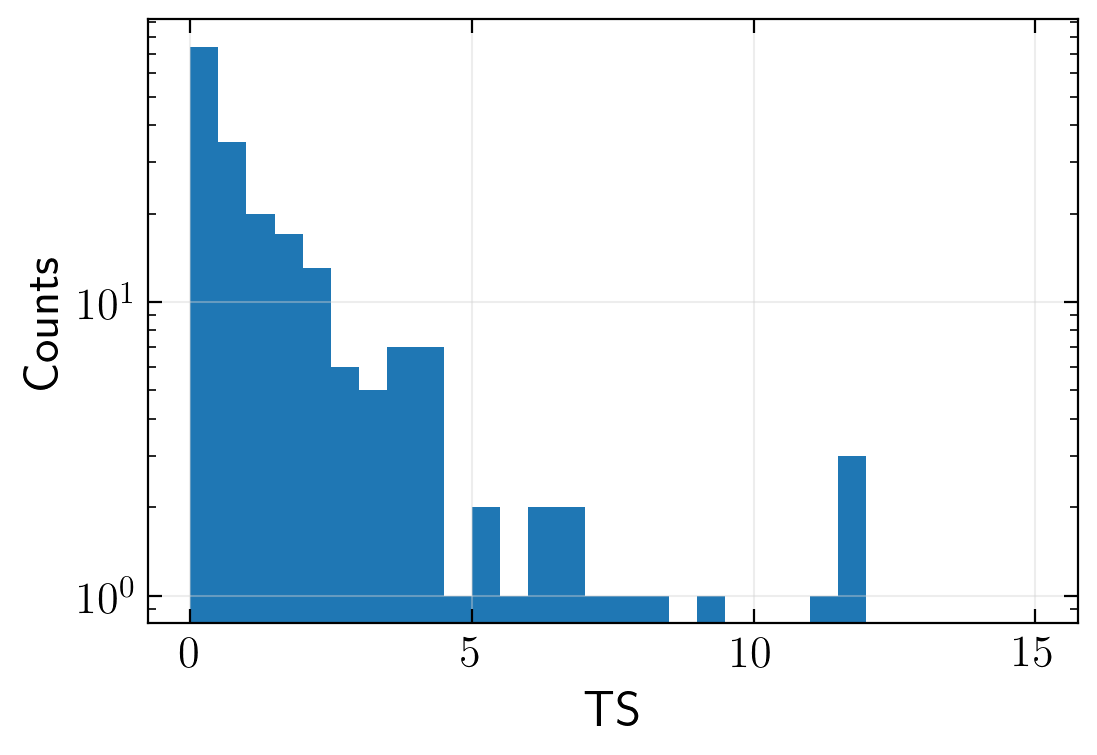

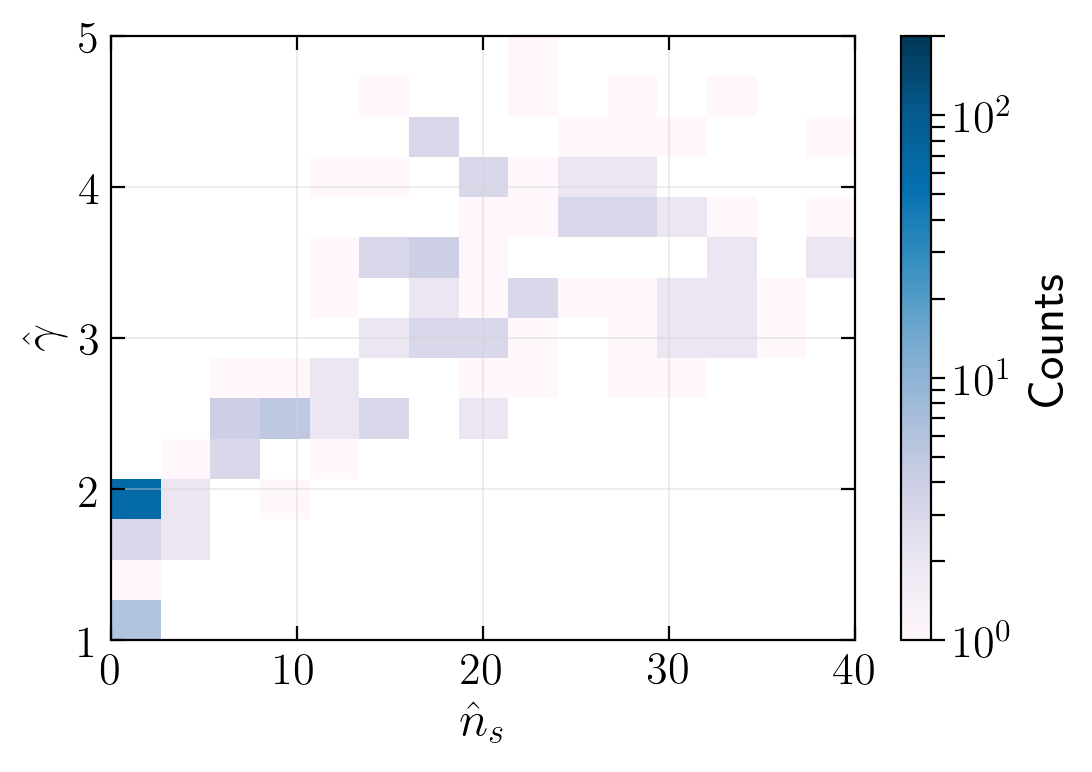

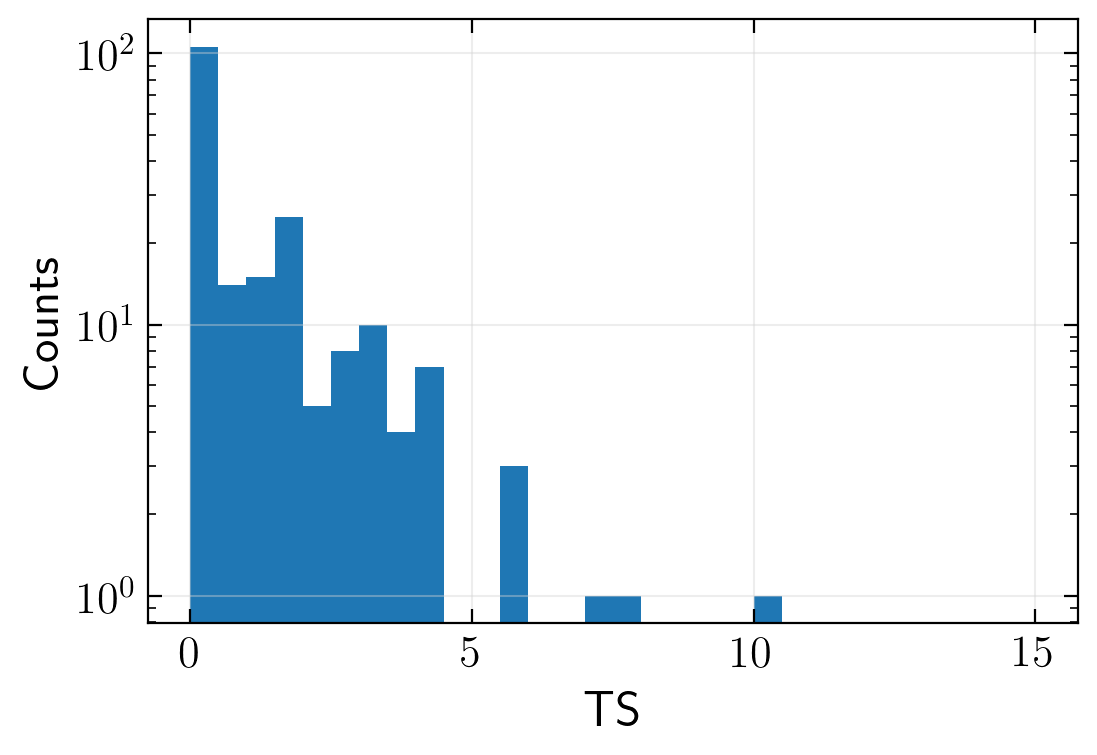

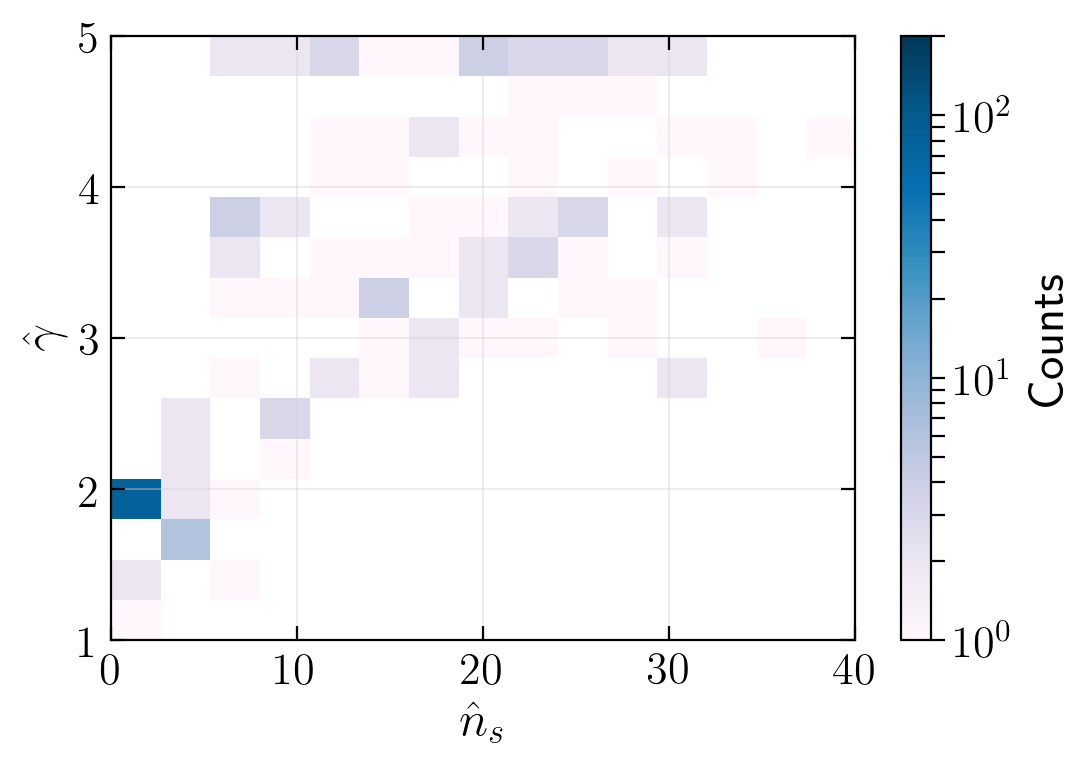

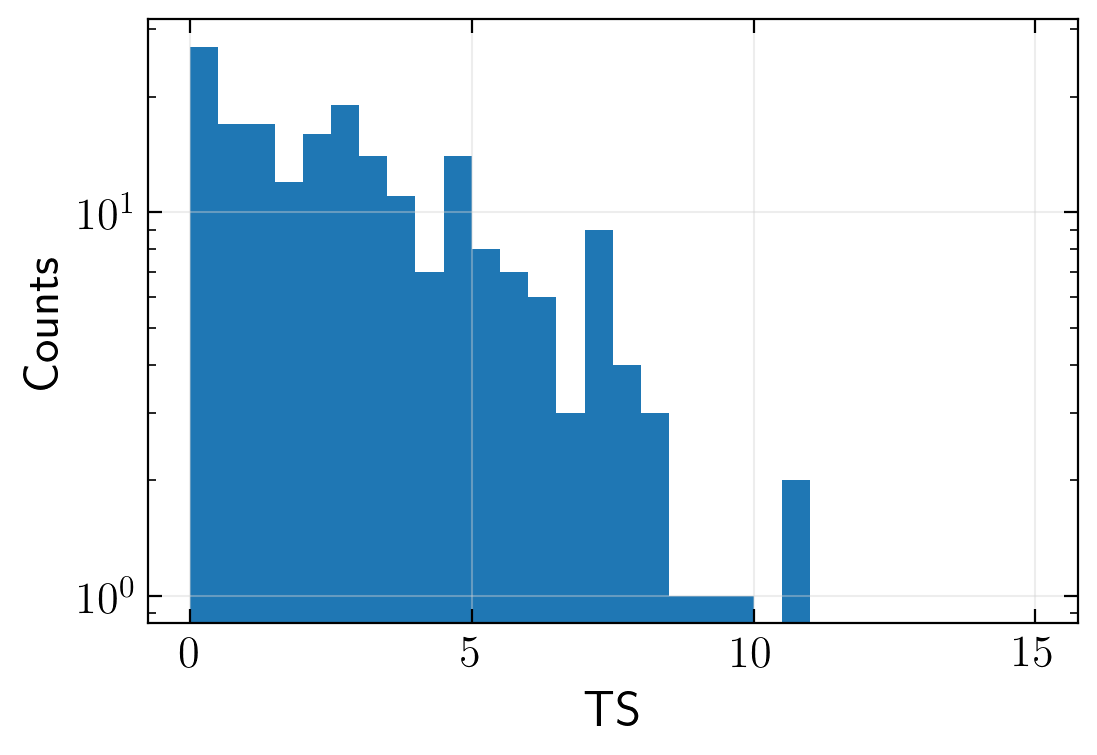

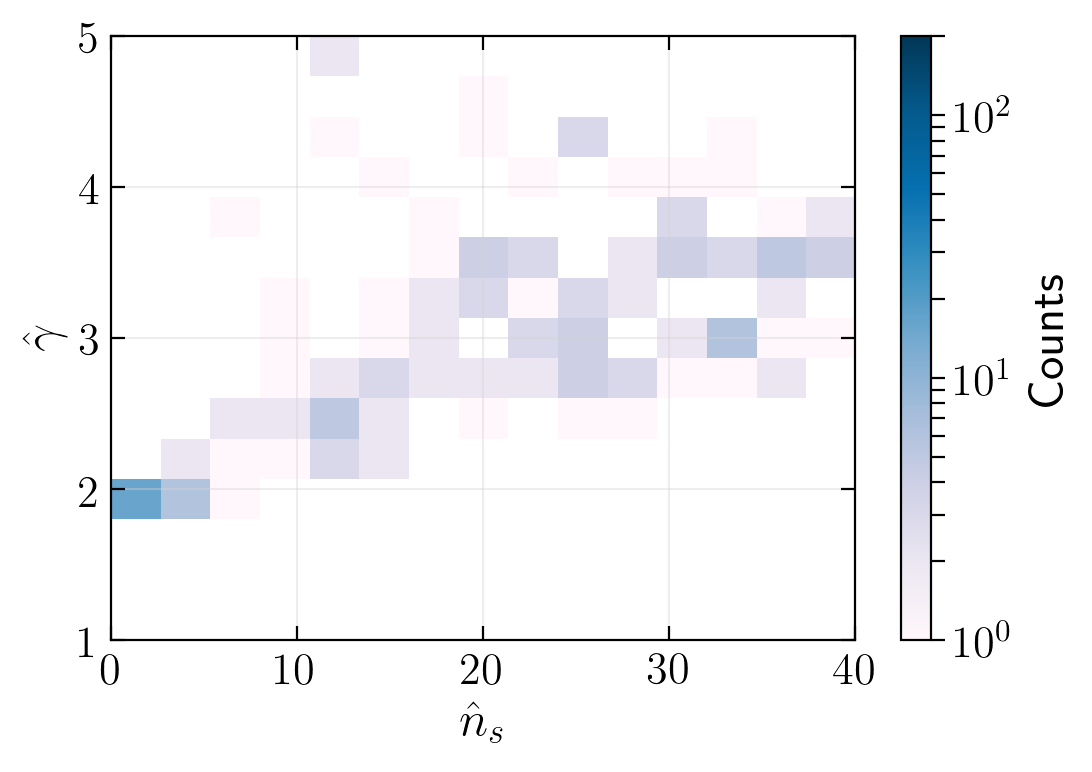

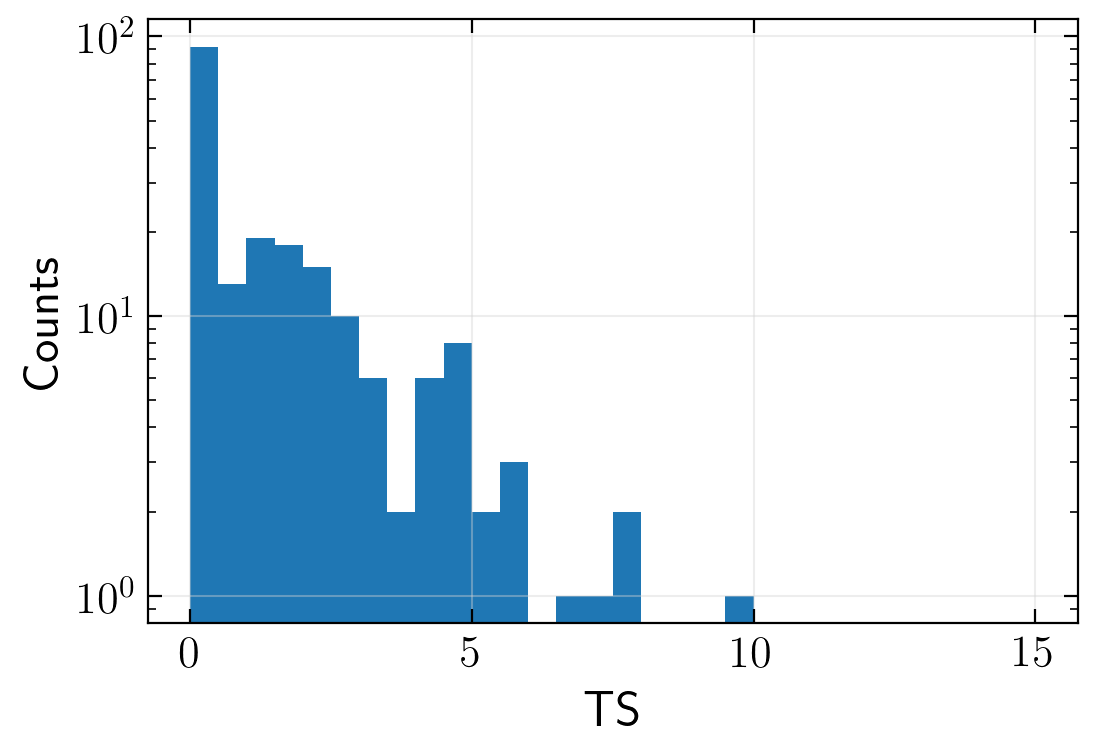

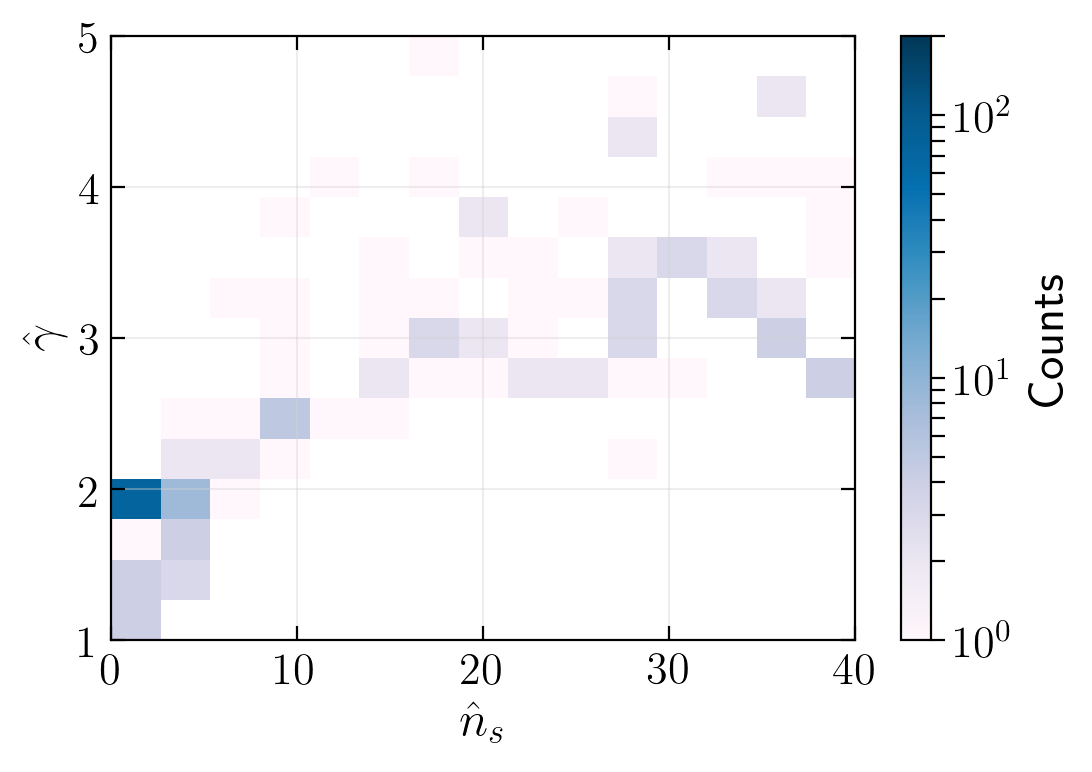

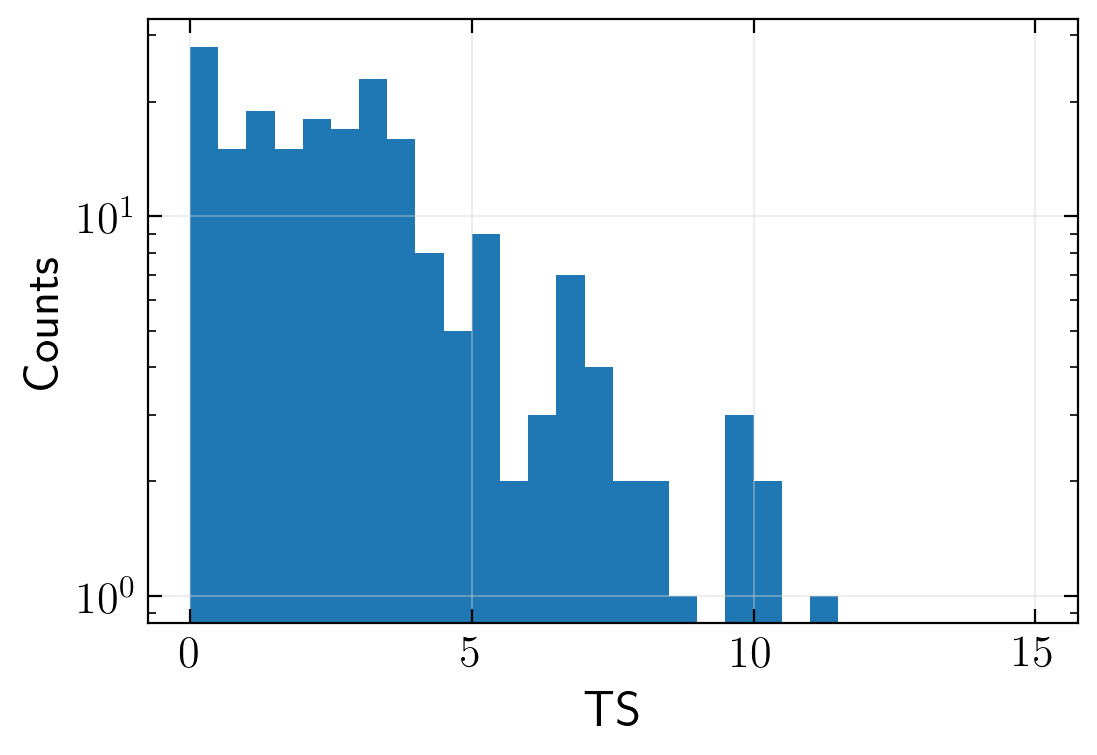

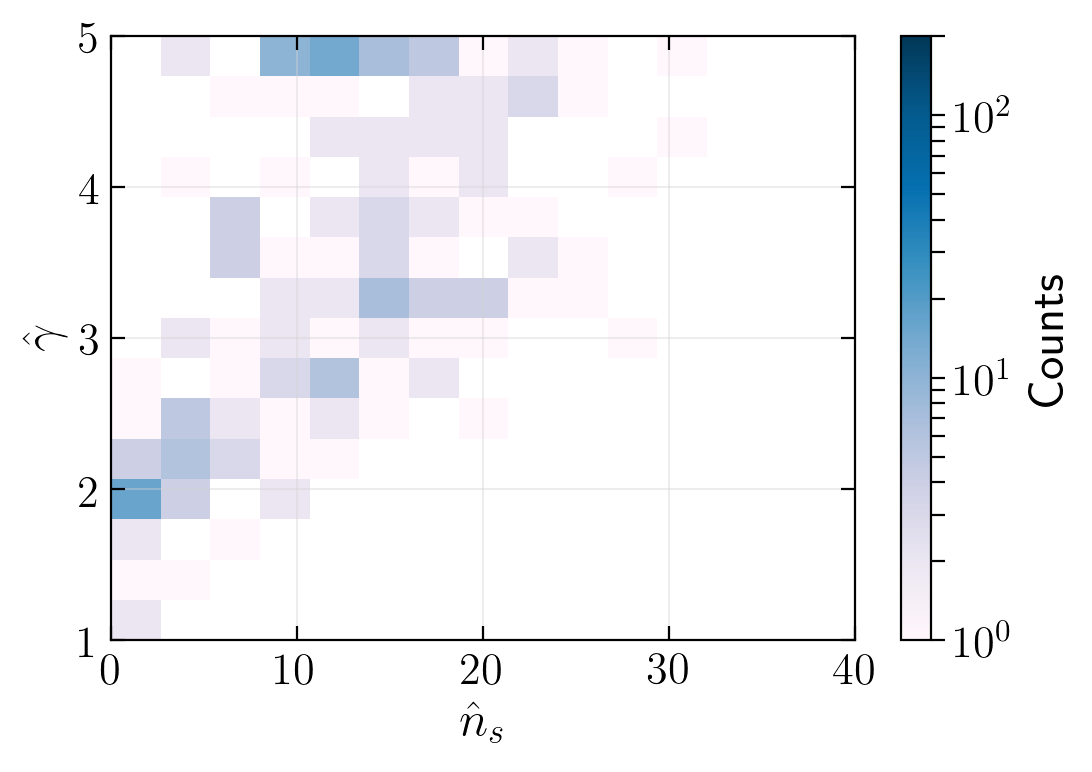

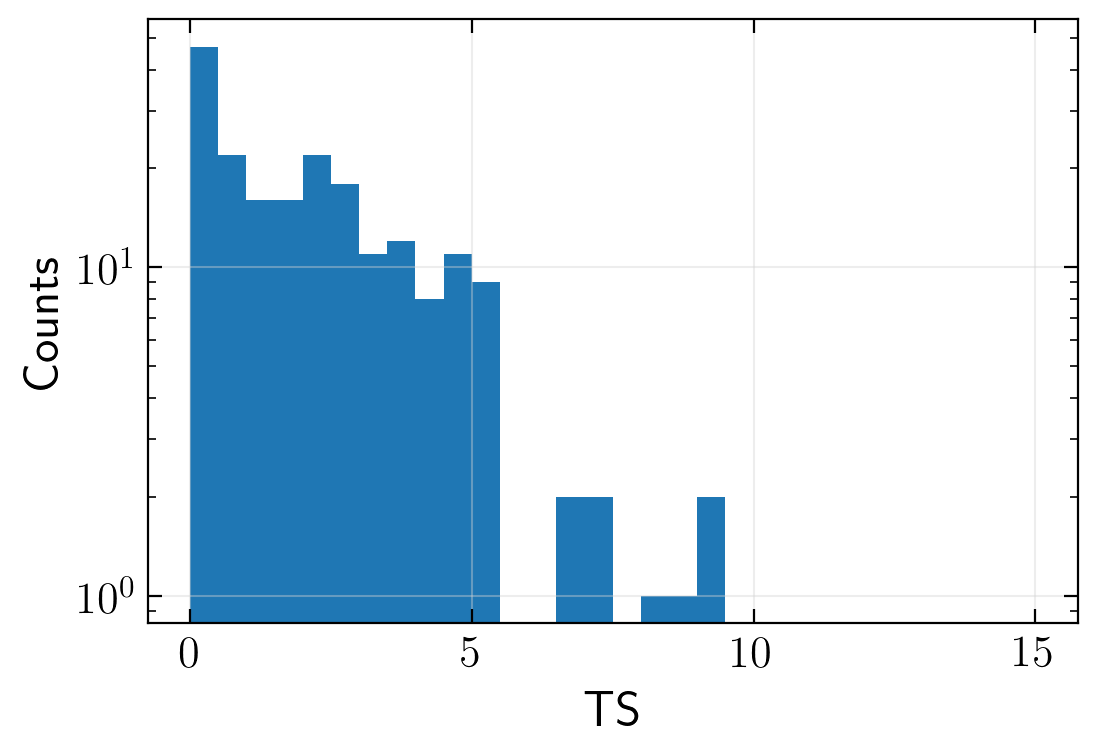

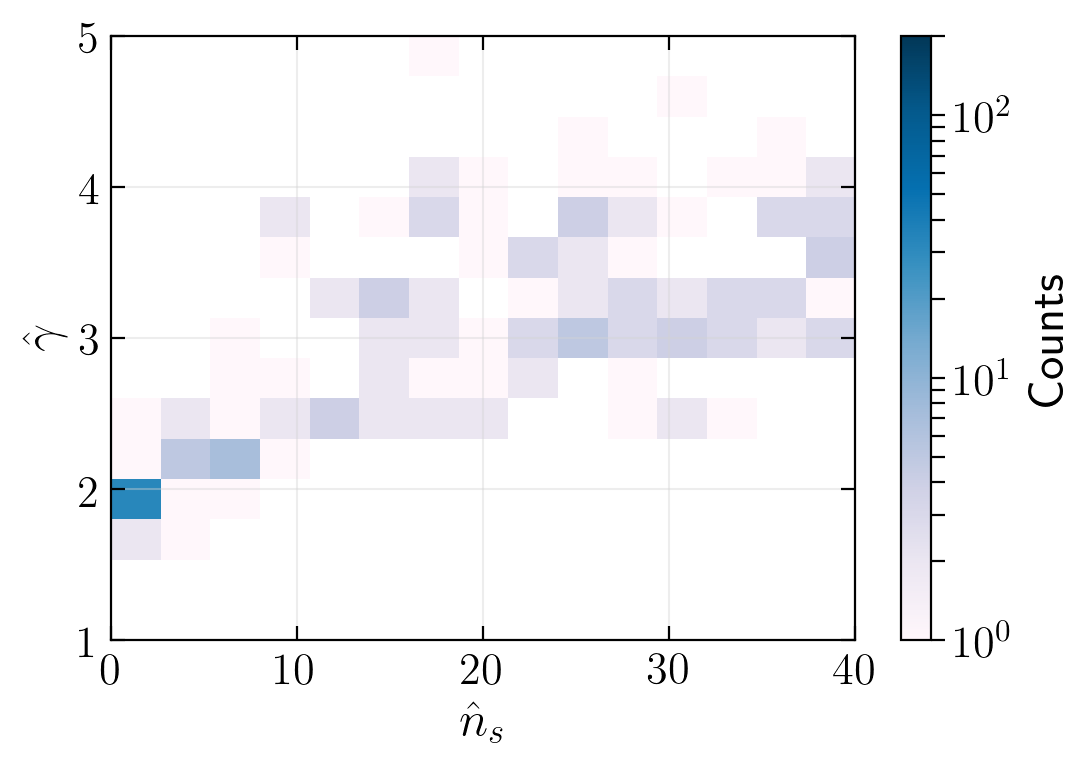

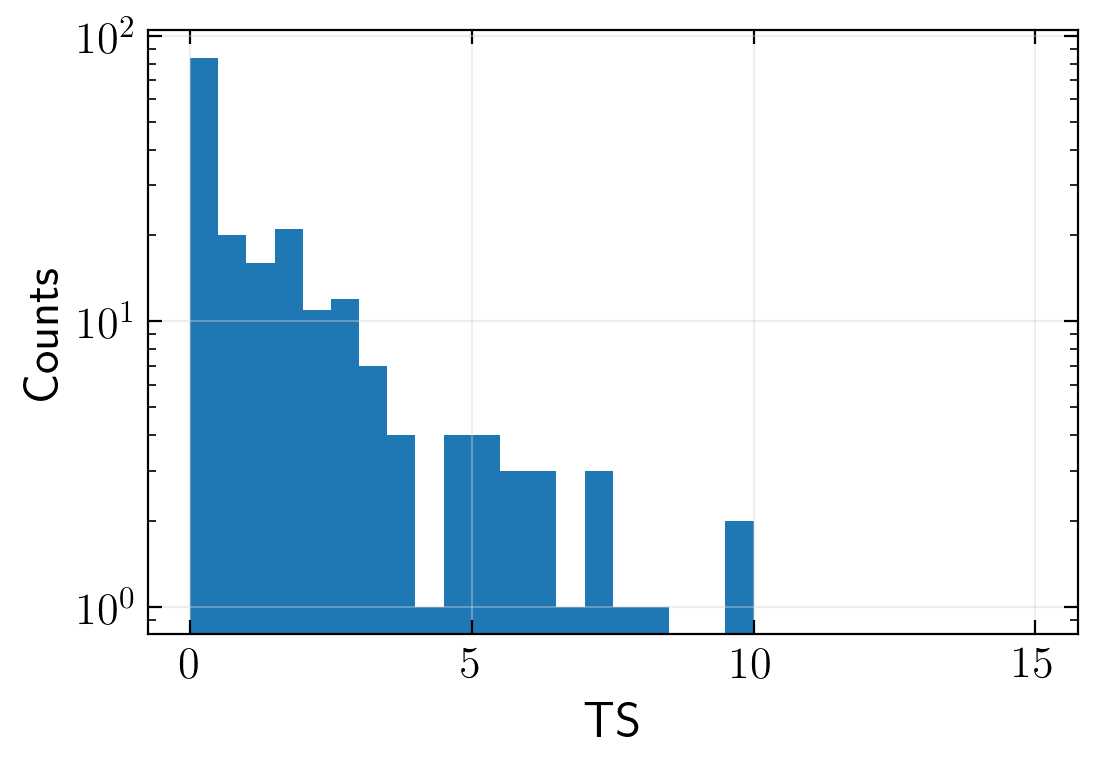

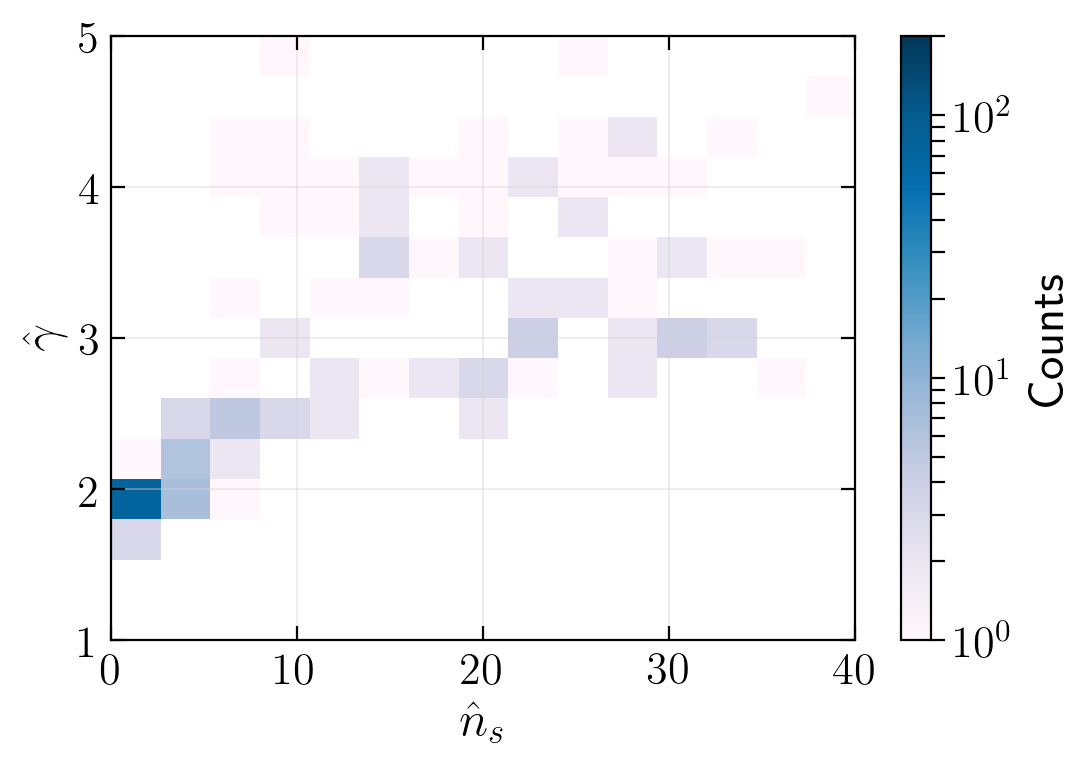

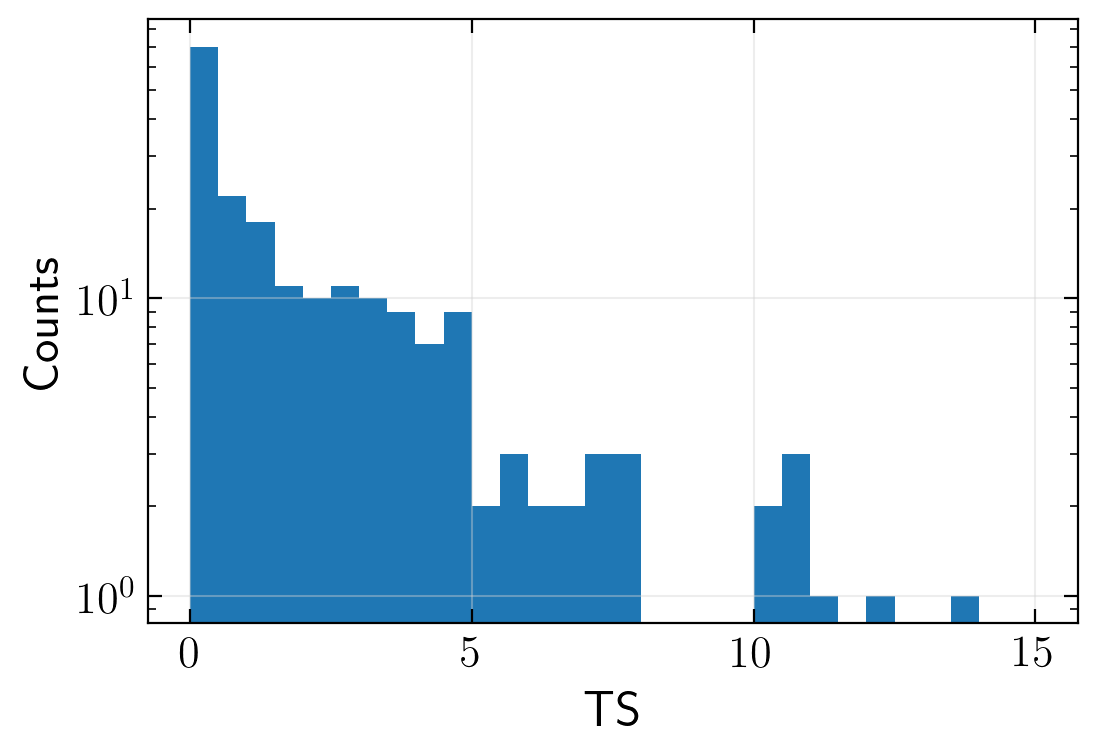

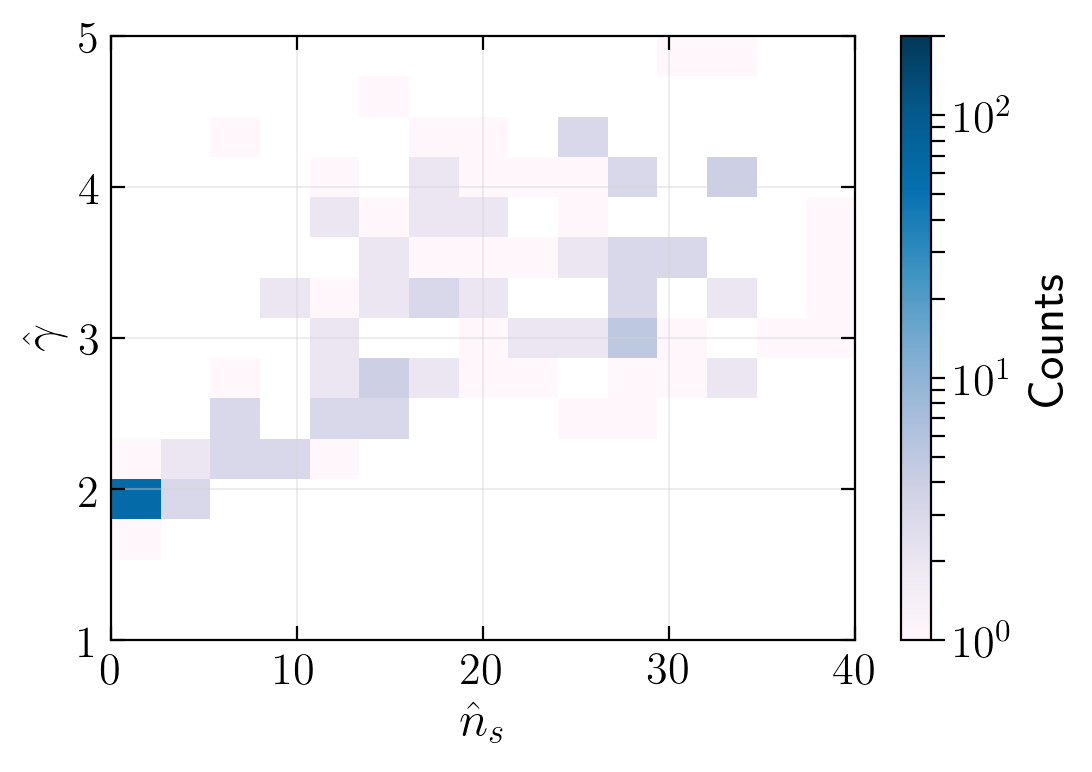

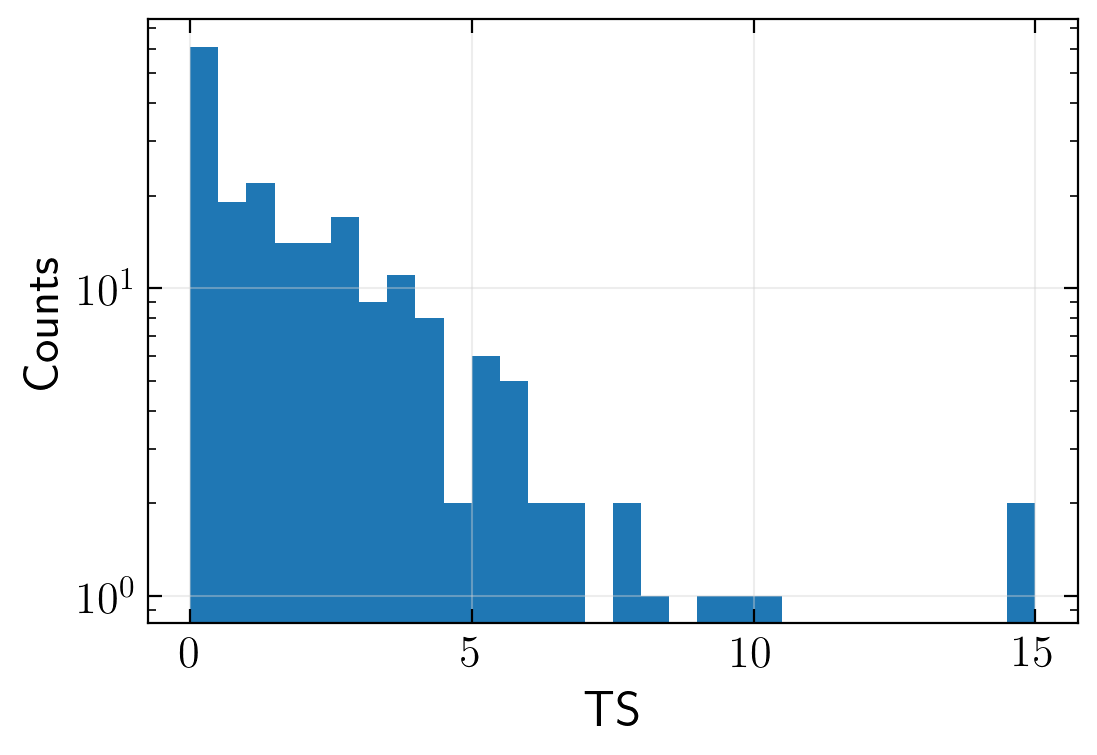

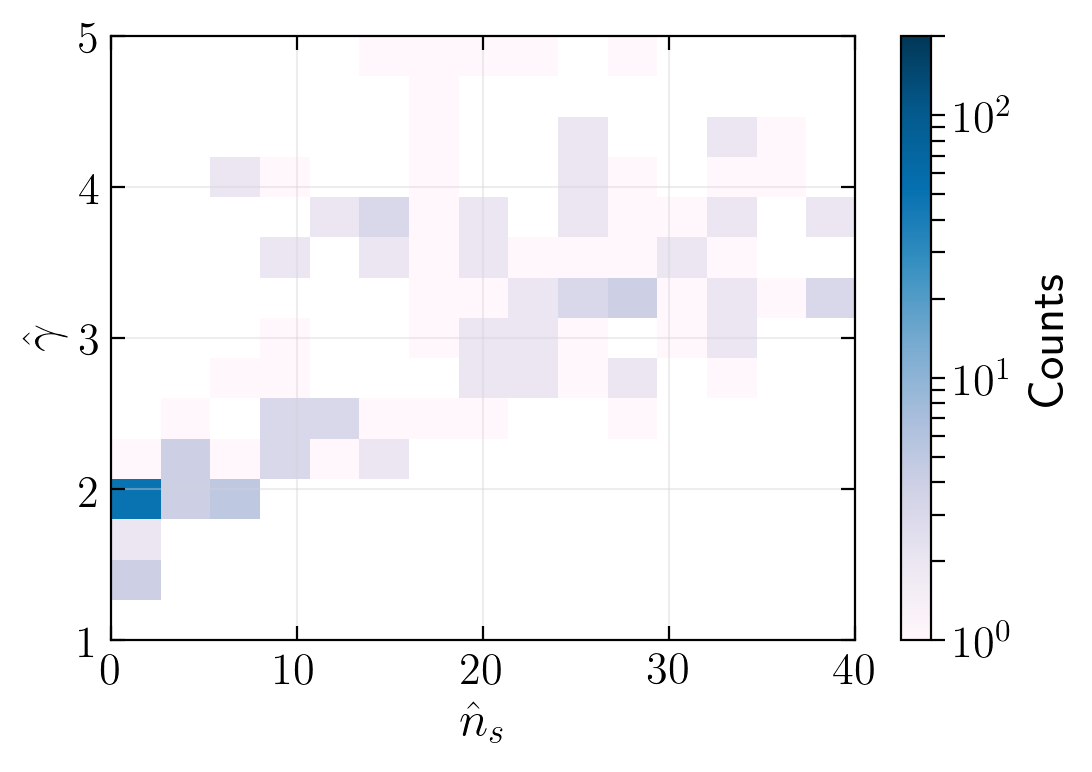

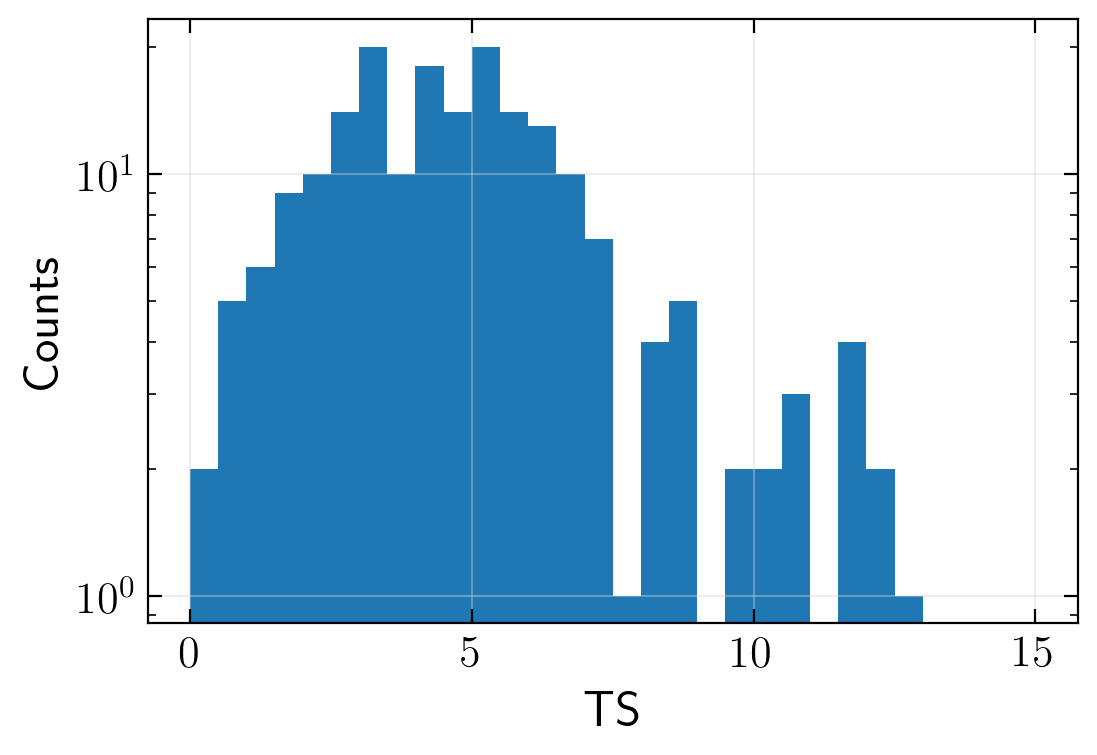

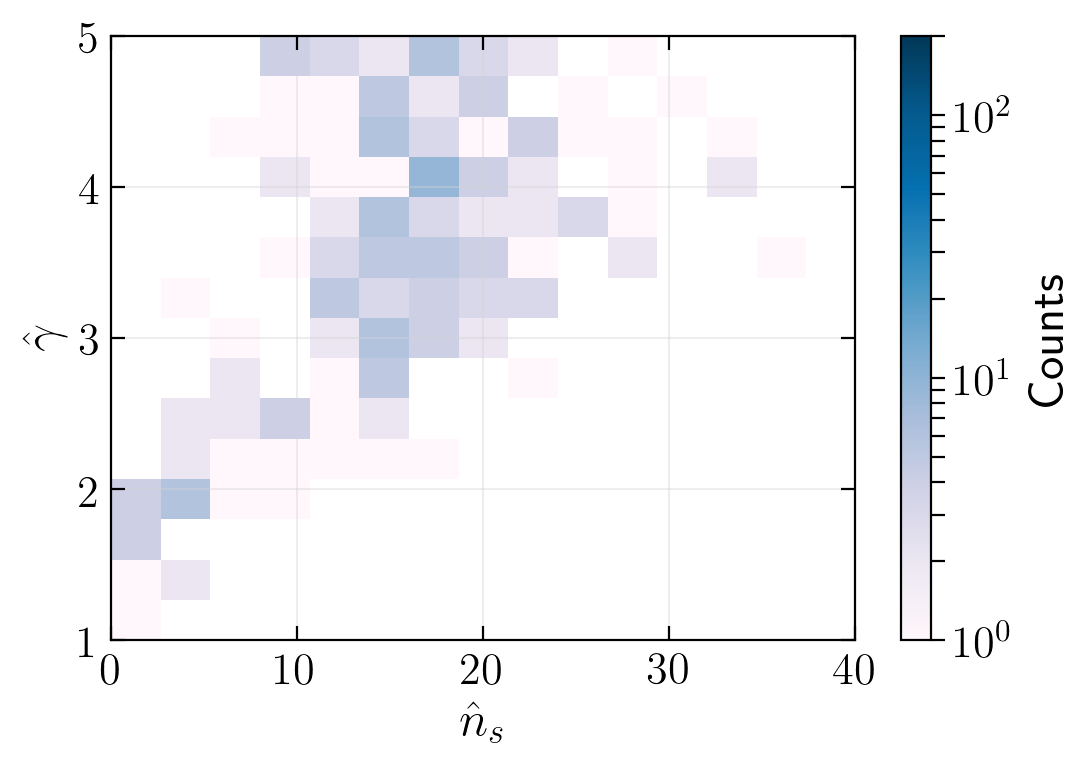

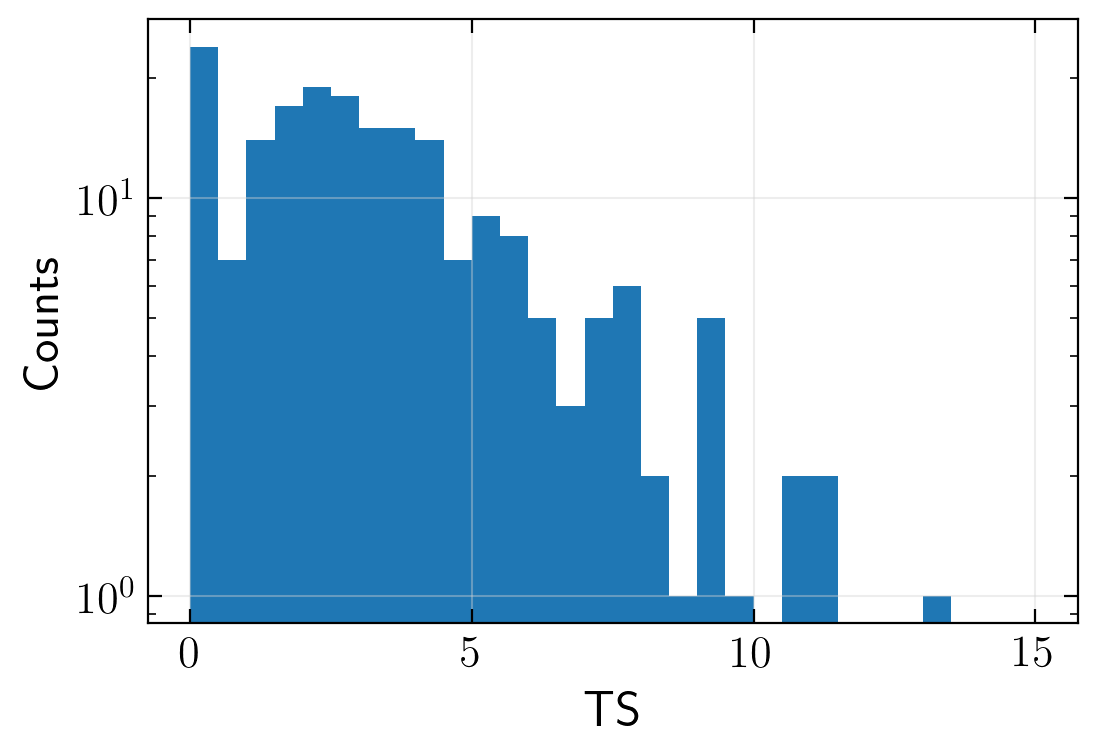

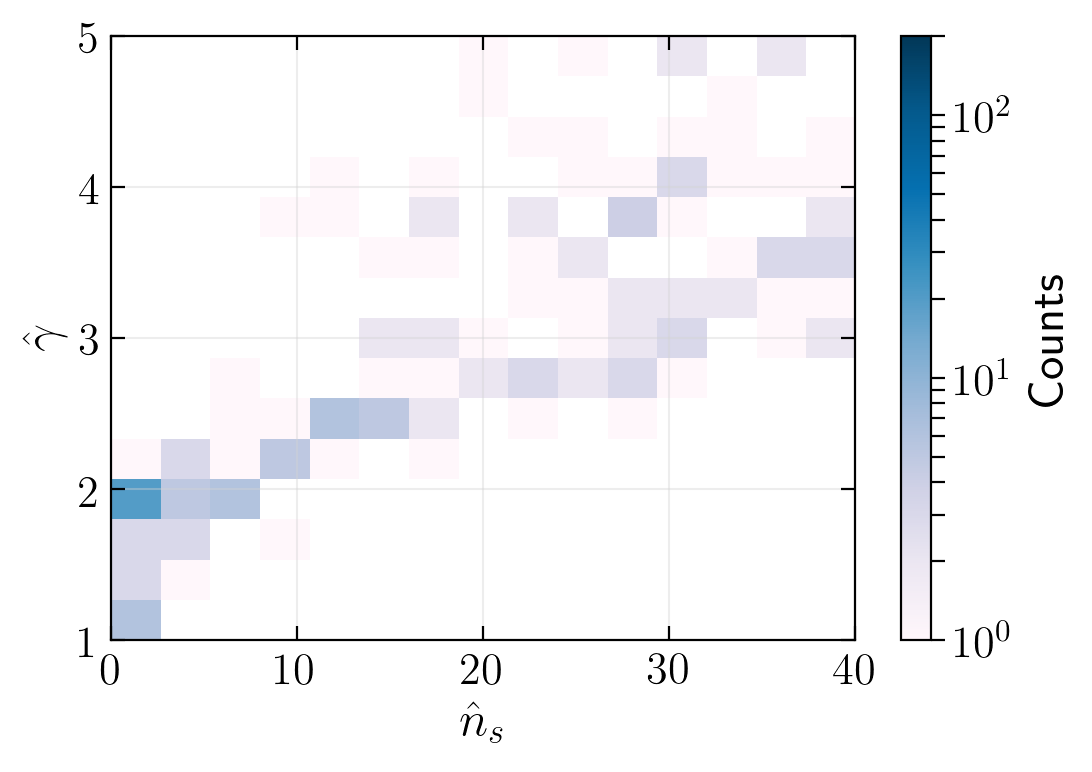

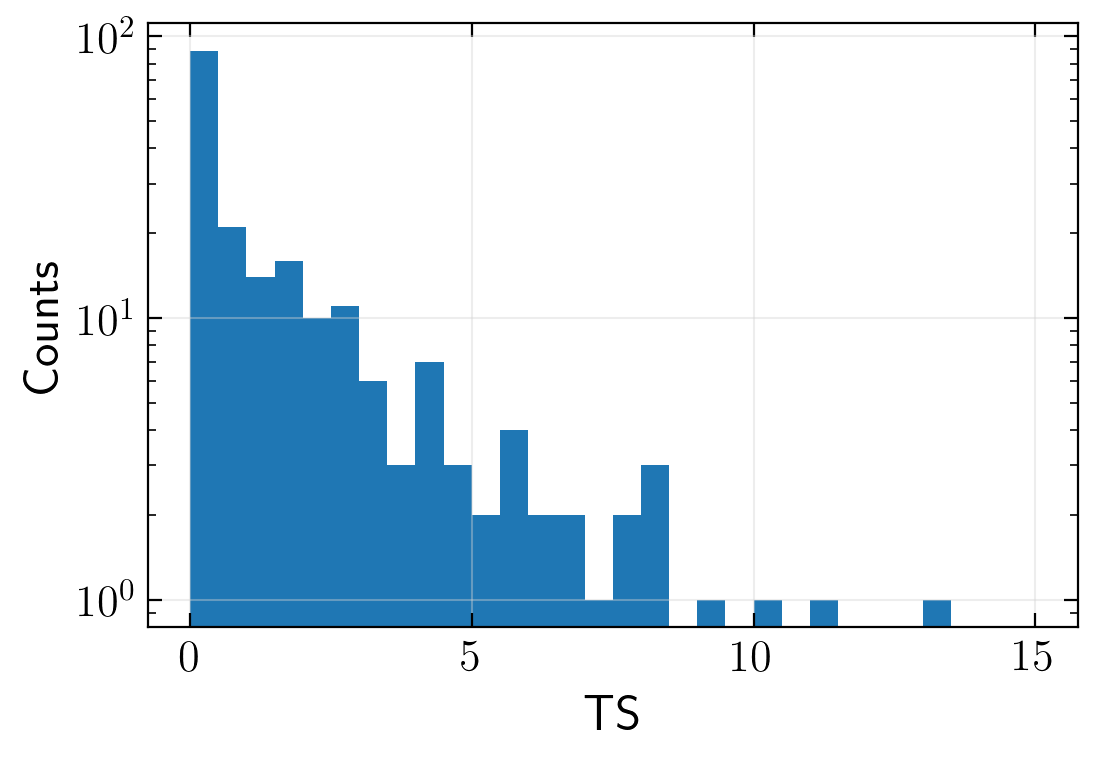

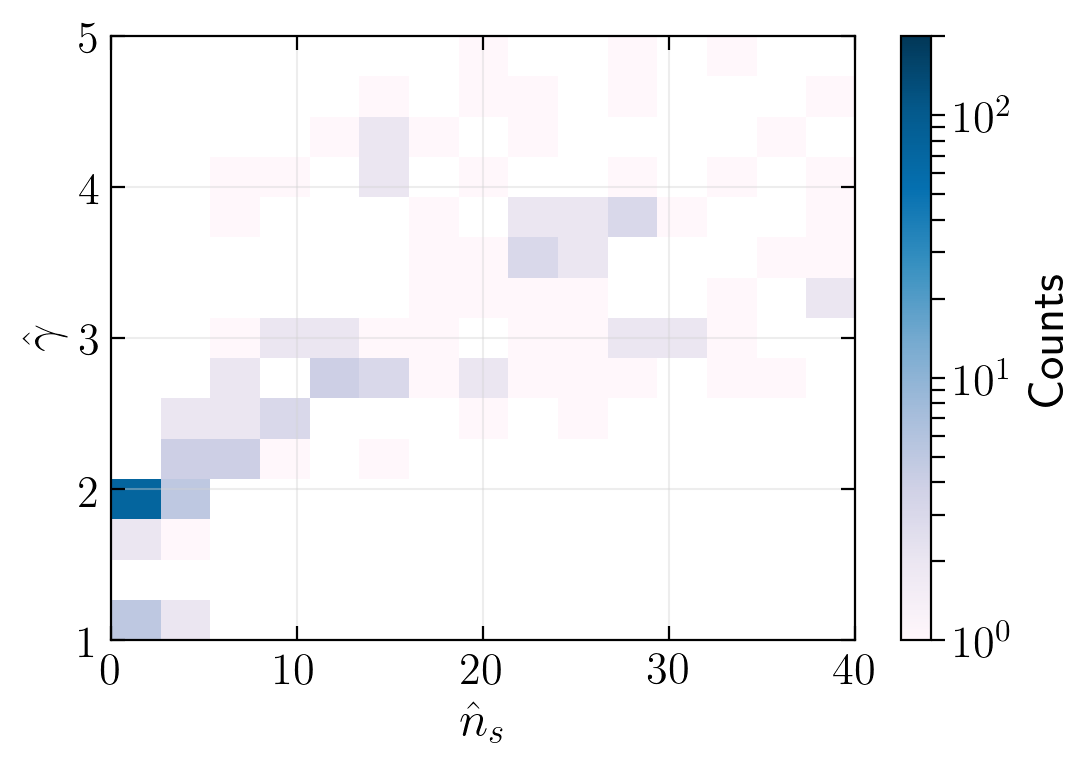

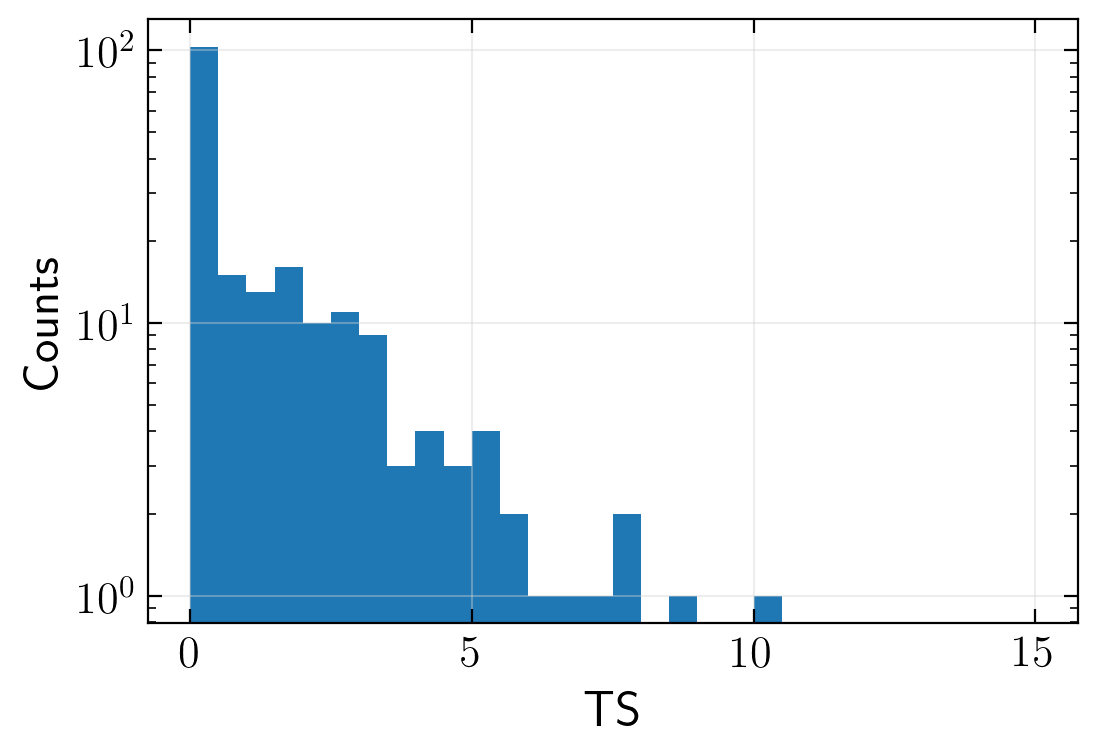

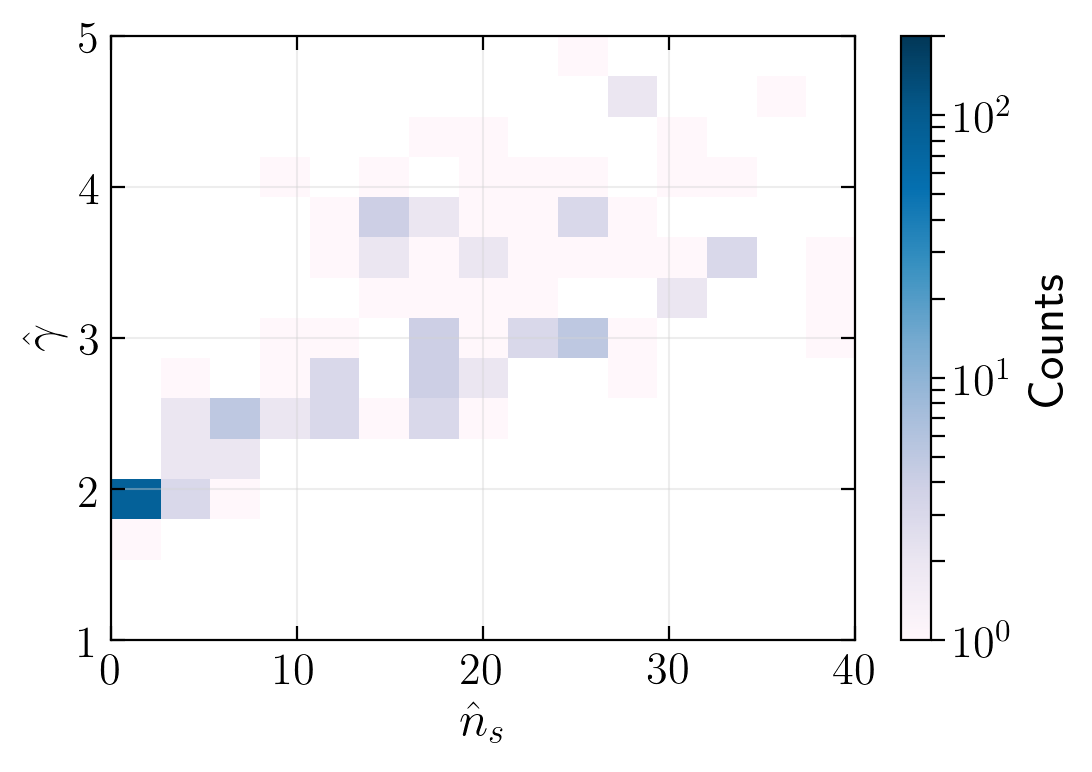

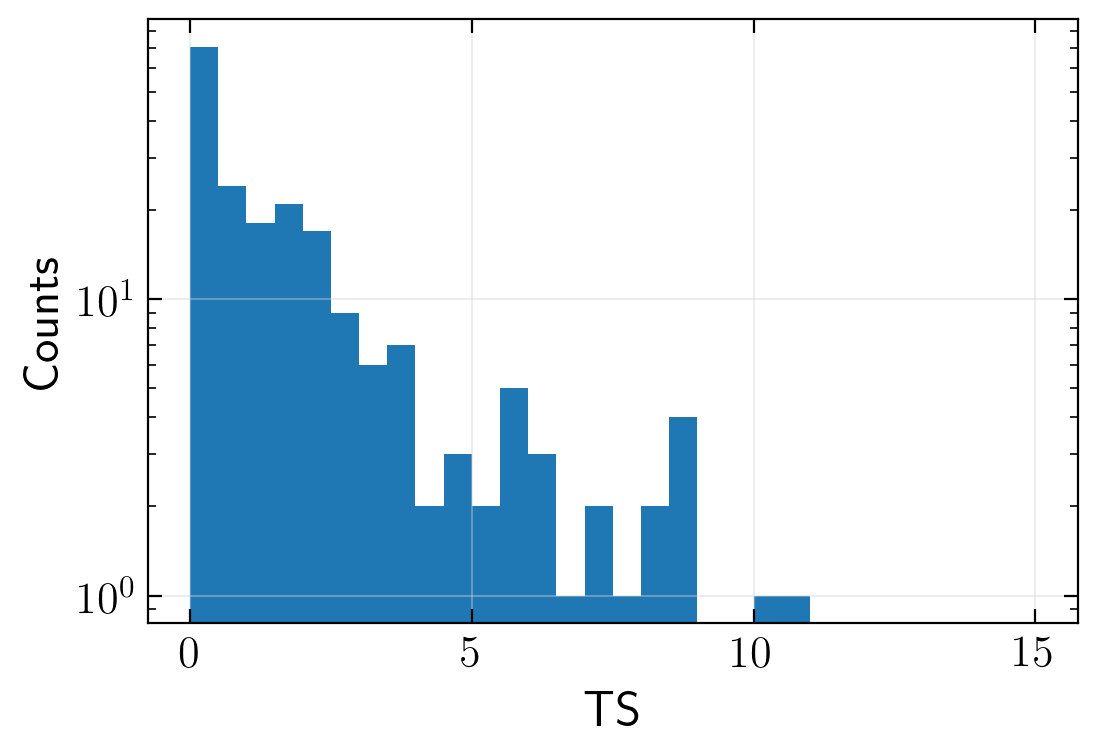

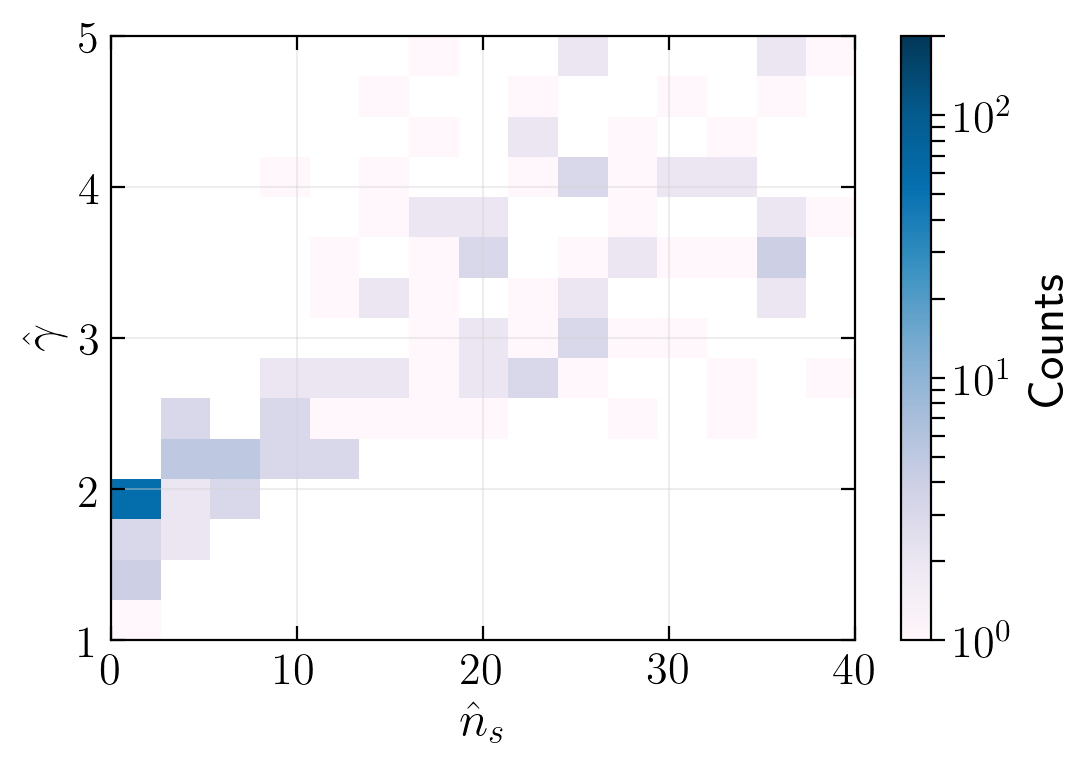

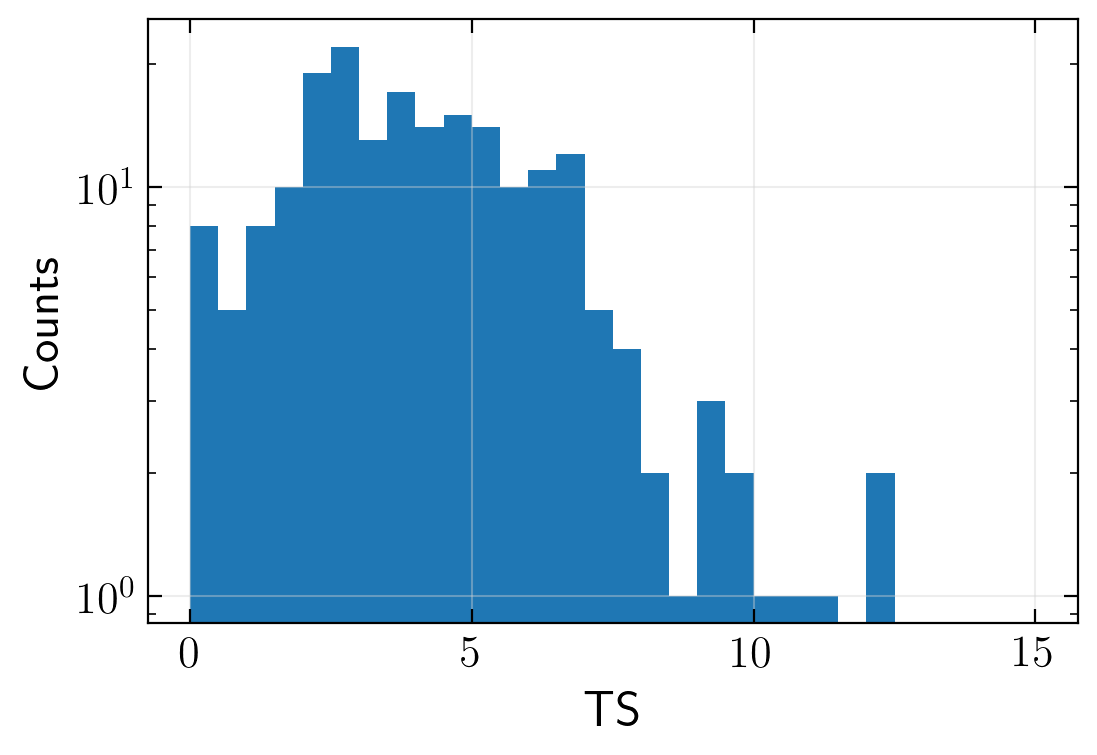

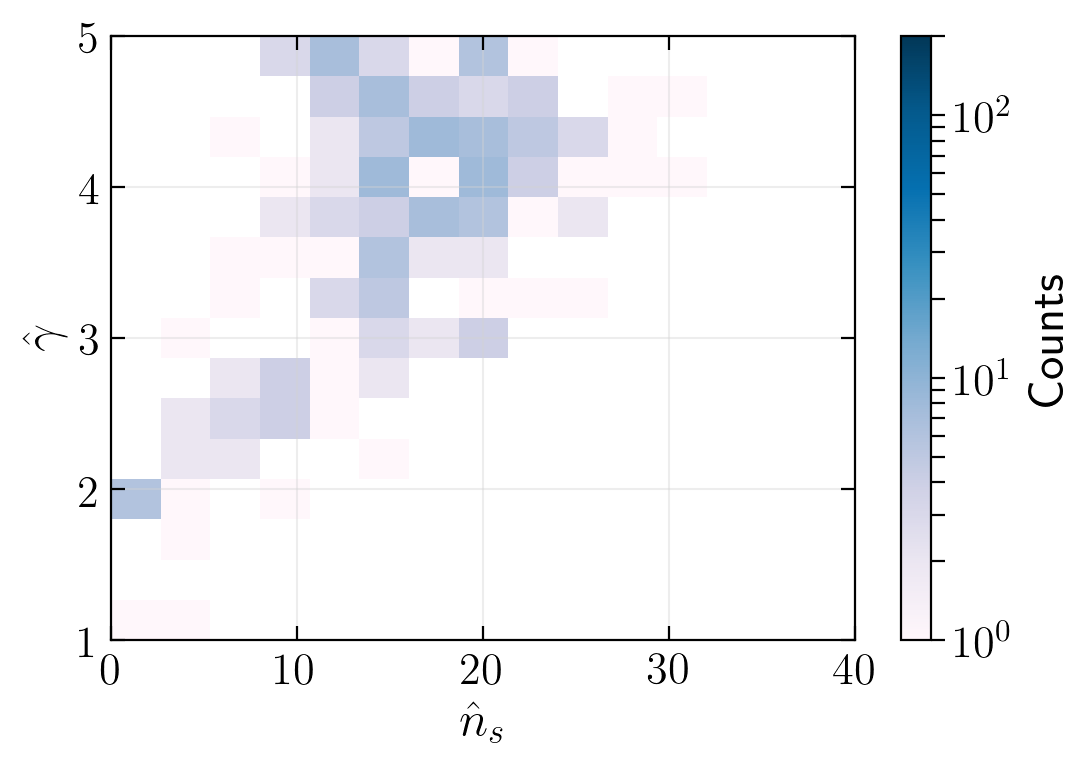

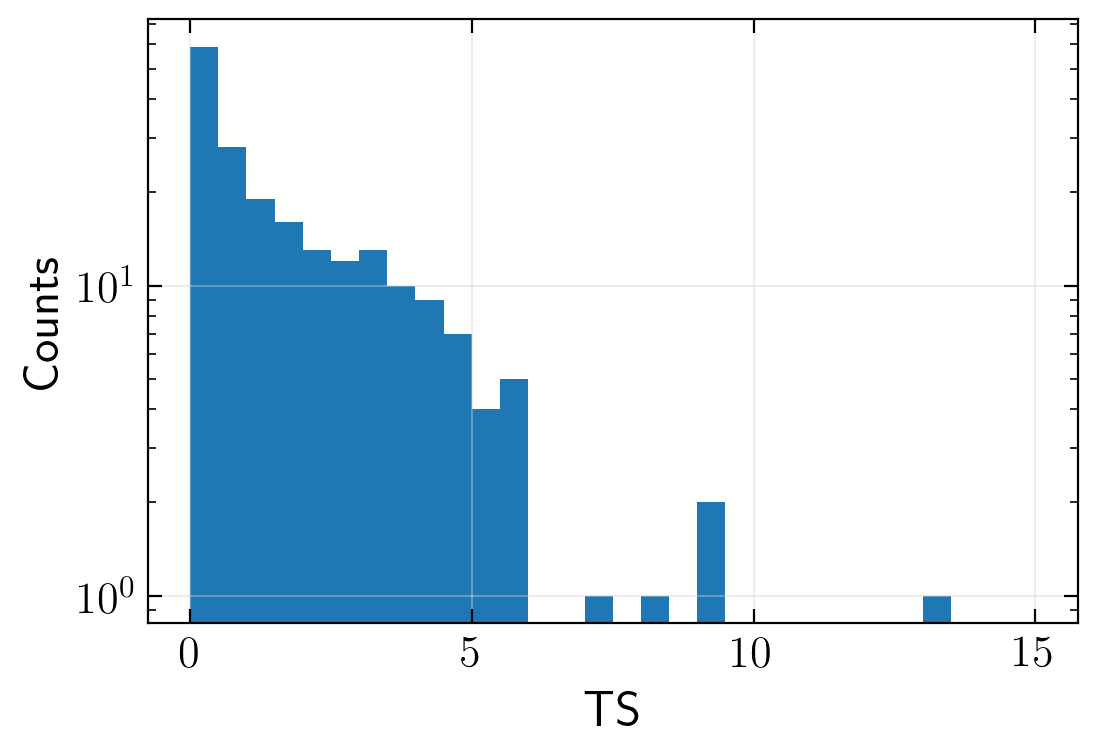

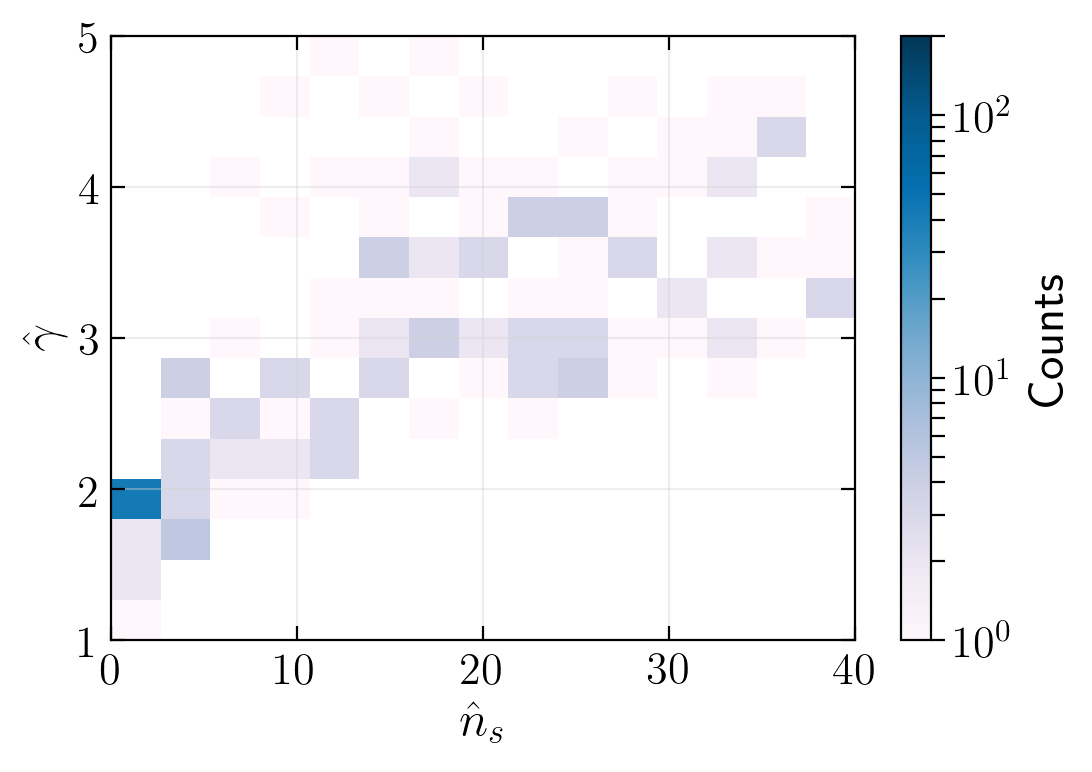

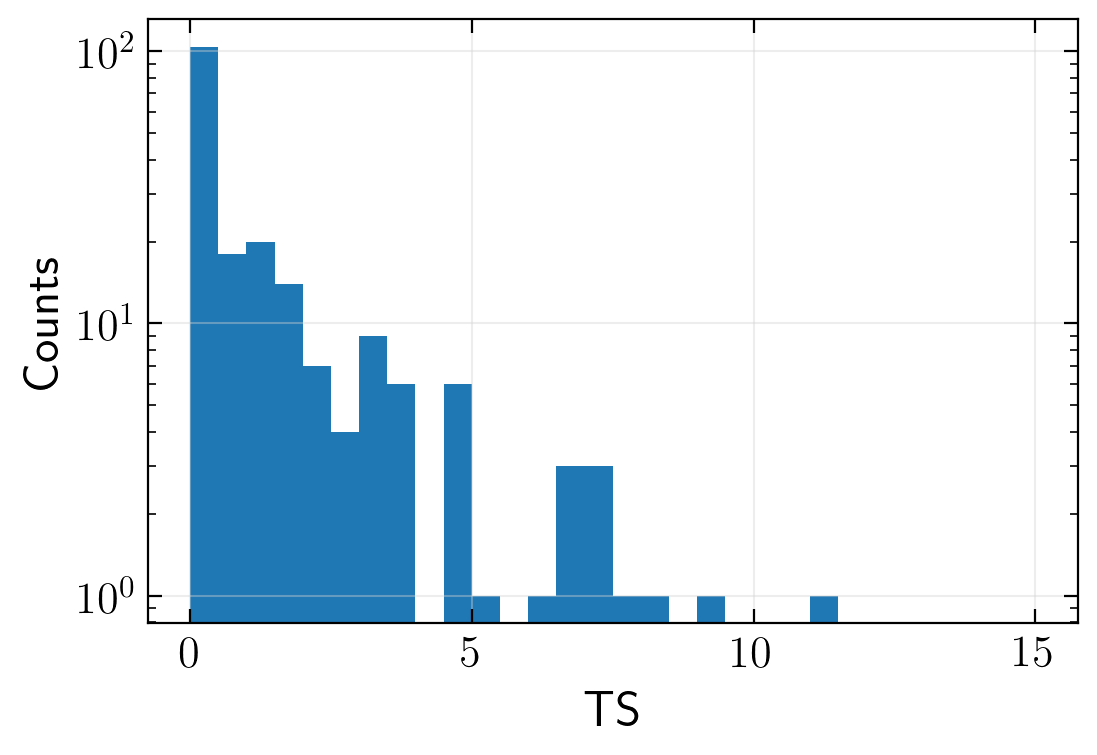

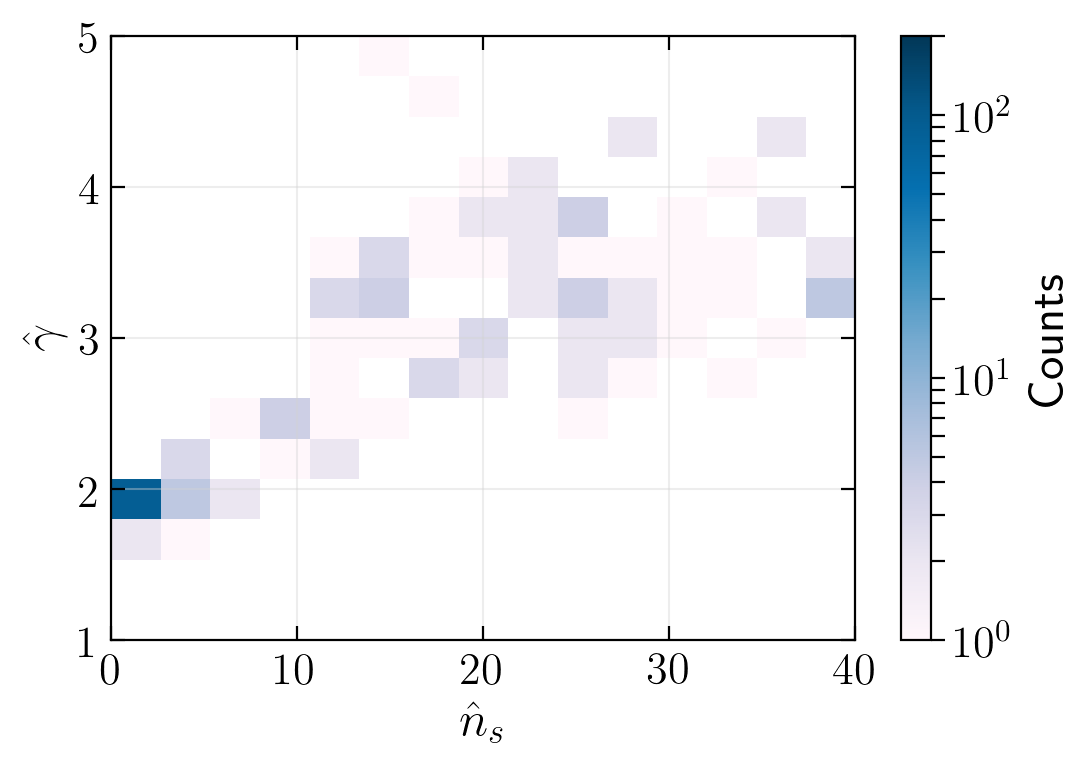

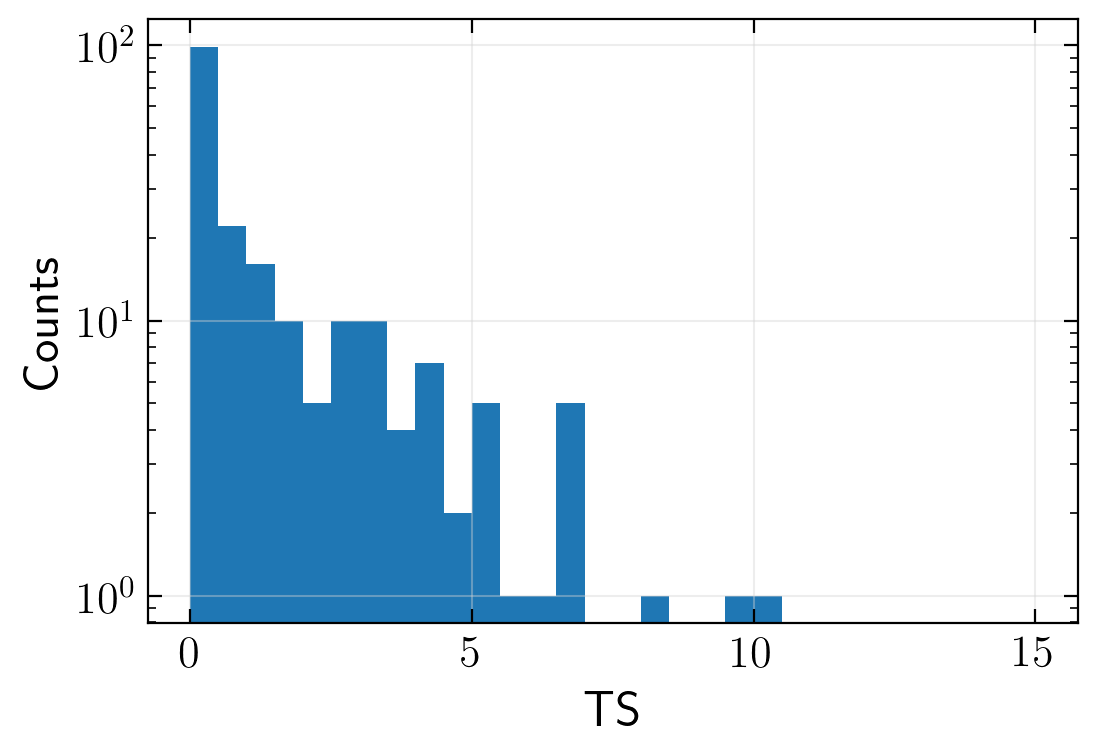

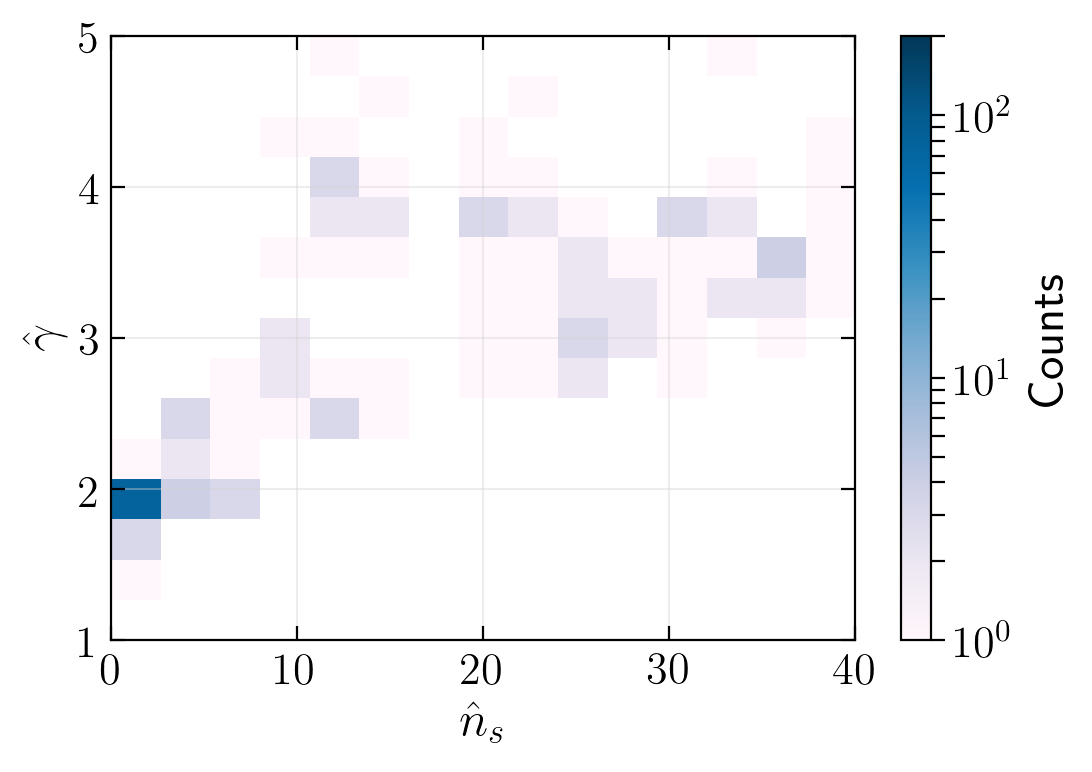

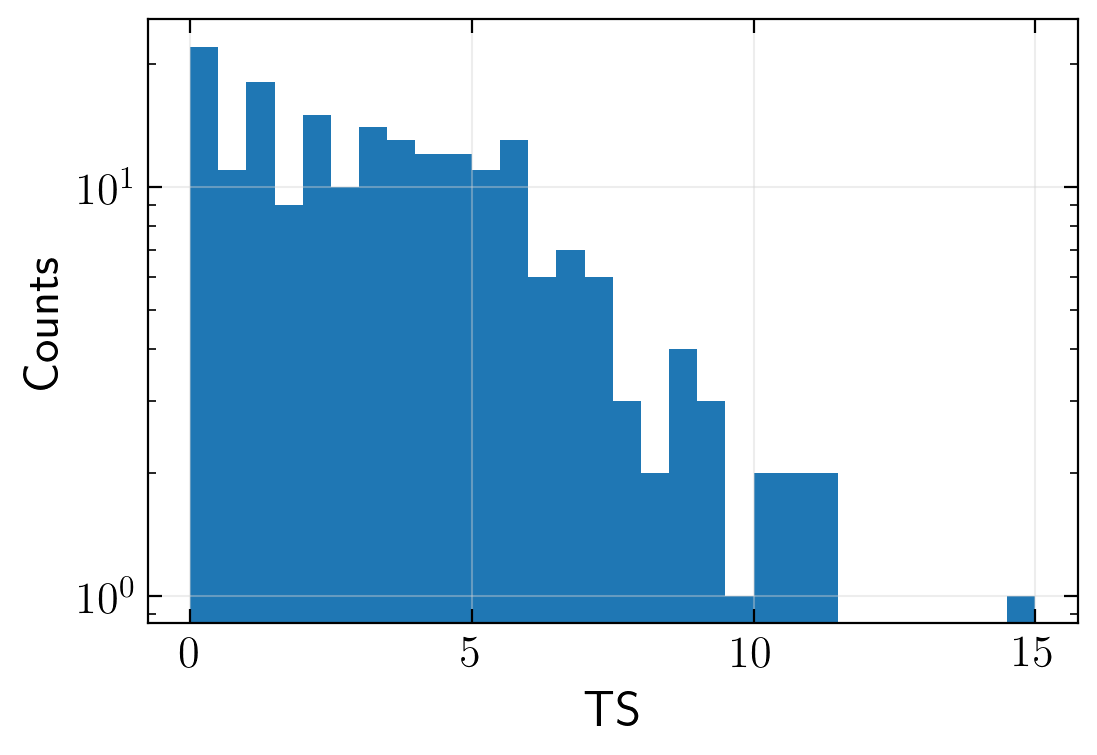

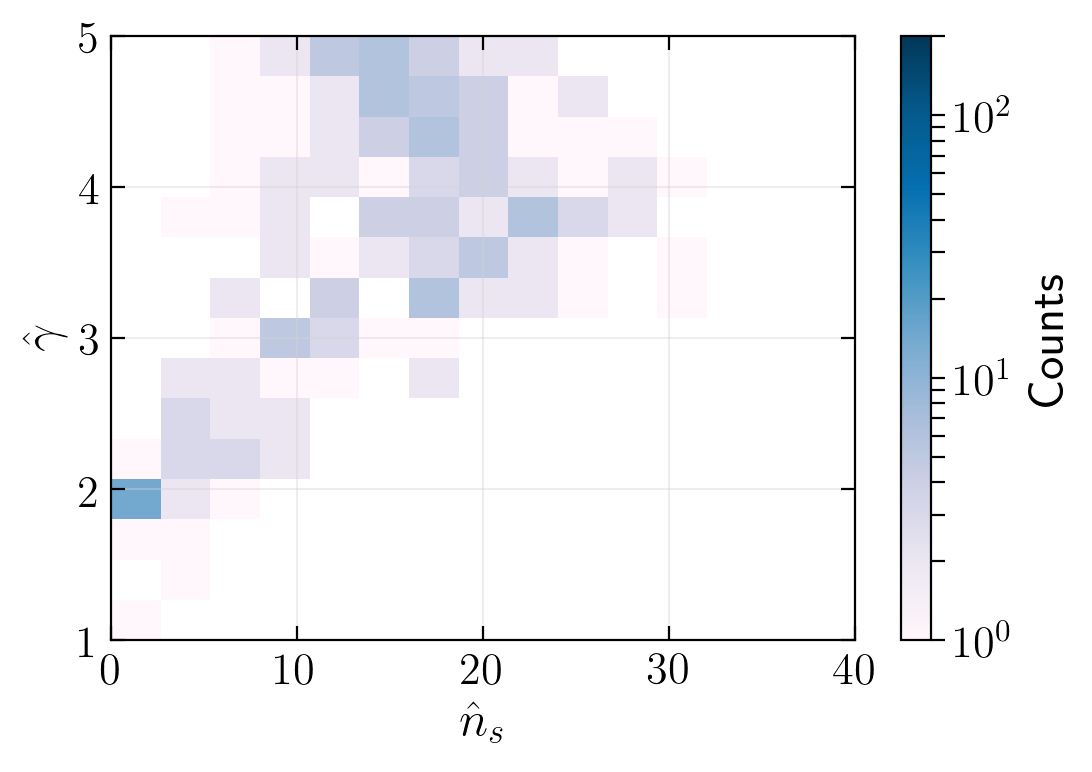

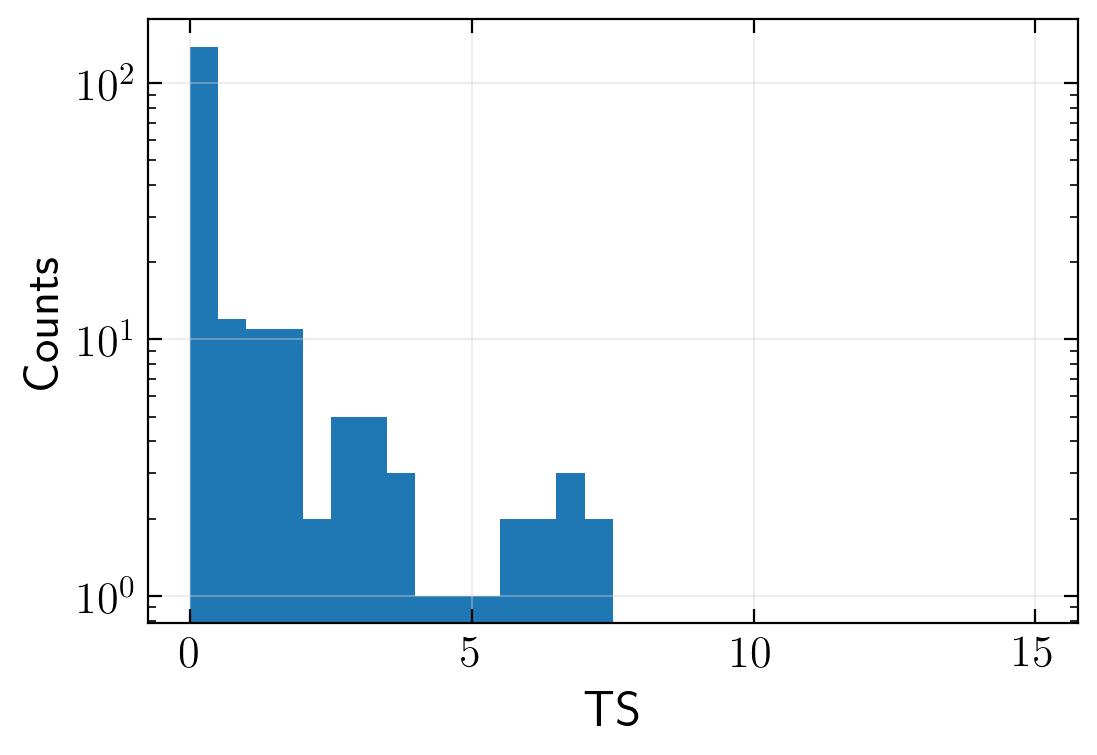

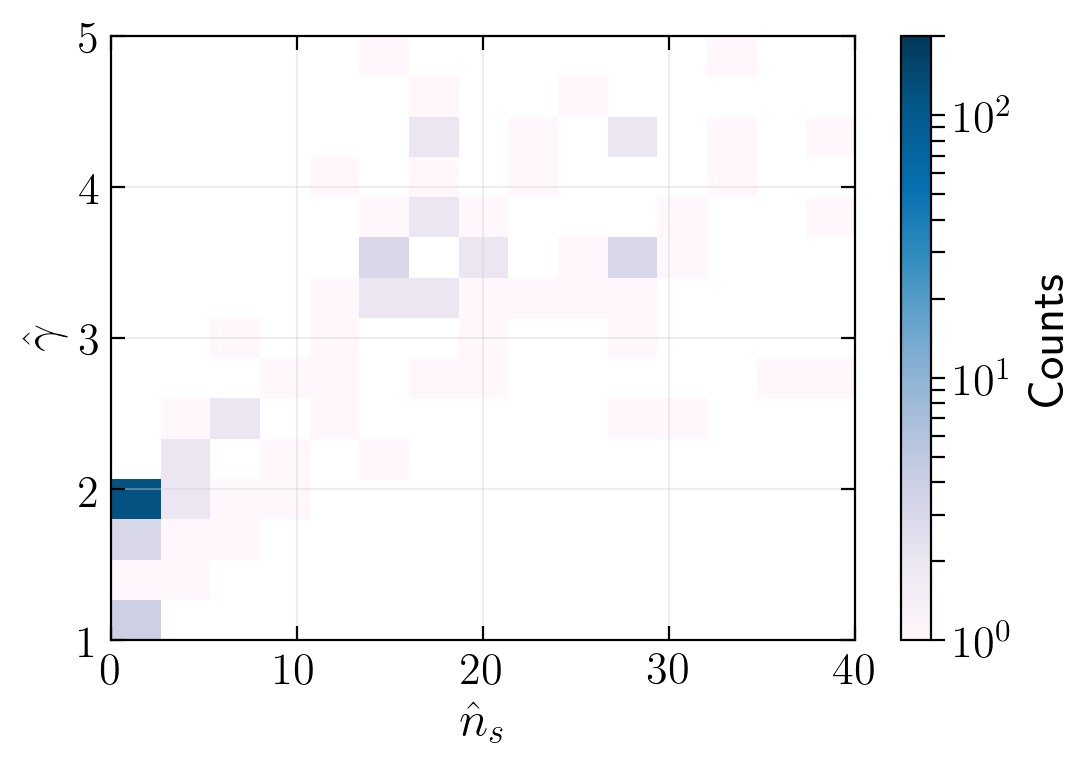

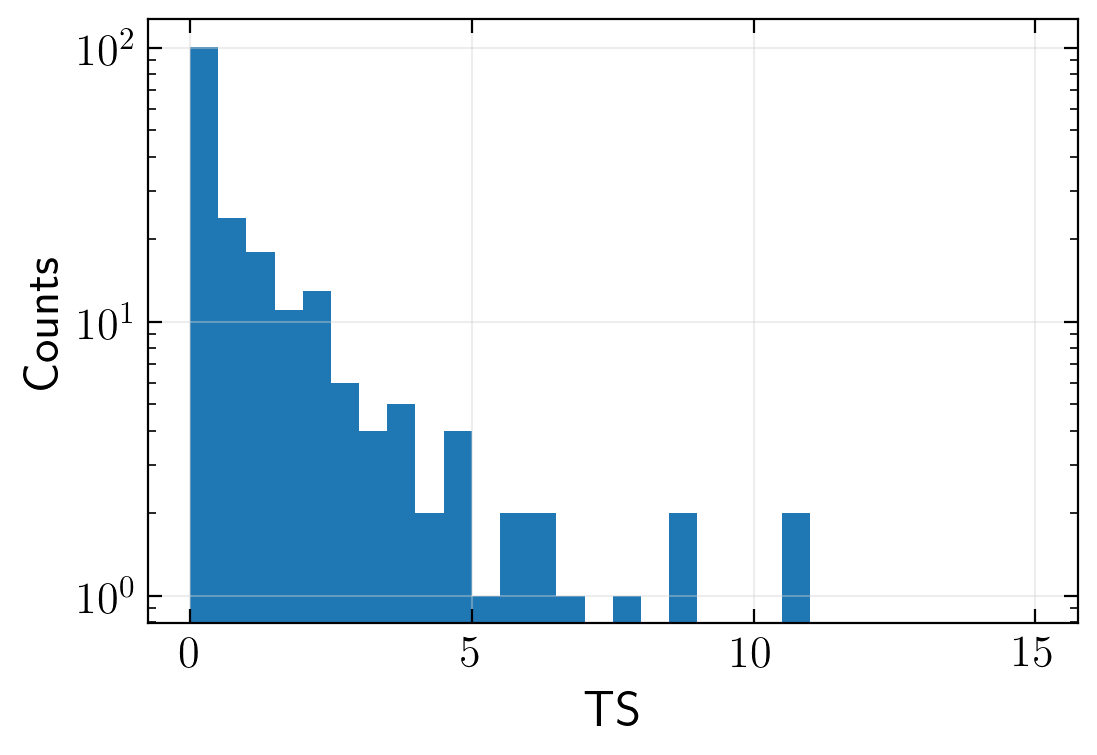

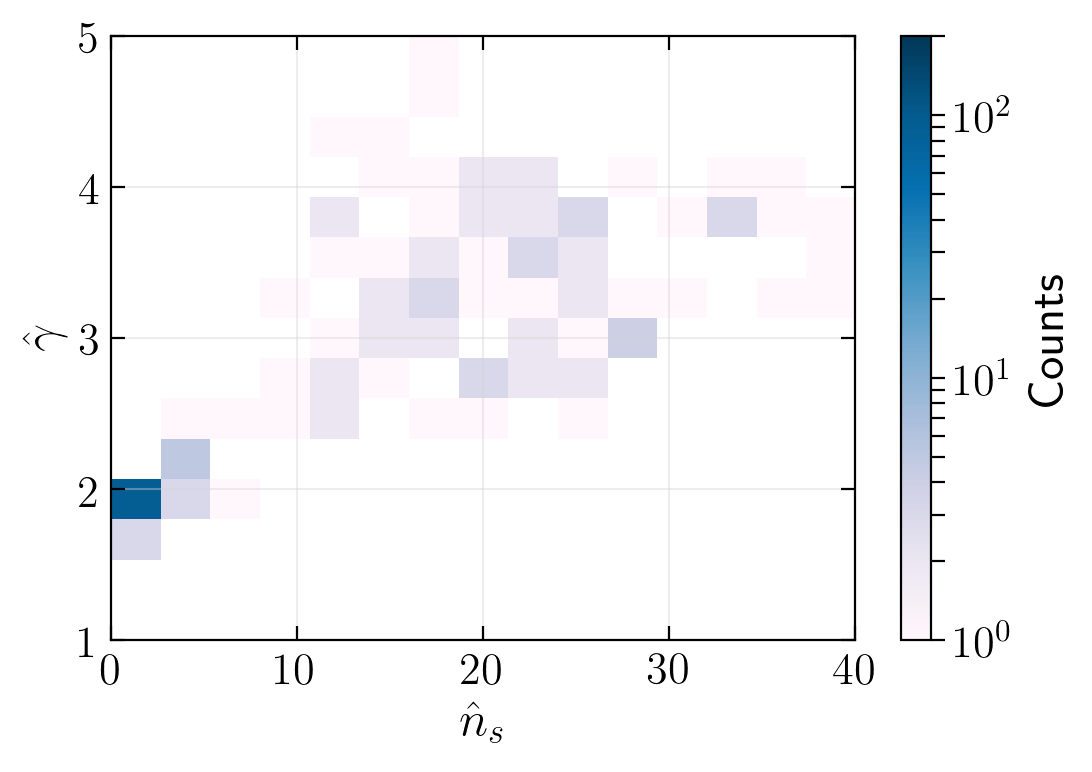

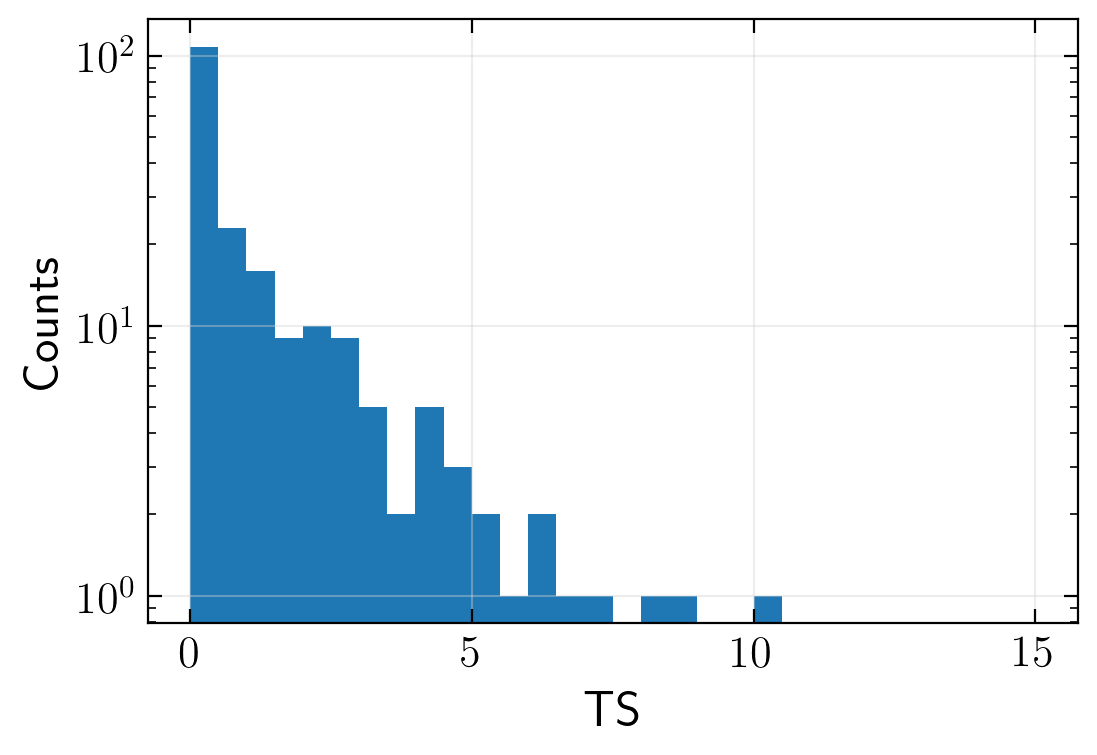

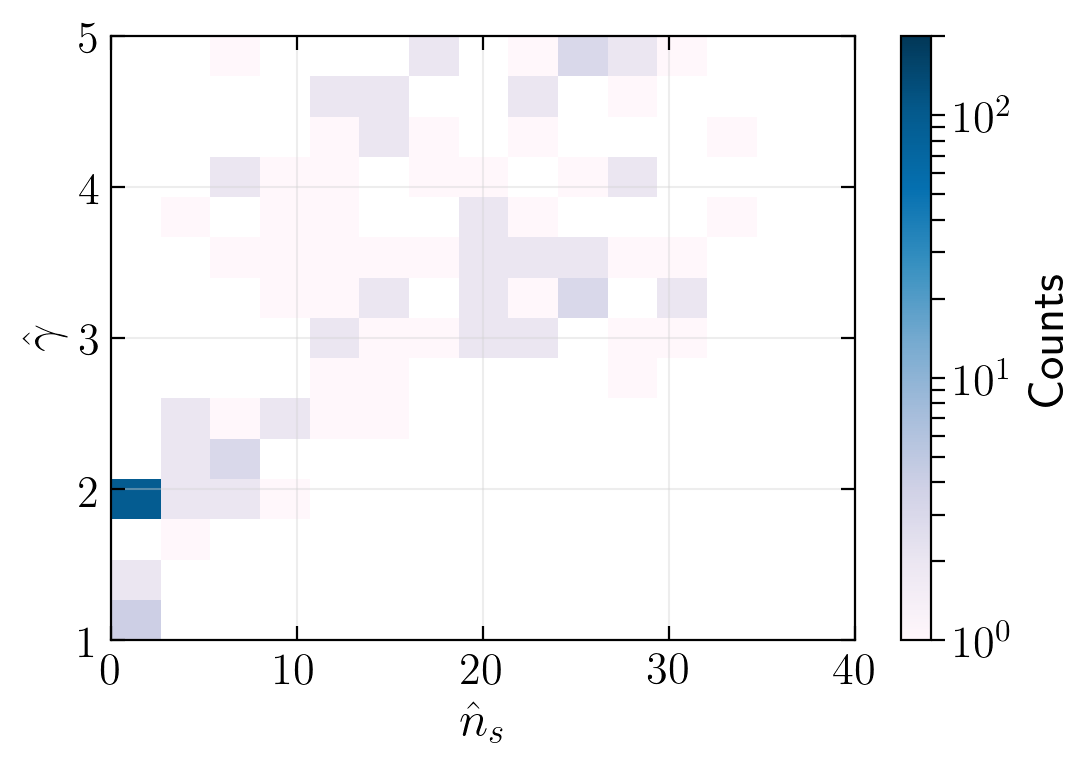

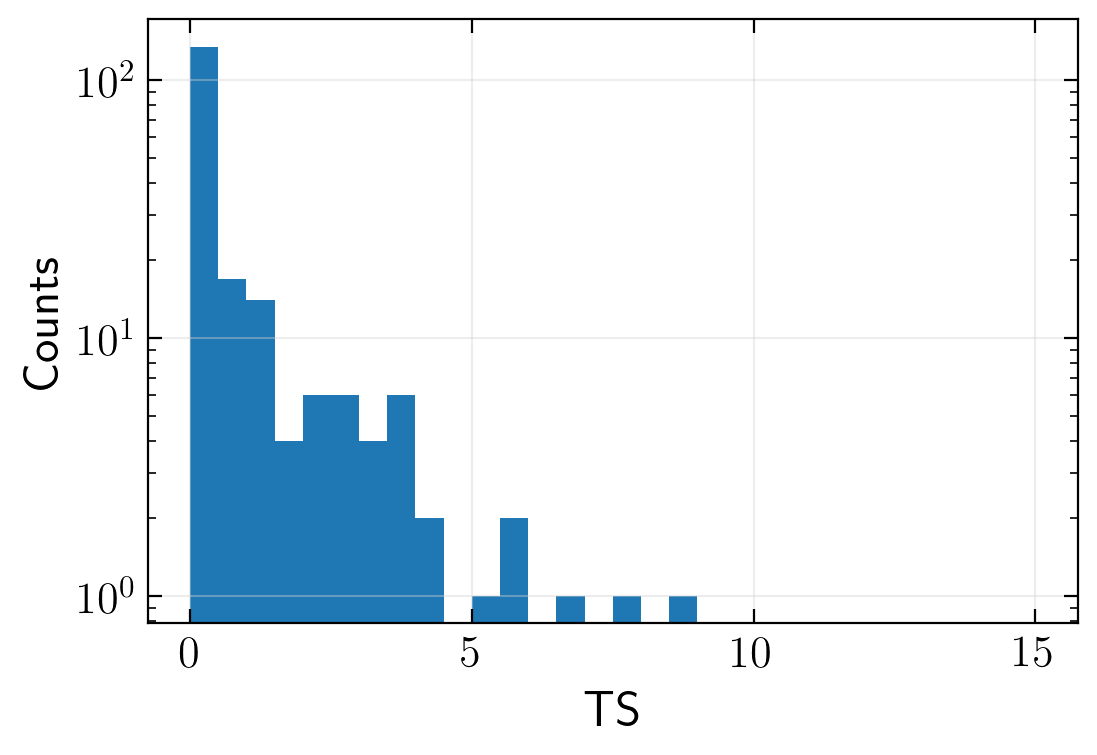

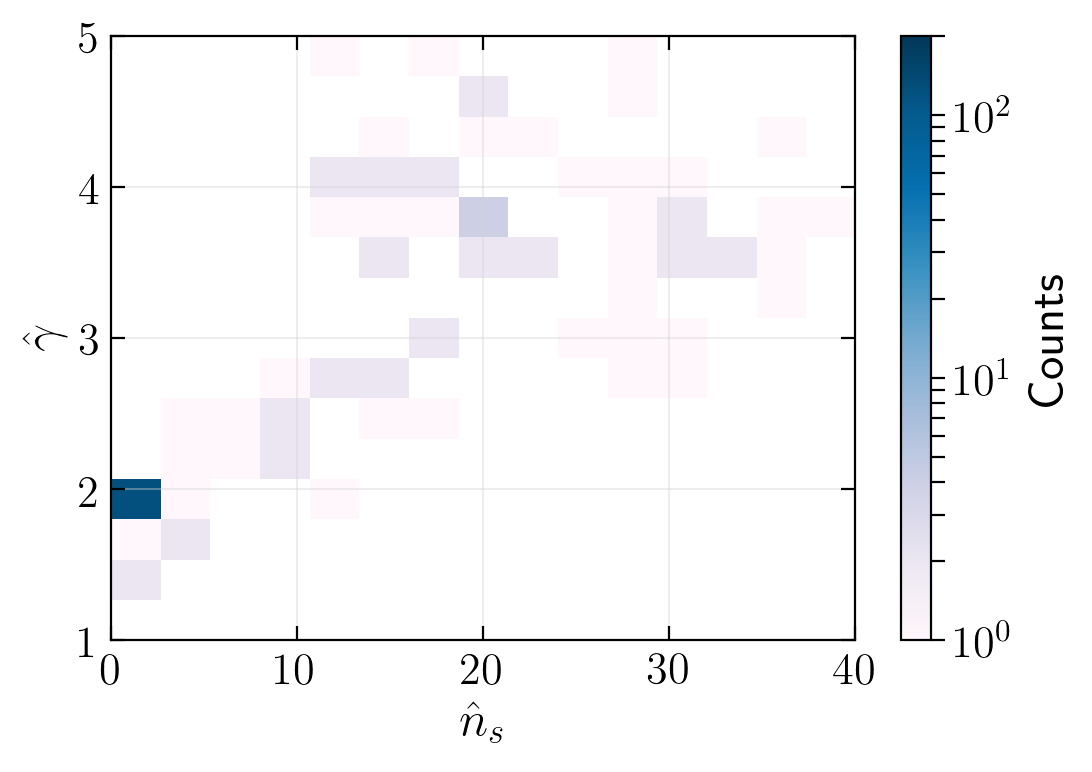

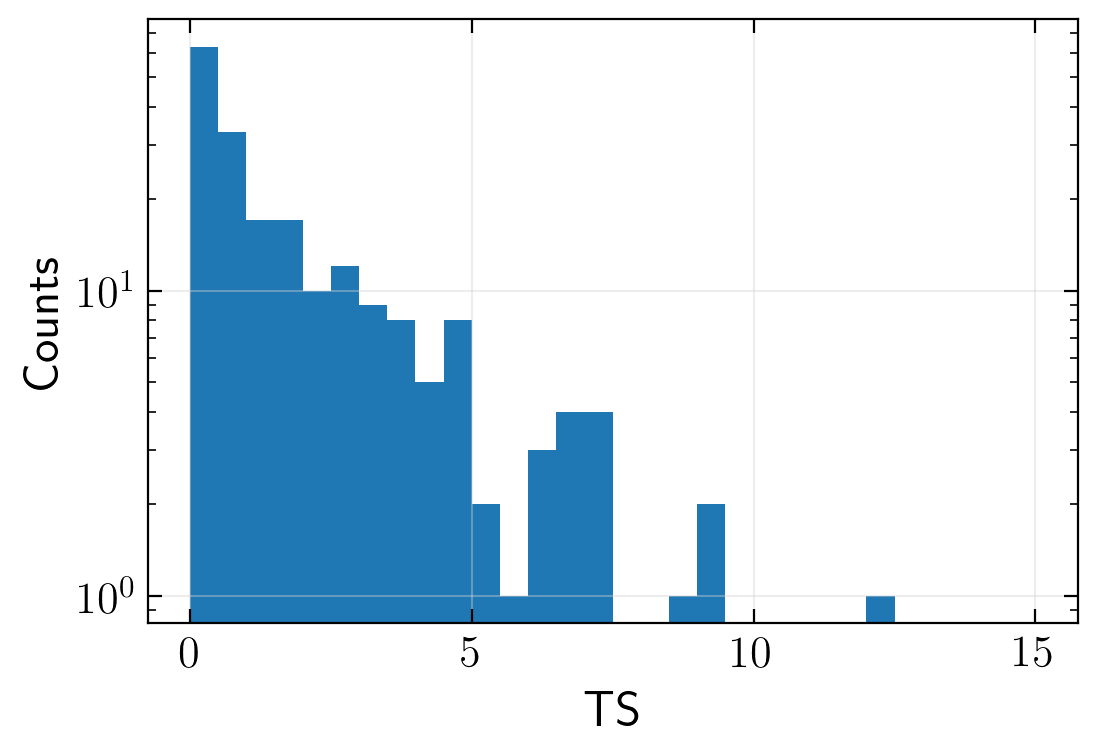

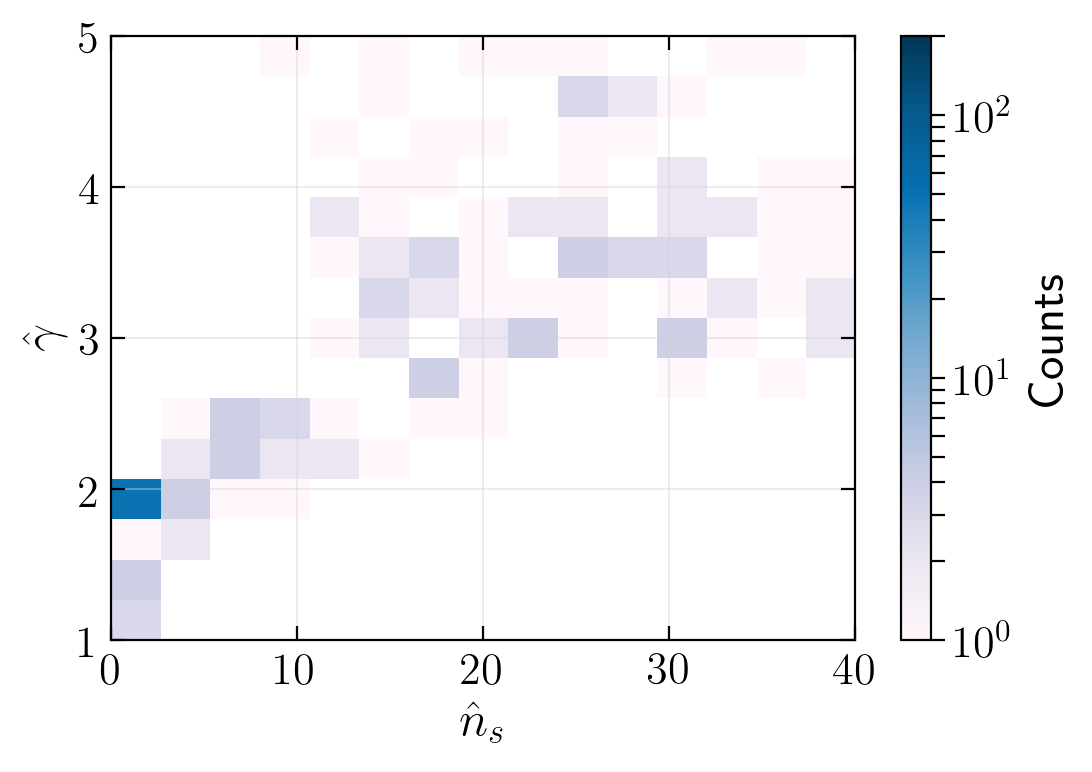

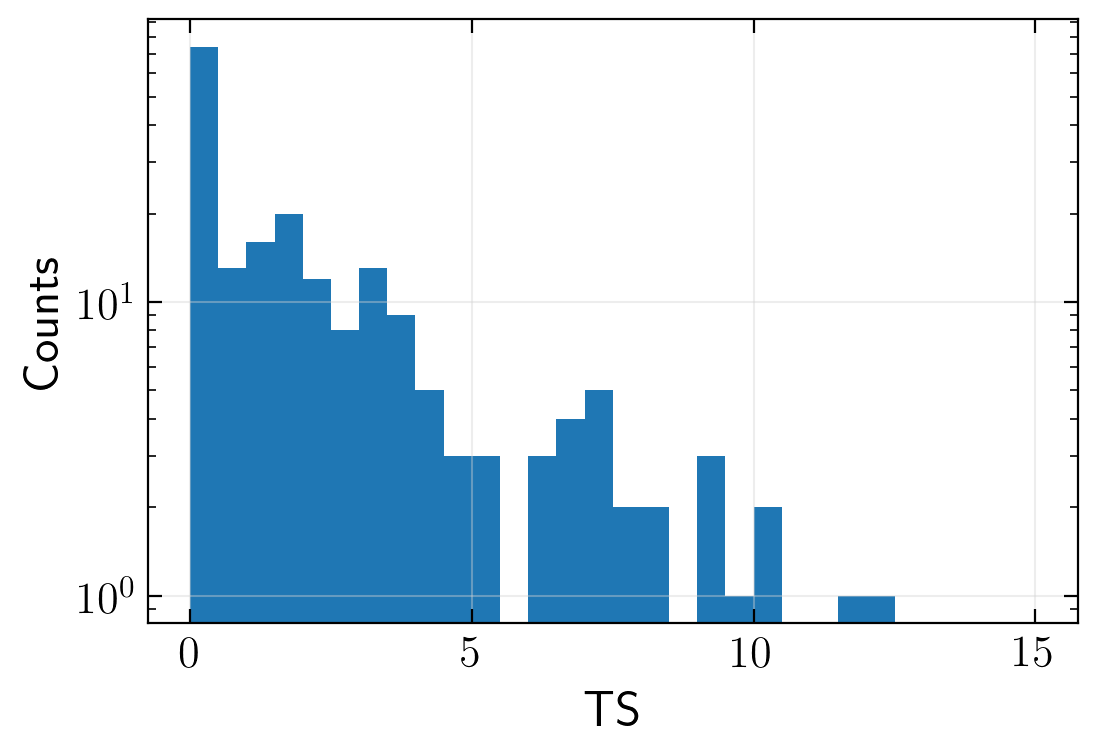

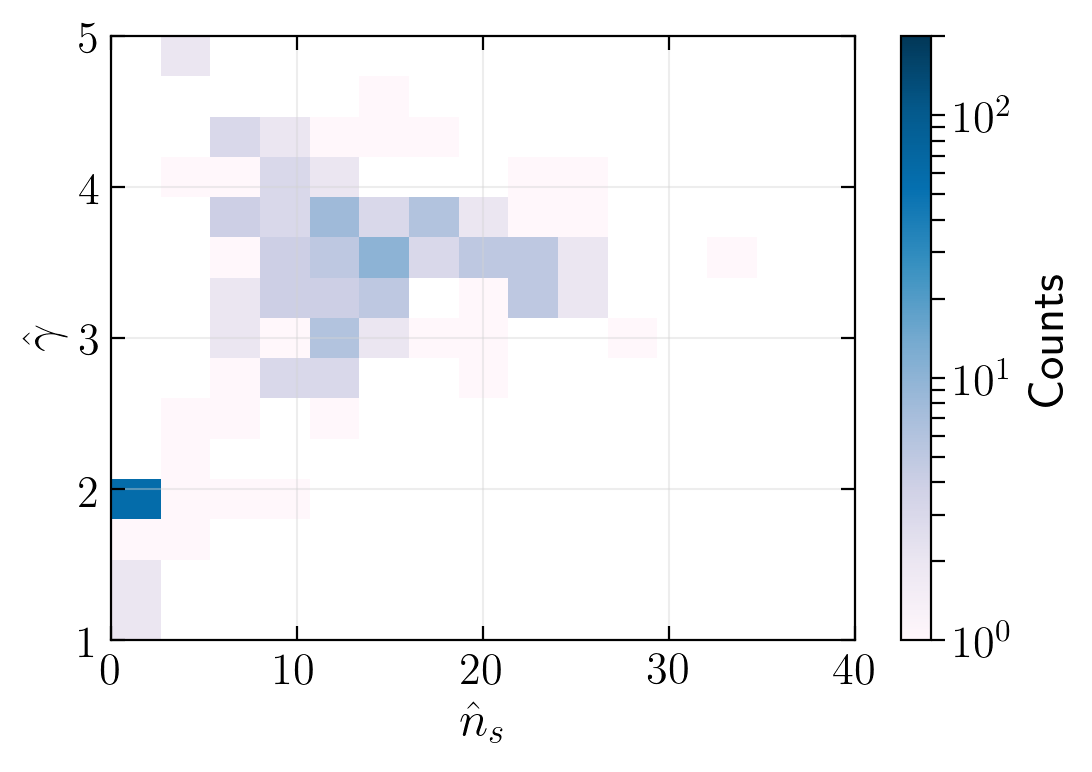

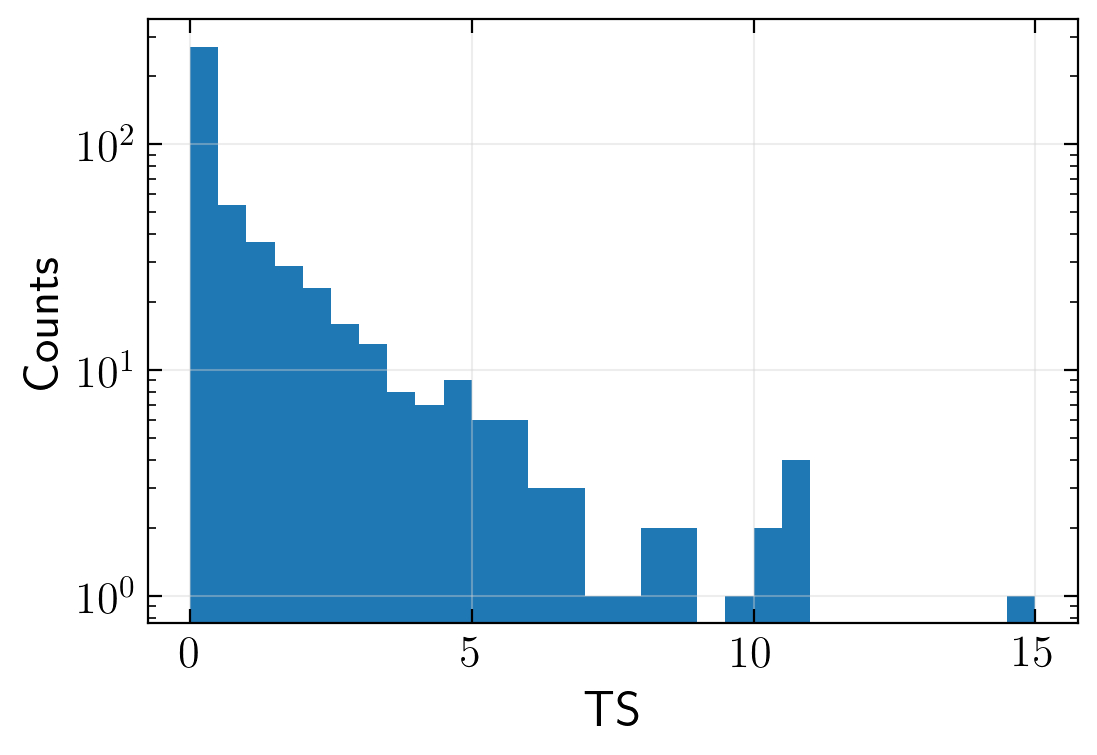

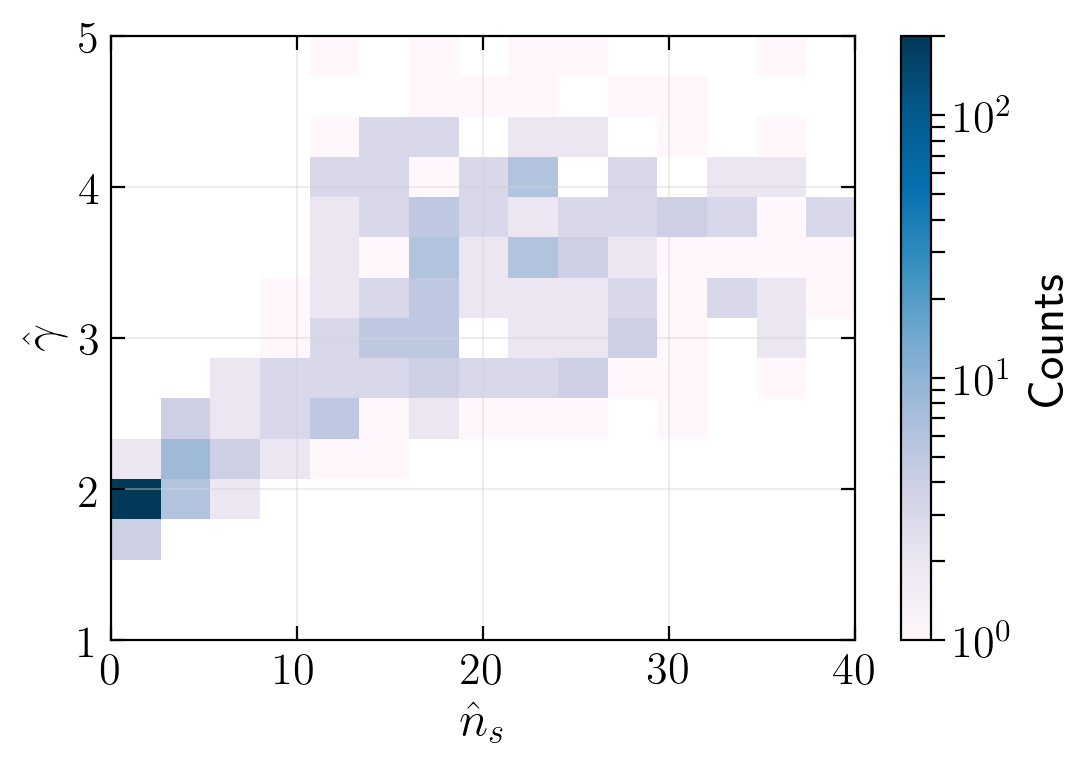

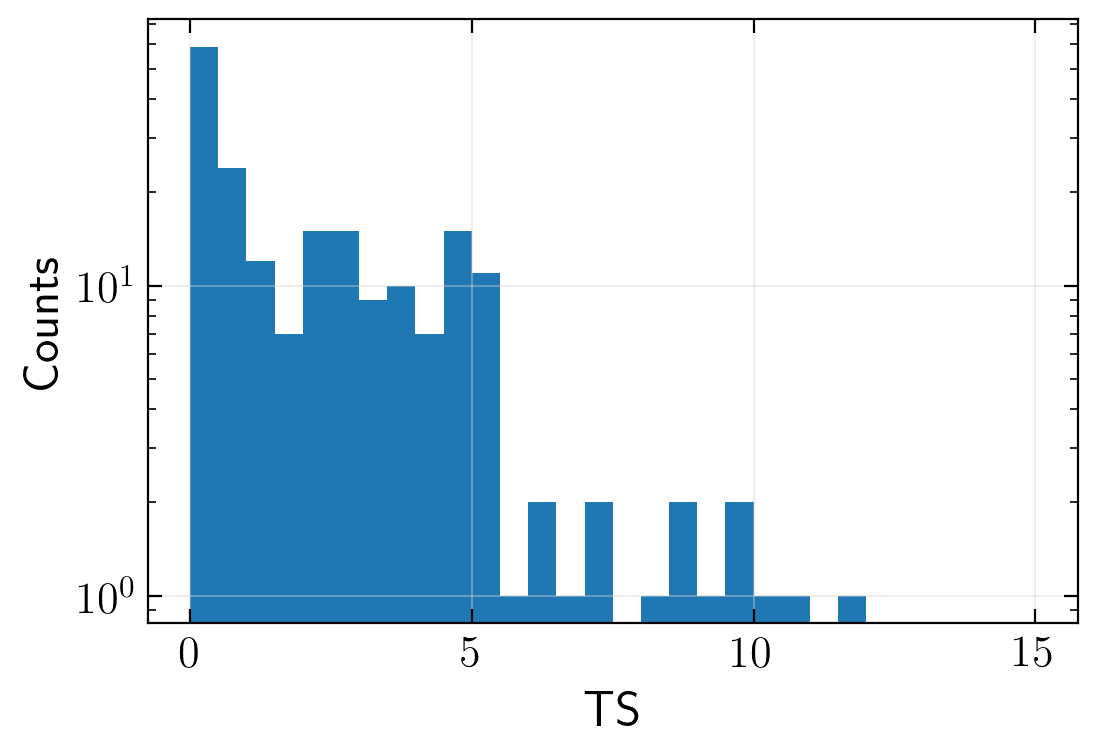

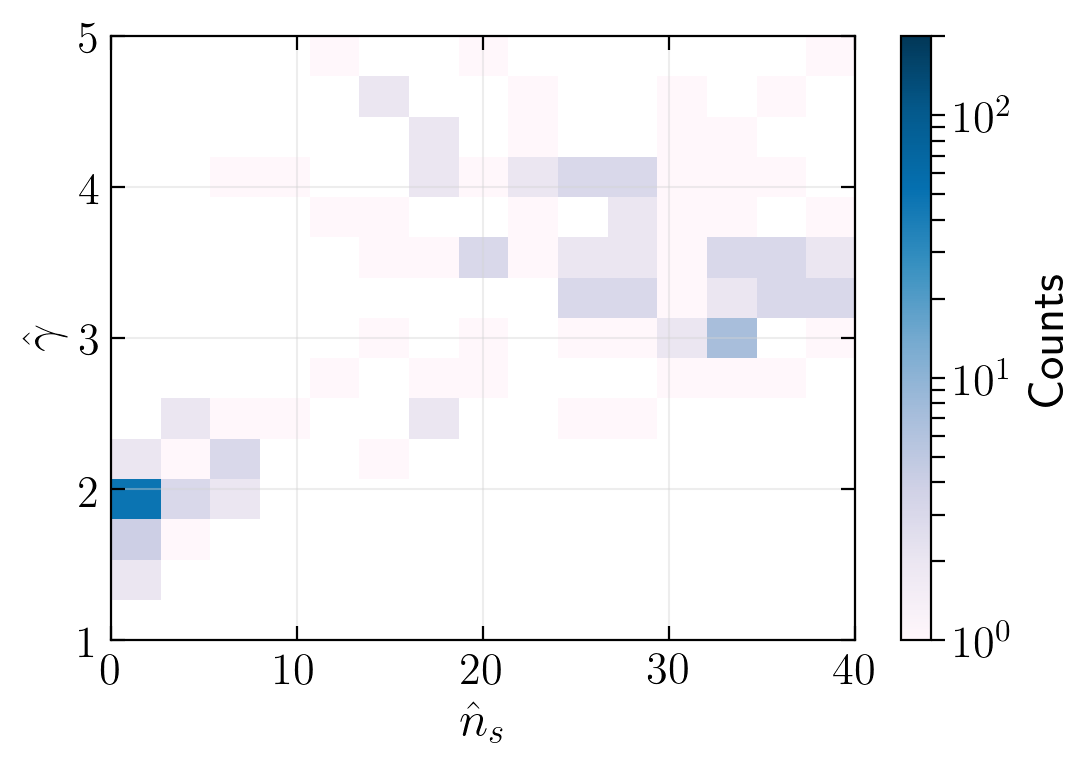

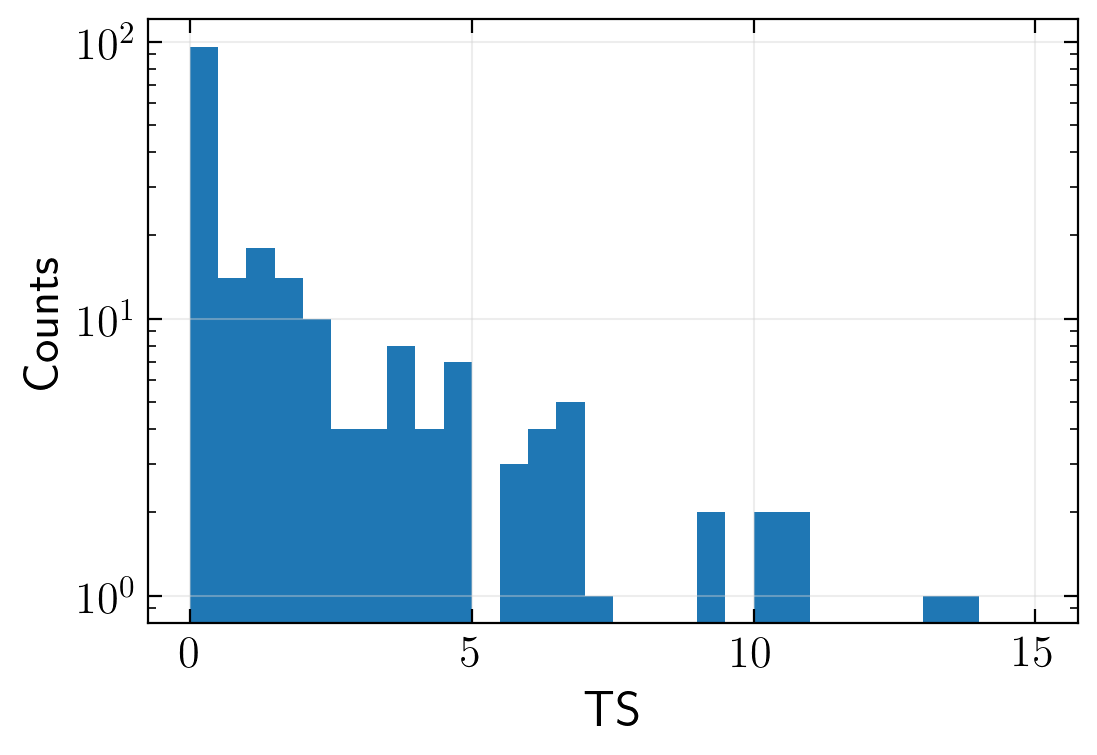

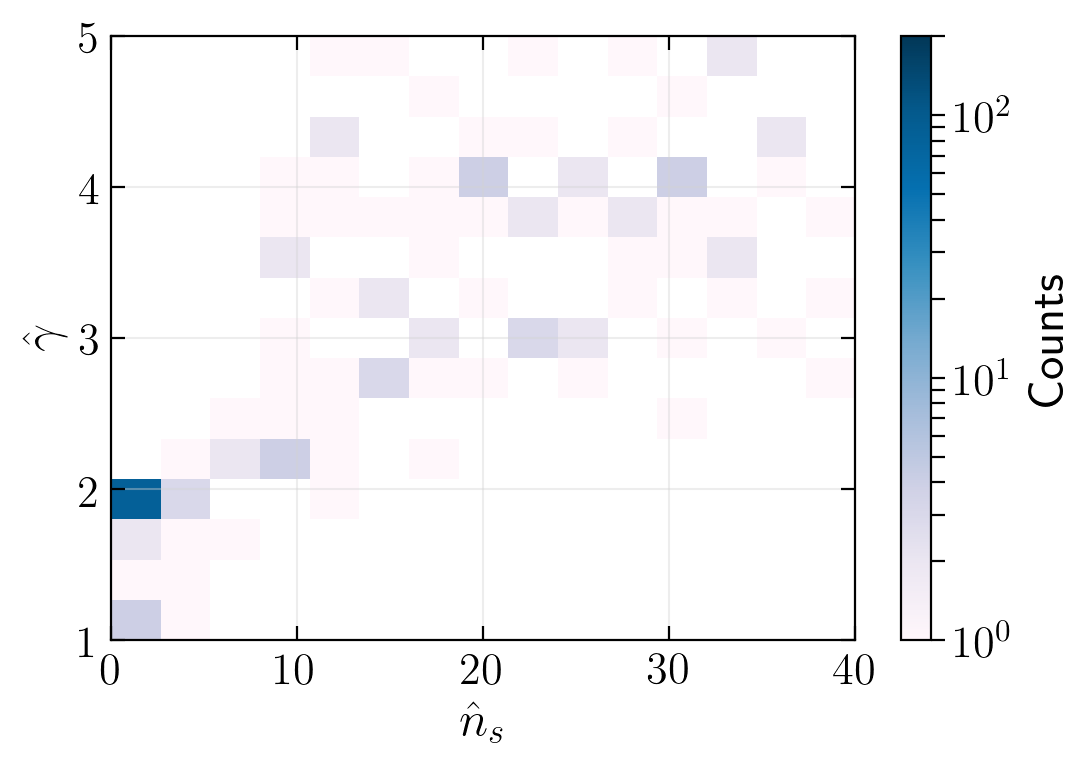

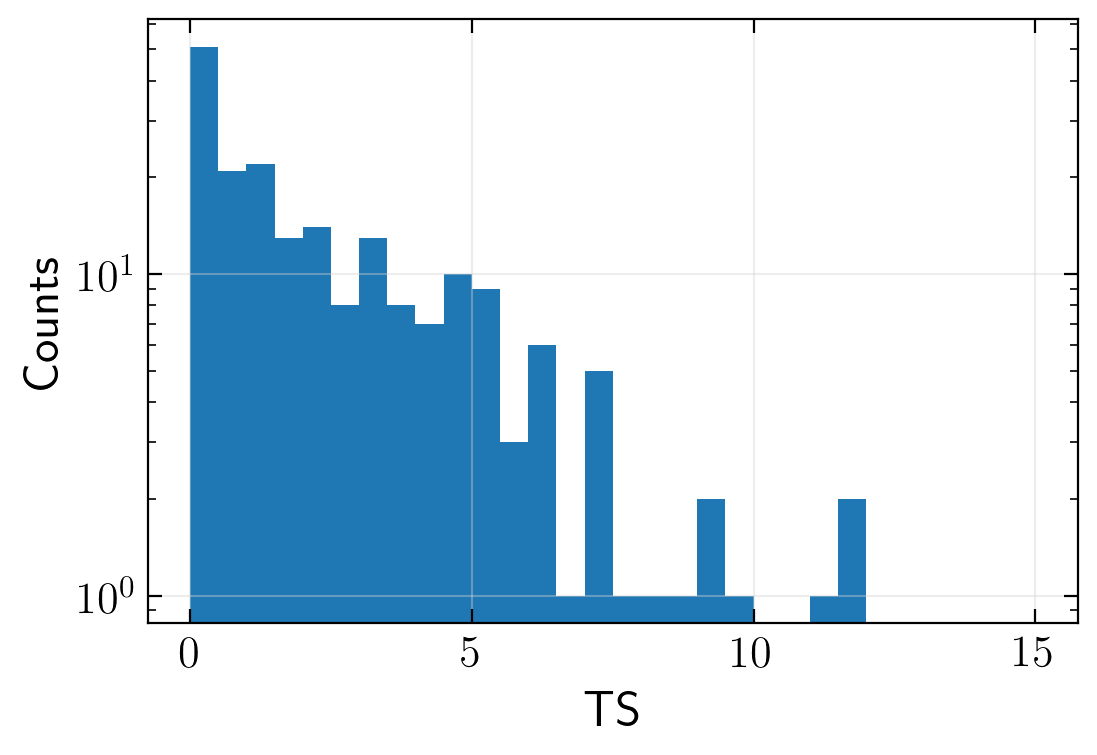

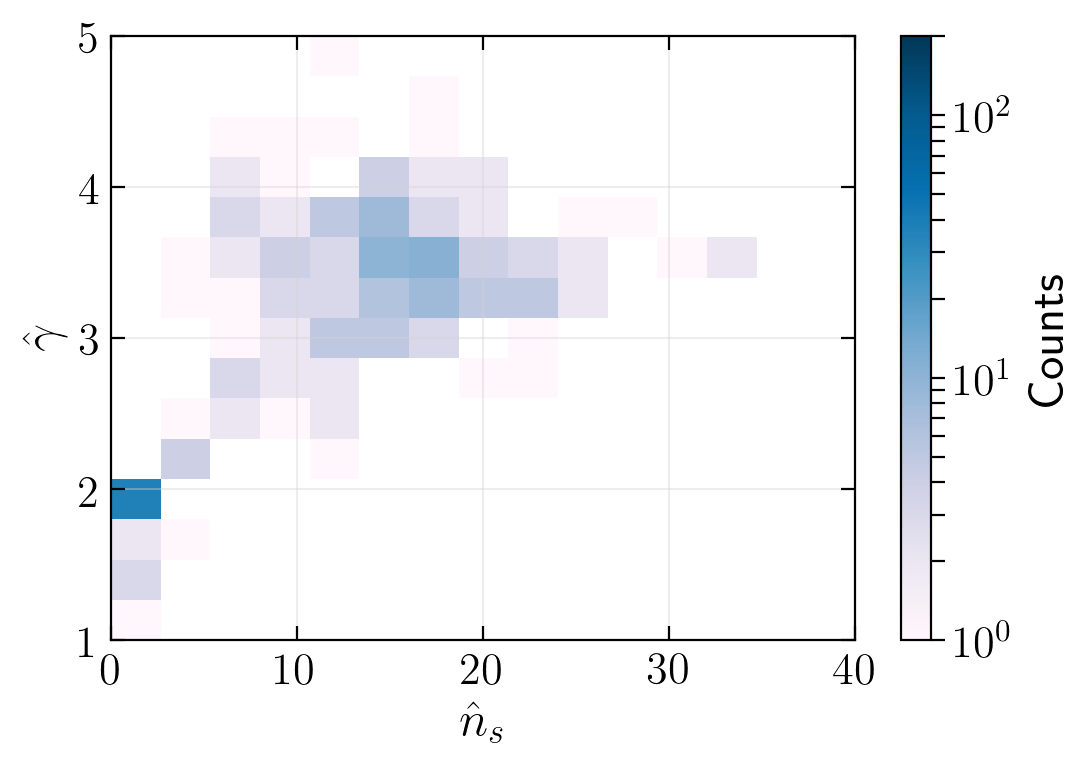

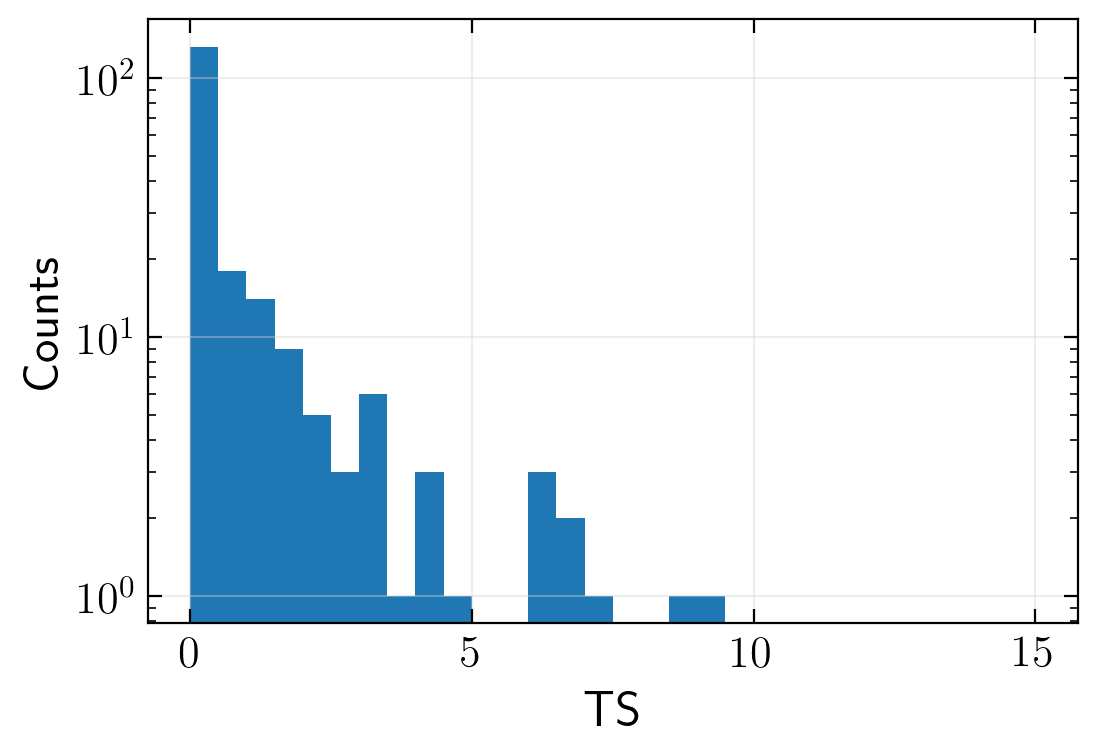

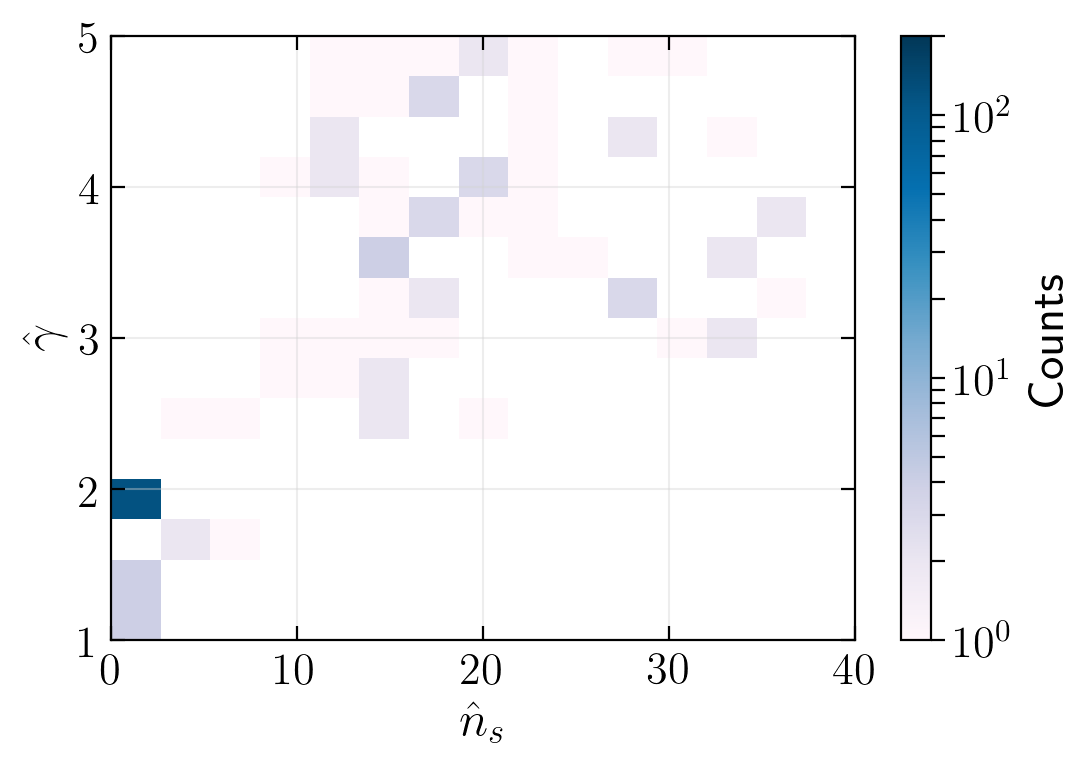

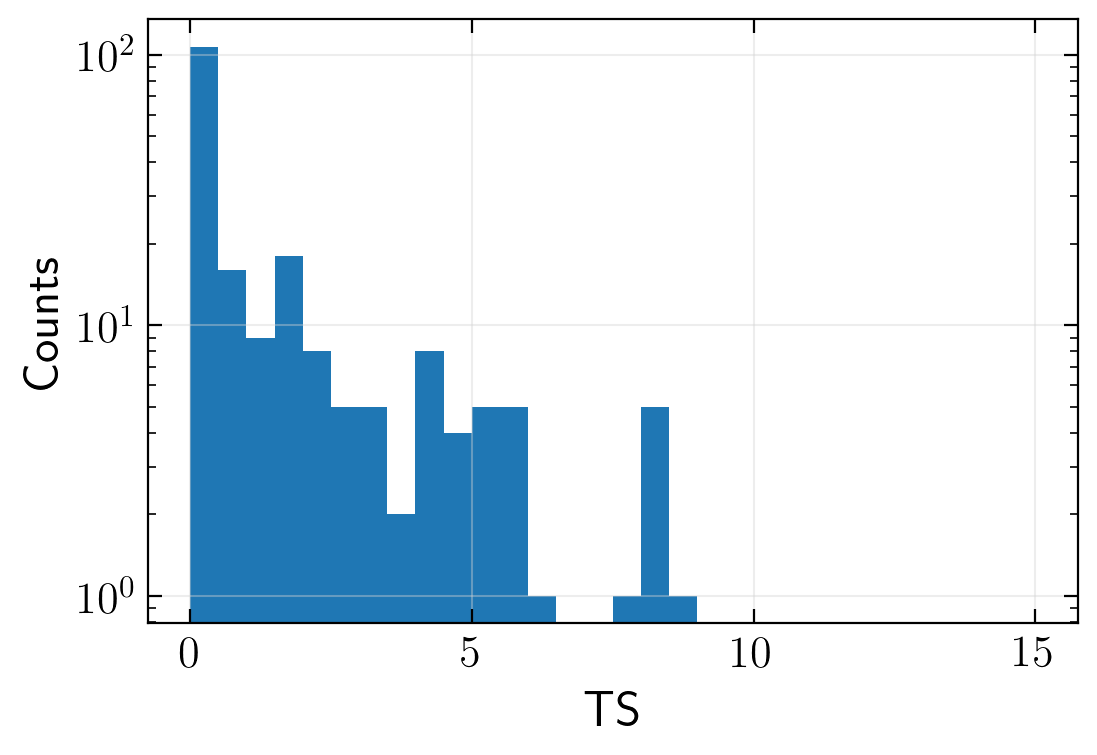

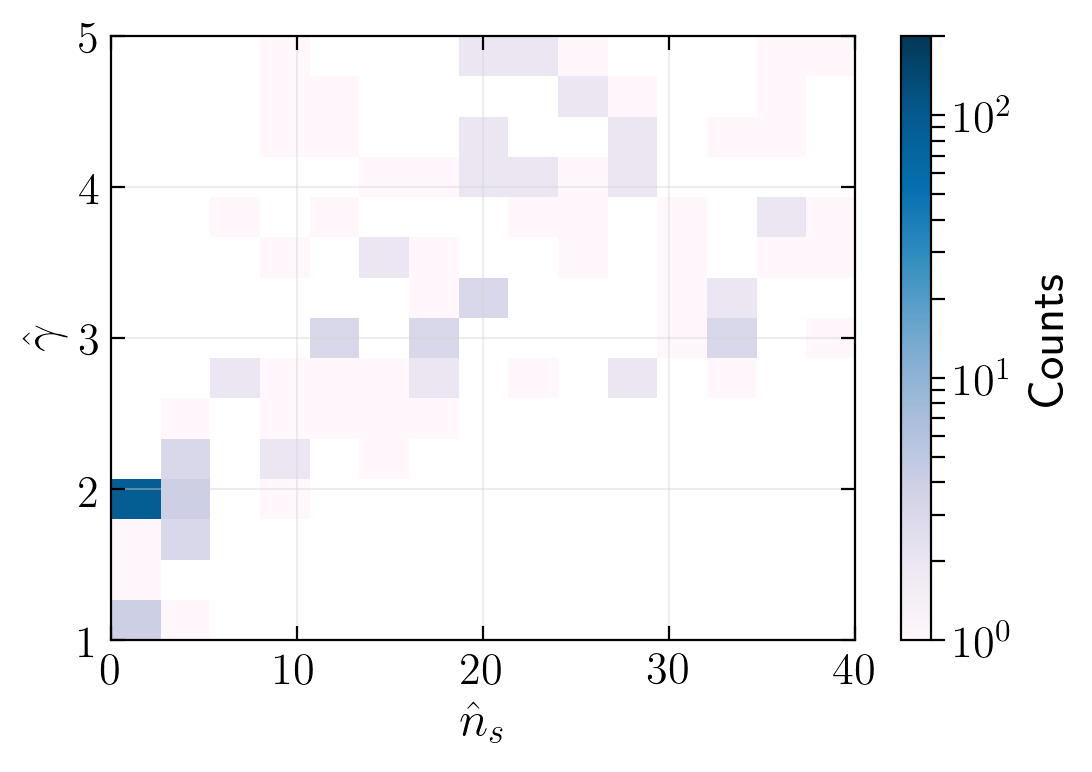

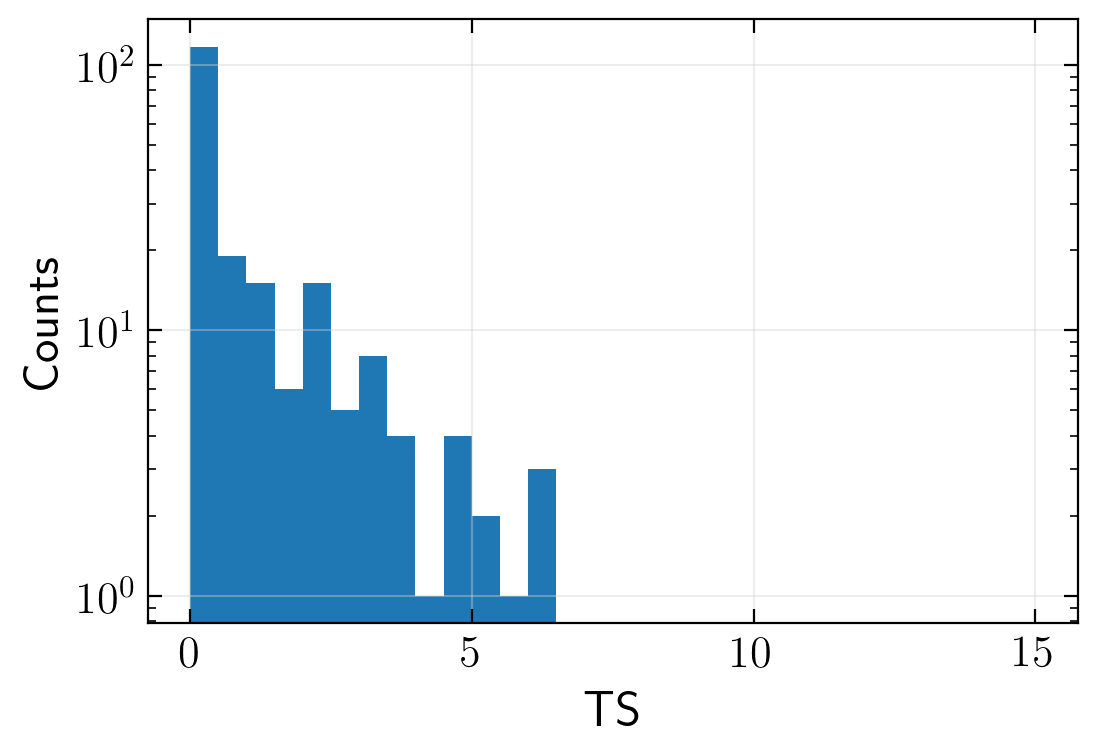

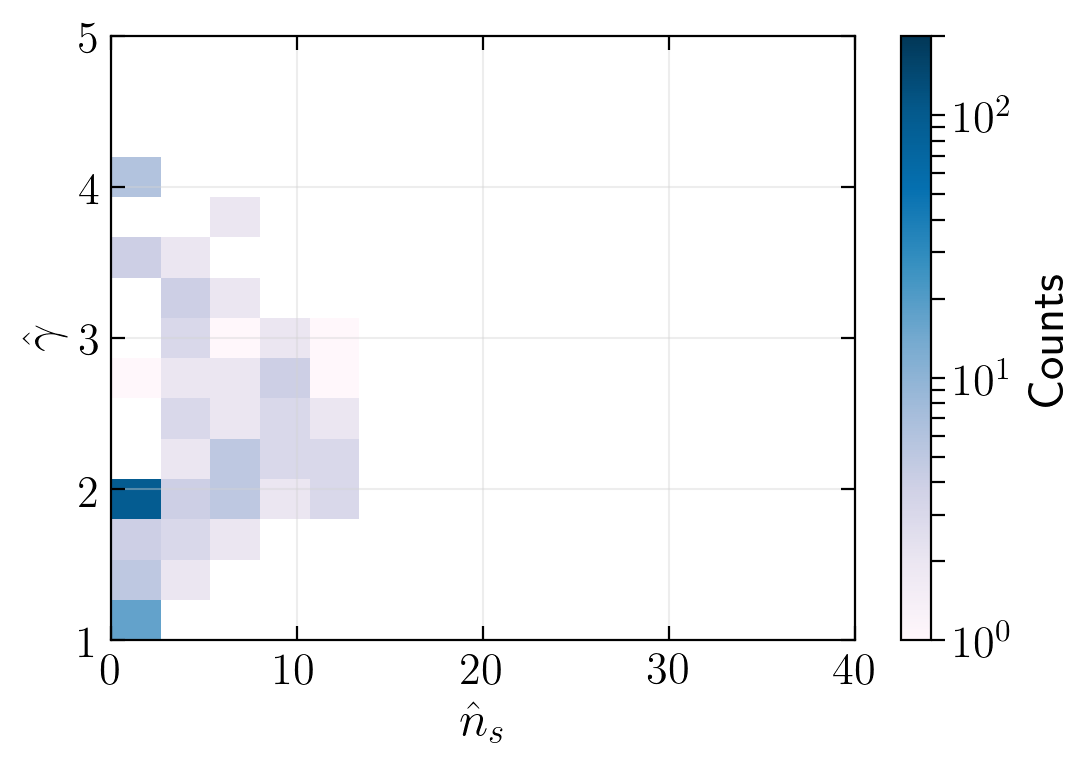

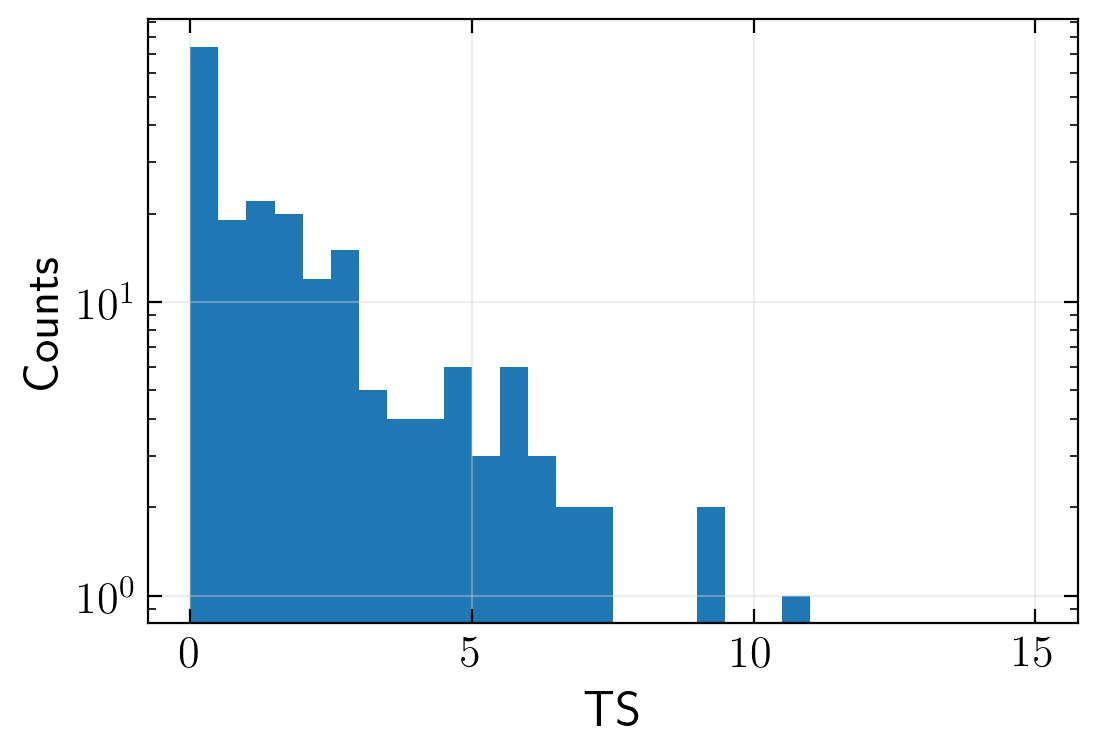

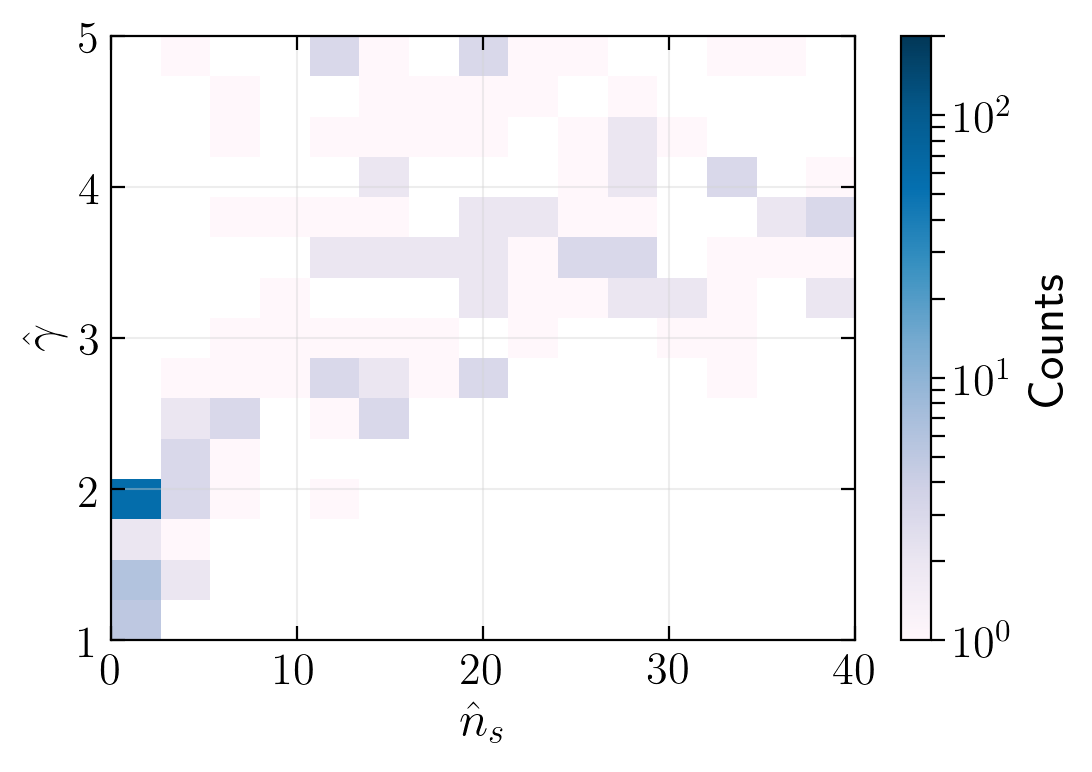

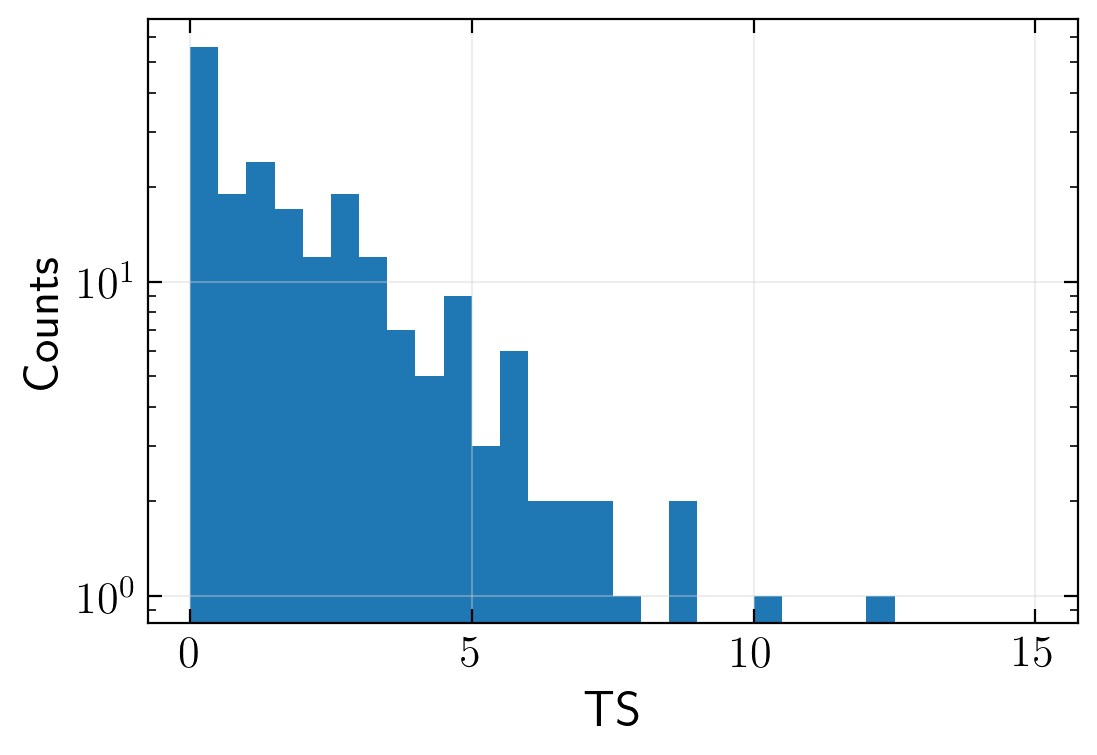

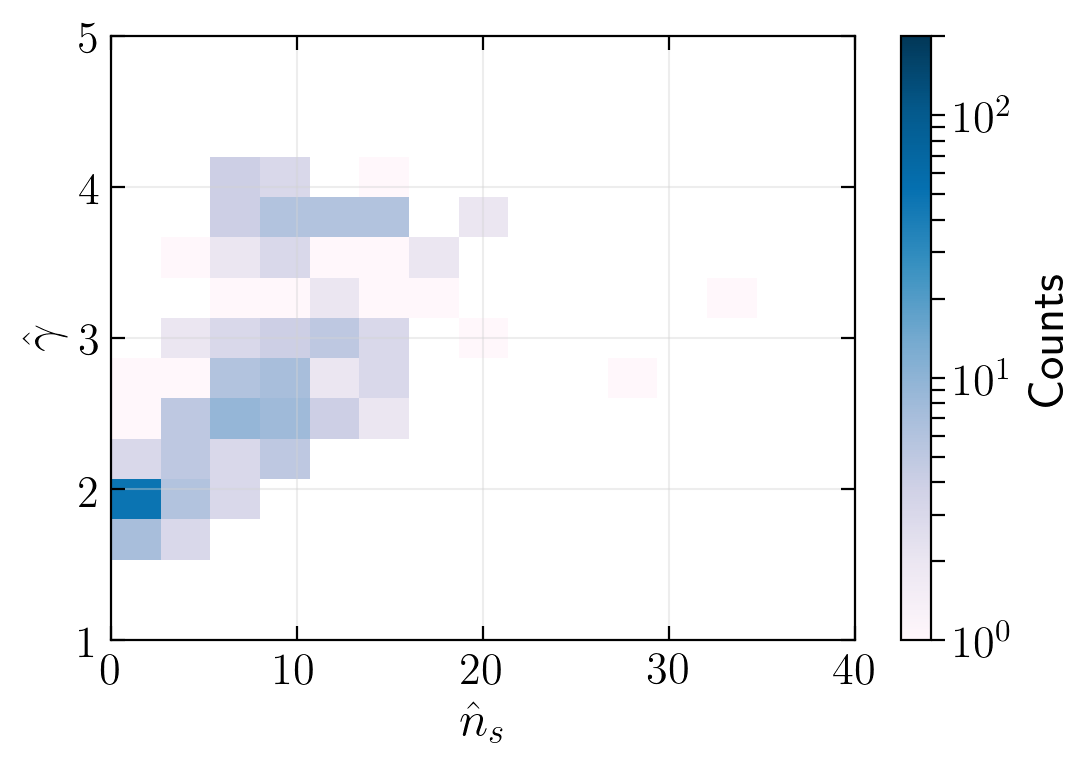

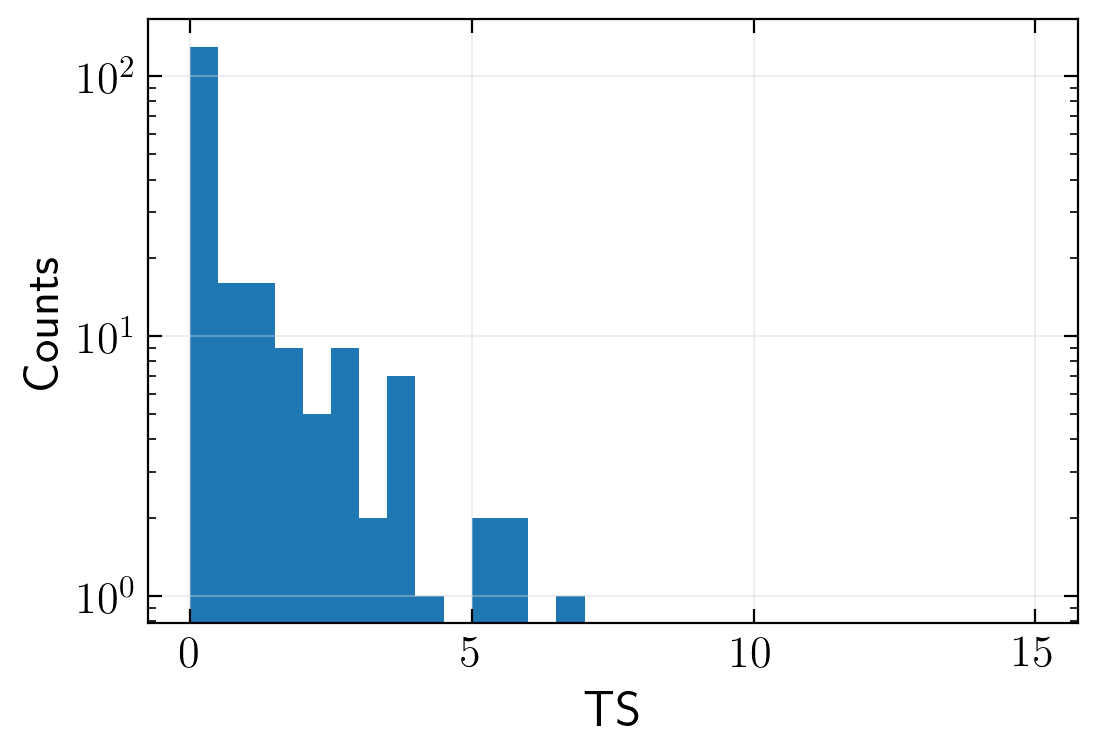

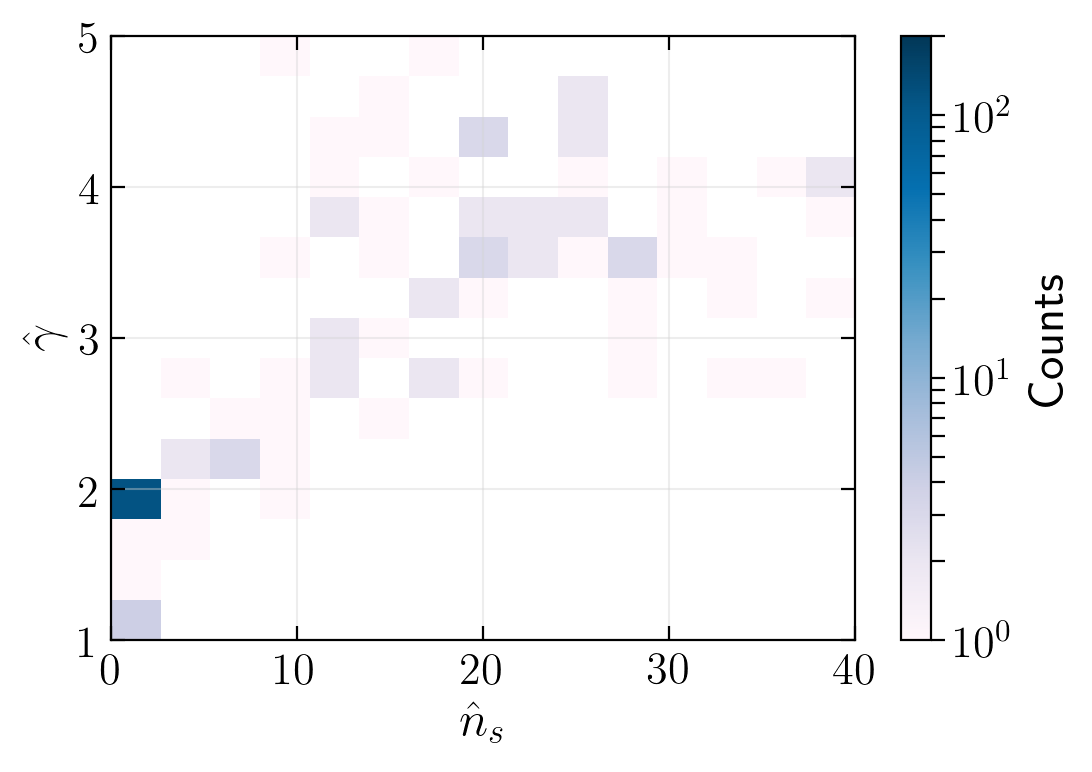

In [3]:
#fig, axs = plt.subplots(nrows=10, ncols=11, sharex=True, sharey=True, figsize=(15, 9), dpi=200)
#plt.subplots_adjust(hspace = 0.08, wspace = 0.08)
from glob import glob
fs = glob('/data/user/apizzuto/fast_response_skylab/alert_event_followup/analysis_trials/bg/robert_maps/*steady*')
for fi in fs:
    fig = plt.figure(dpi=200)
    fig.set_facecolor('w')
    with open(fi, 'r') as f:
        bg = pickle.load(f)
    plt.hist(bg['TS'], bins=np.linspace(0., 15., 31), histtype='stepfilled')
    plt.yscale('log')
    plt.xlabel('TS')
    plt.ylabel('Counts')
    plt.show()
    
    fig = plt.figure(dpi=200)
    fig.set_facecolor('w')
    plt.hist2d(bg['nsignal'], bg['gamma'], bins=[np.linspace(0., 40., 16), 
                        np.linspace(1., 5., 16)], norm=LogNorm(), vmin=1, vmax=200)
    cbar = plt.colorbar(label='Counts')
    cbar.ax.tick_params(direction = 'out')
    plt.xlabel(r'$\hat{n}_s$')
    plt.ylabel(r'$\hat{\gamma}$')
    plt.show()


80


/home/apizzuto/.venvs/fast_response/lib/python2.7/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


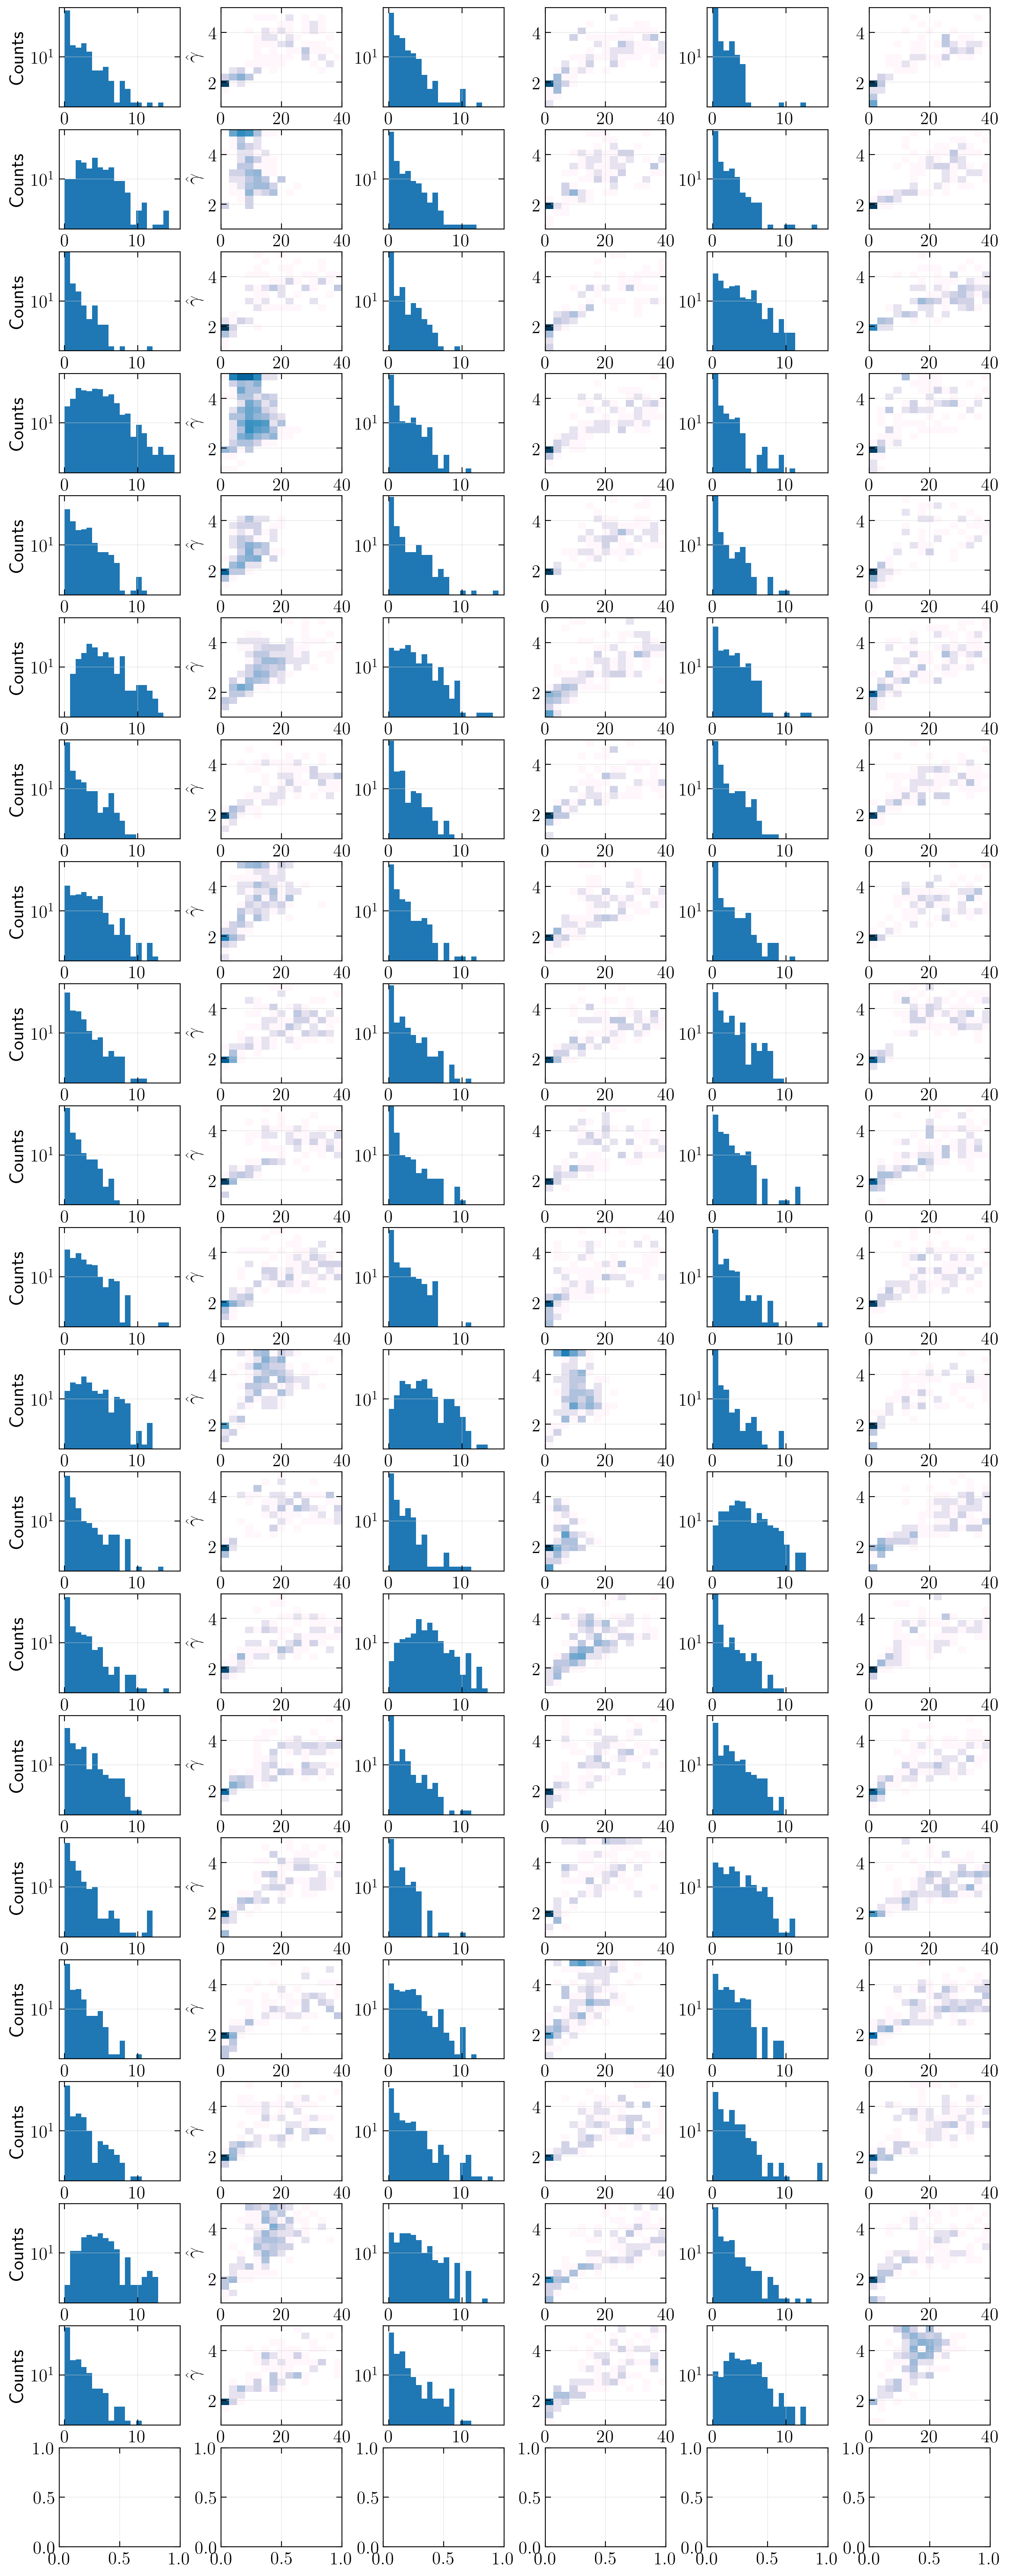

In [4]:
ncols = 6
nrows = 21

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, sharey=False, figsize=(15, 42), dpi=200)
plt.subplots_adjust(hspace = 0.23, wspace = 0.34)
fig.set_facecolor('w')
from glob import glob
fs = glob('/data/user/apizzuto/fast_response_skylab/alert_event_followup/analysis_trials/bg/robert_maps/*steady*')
print(len(fs))

for jj, fi in enumerate(fs[:60]):
    with open(fi, 'r') as f:
        bg = pickle.load(f)
    row_ind = jj / (ncols / 2)
    col_ind = (jj % (ncols / 2)) * 2
    
    axs[row_ind, col_ind].hist(bg['TS'], bins=np.linspace(0., 15., 21), histtype='stepfilled')
    axs[row_ind, col_ind].set_yscale('log')
    axs[row_ind, col_ind].set_ylim(8e-1, 1.2e2)
    if row_ind == nrows - 1:
        axs[row_ind, col_ind].set_xlabel('TS')
    if col_ind == 0:
        axs[row_ind, col_ind].set_ylabel('Counts')
    #plt.show()
    
    axs[row_ind, col_ind + 1].hist2d(bg['nsignal'], bg['gamma'], bins=[np.linspace(0., 40., 16), 
                        np.linspace(1., 5., 16)], norm=LogNorm(), vmin=1, vmax=100, cmin=1)
    #cbar = axs[row_ind, col_ind + 1].colorbar(label='Counts')
    #cbar.ax.tick_params(direction = 'out')
    if row_ind == nrows - 1:
        axs[row_ind, col_ind + 1].set_xlabel(r'$\hat{n}_s$')
    if col_ind == 0:
        axs[row_ind, col_ind + 1].set_ylabel(r'$\hat{\gamma}$')
    #plt.show()
#fig.tight_layout()

['TS', 'pix', 'ra', 'nsignal', 'dec', 'gamma']


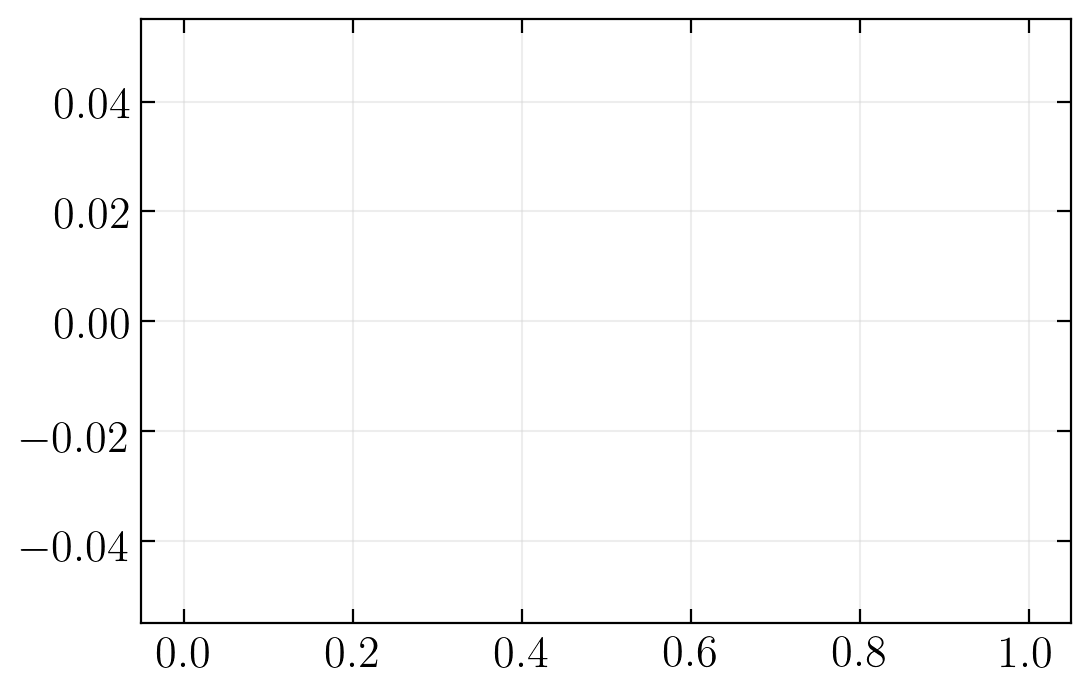

['TS', 'pix', 'ra', 'nsignal', 'dec', 'gamma']


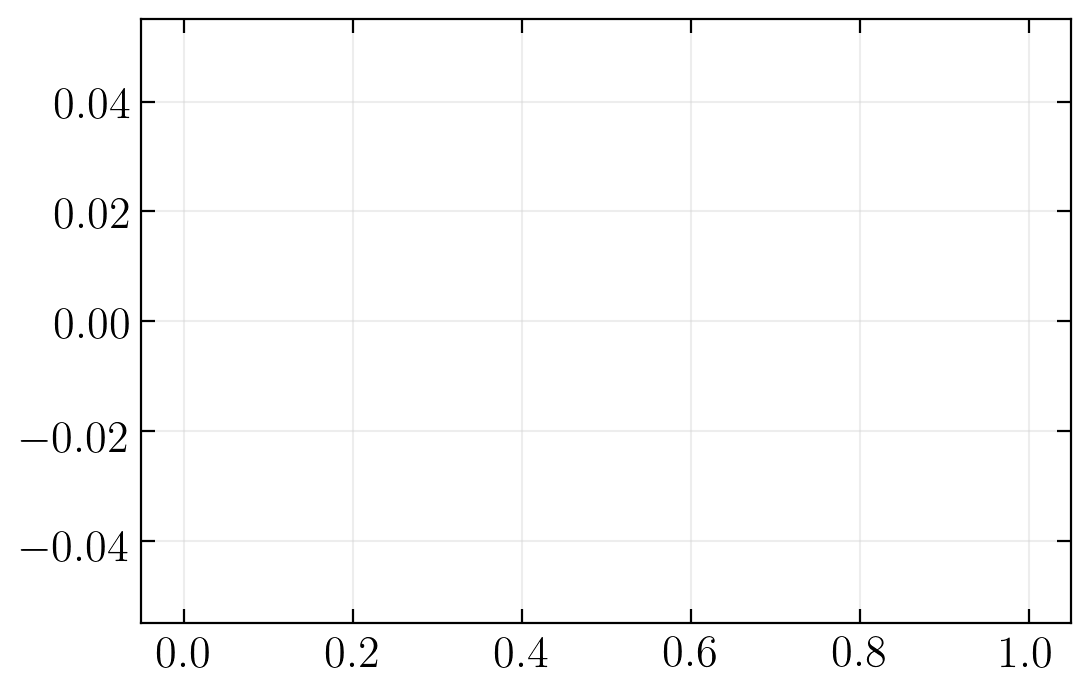

['nside', 'TS', 'pix', 'ra', 'nsignal', 'dec', 'gamma']


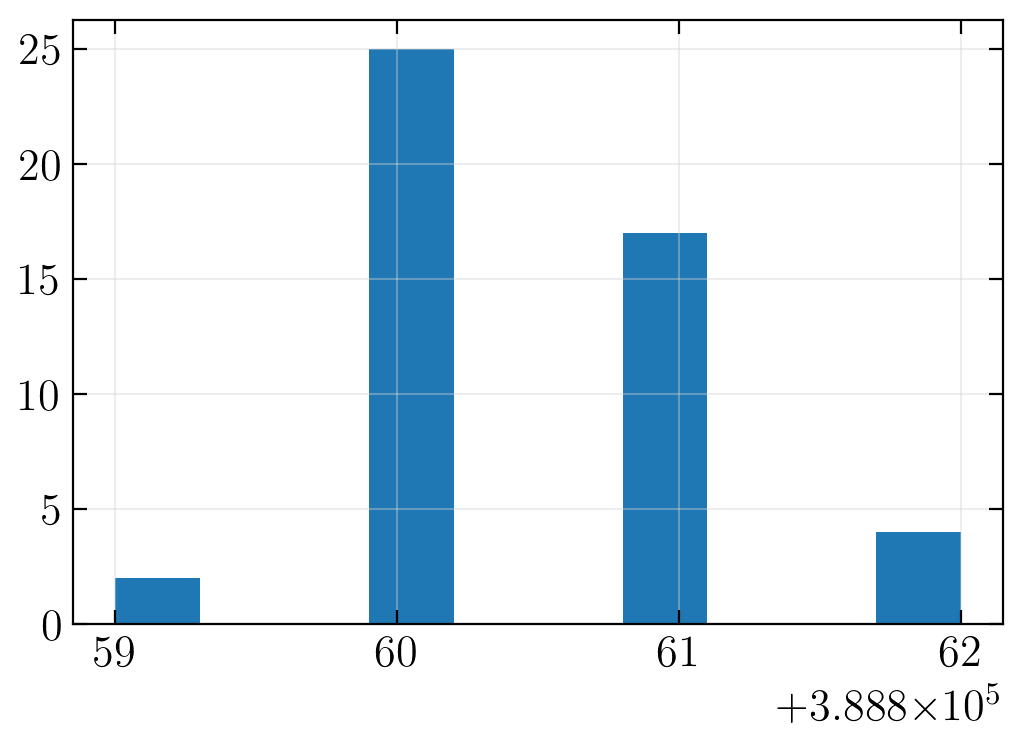

In [33]:
fs = glob('/data/user/apizzuto/fast_response_skylab/alert_event_followup/analysis_trials/bg/*steady*')
for fi in fs:
    fig = plt.figure(dpi=200)
    fig.set_facecolor('w')
    with open(fi, 'r') as f:
        bg = pickle.load(f)
    print bg.keys()
    pixes = np.array(bg['pix'])
    pixes = pixes[pixes != 0]
    plt.hist(pixes)
    plt.show()

In [34]:
import healpy as hp

In [38]:
hp.pixelfunc.nside2pixarea(128, degrees=True)

0.2098234113027917

In [41]:
hp.pixelfunc.nside2resol(128) * 180. / np.pi

0.45806485490898746

In [15]:
def load_map(f, probs = False):
    skymap, header = hp.read_map(f, h=True, verbose=False)
    header = {name: val for name, val in header}
    if probs:
        skymap = np.exp(-1. * skymap / 2.)
        skymap = np.where(skymap > 1e-12, skymap, 0.0)
        skymap = skymap / np.sum(skymap)
    return skymap, header

In [3]:
a = np.load('/data/user/apizzuto/fast_response_skylab/alert_event_followup/effective_areas_alerts/decs_by_ind_old.npy')
a

array([[ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         3.00000000e+00,  4.00000000e+00,  5.00000000e+00,
         6.00000000e+00,  7.00000000e+00,  8.00000000e+00,
         9.00000000e+00,  1.00000000e+01,  1.10000000e+01,
         1.20000000e+01,  1.30000000e+01,  1.40000000e+01,
         1.50000000e+01,  1.60000000e+01,  1.70000000e+01,
         1.80000000e+01,  1.90000000e+01,  2.00000000e+01,
         2.10000000e+01,  2.20000000e+01,  2.30000000e+01,
         2.40000000e+01,  2.50000000e+01,  2.60000000e+01,
         2.70000000e+01,  2.80000000e+01,  2.90000000e+01,
         3.00000000e+01,  3.10000000e+01,  3.20000000e+01,
         3.30000000e+01,  3.40000000e+01,  3.50000000e+01,
         3.60000000e+01,  3.70000000e+01,  3.80000000e+01,
         3.90000000e+01,  4.00000000e+01,  4.10000000e+01,
         4.20000000e+01,  4.30000000e+01,  4.40000000e+01,
         4.50000000e+01,  4.60000000e+01,  4.70000000e+01,
         4.80000000e+01,  4.90000000e+01,  5.00000000e+0

In [9]:
np.max(a[1])

1.4758504154864052

In [4]:
from glob import glob
import healpy as hp

In [10]:
skymap_files = glob('/data/ana/realtime/alert_catalog_v2/fits_files/Run1*.fits.gz')

inds = []; decs = [];
for i in range(len(skymap_files)):
    if i % 20 == 0:
        print i, 
    skymap_fits, skymap_header = hp.read_map(skymap_files[i], h=True, verbose=False)
    skymap_header = {name: val for name, val in skymap_header}
    dec_deg = skymap_header['DEC']
    dec_rad = dec_deg * np.pi / 180.
    inds.append(i)
    decs.append(dec_rad)

0 20 40 60 80 100 120 140 160 180 200 220 240


In [13]:
decs_by_ind = np.array([inds, decs])
np.save('/data/user/apizzuto/fast_response_skylab/alert_event_followup/effective_areas_alerts/decs_by_ind.npy',
       decs_by_ind)

In [9]:
prolem_inds = [1,2,3,4]
32 in prolem_inds

False

In [ ]:
131096_32665194

In [6]:
skymap_files = glob('/data/ana/realtime/alert_catalog_v2/fits_files/Run1*.fits.gz')
for ind in range(len(skymap_files)):
    fis = glob('/data/user/apizzuto/fast_response_skylab/alert_event_followup/analysis_trials/bg/norm_prob/index_{}_run_*.pkl'.format(ind))
    if len(fis) == 0:
        print("INDEX {} HAS NO FILES".format(ind))
        print(skymap_files[ind])
    if len(fis) == 1:
        print("INDEX {} HAS ONLY ONE FILE".format(ind))
        print(skymap_files[ind])

INDEX 60 HAS ONLY ONE FILE
/data/ana/realtime/alert_catalog_v2/fits_files/Run131096_32665194_nside1024.fits.gz
INDEX 79 HAS ONLY ONE FILE
/data/ana/realtime/alert_catalog_v2/fits_files/Run125709_6405911_nside1024.fits.gz
INDEX 228 HAS ONLY ONE FILE
/data/ana/realtime/alert_catalog_v2/fits_files/Run125544_54236696_nside1024.fits.gz


In [17]:
import healpy as hp
skymap_files = glob('/data/ana/realtime/alert_catalog_v2/2yr_prelim/fits_files/Run*.fits.gz')

In [22]:
inds, decs = [], []
for ii, f in enumerate(skymap_files):
    skymap, header = load_map(f)
    inds.append(ii)
    decs.append(np.radians(header['DEC']))

# Work on alert event unblinding scripts below

In [3]:
exp = np.load('/data/user/apizzuto/fast_response_skylab/fast-response/trunk/2019_data/IC86_2019_data.npy')
exp.dtype.names

('run',
 'event',
 'subevent',
 'time',
 'azi',
 'zen',
 'ra',
 'dec',
 'angErr',
 'logE',
 'bdtScore')

In [10]:
print exp.dtype

[('run', '<u4'), ('event', '<u4'), ('subevent', '<u4'), ('time', '<f8'), ('azi', '<f8'), ('zen', '<f8'), ('ra', '<f8'), ('dec', '<f8'), ('angErr', '<f8'), ('logE', '<f8'), ('bdtScore', '<f8')]


In [5]:
exp['angErr'] = np.maximum(exp['angErr'], np.radians(0.5))

In [7]:
exp['angErr']

array([0.00872665, 0.01898274, 0.0156031 , ..., 0.00872665, 0.029389  ,
       0.00995106])

In [8]:
np.radians(0.5)

0.008726646259971648

In [1]:
import healpy as hp                                  
from glob import glob
import sys
sys.path.append('/data/user/apizzuto/fast_response_skylab/fast-response/trunk/')
from FastResponseAnalysis import FastResponseAnalysis
from astropy.time import Time
TSs = []; TSDs = []
ps = []
for index in range(60):
    print("Index: {}".format(index))
    skymap_files = glob('/data/ana/realtime/alert_catalog_v2/2yr_prelim/fits_files/Run13*.fits.gz')
    skymap_fits, skymap_header = hp.read_map(skymap_files[index], h=True, verbose=False)
    skymap_header = {name: val for name, val in skymap_header}
    ev_mjd = skymap_header['EVENTMJD']
    if "2018-05-28" in skymap_header['START']:
        print("HUGE MAP SKIPPING")
        continue
    ev_run, ev_id = skymap_header['RUNID'], skymap_header['EVENTID']
    source = {"Skipped Events": [(ev_run, ev_id)]}
    deltaT = 2.
    event_mjd = ev_mjd
    start_mjd = event_mjd - (deltaT / 2.)
    stop_mjd = event_mjd + (deltaT / 2.)
    
    start = Time(start_mjd, format='mjd').iso
    stop = Time(stop_mjd, format='mjd').iso
    
    
    f = FastResponseAnalysis(skymap_files[index], start, stop, save=False, alert_event=True,
                            **source)
    inj = f.initialize_injector(gamma=2.5)
    print(Time(f.start, format='mjd').iso)
    f.unblind_TS()
    TSs.append(f.ts)
    f.calc_pvalue(ntrials=50)
    ps.append(f.p)
    TSDs.append(f.tsd)
    if index % 5 == 0:
        print TSs, ps

Index: 0
Working on unscrambled (UNBLINDED) data
********************************************************************************
*                                                                              *
*                             FastResponseAnalysis                             *
*                                                                              *
********************************************************************************
          2018-07-27 20:16:23.215          2018-07-29 20:16:23.215
          Skymap file:/data/ana/realtime/alert_catalog_v2/2yr_prelim/fits_files/Run131321_73241305_nside1024.fits.gz


Initializing Point Source LLH in Skylab
Old times, just grabbing archival data
removed [(131321, 73241305, 0, 58327.84471314, 4.62592814, 1.2659338, 1.31415807, -0.30536557, 0.00374488, 6.47487638, -0.44618416)]
Initializing Point Source COMPLETE
LLH Initialization took 35.1419157982 seconds


Initializing Prior Injector
[2020/04/29 14:24:41] INFO    skylab.

Working on unscrambled (UNBLINDED) data
********************************************************************************
*                                                                              *
*                             FastResponseAnalysis                             *
*                                                                              *
********************************************************************************
          2019-04-12 15:57:01.512          2019-04-14 15:57:01.512
          Skymap file:/data/ana/realtime/alert_catalog_v2/2yr_prelim/fits_files/Run132437_67132865_nside1024.fits.gz


Initializing Point Source LLH in Skylab
Old times, just grabbing archival data
removed [(132437, 67132865, 4294967295, 58586.66460083, 4.98138, 1.95956, 4.27923792, 0.38951009, 0.00349066, 4.21874198, -1.)]
Initializing Point Source COMPLETE
LLH Initialization took 58.4706230164 seconds


Initializing Prior Injector
[2020/04/29 14:31:31] INFO    skylab.ps_injector.Pr

[2020/04/29 14:38:44] INFO    skylab.ps_injector.PriorInjector -- Selected 19044238 events in total.
2018-08-06 04:51:19.876
Starting scan
finished scan, took 0.619111061096 s
TS = 0.864199696775
ns = 1.01198719536


Need to reinitialize LLH for background trials
Initializing Point Source LLH in Skylab
Old times, just grabbing archival data
Initializing Point Source COMPLETE
LLH Initialization took 37.3956818581 seconds


Running 50 Background trials
[                                                  50 trials took 39.4146590233s
Background Trials complete, p = 0.08
Background trials took 39.5835869312 seconds (0.791671738625 s / trial)
Significance: 1.405sigma


Index: 8
Working on unscrambled (UNBLINDED) data
********************************************************************************
*                                                                              *
*                             FastResponseAnalysis                             *
*                                   

removed [(131602, 39194539, 0, 58399.77940579, 5.41705257, 1.59645607, 1.34939783, 0.02516337, 0.00349066, 4.14217007, 0.25493132)]
Initializing Point Source COMPLETE
LLH Initialization took 34.1714289188 seconds


Initializing Prior Injector
[2020/04/29 14:49:13] INFO    skylab.ps_injector.PriorInjector -- Sample -1: selected 9415095 events at [ -82.43 -76.86 -73.01 -69.87 -67.14 -64.69 -62.44 -60.36 -58.39 -56.53 -54.76 -53.06 -51.43 -49.85 -48.33 -46.84 -45.40 -43.99 -42.62 -41.28 -39.96 -38.67 -37.40 -36.15 -34.92 -33.71 -32.51 -31.34 -30.17 -29.02 -27.89 -26.76 -25.65 -24.54 -23.45 -22.36 -21.28 -20.21 -19.15 -18.10 -17.05 -16.01 -14.97 -13.93 -12.91 -11.88 -10.86 -9.85 -8.83 -7.82 -6.81 -5.81 -4.80 -3.80 -2.80 -1.80 -0.80 0.20 1.20 2.20 3.20 4.20 5.21 6.21 7.22 8.23 9.24 10.26 11.27 12.29 13.32 14.35 15.38 16.42 17.47 18.52 19.58 20.64 21.72 22.80 23.89 24.98 26.09 27.21 28.34 29.48 30.64 31.81 32.99 34.19 35.41 36.65 37.90 39.18 40.49 41.81 43.17 44.56 45.98 47.44 48.94 50.48 52

removed [(130797, 67186364, 0, 58190.67858045, 3.81267649, 1.67252626, 5.00675685, 0.10128149, 0.00349066, 4.23767162, 0.43469984)]
Initializing Point Source COMPLETE
LLH Initialization took 34.3770759106 seconds


Initializing Prior Injector
[2020/04/29 14:56:45] INFO    skylab.ps_injector.PriorInjector -- Sample -1: selected 9415095 events at [ -82.43 -76.86 -73.01 -69.87 -67.14 -64.69 -62.44 -60.36 -58.39 -56.53 -54.76 -53.06 -51.43 -49.85 -48.33 -46.84 -45.40 -43.99 -42.62 -41.28 -39.96 -38.67 -37.40 -36.15 -34.92 -33.71 -32.51 -31.34 -30.17 -29.02 -27.89 -26.76 -25.65 -24.54 -23.45 -22.36 -21.28 -20.21 -19.15 -18.10 -17.05 -16.01 -14.97 -13.93 -12.91 -11.88 -10.86 -9.85 -8.83 -7.82 -6.81 -5.81 -4.80 -3.80 -2.80 -1.80 -0.80 0.20 1.20 2.20 3.20 4.20 5.21 6.21 7.22 8.23 9.24 10.26 11.27 12.29 13.32 14.35 15.38 16.42 17.47 18.52 19.58 20.64 21.72 22.80 23.89 24.98 26.09 27.21 28.34 29.48 30.64 31.81 32.99 34.19 35.41 36.65 37.90 39.18 40.49 41.81 43.17 44.56 45.98 47.44 48.94 50.48 52

HUGE MAP SKIPPING
Index: 20
Working on unscrambled (UNBLINDED) data
********************************************************************************
*                                                                              *
*                             FastResponseAnalysis                             *
*                                                                              *
********************************************************************************
          2019-01-31 00:22:33.997          2019-02-02 00:22:33.997
          Skymap file:/data/ana/realtime/alert_catalog_v2/2yr_prelim/fits_files/Run132128_69441226_nside1024.fits.gz


Initializing Point Source LLH in Skylab
Old times, just grabbing archival data
removed [(132128, 69441226, 4294967295, 58515.01567126, 5.95715, 2.24223, 4.27759866, 0.67216107, 0.00349066, 4.57038575, -1.)]
Initializing Point Source COMPLETE
LLH Initialization took 34.6424441338 seconds


Initializing Prior Injector
[2020/04/29 15:05:09] I

[2020/04/29 15:11:27] INFO    skylab.ps_injector.PriorInjector -- Selected 19044238 events in total.
2018-04-16 06:41:03.494
Starting scan
finished scan, took 0.493930101395 s
TS = 0.0
ns = 0.0


TS=0, no need to run background trials
Significance: -infsigma


Index: 24
Working on unscrambled (UNBLINDED) data
********************************************************************************
*                                                                              *
*                             FastResponseAnalysis                             *
*                                                                              *
********************************************************************************
          2020-01-19 18:48:18.559          2020-01-21 18:48:18.559
          Skymap file:/data/ana/realtime/alert_catalog_v2/2yr_prelim/fits_files/Run133644_43767651_nside1024.fits.gz


Initializing Point Source LLH in Skylab
Old times, just grabbing archival data
removed [(133644, 4

[2020/04/29 15:18:57] INFO    skylab.ps_injector.PriorInjector -- Selected 19044238 events in total.
2018-02-27 13:44:15.715
Starting scan
finished scan, took 0.449519872665 s
TS = 0.0
ns = 0.0


TS=0, no need to run background trials
Significance: -infsigma


Index: 28
Working on unscrambled (UNBLINDED) data
********************************************************************************
*                                                                              *
*                             FastResponseAnalysis                             *
*                                                                              *
********************************************************************************
          2018-01-24 23:25:03.523          2018-01-26 23:25:03.523
          Skymap file:/data/ana/realtime/alert_catalog_v2/2yr_prelim/fits_files/Run130597_55489144_nside1024.fits.gz


Initializing Point Source LLH in Skylab
Old times, just grabbing archival data
removed [(130597, 5

[2020/04/29 15:27:33] INFO    skylab.ps_injector.PriorInjector -- Sample -1: selected 9415095 events at [ -82.43 -76.86 -73.01 -69.87 -67.14 -64.69 -62.44 -60.36 -58.39 -56.53 -54.76 -53.06 -51.43 -49.85 -48.33 -46.84 -45.40 -43.99 -42.62 -41.28 -39.96 -38.67 -37.40 -36.15 -34.92 -33.71 -32.51 -31.34 -30.17 -29.02 -27.89 -26.76 -25.65 -24.54 -23.45 -22.36 -21.28 -20.21 -19.15 -18.10 -17.05 -16.01 -14.97 -13.93 -12.91 -11.88 -10.86 -9.85 -8.83 -7.82 -6.81 -5.81 -4.80 -3.80 -2.80 -1.80 -0.80 0.20 1.20 2.20 3.20 4.20 5.21 6.21 7.22 8.23 9.24 10.26 11.27 12.29 13.32 14.35 15.38 16.42 17.47 18.52 19.58 20.64 21.72 22.80 23.89 24.98 26.09 27.21 28.34 29.48 30.64 31.81 32.99 34.19 35.41 36.65 37.90 39.18 40.49 41.81 43.17 44.56 45.98 47.44 48.94 50.48 52.08 53.74 55.46 57.27 59.17 61.18 63.33 65.65 68.20 71.07 74.45 78.77 84.15] deg.
[2020/04/29 15:27:33] INFO    skylab.ps_injector.PriorInjector -- Selected 19044238 events in total.
2018-01-22 16:14:58.628
Starting scan
finished scan, took 0.

[2020/04/29 15:33:48] INFO    skylab.ps_injector.PriorInjector -- Sample -1: selected 9415095 events at [ -82.43 -76.86 -73.01 -69.87 -67.14 -64.69 -62.44 -60.36 -58.39 -56.53 -54.76 -53.06 -51.43 -49.85 -48.33 -46.84 -45.40 -43.99 -42.62 -41.28 -39.96 -38.67 -37.40 -36.15 -34.92 -33.71 -32.51 -31.34 -30.17 -29.02 -27.89 -26.76 -25.65 -24.54 -23.45 -22.36 -21.28 -20.21 -19.15 -18.10 -17.05 -16.01 -14.97 -13.93 -12.91 -11.88 -10.86 -9.85 -8.83 -7.82 -6.81 -5.81 -4.80 -3.80 -2.80 -1.80 -0.80 0.20 1.20 2.20 3.20 4.20 5.21 6.21 7.22 8.23 9.24 10.26 11.27 12.29 13.32 14.35 15.38 16.42 17.47 18.52 19.58 20.64 21.72 22.80 23.89 24.98 26.09 27.21 28.34 29.48 30.64 31.81 32.99 34.19 35.41 36.65 37.90 39.18 40.49 41.81 43.17 44.56 45.98 47.44 48.94 50.48 52.08 53.74 55.46 57.27 59.17 61.18 63.33 65.65 68.20 71.07 74.45 78.77 84.15] deg.
[2020/04/29 15:33:48] INFO    skylab.ps_injector.PriorInjector -- Selected 19044238 events in total.
2018-11-19 17:00:32.203
Starting scan
finished scan, took 0.

removed [(130912, 76035104, 0, 58218.77679462, 6.10479606, 1.57596662, 3.81480431, 0.00646213, 0.00349066, 4.77349994, 0.31202899)]
Initializing Point Source COMPLETE
LLH Initialization took 43.1951150894 seconds


Initializing Prior Injector
[2020/04/29 15:42:44] INFO    skylab.ps_injector.PriorInjector -- Sample -1: selected 9415095 events at [ -82.43 -76.86 -73.01 -69.87 -67.14 -64.69 -62.44 -60.36 -58.39 -56.53 -54.76 -53.06 -51.43 -49.85 -48.33 -46.84 -45.40 -43.99 -42.62 -41.28 -39.96 -38.67 -37.40 -36.15 -34.92 -33.71 -32.51 -31.34 -30.17 -29.02 -27.89 -26.76 -25.65 -24.54 -23.45 -22.36 -21.28 -20.21 -19.15 -18.10 -17.05 -16.01 -14.97 -13.93 -12.91 -11.88 -10.86 -9.85 -8.83 -7.82 -6.81 -5.81 -4.80 -3.80 -2.80 -1.80 -0.80 0.20 1.20 2.20 3.20 4.20 5.21 6.21 7.22 8.23 9.24 10.26 11.27 12.29 13.32 14.35 15.38 16.42 17.47 18.52 19.58 20.64 21.72 22.80 23.89 24.98 26.09 27.21 28.34 29.48 30.64 31.81 32.99 34.19 35.41 36.65 37.90 39.18 40.49 41.81 43.17 44.56 45.98 47.44 48.94 50.48 52

removed [(132206, 36575563, 4294967295, 58528.67267812, 4.3325, 1.4957, 3.98059507, -0.07387418, 0.00349066, 4.69991248, -1.)]
Initializing Point Source COMPLETE
LLH Initialization took 36.8404519558 seconds


Initializing Prior Injector
[2020/04/29 15:49:18] INFO    skylab.ps_injector.PriorInjector -- Sample -1: selected 9415095 events at [ -82.43 -76.86 -73.01 -69.87 -67.14 -64.69 -62.44 -60.36 -58.39 -56.53 -54.76 -53.06 -51.43 -49.85 -48.33 -46.84 -45.40 -43.99 -42.62 -41.28 -39.96 -38.67 -37.40 -36.15 -34.92 -33.71 -32.51 -31.34 -30.17 -29.02 -27.89 -26.76 -25.65 -24.54 -23.45 -22.36 -21.28 -20.21 -19.15 -18.10 -17.05 -16.01 -14.97 -13.93 -12.91 -11.88 -10.86 -9.85 -8.83 -7.82 -6.81 -5.81 -4.80 -3.80 -2.80 -1.80 -0.80 0.20 1.20 2.20 3.20 4.20 5.21 6.21 7.22 8.23 9.24 10.26 11.27 12.29 13.32 14.35 15.38 16.42 17.47 18.52 19.58 20.64 21.72 22.80 23.89 24.98 26.09 27.21 28.34 29.48 30.64 31.81 32.99 34.19 35.41 36.65 37.90 39.18 40.49 41.81 43.17 44.56 45.98 47.44 48.94 50.48 52.08 5

2018-01-16 18:03:10.564
Starting scan
finished scan, took 0.699504137039 s
TS = 0.0
ns = 0.0


TS=0, no need to run background trials
Significance: -infsigma


Index: 47
Working on unscrambled (UNBLINDED) data
********************************************************************************
*                                                                              *
*                             FastResponseAnalysis                             *
*                                                                              *
********************************************************************************
          2019-12-03 22:46:11.315          2019-12-05 22:46:11.315
          Skymap file:/data/ana/realtime/alert_catalog_v2/2yr_prelim/fits_files/Run133394_27261780_nside1024.fits.gz


Initializing Point Source LLH in Skylab
Old times, just grabbing archival data
removed [(133394, 27261780, 4294967295, 58821.94874207, 1.14039, 1.62074, 1.38579736, 0.0496004, 0.00349066, 4.43050158,

2018-11-20 13:55:09.228
Starting scan
finished scan, took 0.793092012405 s
TS = 0.0
ns = 0.0


TS=0, no need to run background trials
Significance: -infsigma


[0.0, 0.0, 0.0, 0.0, 0.030925770109903272, 0.0, 1.192834524053703, 0.8641996967746066, 3.4420379778734413, 0.0, 2.2005615081683936, 0.0, 0.0, 0.0, 0.0035240693852319344, 0.0, 0.0, 0.0, 0.2881148768287226, 0.0, 0.15579636863715884, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09865953876783307, 0.0, 0.0, 0.0, 0.0, 0.0, 3.552713678800501e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2346565812026196, 0.0, 0.0, 0.0, 0.0, 0.0] [1.0, 1.0, 1.0, 1.0, 0.28, 1.0, 0.06, 0.08, 0.04, 1.0, 0.02, 1.0, 1.0, 1.0, 0.1, 1.0, 1.0, 1.0, 0.08, 1.0, 0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.06, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.04, 1.0, 1.0, 1.0, 1.0, 1.0]
Index: 51
Working on unscrambled (UNBLINDED) data
********************************************************************************
*                        

Initializing Point Source COMPLETE
LLH Initialization took 45.2624690533 seconds


Initializing Prior Injector
[2020/04/29 16:14:15] INFO    skylab.ps_injector.PriorInjector -- Sample -1: selected 9415095 events at [ -82.43 -76.86 -73.01 -69.87 -67.14 -64.69 -62.44 -60.36 -58.39 -56.53 -54.76 -53.06 -51.43 -49.85 -48.33 -46.84 -45.40 -43.99 -42.62 -41.28 -39.96 -38.67 -37.40 -36.15 -34.92 -33.71 -32.51 -31.34 -30.17 -29.02 -27.89 -26.76 -25.65 -24.54 -23.45 -22.36 -21.28 -20.21 -19.15 -18.10 -17.05 -16.01 -14.97 -13.93 -12.91 -11.88 -10.86 -9.85 -8.83 -7.82 -6.81 -5.81 -4.80 -3.80 -2.80 -1.80 -0.80 0.20 1.20 2.20 3.20 4.20 5.21 6.21 7.22 8.23 9.24 10.26 11.27 12.29 13.32 14.35 15.38 16.42 17.47 18.52 19.58 20.64 21.72 22.80 23.89 24.98 26.09 27.21 28.34 29.48 30.64 31.81 32.99 34.19 35.41 36.65 37.90 39.18 40.49 41.81 43.17 44.56 45.98 47.44 48.94 50.48 52.08 53.74 55.46 57.27 59.17 61.18 63.33 65.65 68.20 71.07 74.45 78.77 84.15] deg.
[2020/04/29 16:14:15] INFO    skylab.ps_injector.P

removed [(132814, 44222682, 4294967295, 58676.05228457, 5.57324, 1.78842, 1.37683699, 0.21718538, 0.01343565, 4.34327283, -1.)]
Initializing Point Source COMPLETE
LLH Initialization took 54.3594899178 seconds


Initializing Prior Injector
[2020/04/29 16:23:09] INFO    skylab.ps_injector.PriorInjector -- Sample -1: selected 9415095 events at [ -82.43 -76.86 -73.01 -69.87 -67.14 -64.69 -62.44 -60.36 -58.39 -56.53 -54.76 -53.06 -51.43 -49.85 -48.33 -46.84 -45.40 -43.99 -42.62 -41.28 -39.96 -38.67 -37.40 -36.15 -34.92 -33.71 -32.51 -31.34 -30.17 -29.02 -27.89 -26.76 -25.65 -24.54 -23.45 -22.36 -21.28 -20.21 -19.15 -18.10 -17.05 -16.01 -14.97 -13.93 -12.91 -11.88 -10.86 -9.85 -8.83 -7.82 -6.81 -5.81 -4.80 -3.80 -2.80 -1.80 -0.80 0.20 1.20 2.20 3.20 4.20 5.21 6.21 7.22 8.23 9.24 10.26 11.27 12.29 13.32 14.35 15.38 16.42 17.47 18.52 19.58 20.64 21.72 22.80 23.89 24.98 26.09 27.21 28.34 29.48 30.64 31.81 32.99 34.19 35.41 36.65 37.90 39.18 40.49 41.81 43.17 44.56 45.98 47.44 48.94 50.48 52.08 

In [ ]:
with open('/data/user/apizzuto/fast_response_skylab/dump/test_scans_subset.pkl', 'w') as fi:
    pickle.dump(res, fi)

In [3]:
?pickle.dump

In [1]:
skymap_files_all = glob('/data/ana/realtime/alert_catalog_v2/fits_files/Run*.fits.gz')
skymap_files_2 = glob('/data/ana/realtime/alert_catalog_v2/2yr_prelim/fits_files/Run*.fits.gz')
for fi in skymap_files_all:
    print(fi[:-10])

NameError: name 'glob' is not defined

In [5]:
skymap_files_2 = glob('/data/ana/realtime/alert_catalog_v2/2yr_prelim/fits_files/Run*.fits.gz')
skymap_files_2[19]

'/data/ana/realtime/alert_catalog_v2/2yr_prelim/fits_files/Run131096_32665194_nside1024.fits.gz'

In [3]:
import sys
sys.path.append('/data/user/apizzuto/fast_response_skylab/alert_event_followup/FIRESONG/')
from Firesong import firesong_simulation

In [14]:
expected = []
returned = []

for i in range(50):
    print i,
    fire = firesong_simulation('', Transient=True)
    expected.append(fire['header']['fluxnorm'])
    returned.append(fire['total_flux'])

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49


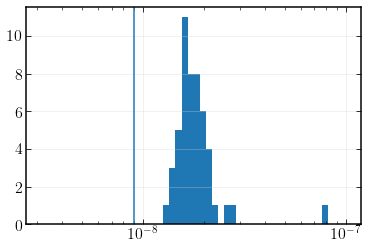

In [17]:
plt.hist(returned, bins=np.logspace(-8.5, -7., 51))
plt.axvline(9e-09)
plt.xscale('log')

# Masking out sources for memory

In [2]:
import sys

In [3]:
sys.path.append('/data/user/apizzuto/fast_response_skylab/fast-response/trunk/alert_event_followup/')
from transient_universe import TransientUniverse, SteadyUniverse

In [5]:
uni = TransientUniverse('SC', 'MD2014SFR', 1e-7, 1.5e-8, 2.5, timescale=1000., data_years=8.6, seed=2)
uni.create_universe()
uni.find_alerts()

BEFORE TRIM
3397146
AFTER TRIM
89


In [7]:
sys.getsizeof(uni.alerts)

280

In [9]:
my_dict = {}
stream_msks = {}
for stream in ['a', 'b']:
    for cut in ['c', 'd']:
        my_dict[stream+cut] = np.random.randn(5)
        pos_inds = np.where(my_dict[stream+cut] > 0.5)[0]
        stream_msks[stream+cut] = pos_inds
my_dict

{'ac': array([-1.29594508,  0.58466224,  0.11419988, -1.19467416, -1.23860458]),
 'ad': array([-0.2020945 , -1.85653105,  0.85814682, -0.48199907, -0.10952872]),
 'bc': array([-1.15083121,  0.44150073, -1.00919894,  0.07925592,  1.0950049 ]),
 'bd': array([ 1.46681439,  1.36997273, -0.84780402,  0.77879556, -0.35980741])}